In [1]:
3*4

12

In [10]:
# Imports

import pandas as pd
print("pandas", end="")
import numpy as np
print(", numpy", end="")
import os
print(", os", end="")
from glob import glob
print(", glob", end="")
import itertools
print(", itertools", end="")
import fnmatch
print(", fnmatch", end="")
import random
print(", random", end="")
import matplotlib.pylab as plt
print(", matplotlib", end="")
import seaborn as sns
print(", seaborn", end="")
import cv2
print(", cv2", end="")
import scipy
#from scipy import imread
#print(", imread", end="")
from random import shuffle
print(", shuffle", end="")
from PIL import ImageFile   


%matplotlib inline

pandas, numpy, os, glob, itertools, fnmatch, random, matplotlib, seaborn, cv2, shuffle

# Separando os dados

In [3]:
# Observando os dados 

positives = glob('IDC_regular_ps50_idx5/*/1/*.png', recursive=True)
negatives = glob('IDC_regular_ps50_idx5/*/0/*.png', recursive=True)

print('O número de imagens com IDC positivos é ',len(positives))
print('O número de imagens com IDC positivos é ', len(negatives))

O número de imagens com IDC positivos é  78786
O número de imagens com IDC positivos é  198738


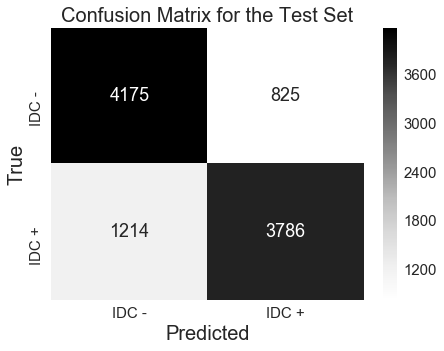


Test accuracy: 79.610%
Test F1 score: 78.785%
Quando o IDC é negativo, a rede prevê corretamente  83.5 % dos casos
Quando o IDC é positivo, a rede prevê corretamente  75.72 % dos casos


In [41]:
# Cria uma Matriz de confusão para verificar as predições
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, pred_ensemble)

plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Greys', 
            xticklabels=['IDC -', 'IDC +'], 
            yticklabels=['IDC -', 'IDC +'],
           )

plt.title('Confusion Matrix for the Test Set', fontsize = 20)
plt.ylabel('True', fontsize = 20)
plt.xlabel('Predicted', fontsize = 20)
plt.show()

print('')
print('Test accuracy: %.3f%%' % (100*np.sum(pred_ensemble==y_test)/len(pred_ensemble)) )
print('Test F1 score: %.3f%%' % (f1_score(y_test, pred_ensemble)*100) )
print('Quando o IDC é negativo, a rede prevê corretamente ', cm[0,0]/(cm[0,0] + cm [0,1])*100 ,'% dos casos')
print('Quando o IDC é positivo, a rede prevê corretamente ', cm[1,1]/(cm[1,0] + cm [1,1])*100 ,'% dos casos')

In [4]:
# Restringindo para ficar com um número igual de positivos e negativos

#numero_samples = len(positives)
numero_samples = 78786


positives = positives[0:numero_samples]
negatives = negatives[0:numero_samples]

random.seed(420)
random.shuffle(positives)
random.shuffle(negatives)

print('O novo número de imagens con IDC positivos é ',len(positives))
print('O novo número de imagens con IDC positivos é ', len(negatives))

O novo número de imagens con IDC positivos é  78786
O novo número de imagens con IDC positivos é  78786


In [5]:
# variável negatives, alguns exemplos
for i in negatives[0:5]:
    print(i)

IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


# Visualização

In [17]:
# Plot Multiple Images
def plotImage(image_location):
    image = cv2.imread(image_location)
    image = cv2.resize(image, (50,50))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('on')
    return

In [18]:
# plota figuras contendo os dois exemplos
plt.figure(figsize=(15,15))

for i in range(20):
    if i<10:
        plt.subplot(4,5,i+1)
        plt.title('IDC = 1')
        plotImage(random.choice(positives))
    else:
        plt.subplot(4,5,i+1)
        plt.title('IDC = 0')
        plotImage(random.choice(negatives))

# Pré processamento

In [6]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(50, 50))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

C:\Users\guilherme.bonaldo\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# Define as imagens que serão utilizadas no treino, validação e teste
train_size = 10000
val_size = 5000
test_size = 10000
#test_size = numero_samples - val_size - train_size

X_train = np.array(positives[0:train_size//2] + negatives[0:train_size//2])
#y_train = np.array([1]*(train_size//2) +[0]*(train_size//2))

X_val = np.array(positives[train_size//2:train_size//2+val_size//2] + negatives[train_size//2:train_size//2+val_size//2])
#y_val = np.array([1]*(val_size//2) +[0]*(val_size//2))

X_test = np.array(positives[-test_size//2:] + negatives[-test_size//2:])
#y_test = np.array([1]*(test_size//2) +[0]*(test_size//2))

In [8]:
# Embaralha as imagens de treino
random.seed(4) #random seed não está funcionando aqui, não sei o porque
random.shuffle(X_train)

# Atribui os rótulos para as imagens de treino
y_train = []  
for i in X_train:
    if i[-5:] == '1.png':
        y_train.append(1)
    elif i[-5:] == '0.png':
        y_train.append(0)

y_val = []
for i in X_val:
    if i[-5:] == '1.png':
        y_val.append(1)
    elif i[-5:] == '0.png':
        y_val.append(0)

y_test = []
for i in X_test:
    if i[-5:] == '1.png':
        y_test.append(1)
    elif i[-5:] == '0.png':
        y_test.append(0)

In [8]:
# Visualiza algumas imagens com seus outputs para conferir se está tudo certo
for (i, j)  in zip(X_train[0:10], y_train[0:10]):
    print(i[-5:], j)

y_train = np.array(y_train)

0.png 0
1.png 1
1.png 1
0.png 0
0.png 0
0.png 0
1.png 1
1.png 1
1.png 1
1.png 1


In [9]:
print('O tamanho do conjunto de treino é de: ', len(X_train))
print('O tamanho do conjunto de validação é de: ', len(X_val))
print('O tamanho do conjunto de teste é de: ', len(X_test))

O tamanho do conjunto de treino é de:  10000
O tamanho do conjunto de validação é de:  5000
O tamanho do conjunto de teste é de:  10000


In [24]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-processa os dados para o Keras
train_tensors = paths_to_tensor(X_train).astype('float32')/255
valid_tensors = paths_to_tensor(X_val).astype('float32')/255
test_tensors = paths_to_tensor(X_test).astype('float32')/255

 14%|██████████▋                                                                    | 680/5000 [00:09<01:03, 68.06it/s]C:\Users\Guilherme\Anaconda3\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:00<00:00, 82.18it/s]


# Escolha da arquitetura

In [9]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [10]:
# Cria o modelo
img_widht = 50
img_height = 50

base_model = applications.VGG16(weights='imagenet', 
                   include_top=False,
                   input_shape = (img_widht, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
#x = Dropout(0.25)(x)
#x = Dense(512, activation='relu')(x)

# Add a binary classification layer (sigmoid)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
# Viasualização do sumário do modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [27]:
# Define quais camadas serão treinadas
for layer in model.layers[:11]:
    layer.trainable = False

In [28]:
# Visualiza as camadas
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d_3 True
20 dense_5 True
21 dense_6 True


In [29]:
from keras.optimizers import SGD

#Compila o modelo
model.compile(optimizer=SGD(lr=0.00001, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinamento

In [33]:
#from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint  
from time import time

experimento = 'VGG16-randomico-01'

# Define os Callbacks de treinamento
#callback = TensorBoard(log_dir='tb_log')
callback = ModelCheckpoint( filepath='saved_models/weights.'+ experimento +'.hdf5', 
                            verbose=1, 
                            save_best_only=True
                          )

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=7, 
                      verbose=1, 
                      mode='auto'
                     )

start = time()

# Treina o modelo
training = model.fit( train_tensors, 
                      y_train,
                      epochs=30,
                      validation_data=(valid_tensors, y_val),
                      batch_size=10,
                      callbacks=[callback, early]
                    )

end = time()

print (' ')
print ("O modelo foi treinado em {:.1f} segundos".format(end - start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30


 1930/50000 [>.............................] - ETA: 5:22:34 - loss: 0.7296 - acc: 0.50 - ETA: 3:21:03 - loss: 0.7144 - acc: 0.50 - ETA: 2:40:34 - loss: 0.7370 - acc: 0.46 - ETA: 2:20:12 - loss: 0.7336 - acc: 0.47 - ETA: 2:08:32 - loss: 0.7346 - acc: 0.46 - ETA: 2:00:45 - loss: 0.7364 - acc: 0.43 - ETA: 1:55:00 - loss: 0.7271 - acc: 0.47 - ETA: 1:51:25 - loss: 0.7346 - acc: 0.46 - ETA: 1:49:33 - loss: 0.7312 - acc: 0.47 - ETA: 1:47:56 - loss: 0.7317 - acc: 0.47 - ETA: 1:45:33 - loss: 0.7291 - acc: 0.48 - ETA: 1:43:28 - loss: 0.7283 - acc: 0.48 - ETA: 1:41:44 - loss: 0.7295 - acc: 0.47 - ETA: 1:41:13 - loss: 0.7234 - acc: 0.49 - ETA: 1:40:54 - loss: 0.7210 - acc: 0.50 - ETA: 1:40:16 - loss: 0.7194 - acc: 0.50 - ETA: 1:39:10 - loss: 0.7212 - acc: 0.50 - ETA: 1:38:08 - loss: 0.7205 - acc: 0.49 - ETA: 1:37:18 - loss: 0.7242 - acc: 0.48 - ETA: 1:37:09 - loss: 0.7224 - acc: 0.49 - ETA: 1:37:01 - loss: 0.7219 - acc: 0.50 - ETA: 1:36:37 - loss: 0.7224 - acc: 0.50 - ETA: 1:35:54 - loss: 0.7221 -

31680/50000 [==================>...........] - ETA: 38:51 - loss: 0.5895 - acc: 0.69 - ETA: 38:50 - loss: 0.5895 - acc: 0.69 - ETA: 38:49 - loss: 0.5895 - acc: 0.69 - ETA: 38:48 - loss: 0.5895 - acc: 0.69 - ETA: 38:47 - loss: 0.5894 - acc: 0.69 - ETA: 38:46 - loss: 0.5894 - acc: 0.69 - ETA: 38:44 - loss: 0.5894 - acc: 0.69 - ETA: 38:43 - loss: 0.5894 - acc: 0.69 - ETA: 38:42 - loss: 0.5894 - acc: 0.69 - ETA: 38:41 - loss: 0.5894 - acc: 0.69 - ETA: 38:40 - loss: 0.5894 - acc: 0.69 - ETA: 38:39 - loss: 0.5893 - acc: 0.69 - ETA: 38:38 - loss: 0.5893 - acc: 0.69 - ETA: 38:36 - loss: 0.5893 - acc: 0.69 - ETA: 38:35 - loss: 0.5892 - acc: 0.69 - ETA: 38:34 - loss: 0.5891 - acc: 0.69 - ETA: 38:33 - loss: 0.5892 - acc: 0.69 - ETA: 38:32 - loss: 0.5892 - acc: 0.69 - ETA: 38:31 - loss: 0.5891 - acc: 0.69 - ETA: 38:29 - loss: 0.5891 - acc: 0.69 - ETA: 38:28 - loss: 0.5890 - acc: 0.69 - ETA: 38:27 - loss: 0.5890 - acc: 0.69 - ETA: 38:26 - loss: 0.5890 - acc: 0.69 - ETA: 38:25 - loss: 0.5890 - acc: 

33720/50000 [===================>..........] - ETA: 34:57 - loss: 0.5860 - acc: 0.69 - ETA: 34:56 - loss: 0.5859 - acc: 0.69 - ETA: 34:55 - loss: 0.5859 - acc: 0.69 - ETA: 34:53 - loss: 0.5859 - acc: 0.69 - ETA: 34:52 - loss: 0.5858 - acc: 0.69 - ETA: 34:51 - loss: 0.5859 - acc: 0.69 - ETA: 34:50 - loss: 0.5859 - acc: 0.69 - ETA: 34:49 - loss: 0.5859 - acc: 0.69 - ETA: 34:48 - loss: 0.5859 - acc: 0.69 - ETA: 34:47 - loss: 0.5859 - acc: 0.69 - ETA: 34:45 - loss: 0.5859 - acc: 0.69 - ETA: 34:44 - loss: 0.5859 - acc: 0.69 - ETA: 34:43 - loss: 0.5858 - acc: 0.69 - ETA: 34:42 - loss: 0.5858 - acc: 0.69 - ETA: 34:41 - loss: 0.5857 - acc: 0.69 - ETA: 34:40 - loss: 0.5857 - acc: 0.69 - ETA: 34:38 - loss: 0.5856 - acc: 0.69 - ETA: 34:37 - loss: 0.5856 - acc: 0.69 - ETA: 34:36 - loss: 0.5857 - acc: 0.69 - ETA: 34:35 - loss: 0.5858 - acc: 0.69 - ETA: 34:34 - loss: 0.5857 - acc: 0.69 - ETA: 34:33 - loss: 0.5857 - acc: 0.69 - ETA: 34:32 - loss: 0.5857 - acc: 0.69 - ETA: 34:30 - loss: 0.5856 - acc: 

35760/50000 [====================>.........] - ETA: 31:03 - loss: 0.5829 - acc: 0.69 - ETA: 31:02 - loss: 0.5828 - acc: 0.69 - ETA: 31:01 - loss: 0.5829 - acc: 0.69 - ETA: 30:59 - loss: 0.5828 - acc: 0.69 - ETA: 30:58 - loss: 0.5828 - acc: 0.69 - ETA: 30:57 - loss: 0.5829 - acc: 0.69 - ETA: 30:56 - loss: 0.5829 - acc: 0.69 - ETA: 30:55 - loss: 0.5829 - acc: 0.69 - ETA: 30:54 - loss: 0.5828 - acc: 0.69 - ETA: 30:53 - loss: 0.5829 - acc: 0.69 - ETA: 30:51 - loss: 0.5828 - acc: 0.69 - ETA: 30:50 - loss: 0.5828 - acc: 0.69 - ETA: 30:49 - loss: 0.5828 - acc: 0.69 - ETA: 30:48 - loss: 0.5827 - acc: 0.69 - ETA: 30:47 - loss: 0.5828 - acc: 0.69 - ETA: 30:46 - loss: 0.5827 - acc: 0.69 - ETA: 30:45 - loss: 0.5826 - acc: 0.69 - ETA: 30:43 - loss: 0.5826 - acc: 0.69 - ETA: 30:42 - loss: 0.5827 - acc: 0.69 - ETA: 30:41 - loss: 0.5827 - acc: 0.69 - ETA: 30:40 - loss: 0.5827 - acc: 0.69 - ETA: 30:39 - loss: 0.5827 - acc: 0.69 - ETA: 30:38 - loss: 0.5826 - acc: 0.69 - ETA: 30:36 - loss: 0.5825 - acc: 

37800/50000 [=====================>........] - ETA: 27:11 - loss: 0.5806 - acc: 0.69 - ETA: 27:09 - loss: 0.5806 - acc: 0.69 - ETA: 27:08 - loss: 0.5807 - acc: 0.69 - ETA: 27:07 - loss: 0.5806 - acc: 0.69 - ETA: 27:06 - loss: 0.5805 - acc: 0.69 - ETA: 27:05 - loss: 0.5806 - acc: 0.69 - ETA: 27:04 - loss: 0.5806 - acc: 0.69 - ETA: 27:02 - loss: 0.5805 - acc: 0.69 - ETA: 27:01 - loss: 0.5805 - acc: 0.69 - ETA: 27:00 - loss: 0.5805 - acc: 0.69 - ETA: 26:59 - loss: 0.5804 - acc: 0.70 - ETA: 26:58 - loss: 0.5804 - acc: 0.70 - ETA: 26:57 - loss: 0.5804 - acc: 0.70 - ETA: 26:56 - loss: 0.5804 - acc: 0.69 - ETA: 26:54 - loss: 0.5804 - acc: 0.69 - ETA: 26:53 - loss: 0.5804 - acc: 0.70 - ETA: 26:52 - loss: 0.5805 - acc: 0.69 - ETA: 26:51 - loss: 0.5804 - acc: 0.70 - ETA: 26:50 - loss: 0.5803 - acc: 0.70 - ETA: 26:49 - loss: 0.5803 - acc: 0.70 - ETA: 26:47 - loss: 0.5803 - acc: 0.70 - ETA: 26:46 - loss: 0.5803 - acc: 0.70 - ETA: 26:45 - loss: 0.5804 - acc: 0.70 - ETA: 26:44 - loss: 0.5803 - acc: 

39840/50000 [======================>.......] - ETA: 23:16 - loss: 0.5798 - acc: 0.70 - ETA: 23:15 - loss: 0.5798 - acc: 0.70 - ETA: 23:14 - loss: 0.5797 - acc: 0.70 - ETA: 23:13 - loss: 0.5797 - acc: 0.70 - ETA: 23:11 - loss: 0.5797 - acc: 0.70 - ETA: 23:10 - loss: 0.5797 - acc: 0.70 - ETA: 23:09 - loss: 0.5797 - acc: 0.70 - ETA: 23:08 - loss: 0.5797 - acc: 0.70 - ETA: 23:07 - loss: 0.5797 - acc: 0.70 - ETA: 23:06 - loss: 0.5797 - acc: 0.70 - ETA: 23:05 - loss: 0.5796 - acc: 0.70 - ETA: 23:03 - loss: 0.5796 - acc: 0.70 - ETA: 23:02 - loss: 0.5796 - acc: 0.70 - ETA: 23:01 - loss: 0.5795 - acc: 0.70 - ETA: 23:00 - loss: 0.5795 - acc: 0.70 - ETA: 22:59 - loss: 0.5795 - acc: 0.70 - ETA: 22:58 - loss: 0.5795 - acc: 0.70 - ETA: 22:56 - loss: 0.5795 - acc: 0.70 - ETA: 22:55 - loss: 0.5794 - acc: 0.70 - ETA: 22:54 - loss: 0.5795 - acc: 0.70 - ETA: 22:53 - loss: 0.5795 - acc: 0.70 - ETA: 22:52 - loss: 0.5795 - acc: 0.70 - ETA: 22:51 - loss: 0.5795 - acc: 0.70 - ETA: 22:50 - loss: 0.5795 - acc: 

41880/50000 [========================>.....] - ETA: 19:22 - loss: 0.5775 - acc: 0.70 - ETA: 19:21 - loss: 0.5775 - acc: 0.70 - ETA: 19:20 - loss: 0.5774 - acc: 0.70 - ETA: 19:18 - loss: 0.5774 - acc: 0.70 - ETA: 19:17 - loss: 0.5773 - acc: 0.70 - ETA: 19:16 - loss: 0.5773 - acc: 0.70 - ETA: 19:15 - loss: 0.5773 - acc: 0.70 - ETA: 19:14 - loss: 0.5773 - acc: 0.70 - ETA: 19:13 - loss: 0.5773 - acc: 0.70 - ETA: 19:12 - loss: 0.5773 - acc: 0.70 - ETA: 19:10 - loss: 0.5772 - acc: 0.70 - ETA: 19:09 - loss: 0.5773 - acc: 0.70 - ETA: 19:08 - loss: 0.5773 - acc: 0.70 - ETA: 19:07 - loss: 0.5773 - acc: 0.70 - ETA: 19:06 - loss: 0.5774 - acc: 0.70 - ETA: 19:05 - loss: 0.5774 - acc: 0.70 - ETA: 19:04 - loss: 0.5774 - acc: 0.70 - ETA: 19:02 - loss: 0.5774 - acc: 0.70 - ETA: 19:01 - loss: 0.5774 - acc: 0.70 - ETA: 19:00 - loss: 0.5774 - acc: 0.70 - ETA: 18:59 - loss: 0.5773 - acc: 0.70 - ETA: 18:58 - loss: 0.5773 - acc: 0.70 - ETA: 18:57 - loss: 0.5773 - acc: 0.70 - ETA: 18:56 - loss: 0.5773 - acc: 

43920/50000 [=========================>....] - ETA: 15:28 - loss: 0.5760 - acc: 0.70 - ETA: 15:27 - loss: 0.5759 - acc: 0.70 - ETA: 15:26 - loss: 0.5759 - acc: 0.70 - ETA: 15:25 - loss: 0.5759 - acc: 0.70 - ETA: 15:23 - loss: 0.5759 - acc: 0.70 - ETA: 15:22 - loss: 0.5759 - acc: 0.70 - ETA: 15:21 - loss: 0.5758 - acc: 0.70 - ETA: 15:20 - loss: 0.5759 - acc: 0.70 - ETA: 15:19 - loss: 0.5758 - acc: 0.70 - ETA: 15:18 - loss: 0.5758 - acc: 0.70 - ETA: 15:17 - loss: 0.5758 - acc: 0.70 - ETA: 15:15 - loss: 0.5758 - acc: 0.70 - ETA: 15:14 - loss: 0.5758 - acc: 0.70 - ETA: 15:13 - loss: 0.5758 - acc: 0.70 - ETA: 15:12 - loss: 0.5759 - acc: 0.70 - ETA: 15:11 - loss: 0.5758 - acc: 0.70 - ETA: 15:10 - loss: 0.5758 - acc: 0.70 - ETA: 15:09 - loss: 0.5758 - acc: 0.70 - ETA: 15:07 - loss: 0.5759 - acc: 0.70 - ETA: 15:06 - loss: 0.5759 - acc: 0.70 - ETA: 15:05 - loss: 0.5758 - acc: 0.70 - ETA: 15:04 - loss: 0.5758 - acc: 0.70 - ETA: 15:03 - loss: 0.5758 - acc: 0.70 - ETA: 15:02 - loss: 0.5758 - acc: 

45960/50000 [==========================>...] - ETA: 11:34 - loss: 0.5739 - acc: 0.70 - ETA: 11:33 - loss: 0.5738 - acc: 0.70 - ETA: 11:32 - loss: 0.5738 - acc: 0.70 - ETA: 11:31 - loss: 0.5738 - acc: 0.70 - ETA: 11:30 - loss: 0.5738 - acc: 0.70 - ETA: 11:29 - loss: 0.5738 - acc: 0.70 - ETA: 11:28 - loss: 0.5738 - acc: 0.70 - ETA: 11:26 - loss: 0.5738 - acc: 0.70 - ETA: 11:25 - loss: 0.5738 - acc: 0.70 - ETA: 11:24 - loss: 0.5738 - acc: 0.70 - ETA: 11:23 - loss: 0.5738 - acc: 0.70 - ETA: 11:22 - loss: 0.5738 - acc: 0.70 - ETA: 11:21 - loss: 0.5738 - acc: 0.70 - ETA: 11:19 - loss: 0.5738 - acc: 0.70 - ETA: 11:18 - loss: 0.5738 - acc: 0.70 - ETA: 11:17 - loss: 0.5738 - acc: 0.70 - ETA: 11:16 - loss: 0.5738 - acc: 0.70 - ETA: 11:15 - loss: 0.5738 - acc: 0.70 - ETA: 11:14 - loss: 0.5737 - acc: 0.70 - ETA: 11:13 - loss: 0.5737 - acc: 0.70 - ETA: 11:11 - loss: 0.5737 - acc: 0.70 - ETA: 11:10 - loss: 0.5737 - acc: 0.70 - ETA: 11:09 - loss: 0.5737 - acc: 0.70 - ETA: 11:08 - loss: 0.5737 - acc: 

48000/50000 [===========================>..] - ETA: 7:41 - loss: 0.5721 - acc: 0.706 - ETA: 7:40 - loss: 0.5721 - acc: 0.706 - ETA: 7:38 - loss: 0.5721 - acc: 0.706 - ETA: 7:37 - loss: 0.5721 - acc: 0.706 - ETA: 7:36 - loss: 0.5721 - acc: 0.706 - ETA: 7:35 - loss: 0.5721 - acc: 0.706 - ETA: 7:34 - loss: 0.5721 - acc: 0.706 - ETA: 7:33 - loss: 0.5720 - acc: 0.706 - ETA: 7:32 - loss: 0.5720 - acc: 0.706 - ETA: 7:30 - loss: 0.5720 - acc: 0.706 - ETA: 7:29 - loss: 0.5720 - acc: 0.706 - ETA: 7:28 - loss: 0.5721 - acc: 0.706 - ETA: 7:27 - loss: 0.5720 - acc: 0.706 - ETA: 7:26 - loss: 0.5721 - acc: 0.706 - ETA: 7:25 - loss: 0.5721 - acc: 0.706 - ETA: 7:24 - loss: 0.5721 - acc: 0.706 - ETA: 7:22 - loss: 0.5721 - acc: 0.706 - ETA: 7:21 - loss: 0.5722 - acc: 0.706 - ETA: 7:20 - loss: 0.5721 - acc: 0.706 - ETA: 7:19 - loss: 0.5721 - acc: 0.706 - ETA: 7:18 - loss: 0.5721 - acc: 0.706 - ETA: 7:17 - loss: 0.5720 - acc: 0.706 - ETA: 7:16 - loss: 0.5720 - acc: 0.706 - ETA: 7:14 - loss: 0.5720 - acc: 0

50000/50000 [==============================] - ETA: 3:47 - loss: 0.5701 - acc: 0.707 - ETA: 3:46 - loss: 0.5701 - acc: 0.707 - ETA: 3:45 - loss: 0.5701 - acc: 0.707 - ETA: 3:44 - loss: 0.5701 - acc: 0.707 - ETA: 3:43 - loss: 0.5701 - acc: 0.707 - ETA: 3:41 - loss: 0.5701 - acc: 0.707 - ETA: 3:40 - loss: 0.5700 - acc: 0.707 - ETA: 3:39 - loss: 0.5700 - acc: 0.707 - ETA: 3:38 - loss: 0.5701 - acc: 0.707 - ETA: 3:37 - loss: 0.5700 - acc: 0.707 - ETA: 3:36 - loss: 0.5700 - acc: 0.707 - ETA: 3:35 - loss: 0.5700 - acc: 0.707 - ETA: 3:33 - loss: 0.5700 - acc: 0.707 - ETA: 3:32 - loss: 0.5700 - acc: 0.707 - ETA: 3:31 - loss: 0.5699 - acc: 0.707 - ETA: 3:30 - loss: 0.5699 - acc: 0.707 - ETA: 3:29 - loss: 0.5700 - acc: 0.707 - ETA: 3:28 - loss: 0.5700 - acc: 0.707 - ETA: 3:27 - loss: 0.5700 - acc: 0.707 - ETA: 3:25 - loss: 0.5700 - acc: 0.707 - ETA: 3:24 - loss: 0.5700 - acc: 0.707 - ETA: 3:23 - loss: 0.5700 - acc: 0.707 - ETA: 3:22 - loss: 0.5700 - acc: 0.707 - ETA: 3:21 - loss: 0.5700 - acc: 0

 1940/50000 [>.............................] - ETA: 1:35:22 - loss: 0.6592 - acc: 0.50 - ETA: 1:35:13 - loss: 0.6722 - acc: 0.50 - ETA: 1:34:43 - loss: 0.6299 - acc: 0.60 - ETA: 1:34:37 - loss: 0.5775 - acc: 0.65 - ETA: 1:34:27 - loss: 0.5961 - acc: 0.62 - ETA: 1:34:33 - loss: 0.5470 - acc: 0.68 - ETA: 1:34:19 - loss: 0.5211 - acc: 0.71 - ETA: 1:34:18 - loss: 0.5103 - acc: 0.73 - ETA: 1:34:12 - loss: 0.5509 - acc: 0.72 - ETA: 1:34:04 - loss: 0.5342 - acc: 0.74 - ETA: 1:34:00 - loss: 0.5447 - acc: 0.72 - ETA: 1:34:01 - loss: 0.5489 - acc: 0.72 - ETA: 1:34:00 - loss: 0.5412 - acc: 0.73 - ETA: 1:33:55 - loss: 0.5425 - acc: 0.73 - ETA: 1:33:53 - loss: 0.5333 - acc: 0.74 - ETA: 1:33:51 - loss: 0.5345 - acc: 0.74 - ETA: 1:33:53 - loss: 0.5251 - acc: 0.74 - ETA: 1:33:50 - loss: 0.5221 - acc: 0.75 - ETA: 1:33:45 - loss: 0.5286 - acc: 0.74 - ETA: 1:33:45 - loss: 0.5431 - acc: 0.73 - ETA: 1:33:52 - loss: 0.5444 - acc: 0.72 - ETA: 1:33:59 - loss: 0.5451 - acc: 0.72 - ETA: 1:34:01 - loss: 0.5367 -

31710/50000 [==================>...........] - ETA: 38:04 - loss: 0.5120 - acc: 0.75 - ETA: 38:03 - loss: 0.5120 - acc: 0.75 - ETA: 38:02 - loss: 0.5120 - acc: 0.75 - ETA: 38:01 - loss: 0.5120 - acc: 0.75 - ETA: 38:00 - loss: 0.5121 - acc: 0.75 - ETA: 37:59 - loss: 0.5120 - acc: 0.75 - ETA: 37:57 - loss: 0.5120 - acc: 0.75 - ETA: 37:56 - loss: 0.5120 - acc: 0.75 - ETA: 37:55 - loss: 0.5121 - acc: 0.75 - ETA: 37:54 - loss: 0.5121 - acc: 0.75 - ETA: 37:53 - loss: 0.5120 - acc: 0.75 - ETA: 37:52 - loss: 0.5120 - acc: 0.75 - ETA: 37:51 - loss: 0.5119 - acc: 0.75 - ETA: 37:50 - loss: 0.5119 - acc: 0.75 - ETA: 37:48 - loss: 0.5119 - acc: 0.75 - ETA: 37:47 - loss: 0.5118 - acc: 0.75 - ETA: 37:46 - loss: 0.5119 - acc: 0.75 - ETA: 37:45 - loss: 0.5119 - acc: 0.75 - ETA: 37:44 - loss: 0.5119 - acc: 0.75 - ETA: 37:43 - loss: 0.5119 - acc: 0.75 - ETA: 37:42 - loss: 0.5118 - acc: 0.75 - ETA: 37:40 - loss: 0.5118 - acc: 0.75 - ETA: 37:39 - loss: 0.5118 - acc: 0.75 - ETA: 37:38 - loss: 0.5117 - acc: 

33750/50000 [===================>..........] - ETA: 34:14 - loss: 0.5108 - acc: 0.75 - ETA: 34:13 - loss: 0.5107 - acc: 0.75 - ETA: 34:12 - loss: 0.5107 - acc: 0.75 - ETA: 34:11 - loss: 0.5107 - acc: 0.75 - ETA: 34:10 - loss: 0.5107 - acc: 0.75 - ETA: 34:09 - loss: 0.5107 - acc: 0.75 - ETA: 34:08 - loss: 0.5107 - acc: 0.75 - ETA: 34:07 - loss: 0.5106 - acc: 0.75 - ETA: 34:05 - loss: 0.5107 - acc: 0.75 - ETA: 34:04 - loss: 0.5109 - acc: 0.75 - ETA: 34:03 - loss: 0.5108 - acc: 0.75 - ETA: 34:02 - loss: 0.5108 - acc: 0.75 - ETA: 34:01 - loss: 0.5108 - acc: 0.75 - ETA: 34:00 - loss: 0.5109 - acc: 0.75 - ETA: 33:59 - loss: 0.5109 - acc: 0.75 - ETA: 33:58 - loss: 0.5109 - acc: 0.75 - ETA: 33:56 - loss: 0.5109 - acc: 0.75 - ETA: 33:55 - loss: 0.5110 - acc: 0.75 - ETA: 33:54 - loss: 0.5109 - acc: 0.75 - ETA: 33:53 - loss: 0.5109 - acc: 0.75 - ETA: 33:52 - loss: 0.5109 - acc: 0.75 - ETA: 33:51 - loss: 0.5109 - acc: 0.75 - ETA: 33:50 - loss: 0.5108 - acc: 0.75 - ETA: 33:49 - loss: 0.5108 - acc: 

35790/50000 [====================>.........] - ETA: 30:25 - loss: 0.5089 - acc: 0.75 - ETA: 30:24 - loss: 0.5089 - acc: 0.75 - ETA: 30:23 - loss: 0.5089 - acc: 0.75 - ETA: 30:22 - loss: 0.5090 - acc: 0.75 - ETA: 30:20 - loss: 0.5090 - acc: 0.75 - ETA: 30:19 - loss: 0.5090 - acc: 0.75 - ETA: 30:18 - loss: 0.5089 - acc: 0.75 - ETA: 30:17 - loss: 0.5090 - acc: 0.75 - ETA: 30:16 - loss: 0.5089 - acc: 0.75 - ETA: 30:15 - loss: 0.5088 - acc: 0.75 - ETA: 30:14 - loss: 0.5088 - acc: 0.75 - ETA: 30:13 - loss: 0.5088 - acc: 0.75 - ETA: 30:11 - loss: 0.5088 - acc: 0.75 - ETA: 30:10 - loss: 0.5088 - acc: 0.75 - ETA: 30:09 - loss: 0.5088 - acc: 0.75 - ETA: 30:08 - loss: 0.5087 - acc: 0.75 - ETA: 30:07 - loss: 0.5087 - acc: 0.75 - ETA: 30:06 - loss: 0.5088 - acc: 0.75 - ETA: 30:05 - loss: 0.5088 - acc: 0.75 - ETA: 30:04 - loss: 0.5088 - acc: 0.75 - ETA: 30:02 - loss: 0.5088 - acc: 0.75 - ETA: 30:01 - loss: 0.5088 - acc: 0.75 - ETA: 30:00 - loss: 0.5087 - acc: 0.75 - ETA: 29:59 - loss: 0.5088 - acc: 

37830/50000 [=====================>........] - ETA: 26:35 - loss: 0.5078 - acc: 0.75 - ETA: 26:34 - loss: 0.5079 - acc: 0.75 - ETA: 26:33 - loss: 0.5080 - acc: 0.75 - ETA: 26:32 - loss: 0.5079 - acc: 0.75 - ETA: 26:31 - loss: 0.5079 - acc: 0.75 - ETA: 26:30 - loss: 0.5080 - acc: 0.75 - ETA: 26:29 - loss: 0.5080 - acc: 0.75 - ETA: 26:28 - loss: 0.5079 - acc: 0.75 - ETA: 26:26 - loss: 0.5079 - acc: 0.75 - ETA: 26:25 - loss: 0.5079 - acc: 0.75 - ETA: 26:24 - loss: 0.5079 - acc: 0.75 - ETA: 26:23 - loss: 0.5079 - acc: 0.75 - ETA: 26:22 - loss: 0.5079 - acc: 0.75 - ETA: 26:21 - loss: 0.5078 - acc: 0.75 - ETA: 26:20 - loss: 0.5078 - acc: 0.75 - ETA: 26:19 - loss: 0.5079 - acc: 0.75 - ETA: 26:17 - loss: 0.5078 - acc: 0.75 - ETA: 26:16 - loss: 0.5078 - acc: 0.75 - ETA: 26:15 - loss: 0.5077 - acc: 0.75 - ETA: 26:14 - loss: 0.5077 - acc: 0.75 - ETA: 26:13 - loss: 0.5076 - acc: 0.75 - ETA: 26:12 - loss: 0.5077 - acc: 0.75 - ETA: 26:11 - loss: 0.5076 - acc: 0.75 - ETA: 26:10 - loss: 0.5076 - acc: 

39870/50000 [======================>.......] - ETA: 22:46 - loss: 0.5068 - acc: 0.75 - ETA: 22:45 - loss: 0.5068 - acc: 0.75 - ETA: 22:44 - loss: 0.5068 - acc: 0.75 - ETA: 22:43 - loss: 0.5067 - acc: 0.75 - ETA: 22:42 - loss: 0.5067 - acc: 0.75 - ETA: 22:40 - loss: 0.5067 - acc: 0.75 - ETA: 22:39 - loss: 0.5066 - acc: 0.75 - ETA: 22:38 - loss: 0.5067 - acc: 0.75 - ETA: 22:37 - loss: 0.5066 - acc: 0.75 - ETA: 22:36 - loss: 0.5066 - acc: 0.75 - ETA: 22:35 - loss: 0.5067 - acc: 0.75 - ETA: 22:34 - loss: 0.5067 - acc: 0.75 - ETA: 22:33 - loss: 0.5067 - acc: 0.75 - ETA: 22:31 - loss: 0.5068 - acc: 0.75 - ETA: 22:30 - loss: 0.5068 - acc: 0.75 - ETA: 22:29 - loss: 0.5068 - acc: 0.75 - ETA: 22:28 - loss: 0.5068 - acc: 0.75 - ETA: 22:27 - loss: 0.5068 - acc: 0.75 - ETA: 22:26 - loss: 0.5068 - acc: 0.75 - ETA: 22:25 - loss: 0.5068 - acc: 0.75 - ETA: 22:24 - loss: 0.5068 - acc: 0.75 - ETA: 22:22 - loss: 0.5068 - acc: 0.75 - ETA: 22:21 - loss: 0.5068 - acc: 0.75 - ETA: 22:20 - loss: 0.5068 - acc: 

41910/50000 [========================>.....] - ETA: 18:57 - loss: 0.5063 - acc: 0.75 - ETA: 18:56 - loss: 0.5062 - acc: 0.75 - ETA: 18:54 - loss: 0.5062 - acc: 0.75 - ETA: 18:53 - loss: 0.5062 - acc: 0.75 - ETA: 18:52 - loss: 0.5062 - acc: 0.75 - ETA: 18:51 - loss: 0.5062 - acc: 0.75 - ETA: 18:50 - loss: 0.5062 - acc: 0.75 - ETA: 18:49 - loss: 0.5062 - acc: 0.75 - ETA: 18:48 - loss: 0.5063 - acc: 0.75 - ETA: 18:47 - loss: 0.5062 - acc: 0.75 - ETA: 18:45 - loss: 0.5062 - acc: 0.75 - ETA: 18:44 - loss: 0.5062 - acc: 0.75 - ETA: 18:43 - loss: 0.5062 - acc: 0.75 - ETA: 18:42 - loss: 0.5062 - acc: 0.75 - ETA: 18:41 - loss: 0.5063 - acc: 0.75 - ETA: 18:40 - loss: 0.5063 - acc: 0.75 - ETA: 18:39 - loss: 0.5063 - acc: 0.75 - ETA: 18:38 - loss: 0.5063 - acc: 0.75 - ETA: 18:36 - loss: 0.5062 - acc: 0.75 - ETA: 18:35 - loss: 0.5063 - acc: 0.75 - ETA: 18:34 - loss: 0.5063 - acc: 0.75 - ETA: 18:33 - loss: 0.5064 - acc: 0.75 - ETA: 18:32 - loss: 0.5064 - acc: 0.75 - ETA: 18:31 - loss: 0.5064 - acc: 

43950/50000 [=========================>....] - ETA: 15:07 - loss: 0.5047 - acc: 0.75 - ETA: 15:06 - loss: 0.5048 - acc: 0.75 - ETA: 15:05 - loss: 0.5048 - acc: 0.75 - ETA: 15:04 - loss: 0.5047 - acc: 0.75 - ETA: 15:03 - loss: 0.5048 - acc: 0.75 - ETA: 15:02 - loss: 0.5047 - acc: 0.75 - ETA: 15:01 - loss: 0.5047 - acc: 0.75 - ETA: 14:59 - loss: 0.5047 - acc: 0.75 - ETA: 14:58 - loss: 0.5047 - acc: 0.75 - ETA: 14:57 - loss: 0.5046 - acc: 0.75 - ETA: 14:56 - loss: 0.5046 - acc: 0.75 - ETA: 14:55 - loss: 0.5046 - acc: 0.75 - ETA: 14:54 - loss: 0.5047 - acc: 0.75 - ETA: 14:53 - loss: 0.5047 - acc: 0.75 - ETA: 14:52 - loss: 0.5047 - acc: 0.75 - ETA: 14:50 - loss: 0.5047 - acc: 0.75 - ETA: 14:49 - loss: 0.5047 - acc: 0.75 - ETA: 14:48 - loss: 0.5046 - acc: 0.75 - ETA: 14:47 - loss: 0.5046 - acc: 0.75 - ETA: 14:46 - loss: 0.5046 - acc: 0.75 - ETA: 14:45 - loss: 0.5047 - acc: 0.75 - ETA: 14:44 - loss: 0.5047 - acc: 0.75 - ETA: 14:43 - loss: 0.5046 - acc: 0.75 - ETA: 14:41 - loss: 0.5046 - acc: 

45990/50000 [==========================>...] - ETA: 11:18 - loss: 0.5037 - acc: 0.75 - ETA: 11:17 - loss: 0.5037 - acc: 0.75 - ETA: 11:16 - loss: 0.5037 - acc: 0.75 - ETA: 11:15 - loss: 0.5038 - acc: 0.75 - ETA: 11:14 - loss: 0.5038 - acc: 0.75 - ETA: 11:12 - loss: 0.5038 - acc: 0.75 - ETA: 11:11 - loss: 0.5038 - acc: 0.75 - ETA: 11:10 - loss: 0.5039 - acc: 0.75 - ETA: 11:09 - loss: 0.5039 - acc: 0.75 - ETA: 11:08 - loss: 0.5039 - acc: 0.75 - ETA: 11:07 - loss: 0.5039 - acc: 0.75 - ETA: 11:06 - loss: 0.5039 - acc: 0.75 - ETA: 11:05 - loss: 0.5038 - acc: 0.75 - ETA: 11:03 - loss: 0.5038 - acc: 0.75 - ETA: 11:02 - loss: 0.5038 - acc: 0.75 - ETA: 11:01 - loss: 0.5038 - acc: 0.75 - ETA: 11:00 - loss: 0.5037 - acc: 0.75 - ETA: 10:59 - loss: 0.5037 - acc: 0.75 - ETA: 10:58 - loss: 0.5037 - acc: 0.75 - ETA: 10:57 - loss: 0.5036 - acc: 0.75 - ETA: 10:56 - loss: 0.5037 - acc: 0.75 - ETA: 10:54 - loss: 0.5036 - acc: 0.75 - ETA: 10:53 - loss: 0.5038 - acc: 0.75 - ETA: 10:52 - loss: 0.5038 - acc: 

48030/50000 [===========================>..] - ETA: 7:29 - loss: 0.5035 - acc: 0.756 - ETA: 7:28 - loss: 0.5034 - acc: 0.756 - ETA: 7:27 - loss: 0.5034 - acc: 0.756 - ETA: 7:26 - loss: 0.5035 - acc: 0.756 - ETA: 7:24 - loss: 0.5034 - acc: 0.756 - ETA: 7:23 - loss: 0.5034 - acc: 0.756 - ETA: 7:22 - loss: 0.5034 - acc: 0.756 - ETA: 7:21 - loss: 0.5035 - acc: 0.756 - ETA: 7:20 - loss: 0.5034 - acc: 0.756 - ETA: 7:19 - loss: 0.5034 - acc: 0.756 - ETA: 7:18 - loss: 0.5034 - acc: 0.756 - ETA: 7:17 - loss: 0.5034 - acc: 0.756 - ETA: 7:15 - loss: 0.5034 - acc: 0.756 - ETA: 7:14 - loss: 0.5034 - acc: 0.756 - ETA: 7:13 - loss: 0.5034 - acc: 0.756 - ETA: 7:12 - loss: 0.5034 - acc: 0.756 - ETA: 7:11 - loss: 0.5034 - acc: 0.756 - ETA: 7:10 - loss: 0.5034 - acc: 0.756 - ETA: 7:09 - loss: 0.5034 - acc: 0.756 - ETA: 7:08 - loss: 0.5033 - acc: 0.756 - ETA: 7:06 - loss: 0.5033 - acc: 0.756 - ETA: 7:05 - loss: 0.5033 - acc: 0.756 - ETA: 7:04 - loss: 0.5032 - acc: 0.756 - ETA: 7:03 - loss: 0.5032 - acc: 0

50000/50000 [==============================] - ETA: 3:40 - loss: 0.5025 - acc: 0.756 - ETA: 3:39 - loss: 0.5025 - acc: 0.756 - ETA: 3:37 - loss: 0.5025 - acc: 0.756 - ETA: 3:36 - loss: 0.5025 - acc: 0.756 - ETA: 3:35 - loss: 0.5025 - acc: 0.756 - ETA: 3:34 - loss: 0.5026 - acc: 0.756 - ETA: 3:33 - loss: 0.5025 - acc: 0.756 - ETA: 3:32 - loss: 0.5025 - acc: 0.756 - ETA: 3:31 - loss: 0.5025 - acc: 0.756 - ETA: 3:30 - loss: 0.5025 - acc: 0.756 - ETA: 3:28 - loss: 0.5025 - acc: 0.756 - ETA: 3:27 - loss: 0.5024 - acc: 0.756 - ETA: 3:26 - loss: 0.5024 - acc: 0.757 - ETA: 3:25 - loss: 0.5024 - acc: 0.757 - ETA: 3:24 - loss: 0.5024 - acc: 0.757 - ETA: 3:23 - loss: 0.5024 - acc: 0.757 - ETA: 3:22 - loss: 0.5023 - acc: 0.757 - ETA: 3:21 - loss: 0.5023 - acc: 0.757 - ETA: 3:19 - loss: 0.5023 - acc: 0.757 - ETA: 3:18 - loss: 0.5024 - acc: 0.757 - ETA: 3:17 - loss: 0.5024 - acc: 0.757 - ETA: 3:16 - loss: 0.5024 - acc: 0.756 - ETA: 3:15 - loss: 0.5024 - acc: 0.756 - ETA: 3:14 - loss: 0.5024 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:30 - loss: 0.3423 - acc: 0.80 - ETA: 1:34:36 - loss: 0.2957 - acc: 0.85 - ETA: 1:34:22 - loss: 0.3734 - acc: 0.76 - ETA: 1:34:07 - loss: 0.3783 - acc: 0.77 - ETA: 1:34:18 - loss: 0.3943 - acc: 0.78 - ETA: 1:34:25 - loss: 0.4685 - acc: 0.73 - ETA: 1:34:10 - loss: 0.4579 - acc: 0.75 - ETA: 1:34:14 - loss: 0.4449 - acc: 0.78 - ETA: 1:34:05 - loss: 0.4448 - acc: 0.78 - ETA: 1:34:10 - loss: 0.4407 - acc: 0.80 - ETA: 1:34:03 - loss: 0.4465 - acc: 0.79 - ETA: 1:33:59 - loss: 0.4642 - acc: 0.78 - ETA: 1:33:59 - loss: 0.4483 - acc: 0.79 - ETA: 1:33:54 - loss: 0.4510 - acc: 0.79 - ETA: 1:33:56 - loss: 0.4632 - acc: 0.78 - ETA: 1:33:54 - loss: 0.4591 - acc: 0.78 - ETA: 1:33:54 - loss: 0.4746 - acc: 0.78 - ETA: 1:33:51 - loss: 0.4821 - acc: 0.77 - ETA: 1:33:48 - loss: 0.4757 - acc: 0.78 - ETA: 1:33:47 - loss: 0.4700 - acc: 0.79 - ETA: 1:33:44 - loss: 0.4618 - acc: 0.79 - ETA: 1:33:43 - loss: 0.4660 - acc: 0.78 - ETA: 1:33:39 - loss: 0.4641 -

31710/50000 [==================>...........] - ETA: 38:09 - loss: 0.4567 - acc: 0.78 - ETA: 38:07 - loss: 0.4568 - acc: 0.78 - ETA: 38:06 - loss: 0.4568 - acc: 0.78 - ETA: 38:05 - loss: 0.4568 - acc: 0.78 - ETA: 38:04 - loss: 0.4568 - acc: 0.78 - ETA: 38:03 - loss: 0.4570 - acc: 0.78 - ETA: 38:02 - loss: 0.4569 - acc: 0.78 - ETA: 38:01 - loss: 0.4569 - acc: 0.78 - ETA: 38:00 - loss: 0.4569 - acc: 0.78 - ETA: 37:58 - loss: 0.4570 - acc: 0.78 - ETA: 37:57 - loss: 0.4570 - acc: 0.78 - ETA: 37:56 - loss: 0.4569 - acc: 0.78 - ETA: 37:55 - loss: 0.4569 - acc: 0.78 - ETA: 37:54 - loss: 0.4569 - acc: 0.78 - ETA: 37:53 - loss: 0.4571 - acc: 0.78 - ETA: 37:52 - loss: 0.4570 - acc: 0.78 - ETA: 37:51 - loss: 0.4570 - acc: 0.78 - ETA: 37:49 - loss: 0.4570 - acc: 0.78 - ETA: 37:48 - loss: 0.4570 - acc: 0.78 - ETA: 37:47 - loss: 0.4570 - acc: 0.78 - ETA: 37:46 - loss: 0.4571 - acc: 0.78 - ETA: 37:45 - loss: 0.4571 - acc: 0.78 - ETA: 37:44 - loss: 0.4570 - acc: 0.78 - ETA: 37:43 - loss: 0.4571 - acc: 

33750/50000 [===================>..........] - ETA: 34:19 - loss: 0.4583 - acc: 0.78 - ETA: 34:17 - loss: 0.4583 - acc: 0.78 - ETA: 34:16 - loss: 0.4583 - acc: 0.78 - ETA: 34:15 - loss: 0.4582 - acc: 0.78 - ETA: 34:14 - loss: 0.4583 - acc: 0.78 - ETA: 34:13 - loss: 0.4583 - acc: 0.78 - ETA: 34:12 - loss: 0.4583 - acc: 0.78 - ETA: 34:11 - loss: 0.4583 - acc: 0.78 - ETA: 34:10 - loss: 0.4583 - acc: 0.78 - ETA: 34:08 - loss: 0.4583 - acc: 0.78 - ETA: 34:07 - loss: 0.4584 - acc: 0.78 - ETA: 34:06 - loss: 0.4584 - acc: 0.78 - ETA: 34:05 - loss: 0.4584 - acc: 0.78 - ETA: 34:04 - loss: 0.4584 - acc: 0.78 - ETA: 34:03 - loss: 0.4584 - acc: 0.78 - ETA: 34:02 - loss: 0.4583 - acc: 0.78 - ETA: 34:00 - loss: 0.4582 - acc: 0.78 - ETA: 33:59 - loss: 0.4582 - acc: 0.78 - ETA: 33:58 - loss: 0.4583 - acc: 0.78 - ETA: 33:57 - loss: 0.4583 - acc: 0.78 - ETA: 33:56 - loss: 0.4583 - acc: 0.78 - ETA: 33:55 - loss: 0.4583 - acc: 0.78 - ETA: 33:54 - loss: 0.4582 - acc: 0.78 - ETA: 33:53 - loss: 0.4582 - acc: 

35790/50000 [====================>.........] - ETA: 30:28 - loss: 0.4582 - acc: 0.78 - ETA: 30:27 - loss: 0.4583 - acc: 0.78 - ETA: 30:26 - loss: 0.4583 - acc: 0.78 - ETA: 30:25 - loss: 0.4584 - acc: 0.78 - ETA: 30:24 - loss: 0.4584 - acc: 0.78 - ETA: 30:23 - loss: 0.4584 - acc: 0.78 - ETA: 30:21 - loss: 0.4585 - acc: 0.78 - ETA: 30:20 - loss: 0.4584 - acc: 0.78 - ETA: 30:19 - loss: 0.4584 - acc: 0.78 - ETA: 30:18 - loss: 0.4584 - acc: 0.78 - ETA: 30:17 - loss: 0.4584 - acc: 0.78 - ETA: 30:16 - loss: 0.4583 - acc: 0.78 - ETA: 30:15 - loss: 0.4583 - acc: 0.78 - ETA: 30:14 - loss: 0.4583 - acc: 0.78 - ETA: 30:12 - loss: 0.4583 - acc: 0.78 - ETA: 30:11 - loss: 0.4582 - acc: 0.78 - ETA: 30:10 - loss: 0.4581 - acc: 0.78 - ETA: 30:09 - loss: 0.4581 - acc: 0.78 - ETA: 30:08 - loss: 0.4583 - acc: 0.78 - ETA: 30:07 - loss: 0.4583 - acc: 0.78 - ETA: 30:06 - loss: 0.4582 - acc: 0.78 - ETA: 30:05 - loss: 0.4583 - acc: 0.78 - ETA: 30:03 - loss: 0.4582 - acc: 0.78 - ETA: 30:02 - loss: 0.4583 - acc: 

37830/50000 [=====================>........] - ETA: 26:38 - loss: 0.4582 - acc: 0.78 - ETA: 26:37 - loss: 0.4582 - acc: 0.78 - ETA: 26:36 - loss: 0.4581 - acc: 0.78 - ETA: 26:35 - loss: 0.4581 - acc: 0.78 - ETA: 26:34 - loss: 0.4581 - acc: 0.78 - ETA: 26:33 - loss: 0.4581 - acc: 0.78 - ETA: 26:31 - loss: 0.4581 - acc: 0.78 - ETA: 26:30 - loss: 0.4581 - acc: 0.78 - ETA: 26:29 - loss: 0.4581 - acc: 0.78 - ETA: 26:28 - loss: 0.4582 - acc: 0.78 - ETA: 26:27 - loss: 0.4581 - acc: 0.78 - ETA: 26:26 - loss: 0.4580 - acc: 0.78 - ETA: 26:25 - loss: 0.4580 - acc: 0.78 - ETA: 26:24 - loss: 0.4580 - acc: 0.78 - ETA: 26:22 - loss: 0.4580 - acc: 0.78 - ETA: 26:21 - loss: 0.4580 - acc: 0.78 - ETA: 26:20 - loss: 0.4580 - acc: 0.78 - ETA: 26:19 - loss: 0.4580 - acc: 0.78 - ETA: 26:18 - loss: 0.4580 - acc: 0.78 - ETA: 26:17 - loss: 0.4580 - acc: 0.78 - ETA: 26:16 - loss: 0.4579 - acc: 0.78 - ETA: 26:15 - loss: 0.4579 - acc: 0.78 - ETA: 26:13 - loss: 0.4579 - acc: 0.78 - ETA: 26:12 - loss: 0.4579 - acc: 

39870/50000 [======================>.......] - ETA: 22:48 - loss: 0.4584 - acc: 0.78 - ETA: 22:47 - loss: 0.4584 - acc: 0.78 - ETA: 22:46 - loss: 0.4584 - acc: 0.78 - ETA: 22:45 - loss: 0.4584 - acc: 0.78 - ETA: 22:44 - loss: 0.4584 - acc: 0.78 - ETA: 22:43 - loss: 0.4583 - acc: 0.78 - ETA: 22:41 - loss: 0.4584 - acc: 0.78 - ETA: 22:40 - loss: 0.4584 - acc: 0.78 - ETA: 22:39 - loss: 0.4584 - acc: 0.78 - ETA: 22:38 - loss: 0.4584 - acc: 0.78 - ETA: 22:37 - loss: 0.4584 - acc: 0.78 - ETA: 22:36 - loss: 0.4584 - acc: 0.78 - ETA: 22:35 - loss: 0.4583 - acc: 0.78 - ETA: 22:34 - loss: 0.4583 - acc: 0.78 - ETA: 22:32 - loss: 0.4583 - acc: 0.78 - ETA: 22:31 - loss: 0.4582 - acc: 0.78 - ETA: 22:30 - loss: 0.4584 - acc: 0.78 - ETA: 22:29 - loss: 0.4584 - acc: 0.78 - ETA: 22:28 - loss: 0.4583 - acc: 0.78 - ETA: 22:27 - loss: 0.4583 - acc: 0.78 - ETA: 22:26 - loss: 0.4583 - acc: 0.78 - ETA: 22:25 - loss: 0.4583 - acc: 0.78 - ETA: 22:23 - loss: 0.4583 - acc: 0.78 - ETA: 22:22 - loss: 0.4582 - acc: 

41910/50000 [========================>.....] - ETA: 18:59 - loss: 0.4577 - acc: 0.78 - ETA: 18:58 - loss: 0.4577 - acc: 0.78 - ETA: 18:56 - loss: 0.4576 - acc: 0.78 - ETA: 18:55 - loss: 0.4576 - acc: 0.78 - ETA: 18:54 - loss: 0.4576 - acc: 0.78 - ETA: 18:53 - loss: 0.4575 - acc: 0.78 - ETA: 18:52 - loss: 0.4576 - acc: 0.78 - ETA: 18:51 - loss: 0.4576 - acc: 0.78 - ETA: 18:50 - loss: 0.4576 - acc: 0.78 - ETA: 18:49 - loss: 0.4576 - acc: 0.78 - ETA: 18:47 - loss: 0.4576 - acc: 0.78 - ETA: 18:46 - loss: 0.4575 - acc: 0.78 - ETA: 18:45 - loss: 0.4575 - acc: 0.78 - ETA: 18:44 - loss: 0.4575 - acc: 0.78 - ETA: 18:43 - loss: 0.4575 - acc: 0.78 - ETA: 18:42 - loss: 0.4575 - acc: 0.78 - ETA: 18:41 - loss: 0.4574 - acc: 0.78 - ETA: 18:40 - loss: 0.4574 - acc: 0.78 - ETA: 18:38 - loss: 0.4574 - acc: 0.78 - ETA: 18:37 - loss: 0.4574 - acc: 0.78 - ETA: 18:36 - loss: 0.4573 - acc: 0.78 - ETA: 18:35 - loss: 0.4573 - acc: 0.78 - ETA: 18:34 - loss: 0.4573 - acc: 0.78 - ETA: 18:33 - loss: 0.4573 - acc: 

43950/50000 [=========================>....] - ETA: 15:09 - loss: 0.4572 - acc: 0.78 - ETA: 15:08 - loss: 0.4572 - acc: 0.78 - ETA: 15:07 - loss: 0.4572 - acc: 0.78 - ETA: 15:06 - loss: 0.4571 - acc: 0.78 - ETA: 15:05 - loss: 0.4571 - acc: 0.78 - ETA: 15:03 - loss: 0.4571 - acc: 0.78 - ETA: 15:02 - loss: 0.4571 - acc: 0.78 - ETA: 15:01 - loss: 0.4571 - acc: 0.78 - ETA: 15:00 - loss: 0.4571 - acc: 0.78 - ETA: 14:59 - loss: 0.4571 - acc: 0.78 - ETA: 14:58 - loss: 0.4572 - acc: 0.78 - ETA: 14:57 - loss: 0.4571 - acc: 0.78 - ETA: 14:56 - loss: 0.4571 - acc: 0.78 - ETA: 14:54 - loss: 0.4571 - acc: 0.78 - ETA: 14:53 - loss: 0.4571 - acc: 0.78 - ETA: 14:52 - loss: 0.4571 - acc: 0.78 - ETA: 14:51 - loss: 0.4571 - acc: 0.78 - ETA: 14:50 - loss: 0.4571 - acc: 0.78 - ETA: 14:49 - loss: 0.4571 - acc: 0.78 - ETA: 14:48 - loss: 0.4572 - acc: 0.78 - ETA: 14:47 - loss: 0.4572 - acc: 0.78 - ETA: 14:45 - loss: 0.4572 - acc: 0.78 - ETA: 14:44 - loss: 0.4573 - acc: 0.78 - ETA: 14:43 - loss: 0.4573 - acc: 

45990/50000 [==========================>...] - ETA: 11:19 - loss: 0.4569 - acc: 0.78 - ETA: 11:18 - loss: 0.4569 - acc: 0.78 - ETA: 11:17 - loss: 0.4568 - acc: 0.78 - ETA: 11:16 - loss: 0.4569 - acc: 0.78 - ETA: 11:15 - loss: 0.4570 - acc: 0.78 - ETA: 11:14 - loss: 0.4570 - acc: 0.78 - ETA: 11:13 - loss: 0.4569 - acc: 0.78 - ETA: 11:11 - loss: 0.4569 - acc: 0.78 - ETA: 11:10 - loss: 0.4569 - acc: 0.78 - ETA: 11:09 - loss: 0.4571 - acc: 0.78 - ETA: 11:08 - loss: 0.4571 - acc: 0.78 - ETA: 11:07 - loss: 0.4571 - acc: 0.78 - ETA: 11:06 - loss: 0.4571 - acc: 0.78 - ETA: 11:05 - loss: 0.4571 - acc: 0.78 - ETA: 11:04 - loss: 0.4571 - acc: 0.78 - ETA: 11:02 - loss: 0.4571 - acc: 0.78 - ETA: 11:01 - loss: 0.4572 - acc: 0.78 - ETA: 11:00 - loss: 0.4571 - acc: 0.78 - ETA: 10:59 - loss: 0.4571 - acc: 0.78 - ETA: 10:58 - loss: 0.4572 - acc: 0.78 - ETA: 10:57 - loss: 0.4572 - acc: 0.78 - ETA: 10:56 - loss: 0.4572 - acc: 0.78 - ETA: 10:55 - loss: 0.4572 - acc: 0.78 - ETA: 10:53 - loss: 0.4572 - acc: 

48030/50000 [===========================>..] - ETA: 7:30 - loss: 0.4571 - acc: 0.787 - ETA: 7:29 - loss: 0.4571 - acc: 0.787 - ETA: 7:27 - loss: 0.4571 - acc: 0.787 - ETA: 7:26 - loss: 0.4571 - acc: 0.787 - ETA: 7:25 - loss: 0.4571 - acc: 0.787 - ETA: 7:24 - loss: 0.4571 - acc: 0.787 - ETA: 7:23 - loss: 0.4571 - acc: 0.787 - ETA: 7:22 - loss: 0.4571 - acc: 0.787 - ETA: 7:21 - loss: 0.4570 - acc: 0.787 - ETA: 7:20 - loss: 0.4570 - acc: 0.787 - ETA: 7:18 - loss: 0.4572 - acc: 0.787 - ETA: 7:17 - loss: 0.4571 - acc: 0.787 - ETA: 7:16 - loss: 0.4571 - acc: 0.787 - ETA: 7:15 - loss: 0.4572 - acc: 0.787 - ETA: 7:14 - loss: 0.4572 - acc: 0.787 - ETA: 7:13 - loss: 0.4572 - acc: 0.787 - ETA: 7:12 - loss: 0.4572 - acc: 0.787 - ETA: 7:11 - loss: 0.4571 - acc: 0.787 - ETA: 7:09 - loss: 0.4572 - acc: 0.787 - ETA: 7:08 - loss: 0.4572 - acc: 0.787 - ETA: 7:07 - loss: 0.4572 - acc: 0.787 - ETA: 7:06 - loss: 0.4572 - acc: 0.787 - ETA: 7:05 - loss: 0.4572 - acc: 0.787 - ETA: 7:04 - loss: 0.4572 - acc: 0

50000/50000 [==============================] - ETA: 3:40 - loss: 0.4572 - acc: 0.787 - ETA: 3:39 - loss: 0.4572 - acc: 0.787 - ETA: 3:38 - loss: 0.4572 - acc: 0.787 - ETA: 3:37 - loss: 0.4572 - acc: 0.787 - ETA: 3:36 - loss: 0.4572 - acc: 0.787 - ETA: 3:34 - loss: 0.4572 - acc: 0.787 - ETA: 3:33 - loss: 0.4571 - acc: 0.787 - ETA: 3:32 - loss: 0.4571 - acc: 0.787 - ETA: 3:31 - loss: 0.4571 - acc: 0.787 - ETA: 3:30 - loss: 0.4571 - acc: 0.787 - ETA: 3:29 - loss: 0.4571 - acc: 0.787 - ETA: 3:28 - loss: 0.4572 - acc: 0.787 - ETA: 3:27 - loss: 0.4572 - acc: 0.787 - ETA: 3:25 - loss: 0.4572 - acc: 0.787 - ETA: 3:24 - loss: 0.4573 - acc: 0.787 - ETA: 3:23 - loss: 0.4573 - acc: 0.787 - ETA: 3:22 - loss: 0.4574 - acc: 0.787 - ETA: 3:21 - loss: 0.4574 - acc: 0.787 - ETA: 3:20 - loss: 0.4574 - acc: 0.787 - ETA: 3:19 - loss: 0.4574 - acc: 0.787 - ETA: 3:18 - loss: 0.4574 - acc: 0.787 - ETA: 3:16 - loss: 0.4574 - acc: 0.787 - ETA: 3:15 - loss: 0.4574 - acc: 0.787 - ETA: 3:14 - loss: 0.4574 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:29 - loss: 0.3677 - acc: 0.80 - ETA: 1:33:29 - loss: 0.4825 - acc: 0.70 - ETA: 1:33:40 - loss: 0.4678 - acc: 0.73 - ETA: 1:33:36 - loss: 0.3969 - acc: 0.80 - ETA: 1:33:46 - loss: 0.3851 - acc: 0.80 - ETA: 1:33:40 - loss: 0.3904 - acc: 0.80 - ETA: 1:33:32 - loss: 0.3887 - acc: 0.80 - ETA: 1:33:31 - loss: 0.4173 - acc: 0.78 - ETA: 1:33:33 - loss: 0.4194 - acc: 0.78 - ETA: 1:33:24 - loss: 0.4236 - acc: 0.79 - ETA: 1:33:13 - loss: 0.4325 - acc: 0.78 - ETA: 1:33:16 - loss: 0.4119 - acc: 0.79 - ETA: 1:33:09 - loss: 0.4067 - acc: 0.80 - ETA: 1:33:18 - loss: 0.4011 - acc: 0.80 - ETA: 1:33:19 - loss: 0.4079 - acc: 0.79 - ETA: 1:33:14 - loss: 0.4043 - acc: 0.80 - ETA: 1:33:11 - loss: 0.4144 - acc: 0.80 - ETA: 1:33:08 - loss: 0.4125 - acc: 0.80 - ETA: 1:33:06 - loss: 0.4167 - acc: 0.79 - ETA: 1:33:02 - loss: 0.4152 - acc: 0.80 - ETA: 1:32:59 - loss: 0.4120 - acc: 0.80 - ETA: 1:32:59 - loss: 0.4128 - acc: 0.80 - ETA: 1:33:00 - loss: 0.4138 -

31700/50000 [==================>...........] - ETA: 38:14 - loss: 0.4301 - acc: 0.80 - ETA: 38:13 - loss: 0.4302 - acc: 0.80 - ETA: 38:12 - loss: 0.4302 - acc: 0.80 - ETA: 38:10 - loss: 0.4302 - acc: 0.80 - ETA: 38:09 - loss: 0.4303 - acc: 0.80 - ETA: 38:08 - loss: 0.4304 - acc: 0.80 - ETA: 38:07 - loss: 0.4304 - acc: 0.80 - ETA: 38:06 - loss: 0.4303 - acc: 0.80 - ETA: 38:05 - loss: 0.4303 - acc: 0.80 - ETA: 38:04 - loss: 0.4303 - acc: 0.80 - ETA: 38:03 - loss: 0.4304 - acc: 0.80 - ETA: 38:01 - loss: 0.4304 - acc: 0.80 - ETA: 38:00 - loss: 0.4304 - acc: 0.80 - ETA: 37:59 - loss: 0.4304 - acc: 0.80 - ETA: 37:58 - loss: 0.4304 - acc: 0.80 - ETA: 37:57 - loss: 0.4303 - acc: 0.80 - ETA: 37:56 - loss: 0.4303 - acc: 0.80 - ETA: 37:55 - loss: 0.4302 - acc: 0.80 - ETA: 37:53 - loss: 0.4303 - acc: 0.80 - ETA: 37:52 - loss: 0.4303 - acc: 0.80 - ETA: 37:51 - loss: 0.4303 - acc: 0.80 - ETA: 37:50 - loss: 0.4303 - acc: 0.80 - ETA: 37:49 - loss: 0.4303 - acc: 0.80 - ETA: 37:48 - loss: 0.4303 - acc: 

33740/50000 [===================>..........] - ETA: 34:24 - loss: 0.4297 - acc: 0.80 - ETA: 34:23 - loss: 0.4297 - acc: 0.80 - ETA: 34:22 - loss: 0.4297 - acc: 0.80 - ETA: 34:20 - loss: 0.4297 - acc: 0.80 - ETA: 34:19 - loss: 0.4297 - acc: 0.80 - ETA: 34:18 - loss: 0.4296 - acc: 0.80 - ETA: 34:17 - loss: 0.4296 - acc: 0.80 - ETA: 34:16 - loss: 0.4297 - acc: 0.80 - ETA: 34:15 - loss: 0.4297 - acc: 0.80 - ETA: 34:14 - loss: 0.4297 - acc: 0.80 - ETA: 34:13 - loss: 0.4297 - acc: 0.80 - ETA: 34:11 - loss: 0.4296 - acc: 0.80 - ETA: 34:10 - loss: 0.4296 - acc: 0.80 - ETA: 34:09 - loss: 0.4296 - acc: 0.80 - ETA: 34:08 - loss: 0.4296 - acc: 0.80 - ETA: 34:07 - loss: 0.4296 - acc: 0.80 - ETA: 34:06 - loss: 0.4296 - acc: 0.80 - ETA: 34:05 - loss: 0.4296 - acc: 0.80 - ETA: 34:03 - loss: 0.4297 - acc: 0.80 - ETA: 34:02 - loss: 0.4297 - acc: 0.80 - ETA: 34:01 - loss: 0.4298 - acc: 0.80 - ETA: 34:00 - loss: 0.4298 - acc: 0.80 - ETA: 33:59 - loss: 0.4298 - acc: 0.80 - ETA: 33:58 - loss: 0.4297 - acc: 

35780/50000 [====================>.........] - ETA: 30:33 - loss: 0.4297 - acc: 0.80 - ETA: 30:32 - loss: 0.4297 - acc: 0.80 - ETA: 30:31 - loss: 0.4297 - acc: 0.80 - ETA: 30:30 - loss: 0.4296 - acc: 0.80 - ETA: 30:29 - loss: 0.4296 - acc: 0.80 - ETA: 30:28 - loss: 0.4296 - acc: 0.80 - ETA: 30:26 - loss: 0.4296 - acc: 0.80 - ETA: 30:25 - loss: 0.4296 - acc: 0.80 - ETA: 30:24 - loss: 0.4296 - acc: 0.80 - ETA: 30:23 - loss: 0.4297 - acc: 0.80 - ETA: 30:22 - loss: 0.4297 - acc: 0.80 - ETA: 30:21 - loss: 0.4297 - acc: 0.80 - ETA: 30:20 - loss: 0.4297 - acc: 0.80 - ETA: 30:19 - loss: 0.4296 - acc: 0.80 - ETA: 30:17 - loss: 0.4296 - acc: 0.80 - ETA: 30:16 - loss: 0.4296 - acc: 0.80 - ETA: 30:15 - loss: 0.4296 - acc: 0.80 - ETA: 30:14 - loss: 0.4296 - acc: 0.80 - ETA: 30:13 - loss: 0.4297 - acc: 0.80 - ETA: 30:12 - loss: 0.4298 - acc: 0.80 - ETA: 30:11 - loss: 0.4297 - acc: 0.80 - ETA: 30:10 - loss: 0.4298 - acc: 0.80 - ETA: 30:08 - loss: 0.4297 - acc: 0.80 - ETA: 30:07 - loss: 0.4297 - acc: 

37820/50000 [=====================>........] - ETA: 26:43 - loss: 0.4288 - acc: 0.80 - ETA: 26:42 - loss: 0.4288 - acc: 0.80 - ETA: 26:41 - loss: 0.4290 - acc: 0.80 - ETA: 26:39 - loss: 0.4289 - acc: 0.80 - ETA: 26:38 - loss: 0.4289 - acc: 0.80 - ETA: 26:37 - loss: 0.4289 - acc: 0.80 - ETA: 26:36 - loss: 0.4288 - acc: 0.80 - ETA: 26:35 - loss: 0.4288 - acc: 0.80 - ETA: 26:34 - loss: 0.4288 - acc: 0.80 - ETA: 26:33 - loss: 0.4288 - acc: 0.80 - ETA: 26:31 - loss: 0.4288 - acc: 0.80 - ETA: 26:30 - loss: 0.4288 - acc: 0.80 - ETA: 26:29 - loss: 0.4289 - acc: 0.80 - ETA: 26:28 - loss: 0.4290 - acc: 0.80 - ETA: 26:27 - loss: 0.4290 - acc: 0.80 - ETA: 26:26 - loss: 0.4290 - acc: 0.80 - ETA: 26:25 - loss: 0.4289 - acc: 0.80 - ETA: 26:24 - loss: 0.4289 - acc: 0.80 - ETA: 26:22 - loss: 0.4288 - acc: 0.80 - ETA: 26:21 - loss: 0.4288 - acc: 0.80 - ETA: 26:20 - loss: 0.4288 - acc: 0.80 - ETA: 26:19 - loss: 0.4288 - acc: 0.80 - ETA: 26:18 - loss: 0.4287 - acc: 0.80 - ETA: 26:17 - loss: 0.4287 - acc: 

39860/50000 [======================>.......] - ETA: 22:52 - loss: 0.4289 - acc: 0.80 - ETA: 22:51 - loss: 0.4288 - acc: 0.80 - ETA: 22:50 - loss: 0.4288 - acc: 0.80 - ETA: 22:49 - loss: 0.4288 - acc: 0.80 - ETA: 22:48 - loss: 0.4288 - acc: 0.80 - ETA: 22:47 - loss: 0.4288 - acc: 0.80 - ETA: 22:45 - loss: 0.4289 - acc: 0.80 - ETA: 22:44 - loss: 0.4289 - acc: 0.80 - ETA: 22:43 - loss: 0.4289 - acc: 0.80 - ETA: 22:42 - loss: 0.4289 - acc: 0.80 - ETA: 22:41 - loss: 0.4289 - acc: 0.80 - ETA: 22:40 - loss: 0.4289 - acc: 0.80 - ETA: 22:39 - loss: 0.4289 - acc: 0.80 - ETA: 22:38 - loss: 0.4289 - acc: 0.80 - ETA: 22:36 - loss: 0.4289 - acc: 0.80 - ETA: 22:35 - loss: 0.4288 - acc: 0.80 - ETA: 22:34 - loss: 0.4288 - acc: 0.80 - ETA: 22:33 - loss: 0.4288 - acc: 0.80 - ETA: 22:32 - loss: 0.4288 - acc: 0.80 - ETA: 22:31 - loss: 0.4288 - acc: 0.80 - ETA: 22:30 - loss: 0.4289 - acc: 0.80 - ETA: 22:28 - loss: 0.4289 - acc: 0.80 - ETA: 22:27 - loss: 0.4289 - acc: 0.80 - ETA: 22:26 - loss: 0.4288 - acc: 

41900/50000 [========================>.....] - ETA: 19:02 - loss: 0.4271 - acc: 0.80 - ETA: 19:01 - loss: 0.4272 - acc: 0.80 - ETA: 19:00 - loss: 0.4273 - acc: 0.80 - ETA: 18:58 - loss: 0.4273 - acc: 0.80 - ETA: 18:57 - loss: 0.4273 - acc: 0.80 - ETA: 18:56 - loss: 0.4273 - acc: 0.80 - ETA: 18:55 - loss: 0.4273 - acc: 0.80 - ETA: 18:54 - loss: 0.4273 - acc: 0.80 - ETA: 18:53 - loss: 0.4273 - acc: 0.80 - ETA: 18:52 - loss: 0.4273 - acc: 0.80 - ETA: 18:50 - loss: 0.4273 - acc: 0.80 - ETA: 18:49 - loss: 0.4273 - acc: 0.80 - ETA: 18:48 - loss: 0.4273 - acc: 0.80 - ETA: 18:47 - loss: 0.4273 - acc: 0.80 - ETA: 18:46 - loss: 0.4273 - acc: 0.80 - ETA: 18:45 - loss: 0.4273 - acc: 0.80 - ETA: 18:44 - loss: 0.4273 - acc: 0.80 - ETA: 18:43 - loss: 0.4273 - acc: 0.80 - ETA: 18:41 - loss: 0.4273 - acc: 0.80 - ETA: 18:40 - loss: 0.4272 - acc: 0.80 - ETA: 18:39 - loss: 0.4273 - acc: 0.80 - ETA: 18:38 - loss: 0.4273 - acc: 0.80 - ETA: 18:37 - loss: 0.4272 - acc: 0.80 - ETA: 18:36 - loss: 0.4273 - acc: 

43940/50000 [=========================>....] - ETA: 15:12 - loss: 0.4270 - acc: 0.80 - ETA: 15:10 - loss: 0.4270 - acc: 0.80 - ETA: 15:09 - loss: 0.4270 - acc: 0.80 - ETA: 15:08 - loss: 0.4269 - acc: 0.80 - ETA: 15:07 - loss: 0.4270 - acc: 0.80 - ETA: 15:06 - loss: 0.4270 - acc: 0.80 - ETA: 15:05 - loss: 0.4270 - acc: 0.80 - ETA: 15:04 - loss: 0.4269 - acc: 0.80 - ETA: 15:03 - loss: 0.4269 - acc: 0.80 - ETA: 15:01 - loss: 0.4269 - acc: 0.80 - ETA: 15:00 - loss: 0.4270 - acc: 0.80 - ETA: 14:59 - loss: 0.4270 - acc: 0.80 - ETA: 14:58 - loss: 0.4269 - acc: 0.80 - ETA: 14:57 - loss: 0.4270 - acc: 0.80 - ETA: 14:56 - loss: 0.4270 - acc: 0.80 - ETA: 14:55 - loss: 0.4270 - acc: 0.80 - ETA: 14:54 - loss: 0.4270 - acc: 0.80 - ETA: 14:52 - loss: 0.4270 - acc: 0.80 - ETA: 14:51 - loss: 0.4271 - acc: 0.80 - ETA: 14:50 - loss: 0.4271 - acc: 0.80 - ETA: 14:49 - loss: 0.4272 - acc: 0.80 - ETA: 14:48 - loss: 0.4271 - acc: 0.80 - ETA: 14:47 - loss: 0.4272 - acc: 0.80 - ETA: 14:46 - loss: 0.4271 - acc: 

45980/50000 [==========================>...] - ETA: 11:21 - loss: 0.4264 - acc: 0.80 - ETA: 11:20 - loss: 0.4264 - acc: 0.80 - ETA: 11:19 - loss: 0.4264 - acc: 0.80 - ETA: 11:18 - loss: 0.4263 - acc: 0.80 - ETA: 11:17 - loss: 0.4263 - acc: 0.80 - ETA: 11:16 - loss: 0.4263 - acc: 0.80 - ETA: 11:15 - loss: 0.4263 - acc: 0.80 - ETA: 11:14 - loss: 0.4263 - acc: 0.80 - ETA: 11:12 - loss: 0.4263 - acc: 0.80 - ETA: 11:11 - loss: 0.4264 - acc: 0.80 - ETA: 11:10 - loss: 0.4263 - acc: 0.80 - ETA: 11:09 - loss: 0.4263 - acc: 0.80 - ETA: 11:08 - loss: 0.4263 - acc: 0.80 - ETA: 11:07 - loss: 0.4263 - acc: 0.80 - ETA: 11:06 - loss: 0.4263 - acc: 0.80 - ETA: 11:05 - loss: 0.4263 - acc: 0.80 - ETA: 11:03 - loss: 0.4262 - acc: 0.80 - ETA: 11:02 - loss: 0.4262 - acc: 0.80 - ETA: 11:01 - loss: 0.4261 - acc: 0.80 - ETA: 11:00 - loss: 0.4261 - acc: 0.80 - ETA: 10:59 - loss: 0.4261 - acc: 0.80 - ETA: 10:58 - loss: 0.4260 - acc: 0.80 - ETA: 10:57 - loss: 0.4260 - acc: 0.80 - ETA: 10:55 - loss: 0.4260 - acc: 

48020/50000 [===========================>..] - ETA: 7:31 - loss: 0.4261 - acc: 0.804 - ETA: 7:30 - loss: 0.4261 - acc: 0.804 - ETA: 7:29 - loss: 0.4262 - acc: 0.804 - ETA: 7:28 - loss: 0.4262 - acc: 0.804 - ETA: 7:27 - loss: 0.4262 - acc: 0.804 - ETA: 7:26 - loss: 0.4262 - acc: 0.804 - ETA: 7:25 - loss: 0.4262 - acc: 0.804 - ETA: 7:24 - loss: 0.4261 - acc: 0.804 - ETA: 7:22 - loss: 0.4262 - acc: 0.804 - ETA: 7:21 - loss: 0.4261 - acc: 0.804 - ETA: 7:20 - loss: 0.4261 - acc: 0.804 - ETA: 7:19 - loss: 0.4261 - acc: 0.804 - ETA: 7:18 - loss: 0.4261 - acc: 0.804 - ETA: 7:17 - loss: 0.4261 - acc: 0.804 - ETA: 7:16 - loss: 0.4261 - acc: 0.804 - ETA: 7:15 - loss: 0.4261 - acc: 0.804 - ETA: 7:13 - loss: 0.4261 - acc: 0.804 - ETA: 7:12 - loss: 0.4262 - acc: 0.804 - ETA: 7:11 - loss: 0.4261 - acc: 0.804 - ETA: 7:10 - loss: 0.4261 - acc: 0.804 - ETA: 7:09 - loss: 0.4261 - acc: 0.804 - ETA: 7:08 - loss: 0.4262 - acc: 0.804 - ETA: 7:07 - loss: 0.4261 - acc: 0.804 - ETA: 7:05 - loss: 0.4261 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.4254 - acc: 0.804 - ETA: 3:40 - loss: 0.4254 - acc: 0.804 - ETA: 3:39 - loss: 0.4254 - acc: 0.804 - ETA: 3:38 - loss: 0.4254 - acc: 0.804 - ETA: 3:37 - loss: 0.4254 - acc: 0.804 - ETA: 3:36 - loss: 0.4254 - acc: 0.804 - ETA: 3:35 - loss: 0.4254 - acc: 0.804 - ETA: 3:34 - loss: 0.4255 - acc: 0.804 - ETA: 3:32 - loss: 0.4256 - acc: 0.804 - ETA: 3:31 - loss: 0.4256 - acc: 0.804 - ETA: 3:30 - loss: 0.4256 - acc: 0.804 - ETA: 3:29 - loss: 0.4256 - acc: 0.804 - ETA: 3:28 - loss: 0.4256 - acc: 0.804 - ETA: 3:27 - loss: 0.4257 - acc: 0.804 - ETA: 3:26 - loss: 0.4257 - acc: 0.804 - ETA: 3:25 - loss: 0.4257 - acc: 0.804 - ETA: 3:23 - loss: 0.4257 - acc: 0.804 - ETA: 3:22 - loss: 0.4257 - acc: 0.804 - ETA: 3:21 - loss: 0.4257 - acc: 0.804 - ETA: 3:20 - loss: 0.4257 - acc: 0.804 - ETA: 3:19 - loss: 0.4257 - acc: 0.804 - ETA: 3:18 - loss: 0.4257 - acc: 0.804 - ETA: 3:17 - loss: 0.4257 - acc: 0.804 - ETA: 3:16 - loss: 0.4258 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:55 - loss: 0.3291 - acc: 0.70 - ETA: 1:33:24 - loss: 0.4464 - acc: 0.65 - ETA: 1:33:17 - loss: 0.5471 - acc: 0.63 - ETA: 1:33:19 - loss: 0.5661 - acc: 0.62 - ETA: 1:33:19 - loss: 0.4966 - acc: 0.70 - ETA: 1:33:19 - loss: 0.5070 - acc: 0.70 - ETA: 1:33:18 - loss: 0.4939 - acc: 0.71 - ETA: 1:33:10 - loss: 0.4822 - acc: 0.71 - ETA: 1:33:10 - loss: 0.4689 - acc: 0.72 - ETA: 1:33:05 - loss: 0.4492 - acc: 0.74 - ETA: 1:33:05 - loss: 0.4447 - acc: 0.75 - ETA: 1:33:00 - loss: 0.4176 - acc: 0.77 - ETA: 1:32:54 - loss: 0.4331 - acc: 0.77 - ETA: 1:32:56 - loss: 0.4343 - acc: 0.77 - ETA: 1:32:54 - loss: 0.4448 - acc: 0.76 - ETA: 1:32:55 - loss: 0.4512 - acc: 0.76 - ETA: 1:32:51 - loss: 0.4558 - acc: 0.77 - ETA: 1:32:50 - loss: 0.4636 - acc: 0.76 - ETA: 1:32:52 - loss: 0.4487 - acc: 0.77 - ETA: 1:32:55 - loss: 0.4380 - acc: 0.79 - ETA: 1:32:57 - loss: 0.4322 - acc: 0.79 - ETA: 1:32:54 - loss: 0.4186 - acc: 0.80 - ETA: 1:32:51 - loss: 0.4177 -

31720/50000 [==================>...........] - ETA: 38:01 - loss: 0.4050 - acc: 0.81 - ETA: 38:00 - loss: 0.4049 - acc: 0.81 - ETA: 37:59 - loss: 0.4049 - acc: 0.81 - ETA: 37:58 - loss: 0.4048 - acc: 0.81 - ETA: 37:56 - loss: 0.4049 - acc: 0.81 - ETA: 37:55 - loss: 0.4048 - acc: 0.81 - ETA: 37:54 - loss: 0.4048 - acc: 0.81 - ETA: 37:53 - loss: 0.4048 - acc: 0.81 - ETA: 37:52 - loss: 0.4048 - acc: 0.81 - ETA: 37:51 - loss: 0.4047 - acc: 0.81 - ETA: 37:50 - loss: 0.4048 - acc: 0.81 - ETA: 37:48 - loss: 0.4047 - acc: 0.81 - ETA: 37:47 - loss: 0.4047 - acc: 0.81 - ETA: 37:46 - loss: 0.4048 - acc: 0.81 - ETA: 37:45 - loss: 0.4048 - acc: 0.81 - ETA: 37:44 - loss: 0.4049 - acc: 0.81 - ETA: 37:43 - loss: 0.4049 - acc: 0.81 - ETA: 37:42 - loss: 0.4049 - acc: 0.81 - ETA: 37:41 - loss: 0.4049 - acc: 0.81 - ETA: 37:39 - loss: 0.4049 - acc: 0.81 - ETA: 37:38 - loss: 0.4048 - acc: 0.81 - ETA: 37:37 - loss: 0.4049 - acc: 0.81 - ETA: 37:36 - loss: 0.4050 - acc: 0.81 - ETA: 37:35 - loss: 0.4052 - acc: 

33760/50000 [===================>..........] - ETA: 34:12 - loss: 0.4047 - acc: 0.81 - ETA: 34:10 - loss: 0.4049 - acc: 0.81 - ETA: 34:09 - loss: 0.4049 - acc: 0.81 - ETA: 34:08 - loss: 0.4048 - acc: 0.81 - ETA: 34:07 - loss: 0.4048 - acc: 0.81 - ETA: 34:06 - loss: 0.4047 - acc: 0.81 - ETA: 34:05 - loss: 0.4048 - acc: 0.81 - ETA: 34:04 - loss: 0.4047 - acc: 0.81 - ETA: 34:03 - loss: 0.4048 - acc: 0.81 - ETA: 34:01 - loss: 0.4048 - acc: 0.81 - ETA: 34:00 - loss: 0.4048 - acc: 0.81 - ETA: 33:59 - loss: 0.4048 - acc: 0.81 - ETA: 33:58 - loss: 0.4047 - acc: 0.81 - ETA: 33:57 - loss: 0.4048 - acc: 0.81 - ETA: 33:56 - loss: 0.4048 - acc: 0.81 - ETA: 33:55 - loss: 0.4048 - acc: 0.81 - ETA: 33:54 - loss: 0.4047 - acc: 0.81 - ETA: 33:53 - loss: 0.4047 - acc: 0.81 - ETA: 33:51 - loss: 0.4046 - acc: 0.81 - ETA: 33:50 - loss: 0.4046 - acc: 0.81 - ETA: 33:49 - loss: 0.4046 - acc: 0.81 - ETA: 33:48 - loss: 0.4046 - acc: 0.81 - ETA: 33:47 - loss: 0.4046 - acc: 0.81 - ETA: 33:46 - loss: 0.4045 - acc: 

35800/50000 [====================>.........] - ETA: 30:22 - loss: 0.4039 - acc: 0.81 - ETA: 30:21 - loss: 0.4039 - acc: 0.81 - ETA: 30:20 - loss: 0.4039 - acc: 0.81 - ETA: 30:19 - loss: 0.4039 - acc: 0.81 - ETA: 30:18 - loss: 0.4039 - acc: 0.81 - ETA: 30:17 - loss: 0.4039 - acc: 0.81 - ETA: 30:16 - loss: 0.4039 - acc: 0.81 - ETA: 30:15 - loss: 0.4039 - acc: 0.81 - ETA: 30:13 - loss: 0.4040 - acc: 0.81 - ETA: 30:12 - loss: 0.4040 - acc: 0.81 - ETA: 30:11 - loss: 0.4039 - acc: 0.81 - ETA: 30:10 - loss: 0.4039 - acc: 0.81 - ETA: 30:09 - loss: 0.4040 - acc: 0.81 - ETA: 30:08 - loss: 0.4040 - acc: 0.81 - ETA: 30:07 - loss: 0.4039 - acc: 0.81 - ETA: 30:06 - loss: 0.4039 - acc: 0.81 - ETA: 30:04 - loss: 0.4039 - acc: 0.81 - ETA: 30:03 - loss: 0.4038 - acc: 0.81 - ETA: 30:02 - loss: 0.4038 - acc: 0.81 - ETA: 30:01 - loss: 0.4037 - acc: 0.81 - ETA: 30:00 - loss: 0.4037 - acc: 0.81 - ETA: 29:59 - loss: 0.4037 - acc: 0.81 - ETA: 29:58 - loss: 0.4037 - acc: 0.81 - ETA: 29:57 - loss: 0.4037 - acc: 

37840/50000 [=====================>........] - ETA: 26:33 - loss: 0.4038 - acc: 0.81 - ETA: 26:32 - loss: 0.4039 - acc: 0.81 - ETA: 26:31 - loss: 0.4038 - acc: 0.81 - ETA: 26:30 - loss: 0.4039 - acc: 0.81 - ETA: 26:29 - loss: 0.4039 - acc: 0.81 - ETA: 26:28 - loss: 0.4039 - acc: 0.81 - ETA: 26:27 - loss: 0.4040 - acc: 0.81 - ETA: 26:25 - loss: 0.4039 - acc: 0.81 - ETA: 26:24 - loss: 0.4038 - acc: 0.81 - ETA: 26:23 - loss: 0.4039 - acc: 0.81 - ETA: 26:22 - loss: 0.4039 - acc: 0.81 - ETA: 26:21 - loss: 0.4039 - acc: 0.81 - ETA: 26:20 - loss: 0.4039 - acc: 0.81 - ETA: 26:19 - loss: 0.4039 - acc: 0.81 - ETA: 26:18 - loss: 0.4039 - acc: 0.81 - ETA: 26:16 - loss: 0.4040 - acc: 0.81 - ETA: 26:15 - loss: 0.4040 - acc: 0.81 - ETA: 26:14 - loss: 0.4040 - acc: 0.81 - ETA: 26:13 - loss: 0.4041 - acc: 0.81 - ETA: 26:12 - loss: 0.4041 - acc: 0.81 - ETA: 26:11 - loss: 0.4040 - acc: 0.81 - ETA: 26:10 - loss: 0.4040 - acc: 0.81 - ETA: 26:09 - loss: 0.4040 - acc: 0.81 - ETA: 26:07 - loss: 0.4039 - acc: 

39880/50000 [======================>.......] - ETA: 22:44 - loss: 0.4026 - acc: 0.81 - ETA: 22:43 - loss: 0.4026 - acc: 0.81 - ETA: 22:42 - loss: 0.4027 - acc: 0.81 - ETA: 22:41 - loss: 0.4028 - acc: 0.81 - ETA: 22:40 - loss: 0.4028 - acc: 0.81 - ETA: 22:38 - loss: 0.4028 - acc: 0.81 - ETA: 22:37 - loss: 0.4028 - acc: 0.81 - ETA: 22:36 - loss: 0.4029 - acc: 0.81 - ETA: 22:35 - loss: 0.4028 - acc: 0.81 - ETA: 22:34 - loss: 0.4029 - acc: 0.81 - ETA: 22:33 - loss: 0.4029 - acc: 0.81 - ETA: 22:32 - loss: 0.4029 - acc: 0.81 - ETA: 22:31 - loss: 0.4029 - acc: 0.81 - ETA: 22:29 - loss: 0.4028 - acc: 0.81 - ETA: 22:28 - loss: 0.4029 - acc: 0.81 - ETA: 22:27 - loss: 0.4028 - acc: 0.81 - ETA: 22:26 - loss: 0.4027 - acc: 0.81 - ETA: 22:25 - loss: 0.4027 - acc: 0.81 - ETA: 22:24 - loss: 0.4027 - acc: 0.81 - ETA: 22:23 - loss: 0.4027 - acc: 0.81 - ETA: 22:22 - loss: 0.4027 - acc: 0.81 - ETA: 22:20 - loss: 0.4026 - acc: 0.81 - ETA: 22:19 - loss: 0.4027 - acc: 0.81 - ETA: 22:18 - loss: 0.4027 - acc: 

41920/50000 [========================>.....] - ETA: 18:55 - loss: 0.4030 - acc: 0.81 - ETA: 18:54 - loss: 0.4030 - acc: 0.81 - ETA: 18:53 - loss: 0.4030 - acc: 0.81 - ETA: 18:52 - loss: 0.4029 - acc: 0.81 - ETA: 18:50 - loss: 0.4030 - acc: 0.81 - ETA: 18:49 - loss: 0.4029 - acc: 0.81 - ETA: 18:48 - loss: 0.4029 - acc: 0.81 - ETA: 18:47 - loss: 0.4029 - acc: 0.81 - ETA: 18:46 - loss: 0.4030 - acc: 0.81 - ETA: 18:45 - loss: 0.4030 - acc: 0.81 - ETA: 18:44 - loss: 0.4029 - acc: 0.81 - ETA: 18:43 - loss: 0.4029 - acc: 0.81 - ETA: 18:41 - loss: 0.4029 - acc: 0.81 - ETA: 18:40 - loss: 0.4030 - acc: 0.81 - ETA: 18:39 - loss: 0.4029 - acc: 0.81 - ETA: 18:38 - loss: 0.4029 - acc: 0.81 - ETA: 18:37 - loss: 0.4030 - acc: 0.81 - ETA: 18:36 - loss: 0.4029 - acc: 0.81 - ETA: 18:35 - loss: 0.4030 - acc: 0.81 - ETA: 18:34 - loss: 0.4030 - acc: 0.81 - ETA: 18:32 - loss: 0.4030 - acc: 0.81 - ETA: 18:31 - loss: 0.4031 - acc: 0.81 - ETA: 18:30 - loss: 0.4031 - acc: 0.81 - ETA: 18:29 - loss: 0.4031 - acc: 

43960/50000 [=========================>....] - ETA: 15:06 - loss: 0.4029 - acc: 0.81 - ETA: 15:05 - loss: 0.4029 - acc: 0.81 - ETA: 15:04 - loss: 0.4029 - acc: 0.81 - ETA: 15:02 - loss: 0.4029 - acc: 0.81 - ETA: 15:01 - loss: 0.4029 - acc: 0.81 - ETA: 15:00 - loss: 0.4029 - acc: 0.81 - ETA: 14:59 - loss: 0.4030 - acc: 0.81 - ETA: 14:58 - loss: 0.4030 - acc: 0.81 - ETA: 14:57 - loss: 0.4030 - acc: 0.81 - ETA: 14:56 - loss: 0.4031 - acc: 0.81 - ETA: 14:55 - loss: 0.4031 - acc: 0.81 - ETA: 14:53 - loss: 0.4031 - acc: 0.81 - ETA: 14:52 - loss: 0.4031 - acc: 0.81 - ETA: 14:51 - loss: 0.4031 - acc: 0.81 - ETA: 14:50 - loss: 0.4031 - acc: 0.81 - ETA: 14:49 - loss: 0.4031 - acc: 0.81 - ETA: 14:48 - loss: 0.4031 - acc: 0.81 - ETA: 14:47 - loss: 0.4031 - acc: 0.81 - ETA: 14:46 - loss: 0.4031 - acc: 0.81 - ETA: 14:44 - loss: 0.4031 - acc: 0.81 - ETA: 14:43 - loss: 0.4031 - acc: 0.81 - ETA: 14:42 - loss: 0.4031 - acc: 0.81 - ETA: 14:41 - loss: 0.4031 - acc: 0.81 - ETA: 14:40 - loss: 0.4031 - acc: 

46000/50000 [==========================>...] - ETA: 11:17 - loss: 0.4019 - acc: 0.81 - ETA: 11:16 - loss: 0.4019 - acc: 0.81 - ETA: 11:14 - loss: 0.4019 - acc: 0.81 - ETA: 11:13 - loss: 0.4019 - acc: 0.81 - ETA: 11:12 - loss: 0.4019 - acc: 0.81 - ETA: 11:11 - loss: 0.4019 - acc: 0.81 - ETA: 11:10 - loss: 0.4019 - acc: 0.81 - ETA: 11:09 - loss: 0.4020 - acc: 0.81 - ETA: 11:08 - loss: 0.4019 - acc: 0.81 - ETA: 11:07 - loss: 0.4018 - acc: 0.81 - ETA: 11:05 - loss: 0.4019 - acc: 0.81 - ETA: 11:04 - loss: 0.4019 - acc: 0.81 - ETA: 11:03 - loss: 0.4020 - acc: 0.81 - ETA: 11:02 - loss: 0.4020 - acc: 0.81 - ETA: 11:01 - loss: 0.4019 - acc: 0.81 - ETA: 11:00 - loss: 0.4019 - acc: 0.81 - ETA: 10:59 - loss: 0.4019 - acc: 0.81 - ETA: 10:58 - loss: 0.4020 - acc: 0.81 - ETA: 10:57 - loss: 0.4020 - acc: 0.81 - ETA: 10:55 - loss: 0.4020 - acc: 0.81 - ETA: 10:54 - loss: 0.4020 - acc: 0.81 - ETA: 10:53 - loss: 0.4020 - acc: 0.81 - ETA: 10:52 - loss: 0.4020 - acc: 0.81 - ETA: 10:51 - loss: 0.4020 - acc: 

48040/50000 [===========================>..] - ETA: 7:28 - loss: 0.4024 - acc: 0.818 - ETA: 7:26 - loss: 0.4024 - acc: 0.818 - ETA: 7:25 - loss: 0.4024 - acc: 0.818 - ETA: 7:24 - loss: 0.4025 - acc: 0.818 - ETA: 7:23 - loss: 0.4025 - acc: 0.818 - ETA: 7:22 - loss: 0.4025 - acc: 0.818 - ETA: 7:21 - loss: 0.4025 - acc: 0.818 - ETA: 7:20 - loss: 0.4024 - acc: 0.818 - ETA: 7:19 - loss: 0.4024 - acc: 0.818 - ETA: 7:17 - loss: 0.4024 - acc: 0.818 - ETA: 7:16 - loss: 0.4024 - acc: 0.818 - ETA: 7:15 - loss: 0.4023 - acc: 0.818 - ETA: 7:14 - loss: 0.4023 - acc: 0.818 - ETA: 7:13 - loss: 0.4023 - acc: 0.818 - ETA: 7:12 - loss: 0.4022 - acc: 0.818 - ETA: 7:11 - loss: 0.4022 - acc: 0.818 - ETA: 7:10 - loss: 0.4023 - acc: 0.818 - ETA: 7:08 - loss: 0.4022 - acc: 0.818 - ETA: 7:07 - loss: 0.4022 - acc: 0.818 - ETA: 7:06 - loss: 0.4022 - acc: 0.818 - ETA: 7:05 - loss: 0.4022 - acc: 0.818 - ETA: 7:04 - loss: 0.4022 - acc: 0.818 - ETA: 7:03 - loss: 0.4022 - acc: 0.818 - ETA: 7:02 - loss: 0.4022 - acc: 0

50000/50000 [==============================] - ETA: 3:38 - loss: 0.4012 - acc: 0.819 - ETA: 3:37 - loss: 0.4012 - acc: 0.819 - ETA: 3:36 - loss: 0.4013 - acc: 0.819 - ETA: 3:35 - loss: 0.4012 - acc: 0.819 - ETA: 3:34 - loss: 0.4013 - acc: 0.819 - ETA: 3:33 - loss: 0.4012 - acc: 0.819 - ETA: 3:32 - loss: 0.4012 - acc: 0.819 - ETA: 3:31 - loss: 0.4012 - acc: 0.819 - ETA: 3:30 - loss: 0.4012 - acc: 0.819 - ETA: 3:28 - loss: 0.4012 - acc: 0.819 - ETA: 3:27 - loss: 0.4012 - acc: 0.819 - ETA: 3:26 - loss: 0.4012 - acc: 0.819 - ETA: 3:25 - loss: 0.4011 - acc: 0.819 - ETA: 3:24 - loss: 0.4011 - acc: 0.819 - ETA: 3:23 - loss: 0.4011 - acc: 0.819 - ETA: 3:22 - loss: 0.4012 - acc: 0.819 - ETA: 3:21 - loss: 0.4011 - acc: 0.819 - ETA: 3:19 - loss: 0.4012 - acc: 0.819 - ETA: 3:18 - loss: 0.4011 - acc: 0.819 - ETA: 3:17 - loss: 0.4011 - acc: 0.819 - ETA: 3:16 - loss: 0.4011 - acc: 0.819 - ETA: 3:15 - loss: 0.4011 - acc: 0.819 - ETA: 3:14 - loss: 0.4011 - acc: 0.819 - ETA: 3:13 - loss: 0.4011 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:51 - loss: 0.3733 - acc: 0.80 - ETA: 1:33:52 - loss: 0.4211 - acc: 0.70 - ETA: 1:33:22 - loss: 0.4148 - acc: 0.73 - ETA: 1:33:31 - loss: 0.4216 - acc: 0.77 - ETA: 1:33:21 - loss: 0.4171 - acc: 0.80 - ETA: 1:33:13 - loss: 0.3949 - acc: 0.83 - ETA: 1:33:15 - loss: 0.3666 - acc: 0.84 - ETA: 1:33:06 - loss: 0.3510 - acc: 0.85 - ETA: 1:33:11 - loss: 0.3549 - acc: 0.84 - ETA: 1:33:05 - loss: 0.3647 - acc: 0.83 - ETA: 1:33:00 - loss: 0.3473 - acc: 0.83 - ETA: 1:33:01 - loss: 0.3463 - acc: 0.84 - ETA: 1:32:58 - loss: 0.3354 - acc: 0.85 - ETA: 1:32:54 - loss: 0.3299 - acc: 0.85 - ETA: 1:32:55 - loss: 0.3337 - acc: 0.86 - ETA: 1:32:51 - loss: 0.3448 - acc: 0.85 - ETA: 1:32:50 - loss: 0.3403 - acc: 0.86 - ETA: 1:32:47 - loss: 0.3475 - acc: 0.85 - ETA: 1:32:44 - loss: 0.3505 - acc: 0.85 - ETA: 1:32:45 - loss: 0.3503 - acc: 0.85 - ETA: 1:32:41 - loss: 0.3450 - acc: 0.85 - ETA: 1:32:41 - loss: 0.3545 - acc: 0.84 - ETA: 1:32:41 - loss: 0.3521 -

31720/50000 [==================>...........] - ETA: 38:09 - loss: 0.3844 - acc: 0.82 - ETA: 38:08 - loss: 0.3845 - acc: 0.82 - ETA: 38:07 - loss: 0.3845 - acc: 0.82 - ETA: 38:05 - loss: 0.3845 - acc: 0.82 - ETA: 38:04 - loss: 0.3844 - acc: 0.82 - ETA: 38:03 - loss: 0.3844 - acc: 0.82 - ETA: 38:02 - loss: 0.3845 - acc: 0.82 - ETA: 38:01 - loss: 0.3844 - acc: 0.82 - ETA: 38:00 - loss: 0.3846 - acc: 0.82 - ETA: 37:59 - loss: 0.3845 - acc: 0.82 - ETA: 37:58 - loss: 0.3845 - acc: 0.82 - ETA: 37:57 - loss: 0.3844 - acc: 0.82 - ETA: 37:55 - loss: 0.3846 - acc: 0.82 - ETA: 37:54 - loss: 0.3845 - acc: 0.82 - ETA: 37:53 - loss: 0.3845 - acc: 0.82 - ETA: 37:52 - loss: 0.3845 - acc: 0.82 - ETA: 37:51 - loss: 0.3845 - acc: 0.82 - ETA: 37:50 - loss: 0.3844 - acc: 0.82 - ETA: 37:49 - loss: 0.3844 - acc: 0.82 - ETA: 37:48 - loss: 0.3844 - acc: 0.82 - ETA: 37:46 - loss: 0.3846 - acc: 0.82 - ETA: 37:45 - loss: 0.3845 - acc: 0.82 - ETA: 37:44 - loss: 0.3845 - acc: 0.82 - ETA: 37:43 - loss: 0.3844 - acc: 

33760/50000 [===================>..........] - ETA: 34:20 - loss: 0.3847 - acc: 0.82 - ETA: 34:19 - loss: 0.3848 - acc: 0.82 - ETA: 34:18 - loss: 0.3847 - acc: 0.82 - ETA: 34:16 - loss: 0.3846 - acc: 0.82 - ETA: 34:15 - loss: 0.3846 - acc: 0.82 - ETA: 34:14 - loss: 0.3846 - acc: 0.82 - ETA: 34:13 - loss: 0.3847 - acc: 0.82 - ETA: 34:12 - loss: 0.3846 - acc: 0.82 - ETA: 34:11 - loss: 0.3845 - acc: 0.82 - ETA: 34:10 - loss: 0.3846 - acc: 0.82 - ETA: 34:09 - loss: 0.3845 - acc: 0.82 - ETA: 34:07 - loss: 0.3845 - acc: 0.82 - ETA: 34:06 - loss: 0.3845 - acc: 0.82 - ETA: 34:05 - loss: 0.3845 - acc: 0.82 - ETA: 34:04 - loss: 0.3845 - acc: 0.82 - ETA: 34:03 - loss: 0.3845 - acc: 0.82 - ETA: 34:02 - loss: 0.3844 - acc: 0.82 - ETA: 34:01 - loss: 0.3844 - acc: 0.82 - ETA: 34:00 - loss: 0.3844 - acc: 0.82 - ETA: 33:58 - loss: 0.3844 - acc: 0.82 - ETA: 33:57 - loss: 0.3844 - acc: 0.82 - ETA: 33:56 - loss: 0.3844 - acc: 0.82 - ETA: 33:55 - loss: 0.3843 - acc: 0.82 - ETA: 33:54 - loss: 0.3843 - acc: 

35800/50000 [====================>.........] - ETA: 30:31 - loss: 0.3836 - acc: 0.82 - ETA: 30:29 - loss: 0.3836 - acc: 0.82 - ETA: 30:28 - loss: 0.3837 - acc: 0.82 - ETA: 30:27 - loss: 0.3838 - acc: 0.82 - ETA: 30:26 - loss: 0.3837 - acc: 0.82 - ETA: 30:25 - loss: 0.3836 - acc: 0.82 - ETA: 30:24 - loss: 0.3836 - acc: 0.82 - ETA: 30:23 - loss: 0.3836 - acc: 0.82 - ETA: 30:22 - loss: 0.3837 - acc: 0.82 - ETA: 30:20 - loss: 0.3837 - acc: 0.82 - ETA: 30:19 - loss: 0.3838 - acc: 0.82 - ETA: 30:18 - loss: 0.3838 - acc: 0.82 - ETA: 30:17 - loss: 0.3837 - acc: 0.82 - ETA: 30:16 - loss: 0.3836 - acc: 0.82 - ETA: 30:15 - loss: 0.3836 - acc: 0.82 - ETA: 30:14 - loss: 0.3835 - acc: 0.82 - ETA: 30:13 - loss: 0.3836 - acc: 0.82 - ETA: 30:11 - loss: 0.3837 - acc: 0.82 - ETA: 30:10 - loss: 0.3837 - acc: 0.82 - ETA: 30:09 - loss: 0.3837 - acc: 0.82 - ETA: 30:08 - loss: 0.3837 - acc: 0.82 - ETA: 30:07 - loss: 0.3836 - acc: 0.82 - ETA: 30:06 - loss: 0.3836 - acc: 0.82 - ETA: 30:05 - loss: 0.3836 - acc: 

37840/50000 [=====================>........] - ETA: 26:40 - loss: 0.3829 - acc: 0.82 - ETA: 26:39 - loss: 0.3829 - acc: 0.82 - ETA: 26:38 - loss: 0.3828 - acc: 0.82 - ETA: 26:37 - loss: 0.3829 - acc: 0.82 - ETA: 26:36 - loss: 0.3829 - acc: 0.82 - ETA: 26:34 - loss: 0.3829 - acc: 0.82 - ETA: 26:33 - loss: 0.3829 - acc: 0.82 - ETA: 26:32 - loss: 0.3829 - acc: 0.82 - ETA: 26:31 - loss: 0.3830 - acc: 0.82 - ETA: 26:30 - loss: 0.3830 - acc: 0.82 - ETA: 26:29 - loss: 0.3829 - acc: 0.82 - ETA: 26:28 - loss: 0.3830 - acc: 0.82 - ETA: 26:27 - loss: 0.3829 - acc: 0.82 - ETA: 26:25 - loss: 0.3829 - acc: 0.82 - ETA: 26:24 - loss: 0.3830 - acc: 0.82 - ETA: 26:23 - loss: 0.3830 - acc: 0.82 - ETA: 26:22 - loss: 0.3829 - acc: 0.82 - ETA: 26:21 - loss: 0.3830 - acc: 0.82 - ETA: 26:20 - loss: 0.3829 - acc: 0.82 - ETA: 26:19 - loss: 0.3829 - acc: 0.82 - ETA: 26:17 - loss: 0.3830 - acc: 0.82 - ETA: 26:16 - loss: 0.3829 - acc: 0.82 - ETA: 26:15 - loss: 0.3829 - acc: 0.82 - ETA: 26:14 - loss: 0.3828 - acc: 

39880/50000 [======================>.......] - ETA: 22:50 - loss: 0.3834 - acc: 0.82 - ETA: 22:49 - loss: 0.3834 - acc: 0.82 - ETA: 22:48 - loss: 0.3833 - acc: 0.82 - ETA: 22:47 - loss: 0.3833 - acc: 0.82 - ETA: 22:46 - loss: 0.3833 - acc: 0.82 - ETA: 22:45 - loss: 0.3833 - acc: 0.82 - ETA: 22:43 - loss: 0.3833 - acc: 0.82 - ETA: 22:42 - loss: 0.3833 - acc: 0.82 - ETA: 22:41 - loss: 0.3832 - acc: 0.82 - ETA: 22:40 - loss: 0.3833 - acc: 0.82 - ETA: 22:39 - loss: 0.3832 - acc: 0.82 - ETA: 22:38 - loss: 0.3832 - acc: 0.82 - ETA: 22:37 - loss: 0.3832 - acc: 0.82 - ETA: 22:36 - loss: 0.3831 - acc: 0.82 - ETA: 22:34 - loss: 0.3831 - acc: 0.82 - ETA: 22:33 - loss: 0.3831 - acc: 0.82 - ETA: 22:32 - loss: 0.3830 - acc: 0.82 - ETA: 22:31 - loss: 0.3831 - acc: 0.82 - ETA: 22:30 - loss: 0.3831 - acc: 0.82 - ETA: 22:29 - loss: 0.3830 - acc: 0.82 - ETA: 22:28 - loss: 0.3830 - acc: 0.82 - ETA: 22:26 - loss: 0.3830 - acc: 0.82 - ETA: 22:25 - loss: 0.3830 - acc: 0.82 - ETA: 22:24 - loss: 0.3830 - acc: 

41920/50000 [========================>.....] - ETA: 19:00 - loss: 0.3835 - acc: 0.82 - ETA: 18:59 - loss: 0.3835 - acc: 0.82 - ETA: 18:57 - loss: 0.3834 - acc: 0.82 - ETA: 18:56 - loss: 0.3834 - acc: 0.82 - ETA: 18:55 - loss: 0.3835 - acc: 0.82 - ETA: 18:54 - loss: 0.3834 - acc: 0.82 - ETA: 18:53 - loss: 0.3833 - acc: 0.82 - ETA: 18:52 - loss: 0.3833 - acc: 0.82 - ETA: 18:51 - loss: 0.3832 - acc: 0.82 - ETA: 18:50 - loss: 0.3832 - acc: 0.82 - ETA: 18:48 - loss: 0.3833 - acc: 0.82 - ETA: 18:47 - loss: 0.3833 - acc: 0.82 - ETA: 18:46 - loss: 0.3833 - acc: 0.82 - ETA: 18:45 - loss: 0.3833 - acc: 0.82 - ETA: 18:44 - loss: 0.3833 - acc: 0.82 - ETA: 18:43 - loss: 0.3833 - acc: 0.82 - ETA: 18:42 - loss: 0.3833 - acc: 0.82 - ETA: 18:40 - loss: 0.3833 - acc: 0.82 - ETA: 18:39 - loss: 0.3833 - acc: 0.82 - ETA: 18:38 - loss: 0.3833 - acc: 0.82 - ETA: 18:37 - loss: 0.3833 - acc: 0.82 - ETA: 18:36 - loss: 0.3832 - acc: 0.82 - ETA: 18:35 - loss: 0.3833 - acc: 0.82 - ETA: 18:34 - loss: 0.3834 - acc: 

43960/50000 [=========================>....] - ETA: 15:09 - loss: 0.3823 - acc: 0.82 - ETA: 15:08 - loss: 0.3823 - acc: 0.82 - ETA: 15:07 - loss: 0.3824 - acc: 0.82 - ETA: 15:06 - loss: 0.3824 - acc: 0.82 - ETA: 15:05 - loss: 0.3824 - acc: 0.82 - ETA: 15:04 - loss: 0.3824 - acc: 0.82 - ETA: 15:03 - loss: 0.3824 - acc: 0.82 - ETA: 15:02 - loss: 0.3824 - acc: 0.82 - ETA: 15:00 - loss: 0.3824 - acc: 0.82 - ETA: 14:59 - loss: 0.3824 - acc: 0.82 - ETA: 14:58 - loss: 0.3824 - acc: 0.82 - ETA: 14:57 - loss: 0.3823 - acc: 0.82 - ETA: 14:56 - loss: 0.3823 - acc: 0.82 - ETA: 14:55 - loss: 0.3823 - acc: 0.82 - ETA: 14:54 - loss: 0.3823 - acc: 0.82 - ETA: 14:53 - loss: 0.3824 - acc: 0.82 - ETA: 14:51 - loss: 0.3824 - acc: 0.82 - ETA: 14:50 - loss: 0.3824 - acc: 0.82 - ETA: 14:49 - loss: 0.3824 - acc: 0.82 - ETA: 14:48 - loss: 0.3824 - acc: 0.82 - ETA: 14:47 - loss: 0.3824 - acc: 0.82 - ETA: 14:46 - loss: 0.3824 - acc: 0.82 - ETA: 14:45 - loss: 0.3823 - acc: 0.82 - ETA: 14:43 - loss: 0.3824 - acc: 

46000/50000 [==========================>...] - ETA: 11:19 - loss: 0.3826 - acc: 0.82 - ETA: 11:18 - loss: 0.3827 - acc: 0.82 - ETA: 11:17 - loss: 0.3827 - acc: 0.82 - ETA: 11:16 - loss: 0.3826 - acc: 0.82 - ETA: 11:15 - loss: 0.3826 - acc: 0.82 - ETA: 11:14 - loss: 0.3826 - acc: 0.82 - ETA: 11:13 - loss: 0.3826 - acc: 0.82 - ETA: 11:12 - loss: 0.3826 - acc: 0.82 - ETA: 11:10 - loss: 0.3826 - acc: 0.82 - ETA: 11:09 - loss: 0.3826 - acc: 0.82 - ETA: 11:08 - loss: 0.3826 - acc: 0.82 - ETA: 11:07 - loss: 0.3827 - acc: 0.82 - ETA: 11:06 - loss: 0.3827 - acc: 0.82 - ETA: 11:05 - loss: 0.3827 - acc: 0.82 - ETA: 11:04 - loss: 0.3827 - acc: 0.82 - ETA: 11:03 - loss: 0.3827 - acc: 0.82 - ETA: 11:01 - loss: 0.3827 - acc: 0.82 - ETA: 11:00 - loss: 0.3827 - acc: 0.82 - ETA: 10:59 - loss: 0.3826 - acc: 0.82 - ETA: 10:58 - loss: 0.3826 - acc: 0.82 - ETA: 10:57 - loss: 0.3826 - acc: 0.82 - ETA: 10:56 - loss: 0.3826 - acc: 0.82 - ETA: 10:55 - loss: 0.3827 - acc: 0.82 - ETA: 10:53 - loss: 0.3827 - acc: 

48040/50000 [===========================>..] - ETA: 7:29 - loss: 0.3824 - acc: 0.828 - ETA: 7:28 - loss: 0.3824 - acc: 0.828 - ETA: 7:27 - loss: 0.3824 - acc: 0.828 - ETA: 7:26 - loss: 0.3824 - acc: 0.828 - ETA: 7:25 - loss: 0.3823 - acc: 0.828 - ETA: 7:24 - loss: 0.3823 - acc: 0.828 - ETA: 7:23 - loss: 0.3824 - acc: 0.828 - ETA: 7:21 - loss: 0.3823 - acc: 0.828 - ETA: 7:20 - loss: 0.3823 - acc: 0.828 - ETA: 7:19 - loss: 0.3823 - acc: 0.828 - ETA: 7:18 - loss: 0.3823 - acc: 0.828 - ETA: 7:17 - loss: 0.3822 - acc: 0.828 - ETA: 7:16 - loss: 0.3822 - acc: 0.829 - ETA: 7:15 - loss: 0.3822 - acc: 0.829 - ETA: 7:14 - loss: 0.3822 - acc: 0.829 - ETA: 7:12 - loss: 0.3822 - acc: 0.829 - ETA: 7:11 - loss: 0.3822 - acc: 0.829 - ETA: 7:10 - loss: 0.3822 - acc: 0.829 - ETA: 7:09 - loss: 0.3821 - acc: 0.829 - ETA: 7:08 - loss: 0.3821 - acc: 0.829 - ETA: 7:07 - loss: 0.3821 - acc: 0.829 - ETA: 7:06 - loss: 0.3822 - acc: 0.829 - ETA: 7:04 - loss: 0.3822 - acc: 0.829 - ETA: 7:03 - loss: 0.3821 - acc: 0

50000/50000 [==============================] - ETA: 3:39 - loss: 0.3835 - acc: 0.828 - ETA: 3:38 - loss: 0.3835 - acc: 0.828 - ETA: 3:37 - loss: 0.3834 - acc: 0.828 - ETA: 3:36 - loss: 0.3834 - acc: 0.828 - ETA: 3:35 - loss: 0.3834 - acc: 0.828 - ETA: 3:34 - loss: 0.3835 - acc: 0.828 - ETA: 3:33 - loss: 0.3835 - acc: 0.828 - ETA: 3:31 - loss: 0.3835 - acc: 0.828 - ETA: 3:30 - loss: 0.3835 - acc: 0.828 - ETA: 3:29 - loss: 0.3835 - acc: 0.828 - ETA: 3:28 - loss: 0.3834 - acc: 0.828 - ETA: 3:27 - loss: 0.3834 - acc: 0.828 - ETA: 3:26 - loss: 0.3835 - acc: 0.828 - ETA: 3:25 - loss: 0.3835 - acc: 0.828 - ETA: 3:23 - loss: 0.3835 - acc: 0.828 - ETA: 3:22 - loss: 0.3835 - acc: 0.828 - ETA: 3:21 - loss: 0.3835 - acc: 0.828 - ETA: 3:20 - loss: 0.3834 - acc: 0.828 - ETA: 3:19 - loss: 0.3834 - acc: 0.828 - ETA: 3:18 - loss: 0.3834 - acc: 0.828 - ETA: 3:17 - loss: 0.3834 - acc: 0.828 - ETA: 3:16 - loss: 0.3834 - acc: 0.828 - ETA: 3:14 - loss: 0.3834 - acc: 0.828 - ETA: 3:13 - loss: 0.3834 - acc: 0

 1940/50000 [>.............................] - ETA: 1:35:49 - loss: 0.3450 - acc: 0.90 - ETA: 1:35:30 - loss: 0.4052 - acc: 0.80 - ETA: 1:34:51 - loss: 0.3773 - acc: 0.83 - ETA: 1:35:06 - loss: 0.3809 - acc: 0.82 - ETA: 1:34:45 - loss: 0.4219 - acc: 0.80 - ETA: 1:34:47 - loss: 0.3945 - acc: 0.81 - ETA: 1:34:34 - loss: 0.3985 - acc: 0.80 - ETA: 1:34:19 - loss: 0.3703 - acc: 0.82 - ETA: 1:34:17 - loss: 0.3771 - acc: 0.82 - ETA: 1:34:09 - loss: 0.3649 - acc: 0.83 - ETA: 1:34:09 - loss: 0.3678 - acc: 0.82 - ETA: 1:34:07 - loss: 0.4012 - acc: 0.81 - ETA: 1:34:16 - loss: 0.3964 - acc: 0.82 - ETA: 1:34:15 - loss: 0.4095 - acc: 0.82 - ETA: 1:34:10 - loss: 0.3949 - acc: 0.82 - ETA: 1:34:12 - loss: 0.3829 - acc: 0.83 - ETA: 1:34:15 - loss: 0.3820 - acc: 0.82 - ETA: 1:34:12 - loss: 0.3680 - acc: 0.83 - ETA: 1:34:18 - loss: 0.3581 - acc: 0.84 - ETA: 1:34:21 - loss: 0.3567 - acc: 0.85 - ETA: 1:34:18 - loss: 0.3586 - acc: 0.85 - ETA: 1:34:20 - loss: 0.3576 - acc: 0.85 - ETA: 1:34:21 - loss: 0.3508 -

31710/50000 [==================>...........] - ETA: 38:07 - loss: 0.3697 - acc: 0.83 - ETA: 38:06 - loss: 0.3696 - acc: 0.83 - ETA: 38:04 - loss: 0.3696 - acc: 0.83 - ETA: 38:03 - loss: 0.3696 - acc: 0.83 - ETA: 38:02 - loss: 0.3695 - acc: 0.83 - ETA: 38:01 - loss: 0.3695 - acc: 0.83 - ETA: 38:00 - loss: 0.3695 - acc: 0.83 - ETA: 37:59 - loss: 0.3694 - acc: 0.83 - ETA: 37:58 - loss: 0.3694 - acc: 0.83 - ETA: 37:56 - loss: 0.3694 - acc: 0.83 - ETA: 37:55 - loss: 0.3694 - acc: 0.83 - ETA: 37:54 - loss: 0.3694 - acc: 0.83 - ETA: 37:53 - loss: 0.3694 - acc: 0.83 - ETA: 37:52 - loss: 0.3693 - acc: 0.83 - ETA: 37:51 - loss: 0.3694 - acc: 0.83 - ETA: 37:50 - loss: 0.3694 - acc: 0.83 - ETA: 37:49 - loss: 0.3694 - acc: 0.83 - ETA: 37:47 - loss: 0.3694 - acc: 0.83 - ETA: 37:46 - loss: 0.3694 - acc: 0.83 - ETA: 37:45 - loss: 0.3695 - acc: 0.83 - ETA: 37:44 - loss: 0.3695 - acc: 0.83 - ETA: 37:43 - loss: 0.3694 - acc: 0.83 - ETA: 37:42 - loss: 0.3695 - acc: 0.83 - ETA: 37:41 - loss: 0.3695 - acc: 

33750/50000 [===================>..........] - ETA: 34:17 - loss: 0.3692 - acc: 0.83 - ETA: 34:16 - loss: 0.3691 - acc: 0.83 - ETA: 34:14 - loss: 0.3691 - acc: 0.83 - ETA: 34:13 - loss: 0.3691 - acc: 0.83 - ETA: 34:12 - loss: 0.3691 - acc: 0.83 - ETA: 34:11 - loss: 0.3690 - acc: 0.83 - ETA: 34:10 - loss: 0.3690 - acc: 0.83 - ETA: 34:09 - loss: 0.3690 - acc: 0.83 - ETA: 34:08 - loss: 0.3691 - acc: 0.83 - ETA: 34:07 - loss: 0.3692 - acc: 0.83 - ETA: 34:06 - loss: 0.3692 - acc: 0.83 - ETA: 34:04 - loss: 0.3692 - acc: 0.83 - ETA: 34:03 - loss: 0.3691 - acc: 0.83 - ETA: 34:02 - loss: 0.3693 - acc: 0.83 - ETA: 34:01 - loss: 0.3693 - acc: 0.83 - ETA: 34:00 - loss: 0.3694 - acc: 0.83 - ETA: 33:59 - loss: 0.3693 - acc: 0.83 - ETA: 33:58 - loss: 0.3695 - acc: 0.83 - ETA: 33:57 - loss: 0.3695 - acc: 0.83 - ETA: 33:55 - loss: 0.3695 - acc: 0.83 - ETA: 33:54 - loss: 0.3694 - acc: 0.83 - ETA: 33:53 - loss: 0.3696 - acc: 0.83 - ETA: 33:52 - loss: 0.3696 - acc: 0.83 - ETA: 33:51 - loss: 0.3696 - acc: 

35790/50000 [====================>.........] - ETA: 30:27 - loss: 0.3687 - acc: 0.83 - ETA: 30:26 - loss: 0.3687 - acc: 0.83 - ETA: 30:25 - loss: 0.3687 - acc: 0.83 - ETA: 30:23 - loss: 0.3686 - acc: 0.83 - ETA: 30:22 - loss: 0.3686 - acc: 0.83 - ETA: 30:21 - loss: 0.3686 - acc: 0.83 - ETA: 30:20 - loss: 0.3685 - acc: 0.83 - ETA: 30:19 - loss: 0.3685 - acc: 0.83 - ETA: 30:18 - loss: 0.3687 - acc: 0.83 - ETA: 30:17 - loss: 0.3687 - acc: 0.83 - ETA: 30:16 - loss: 0.3686 - acc: 0.83 - ETA: 30:14 - loss: 0.3686 - acc: 0.83 - ETA: 30:13 - loss: 0.3688 - acc: 0.83 - ETA: 30:12 - loss: 0.3687 - acc: 0.83 - ETA: 30:11 - loss: 0.3688 - acc: 0.83 - ETA: 30:10 - loss: 0.3688 - acc: 0.83 - ETA: 30:09 - loss: 0.3688 - acc: 0.83 - ETA: 30:08 - loss: 0.3689 - acc: 0.83 - ETA: 30:07 - loss: 0.3689 - acc: 0.83 - ETA: 30:05 - loss: 0.3689 - acc: 0.83 - ETA: 30:04 - loss: 0.3689 - acc: 0.83 - ETA: 30:03 - loss: 0.3690 - acc: 0.83 - ETA: 30:02 - loss: 0.3689 - acc: 0.83 - ETA: 30:01 - loss: 0.3689 - acc: 

37830/50000 [=====================>........] - ETA: 26:37 - loss: 0.3683 - acc: 0.83 - ETA: 26:36 - loss: 0.3682 - acc: 0.83 - ETA: 26:35 - loss: 0.3682 - acc: 0.83 - ETA: 26:34 - loss: 0.3682 - acc: 0.83 - ETA: 26:33 - loss: 0.3683 - acc: 0.83 - ETA: 26:31 - loss: 0.3683 - acc: 0.83 - ETA: 26:30 - loss: 0.3683 - acc: 0.83 - ETA: 26:29 - loss: 0.3683 - acc: 0.83 - ETA: 26:28 - loss: 0.3682 - acc: 0.83 - ETA: 26:27 - loss: 0.3682 - acc: 0.83 - ETA: 26:26 - loss: 0.3682 - acc: 0.83 - ETA: 26:25 - loss: 0.3682 - acc: 0.83 - ETA: 26:24 - loss: 0.3682 - acc: 0.83 - ETA: 26:22 - loss: 0.3682 - acc: 0.83 - ETA: 26:21 - loss: 0.3682 - acc: 0.83 - ETA: 26:20 - loss: 0.3682 - acc: 0.83 - ETA: 26:19 - loss: 0.3682 - acc: 0.83 - ETA: 26:18 - loss: 0.3682 - acc: 0.83 - ETA: 26:17 - loss: 0.3682 - acc: 0.83 - ETA: 26:16 - loss: 0.3682 - acc: 0.83 - ETA: 26:14 - loss: 0.3682 - acc: 0.83 - ETA: 26:13 - loss: 0.3681 - acc: 0.83 - ETA: 26:12 - loss: 0.3681 - acc: 0.83 - ETA: 26:11 - loss: 0.3681 - acc: 

39870/50000 [======================>.......] - ETA: 22:48 - loss: 0.3682 - acc: 0.83 - ETA: 22:46 - loss: 0.3683 - acc: 0.83 - ETA: 22:45 - loss: 0.3682 - acc: 0.83 - ETA: 22:44 - loss: 0.3682 - acc: 0.83 - ETA: 22:43 - loss: 0.3681 - acc: 0.83 - ETA: 22:42 - loss: 0.3681 - acc: 0.83 - ETA: 22:41 - loss: 0.3682 - acc: 0.83 - ETA: 22:40 - loss: 0.3681 - acc: 0.83 - ETA: 22:39 - loss: 0.3682 - acc: 0.83 - ETA: 22:38 - loss: 0.3681 - acc: 0.83 - ETA: 22:36 - loss: 0.3682 - acc: 0.83 - ETA: 22:35 - loss: 0.3682 - acc: 0.83 - ETA: 22:34 - loss: 0.3682 - acc: 0.83 - ETA: 22:33 - loss: 0.3682 - acc: 0.83 - ETA: 22:32 - loss: 0.3682 - acc: 0.83 - ETA: 22:31 - loss: 0.3682 - acc: 0.83 - ETA: 22:30 - loss: 0.3681 - acc: 0.83 - ETA: 22:28 - loss: 0.3681 - acc: 0.83 - ETA: 22:27 - loss: 0.3681 - acc: 0.83 - ETA: 22:26 - loss: 0.3680 - acc: 0.83 - ETA: 22:25 - loss: 0.3680 - acc: 0.83 - ETA: 22:24 - loss: 0.3680 - acc: 0.83 - ETA: 22:23 - loss: 0.3680 - acc: 0.83 - ETA: 22:22 - loss: 0.3680 - acc: 

41910/50000 [========================>.....] - ETA: 18:58 - loss: 0.3687 - acc: 0.83 - ETA: 18:57 - loss: 0.3688 - acc: 0.83 - ETA: 18:56 - loss: 0.3688 - acc: 0.83 - ETA: 18:55 - loss: 0.3688 - acc: 0.83 - ETA: 18:53 - loss: 0.3688 - acc: 0.83 - ETA: 18:52 - loss: 0.3689 - acc: 0.83 - ETA: 18:51 - loss: 0.3689 - acc: 0.83 - ETA: 18:50 - loss: 0.3689 - acc: 0.83 - ETA: 18:49 - loss: 0.3689 - acc: 0.83 - ETA: 18:48 - loss: 0.3689 - acc: 0.83 - ETA: 18:47 - loss: 0.3689 - acc: 0.83 - ETA: 18:46 - loss: 0.3689 - acc: 0.83 - ETA: 18:44 - loss: 0.3688 - acc: 0.83 - ETA: 18:43 - loss: 0.3688 - acc: 0.83 - ETA: 18:42 - loss: 0.3688 - acc: 0.83 - ETA: 18:41 - loss: 0.3689 - acc: 0.83 - ETA: 18:40 - loss: 0.3690 - acc: 0.83 - ETA: 18:39 - loss: 0.3691 - acc: 0.83 - ETA: 18:38 - loss: 0.3691 - acc: 0.83 - ETA: 18:37 - loss: 0.3690 - acc: 0.83 - ETA: 18:35 - loss: 0.3690 - acc: 0.83 - ETA: 18:34 - loss: 0.3690 - acc: 0.83 - ETA: 18:33 - loss: 0.3690 - acc: 0.83 - ETA: 18:32 - loss: 0.3690 - acc: 

43950/50000 [=========================>....] - ETA: 15:08 - loss: 0.3677 - acc: 0.83 - ETA: 15:07 - loss: 0.3677 - acc: 0.83 - ETA: 15:06 - loss: 0.3677 - acc: 0.83 - ETA: 15:05 - loss: 0.3677 - acc: 0.83 - ETA: 15:04 - loss: 0.3677 - acc: 0.83 - ETA: 15:03 - loss: 0.3678 - acc: 0.83 - ETA: 15:02 - loss: 0.3678 - acc: 0.83 - ETA: 15:00 - loss: 0.3678 - acc: 0.83 - ETA: 14:59 - loss: 0.3678 - acc: 0.83 - ETA: 14:58 - loss: 0.3677 - acc: 0.83 - ETA: 14:57 - loss: 0.3677 - acc: 0.83 - ETA: 14:56 - loss: 0.3677 - acc: 0.83 - ETA: 14:55 - loss: 0.3677 - acc: 0.83 - ETA: 14:54 - loss: 0.3678 - acc: 0.83 - ETA: 14:53 - loss: 0.3678 - acc: 0.83 - ETA: 14:51 - loss: 0.3678 - acc: 0.83 - ETA: 14:50 - loss: 0.3678 - acc: 0.83 - ETA: 14:49 - loss: 0.3679 - acc: 0.83 - ETA: 14:48 - loss: 0.3678 - acc: 0.83 - ETA: 14:47 - loss: 0.3679 - acc: 0.83 - ETA: 14:46 - loss: 0.3679 - acc: 0.83 - ETA: 14:45 - loss: 0.3679 - acc: 0.83 - ETA: 14:44 - loss: 0.3679 - acc: 0.83 - ETA: 14:42 - loss: 0.3678 - acc: 

45990/50000 [==========================>...] - ETA: 11:19 - loss: 0.3677 - acc: 0.83 - ETA: 11:18 - loss: 0.3677 - acc: 0.83 - ETA: 11:17 - loss: 0.3676 - acc: 0.83 - ETA: 11:16 - loss: 0.3676 - acc: 0.83 - ETA: 11:15 - loss: 0.3676 - acc: 0.83 - ETA: 11:13 - loss: 0.3675 - acc: 0.83 - ETA: 11:12 - loss: 0.3675 - acc: 0.83 - ETA: 11:11 - loss: 0.3676 - acc: 0.83 - ETA: 11:10 - loss: 0.3676 - acc: 0.83 - ETA: 11:09 - loss: 0.3676 - acc: 0.83 - ETA: 11:08 - loss: 0.3676 - acc: 0.83 - ETA: 11:07 - loss: 0.3676 - acc: 0.83 - ETA: 11:06 - loss: 0.3677 - acc: 0.83 - ETA: 11:04 - loss: 0.3676 - acc: 0.83 - ETA: 11:03 - loss: 0.3676 - acc: 0.83 - ETA: 11:02 - loss: 0.3676 - acc: 0.83 - ETA: 11:01 - loss: 0.3677 - acc: 0.83 - ETA: 11:00 - loss: 0.3676 - acc: 0.83 - ETA: 10:59 - loss: 0.3676 - acc: 0.83 - ETA: 10:58 - loss: 0.3676 - acc: 0.83 - ETA: 10:57 - loss: 0.3677 - acc: 0.83 - ETA: 10:55 - loss: 0.3676 - acc: 0.83 - ETA: 10:54 - loss: 0.3676 - acc: 0.83 - ETA: 10:53 - loss: 0.3677 - acc: 

48030/50000 [===========================>..] - ETA: 7:30 - loss: 0.3676 - acc: 0.838 - ETA: 7:29 - loss: 0.3676 - acc: 0.838 - ETA: 7:27 - loss: 0.3675 - acc: 0.838 - ETA: 7:26 - loss: 0.3676 - acc: 0.838 - ETA: 7:25 - loss: 0.3675 - acc: 0.838 - ETA: 7:24 - loss: 0.3675 - acc: 0.838 - ETA: 7:23 - loss: 0.3675 - acc: 0.838 - ETA: 7:22 - loss: 0.3675 - acc: 0.838 - ETA: 7:21 - loss: 0.3675 - acc: 0.838 - ETA: 7:20 - loss: 0.3676 - acc: 0.838 - ETA: 7:18 - loss: 0.3676 - acc: 0.838 - ETA: 7:17 - loss: 0.3676 - acc: 0.838 - ETA: 7:16 - loss: 0.3676 - acc: 0.838 - ETA: 7:15 - loss: 0.3675 - acc: 0.838 - ETA: 7:14 - loss: 0.3676 - acc: 0.838 - ETA: 7:13 - loss: 0.3676 - acc: 0.838 - ETA: 7:12 - loss: 0.3676 - acc: 0.838 - ETA: 7:11 - loss: 0.3675 - acc: 0.838 - ETA: 7:10 - loss: 0.3675 - acc: 0.838 - ETA: 7:08 - loss: 0.3675 - acc: 0.838 - ETA: 7:07 - loss: 0.3674 - acc: 0.838 - ETA: 7:06 - loss: 0.3675 - acc: 0.838 - ETA: 7:05 - loss: 0.3675 - acc: 0.838 - ETA: 7:04 - loss: 0.3675 - acc: 0

50000/50000 [==============================] - ETA: 3:40 - loss: 0.3677 - acc: 0.838 - ETA: 3:39 - loss: 0.3678 - acc: 0.838 - ETA: 3:38 - loss: 0.3678 - acc: 0.838 - ETA: 3:37 - loss: 0.3678 - acc: 0.838 - ETA: 3:36 - loss: 0.3679 - acc: 0.838 - ETA: 3:35 - loss: 0.3679 - acc: 0.838 - ETA: 3:33 - loss: 0.3679 - acc: 0.838 - ETA: 3:32 - loss: 0.3680 - acc: 0.838 - ETA: 3:31 - loss: 0.3680 - acc: 0.838 - ETA: 3:30 - loss: 0.3680 - acc: 0.838 - ETA: 3:29 - loss: 0.3680 - acc: 0.838 - ETA: 3:28 - loss: 0.3680 - acc: 0.838 - ETA: 3:27 - loss: 0.3680 - acc: 0.838 - ETA: 3:25 - loss: 0.3680 - acc: 0.838 - ETA: 3:24 - loss: 0.3681 - acc: 0.838 - ETA: 3:23 - loss: 0.3681 - acc: 0.838 - ETA: 3:22 - loss: 0.3681 - acc: 0.838 - ETA: 3:21 - loss: 0.3681 - acc: 0.838 - ETA: 3:20 - loss: 0.3681 - acc: 0.838 - ETA: 3:19 - loss: 0.3681 - acc: 0.838 - ETA: 3:18 - loss: 0.3681 - acc: 0.838 - ETA: 3:16 - loss: 0.3681 - acc: 0.838 - ETA: 3:15 - loss: 0.3681 - acc: 0.838 - ETA: 3:14 - loss: 0.3682 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:12 - loss: 0.5831 - acc: 0.90 - ETA: 1:34:38 - loss: 0.5208 - acc: 0.90 - ETA: 1:34:58 - loss: 0.5448 - acc: 0.76 - ETA: 1:34:49 - loss: 0.4611 - acc: 0.80 - ETA: 1:34:36 - loss: 0.4592 - acc: 0.82 - ETA: 1:34:54 - loss: 0.3963 - acc: 0.85 - ETA: 1:34:49 - loss: 0.3973 - acc: 0.82 - ETA: 1:34:41 - loss: 0.4296 - acc: 0.81 - ETA: 1:34:35 - loss: 0.4260 - acc: 0.81 - ETA: 1:34:31 - loss: 0.4151 - acc: 0.81 - ETA: 1:34:26 - loss: 0.4326 - acc: 0.80 - ETA: 1:34:26 - loss: 0.4482 - acc: 0.80 - ETA: 1:34:18 - loss: 0.4248 - acc: 0.81 - ETA: 1:34:14 - loss: 0.4137 - acc: 0.81 - ETA: 1:34:22 - loss: 0.4329 - acc: 0.82 - ETA: 1:34:23 - loss: 0.4195 - acc: 0.83 - ETA: 1:34:17 - loss: 0.4024 - acc: 0.84 - ETA: 1:34:15 - loss: 0.4051 - acc: 0.83 - ETA: 1:34:06 - loss: 0.3947 - acc: 0.83 - ETA: 1:34:01 - loss: 0.3923 - acc: 0.84 - ETA: 1:34:01 - loss: 0.3865 - acc: 0.84 - ETA: 1:33:55 - loss: 0.3804 - acc: 0.84 - ETA: 1:33:53 - loss: 0.3741 -

31720/50000 [==================>...........] - ETA: 38:01 - loss: 0.3525 - acc: 0.84 - ETA: 38:00 - loss: 0.3525 - acc: 0.84 - ETA: 37:59 - loss: 0.3525 - acc: 0.84 - ETA: 37:58 - loss: 0.3526 - acc: 0.84 - ETA: 37:57 - loss: 0.3526 - acc: 0.84 - ETA: 37:56 - loss: 0.3525 - acc: 0.84 - ETA: 37:55 - loss: 0.3525 - acc: 0.84 - ETA: 37:54 - loss: 0.3525 - acc: 0.84 - ETA: 37:52 - loss: 0.3525 - acc: 0.84 - ETA: 37:51 - loss: 0.3525 - acc: 0.84 - ETA: 37:50 - loss: 0.3525 - acc: 0.84 - ETA: 37:49 - loss: 0.3525 - acc: 0.84 - ETA: 37:48 - loss: 0.3524 - acc: 0.84 - ETA: 37:47 - loss: 0.3526 - acc: 0.84 - ETA: 37:46 - loss: 0.3527 - acc: 0.84 - ETA: 37:45 - loss: 0.3526 - acc: 0.84 - ETA: 37:44 - loss: 0.3527 - acc: 0.84 - ETA: 37:42 - loss: 0.3527 - acc: 0.84 - ETA: 37:41 - loss: 0.3526 - acc: 0.84 - ETA: 37:40 - loss: 0.3527 - acc: 0.84 - ETA: 37:39 - loss: 0.3529 - acc: 0.84 - ETA: 37:38 - loss: 0.3529 - acc: 0.84 - ETA: 37:37 - loss: 0.3529 - acc: 0.84 - ETA: 37:36 - loss: 0.3529 - acc: 

33760/50000 [===================>..........] - ETA: 34:12 - loss: 0.3529 - acc: 0.84 - ETA: 34:11 - loss: 0.3530 - acc: 0.84 - ETA: 34:10 - loss: 0.3530 - acc: 0.84 - ETA: 34:09 - loss: 0.3530 - acc: 0.84 - ETA: 34:08 - loss: 0.3530 - acc: 0.84 - ETA: 34:06 - loss: 0.3530 - acc: 0.84 - ETA: 34:05 - loss: 0.3530 - acc: 0.84 - ETA: 34:04 - loss: 0.3529 - acc: 0.84 - ETA: 34:03 - loss: 0.3529 - acc: 0.84 - ETA: 34:02 - loss: 0.3530 - acc: 0.84 - ETA: 34:01 - loss: 0.3530 - acc: 0.84 - ETA: 34:00 - loss: 0.3531 - acc: 0.84 - ETA: 33:59 - loss: 0.3531 - acc: 0.84 - ETA: 33:58 - loss: 0.3530 - acc: 0.84 - ETA: 33:56 - loss: 0.3530 - acc: 0.84 - ETA: 33:55 - loss: 0.3530 - acc: 0.84 - ETA: 33:54 - loss: 0.3530 - acc: 0.84 - ETA: 33:53 - loss: 0.3530 - acc: 0.84 - ETA: 33:52 - loss: 0.3531 - acc: 0.84 - ETA: 33:51 - loss: 0.3531 - acc: 0.84 - ETA: 33:50 - loss: 0.3530 - acc: 0.84 - ETA: 33:49 - loss: 0.3530 - acc: 0.84 - ETA: 33:47 - loss: 0.3532 - acc: 0.84 - ETA: 33:46 - loss: 0.3531 - acc: 

35800/50000 [====================>.........] - ETA: 30:23 - loss: 0.3561 - acc: 0.84 - ETA: 30:22 - loss: 0.3562 - acc: 0.84 - ETA: 30:21 - loss: 0.3562 - acc: 0.84 - ETA: 30:20 - loss: 0.3562 - acc: 0.84 - ETA: 30:19 - loss: 0.3562 - acc: 0.84 - ETA: 30:17 - loss: 0.3562 - acc: 0.84 - ETA: 30:16 - loss: 0.3561 - acc: 0.84 - ETA: 30:15 - loss: 0.3561 - acc: 0.84 - ETA: 30:14 - loss: 0.3560 - acc: 0.84 - ETA: 30:13 - loss: 0.3560 - acc: 0.84 - ETA: 30:12 - loss: 0.3560 - acc: 0.84 - ETA: 30:11 - loss: 0.3560 - acc: 0.84 - ETA: 30:10 - loss: 0.3560 - acc: 0.84 - ETA: 30:08 - loss: 0.3559 - acc: 0.84 - ETA: 30:07 - loss: 0.3559 - acc: 0.84 - ETA: 30:06 - loss: 0.3559 - acc: 0.84 - ETA: 30:05 - loss: 0.3559 - acc: 0.84 - ETA: 30:04 - loss: 0.3558 - acc: 0.84 - ETA: 30:03 - loss: 0.3559 - acc: 0.84 - ETA: 30:02 - loss: 0.3559 - acc: 0.84 - ETA: 30:01 - loss: 0.3559 - acc: 0.84 - ETA: 30:00 - loss: 0.3559 - acc: 0.84 - ETA: 29:58 - loss: 0.3559 - acc: 0.84 - ETA: 29:57 - loss: 0.3559 - acc: 

37840/50000 [=====================>........] - ETA: 26:34 - loss: 0.3560 - acc: 0.84 - ETA: 26:33 - loss: 0.3561 - acc: 0.84 - ETA: 26:32 - loss: 0.3561 - acc: 0.84 - ETA: 26:30 - loss: 0.3560 - acc: 0.84 - ETA: 26:29 - loss: 0.3560 - acc: 0.84 - ETA: 26:28 - loss: 0.3559 - acc: 0.84 - ETA: 26:27 - loss: 0.3559 - acc: 0.84 - ETA: 26:26 - loss: 0.3559 - acc: 0.84 - ETA: 26:25 - loss: 0.3559 - acc: 0.84 - ETA: 26:24 - loss: 0.3559 - acc: 0.84 - ETA: 26:23 - loss: 0.3559 - acc: 0.84 - ETA: 26:21 - loss: 0.3559 - acc: 0.84 - ETA: 26:20 - loss: 0.3560 - acc: 0.84 - ETA: 26:19 - loss: 0.3559 - acc: 0.84 - ETA: 26:18 - loss: 0.3559 - acc: 0.84 - ETA: 26:17 - loss: 0.3559 - acc: 0.84 - ETA: 26:16 - loss: 0.3559 - acc: 0.84 - ETA: 26:15 - loss: 0.3559 - acc: 0.84 - ETA: 26:14 - loss: 0.3558 - acc: 0.84 - ETA: 26:12 - loss: 0.3558 - acc: 0.84 - ETA: 26:11 - loss: 0.3559 - acc: 0.84 - ETA: 26:10 - loss: 0.3559 - acc: 0.84 - ETA: 26:09 - loss: 0.3559 - acc: 0.84 - ETA: 26:08 - loss: 0.3559 - acc: 

39880/50000 [======================>.......] - ETA: 22:45 - loss: 0.3557 - acc: 0.84 - ETA: 22:43 - loss: 0.3557 - acc: 0.84 - ETA: 22:42 - loss: 0.3557 - acc: 0.84 - ETA: 22:41 - loss: 0.3557 - acc: 0.84 - ETA: 22:40 - loss: 0.3557 - acc: 0.84 - ETA: 22:39 - loss: 0.3557 - acc: 0.84 - ETA: 22:38 - loss: 0.3556 - acc: 0.84 - ETA: 22:37 - loss: 0.3556 - acc: 0.84 - ETA: 22:36 - loss: 0.3557 - acc: 0.84 - ETA: 22:34 - loss: 0.3558 - acc: 0.84 - ETA: 22:33 - loss: 0.3558 - acc: 0.84 - ETA: 22:32 - loss: 0.3558 - acc: 0.84 - ETA: 22:31 - loss: 0.3560 - acc: 0.84 - ETA: 22:30 - loss: 0.3559 - acc: 0.84 - ETA: 22:29 - loss: 0.3559 - acc: 0.84 - ETA: 22:28 - loss: 0.3560 - acc: 0.84 - ETA: 22:27 - loss: 0.3560 - acc: 0.84 - ETA: 22:25 - loss: 0.3560 - acc: 0.84 - ETA: 22:24 - loss: 0.3560 - acc: 0.84 - ETA: 22:23 - loss: 0.3560 - acc: 0.84 - ETA: 22:22 - loss: 0.3560 - acc: 0.84 - ETA: 22:21 - loss: 0.3560 - acc: 0.84 - ETA: 22:20 - loss: 0.3560 - acc: 0.84 - ETA: 22:19 - loss: 0.3560 - acc: 

41920/50000 [========================>.....] - ETA: 18:56 - loss: 0.3558 - acc: 0.84 - ETA: 18:55 - loss: 0.3560 - acc: 0.84 - ETA: 18:53 - loss: 0.3560 - acc: 0.84 - ETA: 18:52 - loss: 0.3560 - acc: 0.84 - ETA: 18:51 - loss: 0.3560 - acc: 0.84 - ETA: 18:50 - loss: 0.3560 - acc: 0.84 - ETA: 18:49 - loss: 0.3561 - acc: 0.84 - ETA: 18:48 - loss: 0.3561 - acc: 0.84 - ETA: 18:47 - loss: 0.3561 - acc: 0.84 - ETA: 18:46 - loss: 0.3560 - acc: 0.84 - ETA: 18:44 - loss: 0.3561 - acc: 0.84 - ETA: 18:43 - loss: 0.3561 - acc: 0.84 - ETA: 18:42 - loss: 0.3561 - acc: 0.84 - ETA: 18:41 - loss: 0.3561 - acc: 0.84 - ETA: 18:40 - loss: 0.3561 - acc: 0.84 - ETA: 18:39 - loss: 0.3561 - acc: 0.84 - ETA: 18:38 - loss: 0.3561 - acc: 0.84 - ETA: 18:37 - loss: 0.3561 - acc: 0.84 - ETA: 18:35 - loss: 0.3562 - acc: 0.84 - ETA: 18:34 - loss: 0.3561 - acc: 0.84 - ETA: 18:33 - loss: 0.3562 - acc: 0.84 - ETA: 18:32 - loss: 0.3562 - acc: 0.84 - ETA: 18:31 - loss: 0.3562 - acc: 0.84 - ETA: 18:30 - loss: 0.3562 - acc: 

43960/50000 [=========================>....] - ETA: 15:06 - loss: 0.3563 - acc: 0.84 - ETA: 15:05 - loss: 0.3563 - acc: 0.84 - ETA: 15:04 - loss: 0.3563 - acc: 0.84 - ETA: 15:03 - loss: 0.3563 - acc: 0.84 - ETA: 15:02 - loss: 0.3563 - acc: 0.84 - ETA: 15:01 - loss: 0.3563 - acc: 0.84 - ETA: 15:00 - loss: 0.3563 - acc: 0.84 - ETA: 14:59 - loss: 0.3563 - acc: 0.84 - ETA: 14:57 - loss: 0.3562 - acc: 0.84 - ETA: 14:56 - loss: 0.3562 - acc: 0.84 - ETA: 14:55 - loss: 0.3562 - acc: 0.84 - ETA: 14:54 - loss: 0.3562 - acc: 0.84 - ETA: 14:53 - loss: 0.3562 - acc: 0.84 - ETA: 14:52 - loss: 0.3562 - acc: 0.84 - ETA: 14:51 - loss: 0.3562 - acc: 0.84 - ETA: 14:50 - loss: 0.3562 - acc: 0.84 - ETA: 14:48 - loss: 0.3563 - acc: 0.84 - ETA: 14:47 - loss: 0.3562 - acc: 0.84 - ETA: 14:46 - loss: 0.3562 - acc: 0.84 - ETA: 14:45 - loss: 0.3562 - acc: 0.84 - ETA: 14:44 - loss: 0.3562 - acc: 0.84 - ETA: 14:43 - loss: 0.3563 - acc: 0.84 - ETA: 14:42 - loss: 0.3562 - acc: 0.84 - ETA: 14:41 - loss: 0.3562 - acc: 

46000/50000 [==========================>...] - ETA: 11:17 - loss: 0.3570 - acc: 0.84 - ETA: 11:16 - loss: 0.3570 - acc: 0.84 - ETA: 11:15 - loss: 0.3570 - acc: 0.84 - ETA: 11:14 - loss: 0.3570 - acc: 0.84 - ETA: 11:13 - loss: 0.3571 - acc: 0.84 - ETA: 11:11 - loss: 0.3570 - acc: 0.84 - ETA: 11:10 - loss: 0.3570 - acc: 0.84 - ETA: 11:09 - loss: 0.3570 - acc: 0.84 - ETA: 11:08 - loss: 0.3569 - acc: 0.84 - ETA: 11:07 - loss: 0.3569 - acc: 0.84 - ETA: 11:06 - loss: 0.3570 - acc: 0.84 - ETA: 11:05 - loss: 0.3570 - acc: 0.84 - ETA: 11:04 - loss: 0.3571 - acc: 0.84 - ETA: 11:02 - loss: 0.3571 - acc: 0.84 - ETA: 11:01 - loss: 0.3570 - acc: 0.84 - ETA: 11:00 - loss: 0.3570 - acc: 0.84 - ETA: 10:59 - loss: 0.3570 - acc: 0.84 - ETA: 10:58 - loss: 0.3570 - acc: 0.84 - ETA: 10:57 - loss: 0.3570 - acc: 0.84 - ETA: 10:56 - loss: 0.3570 - acc: 0.84 - ETA: 10:55 - loss: 0.3570 - acc: 0.84 - ETA: 10:53 - loss: 0.3570 - acc: 0.84 - ETA: 10:52 - loss: 0.3570 - acc: 0.84 - ETA: 10:51 - loss: 0.3570 - acc: 

48040/50000 [===========================>..] - ETA: 7:28 - loss: 0.3574 - acc: 0.842 - ETA: 7:27 - loss: 0.3573 - acc: 0.842 - ETA: 7:26 - loss: 0.3573 - acc: 0.842 - ETA: 7:25 - loss: 0.3573 - acc: 0.842 - ETA: 7:23 - loss: 0.3573 - acc: 0.842 - ETA: 7:22 - loss: 0.3573 - acc: 0.842 - ETA: 7:21 - loss: 0.3573 - acc: 0.842 - ETA: 7:20 - loss: 0.3573 - acc: 0.842 - ETA: 7:19 - loss: 0.3573 - acc: 0.842 - ETA: 7:18 - loss: 0.3573 - acc: 0.842 - ETA: 7:17 - loss: 0.3573 - acc: 0.842 - ETA: 7:16 - loss: 0.3573 - acc: 0.842 - ETA: 7:14 - loss: 0.3573 - acc: 0.842 - ETA: 7:13 - loss: 0.3573 - acc: 0.842 - ETA: 7:12 - loss: 0.3573 - acc: 0.842 - ETA: 7:11 - loss: 0.3572 - acc: 0.842 - ETA: 7:10 - loss: 0.3573 - acc: 0.842 - ETA: 7:09 - loss: 0.3573 - acc: 0.842 - ETA: 7:08 - loss: 0.3573 - acc: 0.842 - ETA: 7:07 - loss: 0.3573 - acc: 0.842 - ETA: 7:05 - loss: 0.3573 - acc: 0.842 - ETA: 7:04 - loss: 0.3574 - acc: 0.842 - ETA: 7:03 - loss: 0.3574 - acc: 0.842 - ETA: 7:02 - loss: 0.3573 - acc: 0

50000/50000 [==============================] - ETA: 3:39 - loss: 0.3571 - acc: 0.842 - ETA: 3:38 - loss: 0.3571 - acc: 0.842 - ETA: 3:36 - loss: 0.3571 - acc: 0.842 - ETA: 3:35 - loss: 0.3571 - acc: 0.842 - ETA: 3:34 - loss: 0.3570 - acc: 0.842 - ETA: 3:33 - loss: 0.3570 - acc: 0.842 - ETA: 3:32 - loss: 0.3570 - acc: 0.842 - ETA: 3:31 - loss: 0.3570 - acc: 0.842 - ETA: 3:30 - loss: 0.3569 - acc: 0.842 - ETA: 3:29 - loss: 0.3569 - acc: 0.842 - ETA: 3:27 - loss: 0.3569 - acc: 0.842 - ETA: 3:26 - loss: 0.3569 - acc: 0.842 - ETA: 3:25 - loss: 0.3569 - acc: 0.842 - ETA: 3:24 - loss: 0.3569 - acc: 0.842 - ETA: 3:23 - loss: 0.3569 - acc: 0.842 - ETA: 3:22 - loss: 0.3569 - acc: 0.842 - ETA: 3:21 - loss: 0.3569 - acc: 0.842 - ETA: 3:20 - loss: 0.3569 - acc: 0.842 - ETA: 3:18 - loss: 0.3569 - acc: 0.842 - ETA: 3:17 - loss: 0.3569 - acc: 0.842 - ETA: 3:16 - loss: 0.3569 - acc: 0.842 - ETA: 3:15 - loss: 0.3569 - acc: 0.842 - ETA: 3:14 - loss: 0.3569 - acc: 0.842 - ETA: 3:13 - loss: 0.3569 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:22 - loss: 0.4526 - acc: 0.70 - ETA: 1:34:04 - loss: 0.3539 - acc: 0.85 - ETA: 1:34:01 - loss: 0.4275 - acc: 0.83 - ETA: 1:33:57 - loss: 0.3650 - acc: 0.85 - ETA: 1:33:49 - loss: 0.3261 - acc: 0.86 - ETA: 1:33:39 - loss: 0.3508 - acc: 0.85 - ETA: 1:33:36 - loss: 0.3684 - acc: 0.82 - ETA: 1:33:32 - loss: 0.4045 - acc: 0.81 - ETA: 1:33:31 - loss: 0.3682 - acc: 0.83 - ETA: 1:33:30 - loss: 0.3916 - acc: 0.81 - ETA: 1:33:20 - loss: 0.4204 - acc: 0.79 - ETA: 1:33:14 - loss: 0.3918 - acc: 0.80 - ETA: 1:33:10 - loss: 0.3792 - acc: 0.81 - ETA: 1:33:08 - loss: 0.3645 - acc: 0.82 - ETA: 1:33:19 - loss: 0.3479 - acc: 0.84 - ETA: 1:33:43 - loss: 0.3352 - acc: 0.85 - ETA: 1:33:37 - loss: 0.3245 - acc: 0.85 - ETA: 1:33:38 - loss: 0.3362 - acc: 0.84 - ETA: 1:33:33 - loss: 0.3366 - acc: 0.84 - ETA: 1:33:27 - loss: 0.3435 - acc: 0.84 - ETA: 1:33:27 - loss: 0.3356 - acc: 0.84 - ETA: 1:33:20 - loss: 0.3296 - acc: 0.85 - ETA: 1:33:17 - loss: 0.3266 -

31710/50000 [==================>...........] - ETA: 38:09 - loss: 0.3484 - acc: 0.84 - ETA: 38:08 - loss: 0.3484 - acc: 0.84 - ETA: 38:07 - loss: 0.3484 - acc: 0.84 - ETA: 38:06 - loss: 0.3484 - acc: 0.84 - ETA: 38:05 - loss: 0.3484 - acc: 0.84 - ETA: 38:04 - loss: 0.3483 - acc: 0.84 - ETA: 38:03 - loss: 0.3483 - acc: 0.84 - ETA: 38:02 - loss: 0.3483 - acc: 0.84 - ETA: 38:00 - loss: 0.3483 - acc: 0.84 - ETA: 37:59 - loss: 0.3482 - acc: 0.84 - ETA: 37:58 - loss: 0.3482 - acc: 0.84 - ETA: 37:57 - loss: 0.3482 - acc: 0.84 - ETA: 37:56 - loss: 0.3481 - acc: 0.84 - ETA: 37:55 - loss: 0.3481 - acc: 0.84 - ETA: 37:54 - loss: 0.3482 - acc: 0.84 - ETA: 37:52 - loss: 0.3481 - acc: 0.84 - ETA: 37:51 - loss: 0.3482 - acc: 0.84 - ETA: 37:50 - loss: 0.3481 - acc: 0.84 - ETA: 37:49 - loss: 0.3481 - acc: 0.84 - ETA: 37:48 - loss: 0.3480 - acc: 0.84 - ETA: 37:47 - loss: 0.3483 - acc: 0.84 - ETA: 37:46 - loss: 0.3482 - acc: 0.84 - ETA: 37:45 - loss: 0.3482 - acc: 0.84 - ETA: 37:43 - loss: 0.3481 - acc: 

33750/50000 [===================>..........] - ETA: 34:19 - loss: 0.3475 - acc: 0.84 - ETA: 34:18 - loss: 0.3475 - acc: 0.84 - ETA: 34:17 - loss: 0.3474 - acc: 0.84 - ETA: 34:16 - loss: 0.3475 - acc: 0.84 - ETA: 34:15 - loss: 0.3476 - acc: 0.84 - ETA: 34:14 - loss: 0.3476 - acc: 0.84 - ETA: 34:13 - loss: 0.3475 - acc: 0.84 - ETA: 34:12 - loss: 0.3475 - acc: 0.84 - ETA: 34:10 - loss: 0.3474 - acc: 0.84 - ETA: 34:09 - loss: 0.3474 - acc: 0.84 - ETA: 34:08 - loss: 0.3476 - acc: 0.84 - ETA: 34:07 - loss: 0.3476 - acc: 0.84 - ETA: 34:06 - loss: 0.3476 - acc: 0.84 - ETA: 34:05 - loss: 0.3476 - acc: 0.84 - ETA: 34:04 - loss: 0.3475 - acc: 0.84 - ETA: 34:03 - loss: 0.3475 - acc: 0.84 - ETA: 34:01 - loss: 0.3475 - acc: 0.84 - ETA: 34:00 - loss: 0.3475 - acc: 0.84 - ETA: 33:59 - loss: 0.3474 - acc: 0.84 - ETA: 33:58 - loss: 0.3474 - acc: 0.84 - ETA: 33:57 - loss: 0.3473 - acc: 0.84 - ETA: 33:56 - loss: 0.3473 - acc: 0.84 - ETA: 33:55 - loss: 0.3475 - acc: 0.84 - ETA: 33:54 - loss: 0.3475 - acc: 

35790/50000 [====================>.........] - ETA: 30:31 - loss: 0.3478 - acc: 0.84 - ETA: 30:30 - loss: 0.3478 - acc: 0.84 - ETA: 30:28 - loss: 0.3478 - acc: 0.84 - ETA: 30:27 - loss: 0.3478 - acc: 0.84 - ETA: 30:26 - loss: 0.3479 - acc: 0.84 - ETA: 30:25 - loss: 0.3478 - acc: 0.84 - ETA: 30:24 - loss: 0.3478 - acc: 0.84 - ETA: 30:23 - loss: 0.3478 - acc: 0.84 - ETA: 30:22 - loss: 0.3478 - acc: 0.84 - ETA: 30:21 - loss: 0.3477 - acc: 0.84 - ETA: 30:19 - loss: 0.3477 - acc: 0.84 - ETA: 30:18 - loss: 0.3476 - acc: 0.84 - ETA: 30:17 - loss: 0.3477 - acc: 0.84 - ETA: 30:16 - loss: 0.3478 - acc: 0.84 - ETA: 30:15 - loss: 0.3478 - acc: 0.84 - ETA: 30:14 - loss: 0.3478 - acc: 0.84 - ETA: 30:13 - loss: 0.3477 - acc: 0.84 - ETA: 30:12 - loss: 0.3478 - acc: 0.84 - ETA: 30:11 - loss: 0.3477 - acc: 0.84 - ETA: 30:10 - loss: 0.3477 - acc: 0.84 - ETA: 30:09 - loss: 0.3477 - acc: 0.84 - ETA: 30:07 - loss: 0.3477 - acc: 0.84 - ETA: 30:06 - loss: 0.3478 - acc: 0.84 - ETA: 30:05 - loss: 0.3478 - acc: 

37830/50000 [=====================>........] - ETA: 26:41 - loss: 0.3475 - acc: 0.84 - ETA: 26:40 - loss: 0.3475 - acc: 0.84 - ETA: 26:39 - loss: 0.3475 - acc: 0.84 - ETA: 26:38 - loss: 0.3475 - acc: 0.84 - ETA: 26:36 - loss: 0.3474 - acc: 0.84 - ETA: 26:35 - loss: 0.3475 - acc: 0.84 - ETA: 26:34 - loss: 0.3474 - acc: 0.84 - ETA: 26:33 - loss: 0.3475 - acc: 0.84 - ETA: 26:32 - loss: 0.3475 - acc: 0.84 - ETA: 26:31 - loss: 0.3474 - acc: 0.84 - ETA: 26:30 - loss: 0.3475 - acc: 0.84 - ETA: 26:29 - loss: 0.3475 - acc: 0.84 - ETA: 26:27 - loss: 0.3475 - acc: 0.84 - ETA: 26:26 - loss: 0.3475 - acc: 0.84 - ETA: 26:25 - loss: 0.3475 - acc: 0.84 - ETA: 26:24 - loss: 0.3476 - acc: 0.84 - ETA: 26:23 - loss: 0.3475 - acc: 0.84 - ETA: 26:22 - loss: 0.3475 - acc: 0.84 - ETA: 26:21 - loss: 0.3475 - acc: 0.84 - ETA: 26:20 - loss: 0.3474 - acc: 0.84 - ETA: 26:18 - loss: 0.3474 - acc: 0.84 - ETA: 26:17 - loss: 0.3473 - acc: 0.84 - ETA: 26:16 - loss: 0.3473 - acc: 0.84 - ETA: 26:15 - loss: 0.3473 - acc: 

39870/50000 [======================>.......] - ETA: 22:51 - loss: 0.3475 - acc: 0.84 - ETA: 22:49 - loss: 0.3475 - acc: 0.84 - ETA: 22:48 - loss: 0.3476 - acc: 0.84 - ETA: 22:47 - loss: 0.3477 - acc: 0.84 - ETA: 22:46 - loss: 0.3477 - acc: 0.84 - ETA: 22:45 - loss: 0.3477 - acc: 0.84 - ETA: 22:44 - loss: 0.3477 - acc: 0.84 - ETA: 22:43 - loss: 0.3477 - acc: 0.84 - ETA: 22:42 - loss: 0.3476 - acc: 0.84 - ETA: 22:40 - loss: 0.3477 - acc: 0.84 - ETA: 22:39 - loss: 0.3476 - acc: 0.84 - ETA: 22:38 - loss: 0.3476 - acc: 0.84 - ETA: 22:37 - loss: 0.3476 - acc: 0.84 - ETA: 22:36 - loss: 0.3476 - acc: 0.84 - ETA: 22:35 - loss: 0.3476 - acc: 0.84 - ETA: 22:34 - loss: 0.3476 - acc: 0.84 - ETA: 22:32 - loss: 0.3476 - acc: 0.84 - ETA: 22:31 - loss: 0.3476 - acc: 0.84 - ETA: 22:30 - loss: 0.3478 - acc: 0.84 - ETA: 22:29 - loss: 0.3477 - acc: 0.84 - ETA: 22:28 - loss: 0.3477 - acc: 0.84 - ETA: 22:27 - loss: 0.3477 - acc: 0.84 - ETA: 22:26 - loss: 0.3478 - acc: 0.84 - ETA: 22:25 - loss: 0.3477 - acc: 

41910/50000 [========================>.....] - ETA: 19:00 - loss: 0.3474 - acc: 0.84 - ETA: 18:59 - loss: 0.3474 - acc: 0.84 - ETA: 18:58 - loss: 0.3474 - acc: 0.84 - ETA: 18:57 - loss: 0.3474 - acc: 0.84 - ETA: 18:56 - loss: 0.3474 - acc: 0.84 - ETA: 18:55 - loss: 0.3474 - acc: 0.84 - ETA: 18:54 - loss: 0.3473 - acc: 0.84 - ETA: 18:52 - loss: 0.3475 - acc: 0.84 - ETA: 18:51 - loss: 0.3475 - acc: 0.84 - ETA: 18:50 - loss: 0.3476 - acc: 0.84 - ETA: 18:49 - loss: 0.3476 - acc: 0.84 - ETA: 18:48 - loss: 0.3476 - acc: 0.84 - ETA: 18:47 - loss: 0.3475 - acc: 0.84 - ETA: 18:46 - loss: 0.3475 - acc: 0.84 - ETA: 18:45 - loss: 0.3476 - acc: 0.84 - ETA: 18:43 - loss: 0.3476 - acc: 0.84 - ETA: 18:42 - loss: 0.3477 - acc: 0.84 - ETA: 18:41 - loss: 0.3476 - acc: 0.84 - ETA: 18:40 - loss: 0.3477 - acc: 0.84 - ETA: 18:39 - loss: 0.3476 - acc: 0.84 - ETA: 18:38 - loss: 0.3476 - acc: 0.84 - ETA: 18:37 - loss: 0.3476 - acc: 0.84 - ETA: 18:35 - loss: 0.3475 - acc: 0.84 - ETA: 18:34 - loss: 0.3475 - acc: 

43950/50000 [=========================>....] - ETA: 15:10 - loss: 0.3472 - acc: 0.84 - ETA: 15:09 - loss: 0.3473 - acc: 0.84 - ETA: 15:08 - loss: 0.3474 - acc: 0.84 - ETA: 15:07 - loss: 0.3474 - acc: 0.84 - ETA: 15:06 - loss: 0.3474 - acc: 0.84 - ETA: 15:05 - loss: 0.3475 - acc: 0.84 - ETA: 15:04 - loss: 0.3474 - acc: 0.84 - ETA: 15:02 - loss: 0.3474 - acc: 0.84 - ETA: 15:01 - loss: 0.3474 - acc: 0.84 - ETA: 15:00 - loss: 0.3474 - acc: 0.84 - ETA: 14:59 - loss: 0.3474 - acc: 0.84 - ETA: 14:58 - loss: 0.3473 - acc: 0.84 - ETA: 14:57 - loss: 0.3474 - acc: 0.84 - ETA: 14:56 - loss: 0.3475 - acc: 0.84 - ETA: 14:55 - loss: 0.3474 - acc: 0.84 - ETA: 14:53 - loss: 0.3474 - acc: 0.84 - ETA: 14:52 - loss: 0.3474 - acc: 0.84 - ETA: 14:51 - loss: 0.3474 - acc: 0.84 - ETA: 14:50 - loss: 0.3474 - acc: 0.84 - ETA: 14:49 - loss: 0.3473 - acc: 0.84 - ETA: 14:48 - loss: 0.3473 - acc: 0.84 - ETA: 14:47 - loss: 0.3473 - acc: 0.84 - ETA: 14:45 - loss: 0.3474 - acc: 0.84 - ETA: 14:44 - loss: 0.3474 - acc: 

45990/50000 [==========================>...] - ETA: 11:20 - loss: 0.3474 - acc: 0.84 - ETA: 11:19 - loss: 0.3474 - acc: 0.84 - ETA: 11:18 - loss: 0.3473 - acc: 0.84 - ETA: 11:17 - loss: 0.3473 - acc: 0.84 - ETA: 11:16 - loss: 0.3473 - acc: 0.84 - ETA: 11:15 - loss: 0.3473 - acc: 0.84 - ETA: 11:13 - loss: 0.3473 - acc: 0.84 - ETA: 11:12 - loss: 0.3473 - acc: 0.84 - ETA: 11:11 - loss: 0.3473 - acc: 0.84 - ETA: 11:10 - loss: 0.3473 - acc: 0.84 - ETA: 11:09 - loss: 0.3473 - acc: 0.84 - ETA: 11:08 - loss: 0.3474 - acc: 0.84 - ETA: 11:07 - loss: 0.3473 - acc: 0.84 - ETA: 11:06 - loss: 0.3473 - acc: 0.84 - ETA: 11:04 - loss: 0.3473 - acc: 0.84 - ETA: 11:03 - loss: 0.3473 - acc: 0.84 - ETA: 11:02 - loss: 0.3473 - acc: 0.84 - ETA: 11:01 - loss: 0.3473 - acc: 0.84 - ETA: 11:00 - loss: 0.3474 - acc: 0.84 - ETA: 10:59 - loss: 0.3473 - acc: 0.84 - ETA: 10:58 - loss: 0.3473 - acc: 0.84 - ETA: 10:57 - loss: 0.3473 - acc: 0.84 - ETA: 10:55 - loss: 0.3474 - acc: 0.84 - ETA: 10:54 - loss: 0.3474 - acc: 

48030/50000 [===========================>..] - ETA: 7:30 - loss: 0.3470 - acc: 0.849 - ETA: 7:29 - loss: 0.3470 - acc: 0.849 - ETA: 7:28 - loss: 0.3471 - acc: 0.849 - ETA: 7:27 - loss: 0.3471 - acc: 0.849 - ETA: 7:26 - loss: 0.3471 - acc: 0.849 - ETA: 7:25 - loss: 0.3471 - acc: 0.849 - ETA: 7:23 - loss: 0.3470 - acc: 0.849 - ETA: 7:22 - loss: 0.3470 - acc: 0.849 - ETA: 7:21 - loss: 0.3471 - acc: 0.849 - ETA: 7:20 - loss: 0.3470 - acc: 0.849 - ETA: 7:19 - loss: 0.3471 - acc: 0.849 - ETA: 7:18 - loss: 0.3470 - acc: 0.849 - ETA: 7:17 - loss: 0.3471 - acc: 0.849 - ETA: 7:16 - loss: 0.3471 - acc: 0.849 - ETA: 7:14 - loss: 0.3471 - acc: 0.849 - ETA: 7:13 - loss: 0.3471 - acc: 0.849 - ETA: 7:12 - loss: 0.3471 - acc: 0.849 - ETA: 7:11 - loss: 0.3472 - acc: 0.849 - ETA: 7:10 - loss: 0.3471 - acc: 0.849 - ETA: 7:09 - loss: 0.3472 - acc: 0.849 - ETA: 7:08 - loss: 0.3471 - acc: 0.849 - ETA: 7:07 - loss: 0.3471 - acc: 0.849 - ETA: 7:05 - loss: 0.3471 - acc: 0.849 - ETA: 7:04 - loss: 0.3471 - acc: 0

50000/50000 [==============================] - ETA: 3:40 - loss: 0.3476 - acc: 0.848 - ETA: 3:39 - loss: 0.3476 - acc: 0.848 - ETA: 3:38 - loss: 0.3476 - acc: 0.848 - ETA: 3:37 - loss: 0.3476 - acc: 0.848 - ETA: 3:36 - loss: 0.3476 - acc: 0.848 - ETA: 3:35 - loss: 0.3476 - acc: 0.848 - ETA: 3:34 - loss: 0.3476 - acc: 0.848 - ETA: 3:32 - loss: 0.3476 - acc: 0.848 - ETA: 3:31 - loss: 0.3476 - acc: 0.848 - ETA: 3:30 - loss: 0.3476 - acc: 0.848 - ETA: 3:29 - loss: 0.3476 - acc: 0.848 - ETA: 3:28 - loss: 0.3476 - acc: 0.848 - ETA: 3:27 - loss: 0.3476 - acc: 0.848 - ETA: 3:26 - loss: 0.3475 - acc: 0.848 - ETA: 3:25 - loss: 0.3476 - acc: 0.848 - ETA: 3:23 - loss: 0.3475 - acc: 0.848 - ETA: 3:22 - loss: 0.3475 - acc: 0.848 - ETA: 3:21 - loss: 0.3475 - acc: 0.848 - ETA: 3:20 - loss: 0.3476 - acc: 0.848 - ETA: 3:19 - loss: 0.3476 - acc: 0.848 - ETA: 3:18 - loss: 0.3476 - acc: 0.848 - ETA: 3:17 - loss: 0.3476 - acc: 0.848 - ETA: 3:16 - loss: 0.3476 - acc: 0.848 - ETA: 3:14 - loss: 0.3476 - acc: 0

 1940/50000 [>.............................] - ETA: 1:35:19 - loss: 0.3656 - acc: 0.80 - ETA: 1:34:44 - loss: 0.2766 - acc: 0.90 - ETA: 1:34:20 - loss: 0.2533 - acc: 0.93 - ETA: 1:34:08 - loss: 0.2324 - acc: 0.92 - ETA: 1:34:05 - loss: 0.2387 - acc: 0.90 - ETA: 1:33:57 - loss: 0.2625 - acc: 0.86 - ETA: 1:33:45 - loss: 0.2588 - acc: 0.87 - ETA: 1:33:46 - loss: 0.2564 - acc: 0.87 - ETA: 1:33:32 - loss: 0.2871 - acc: 0.85 - ETA: 1:33:30 - loss: 0.2823 - acc: 0.86 - ETA: 1:33:29 - loss: 0.2707 - acc: 0.86 - ETA: 1:33:29 - loss: 0.2660 - acc: 0.86 - ETA: 1:33:23 - loss: 0.2679 - acc: 0.86 - ETA: 1:34:10 - loss: 0.2976 - acc: 0.86 - ETA: 1:34:07 - loss: 0.2925 - acc: 0.86 - ETA: 1:33:59 - loss: 0.2849 - acc: 0.87 - ETA: 1:33:53 - loss: 0.2819 - acc: 0.87 - ETA: 1:33:48 - loss: 0.2827 - acc: 0.87 - ETA: 1:33:44 - loss: 0.2718 - acc: 0.88 - ETA: 1:33:42 - loss: 0.2704 - acc: 0.88 - ETA: 1:33:35 - loss: 0.2682 - acc: 0.88 - ETA: 1:33:34 - loss: 0.2660 - acc: 0.88 - ETA: 1:33:31 - loss: 0.2656 -

31720/50000 [==================>...........] - ETA: 38:04 - loss: 0.3379 - acc: 0.85 - ETA: 38:03 - loss: 0.3379 - acc: 0.85 - ETA: 38:01 - loss: 0.3379 - acc: 0.85 - ETA: 38:00 - loss: 0.3379 - acc: 0.85 - ETA: 37:59 - loss: 0.3380 - acc: 0.85 - ETA: 37:58 - loss: 0.3379 - acc: 0.85 - ETA: 37:57 - loss: 0.3379 - acc: 0.85 - ETA: 37:56 - loss: 0.3381 - acc: 0.85 - ETA: 37:55 - loss: 0.3381 - acc: 0.85 - ETA: 37:53 - loss: 0.3381 - acc: 0.85 - ETA: 37:52 - loss: 0.3381 - acc: 0.85 - ETA: 37:51 - loss: 0.3381 - acc: 0.85 - ETA: 37:50 - loss: 0.3381 - acc: 0.85 - ETA: 37:49 - loss: 0.3381 - acc: 0.85 - ETA: 37:48 - loss: 0.3382 - acc: 0.85 - ETA: 37:47 - loss: 0.3382 - acc: 0.85 - ETA: 37:46 - loss: 0.3382 - acc: 0.85 - ETA: 37:44 - loss: 0.3381 - acc: 0.85 - ETA: 37:43 - loss: 0.3380 - acc: 0.85 - ETA: 37:42 - loss: 0.3381 - acc: 0.85 - ETA: 37:41 - loss: 0.3381 - acc: 0.85 - ETA: 37:40 - loss: 0.3381 - acc: 0.85 - ETA: 37:39 - loss: 0.3381 - acc: 0.85 - ETA: 37:38 - loss: 0.3380 - acc: 

33760/50000 [===================>..........] - ETA: 34:14 - loss: 0.3371 - acc: 0.85 - ETA: 34:13 - loss: 0.3372 - acc: 0.85 - ETA: 34:12 - loss: 0.3371 - acc: 0.85 - ETA: 34:11 - loss: 0.3370 - acc: 0.85 - ETA: 34:09 - loss: 0.3370 - acc: 0.85 - ETA: 34:08 - loss: 0.3371 - acc: 0.85 - ETA: 34:07 - loss: 0.3370 - acc: 0.85 - ETA: 34:06 - loss: 0.3370 - acc: 0.85 - ETA: 34:05 - loss: 0.3370 - acc: 0.85 - ETA: 34:04 - loss: 0.3369 - acc: 0.85 - ETA: 34:03 - loss: 0.3369 - acc: 0.85 - ETA: 34:01 - loss: 0.3370 - acc: 0.85 - ETA: 34:00 - loss: 0.3370 - acc: 0.85 - ETA: 33:59 - loss: 0.3371 - acc: 0.85 - ETA: 33:58 - loss: 0.3374 - acc: 0.85 - ETA: 33:57 - loss: 0.3373 - acc: 0.85 - ETA: 33:56 - loss: 0.3374 - acc: 0.85 - ETA: 33:55 - loss: 0.3373 - acc: 0.85 - ETA: 33:54 - loss: 0.3374 - acc: 0.85 - ETA: 33:52 - loss: 0.3374 - acc: 0.85 - ETA: 33:51 - loss: 0.3373 - acc: 0.85 - ETA: 33:50 - loss: 0.3373 - acc: 0.85 - ETA: 33:49 - loss: 0.3373 - acc: 0.85 - ETA: 33:48 - loss: 0.3374 - acc: 

35800/50000 [====================>.........] - ETA: 30:25 - loss: 0.3368 - acc: 0.85 - ETA: 30:24 - loss: 0.3368 - acc: 0.85 - ETA: 30:23 - loss: 0.3367 - acc: 0.85 - ETA: 30:21 - loss: 0.3368 - acc: 0.85 - ETA: 30:20 - loss: 0.3368 - acc: 0.85 - ETA: 30:19 - loss: 0.3368 - acc: 0.85 - ETA: 30:18 - loss: 0.3368 - acc: 0.85 - ETA: 30:17 - loss: 0.3369 - acc: 0.85 - ETA: 30:16 - loss: 0.3368 - acc: 0.85 - ETA: 30:15 - loss: 0.3368 - acc: 0.85 - ETA: 30:14 - loss: 0.3367 - acc: 0.85 - ETA: 30:12 - loss: 0.3368 - acc: 0.85 - ETA: 30:11 - loss: 0.3370 - acc: 0.85 - ETA: 30:10 - loss: 0.3369 - acc: 0.85 - ETA: 30:09 - loss: 0.3369 - acc: 0.85 - ETA: 30:08 - loss: 0.3370 - acc: 0.85 - ETA: 30:07 - loss: 0.3370 - acc: 0.85 - ETA: 30:06 - loss: 0.3370 - acc: 0.85 - ETA: 30:05 - loss: 0.3370 - acc: 0.85 - ETA: 30:03 - loss: 0.3371 - acc: 0.85 - ETA: 30:02 - loss: 0.3371 - acc: 0.85 - ETA: 30:01 - loss: 0.3371 - acc: 0.85 - ETA: 30:00 - loss: 0.3371 - acc: 0.85 - ETA: 29:59 - loss: 0.3371 - acc: 

37840/50000 [=====================>........] - ETA: 26:36 - loss: 0.3377 - acc: 0.85 - ETA: 26:35 - loss: 0.3377 - acc: 0.85 - ETA: 26:34 - loss: 0.3377 - acc: 0.85 - ETA: 26:32 - loss: 0.3376 - acc: 0.85 - ETA: 26:31 - loss: 0.3377 - acc: 0.85 - ETA: 26:30 - loss: 0.3377 - acc: 0.85 - ETA: 26:29 - loss: 0.3378 - acc: 0.85 - ETA: 26:28 - loss: 0.3378 - acc: 0.85 - ETA: 26:27 - loss: 0.3378 - acc: 0.85 - ETA: 26:26 - loss: 0.3378 - acc: 0.85 - ETA: 26:25 - loss: 0.3379 - acc: 0.85 - ETA: 26:23 - loss: 0.3379 - acc: 0.85 - ETA: 26:22 - loss: 0.3379 - acc: 0.85 - ETA: 26:21 - loss: 0.3379 - acc: 0.85 - ETA: 26:20 - loss: 0.3379 - acc: 0.85 - ETA: 26:19 - loss: 0.3379 - acc: 0.85 - ETA: 26:18 - loss: 0.3379 - acc: 0.85 - ETA: 26:17 - loss: 0.3379 - acc: 0.85 - ETA: 26:16 - loss: 0.3379 - acc: 0.85 - ETA: 26:14 - loss: 0.3379 - acc: 0.85 - ETA: 26:13 - loss: 0.3380 - acc: 0.85 - ETA: 26:12 - loss: 0.3379 - acc: 0.85 - ETA: 26:11 - loss: 0.3379 - acc: 0.85 - ETA: 26:10 - loss: 0.3378 - acc: 

39880/50000 [======================>.......] - ETA: 22:47 - loss: 0.3375 - acc: 0.85 - ETA: 22:46 - loss: 0.3374 - acc: 0.85 - ETA: 22:45 - loss: 0.3374 - acc: 0.85 - ETA: 22:44 - loss: 0.3375 - acc: 0.85 - ETA: 22:43 - loss: 0.3375 - acc: 0.85 - ETA: 22:42 - loss: 0.3374 - acc: 0.85 - ETA: 22:40 - loss: 0.3375 - acc: 0.85 - ETA: 22:39 - loss: 0.3374 - acc: 0.85 - ETA: 22:38 - loss: 0.3375 - acc: 0.85 - ETA: 22:37 - loss: 0.3376 - acc: 0.85 - ETA: 22:36 - loss: 0.3376 - acc: 0.85 - ETA: 22:35 - loss: 0.3375 - acc: 0.85 - ETA: 22:34 - loss: 0.3377 - acc: 0.85 - ETA: 22:33 - loss: 0.3376 - acc: 0.85 - ETA: 22:31 - loss: 0.3376 - acc: 0.85 - ETA: 22:30 - loss: 0.3376 - acc: 0.85 - ETA: 22:29 - loss: 0.3376 - acc: 0.85 - ETA: 22:28 - loss: 0.3376 - acc: 0.85 - ETA: 22:27 - loss: 0.3376 - acc: 0.85 - ETA: 22:26 - loss: 0.3376 - acc: 0.85 - ETA: 22:25 - loss: 0.3376 - acc: 0.85 - ETA: 22:24 - loss: 0.3376 - acc: 0.85 - ETA: 22:22 - loss: 0.3376 - acc: 0.85 - ETA: 22:21 - loss: 0.3375 - acc: 

41920/50000 [========================>.....] - ETA: 18:57 - loss: 0.3377 - acc: 0.85 - ETA: 18:56 - loss: 0.3377 - acc: 0.85 - ETA: 18:55 - loss: 0.3378 - acc: 0.85 - ETA: 18:54 - loss: 0.3378 - acc: 0.85 - ETA: 18:53 - loss: 0.3378 - acc: 0.85 - ETA: 18:52 - loss: 0.3379 - acc: 0.85 - ETA: 18:51 - loss: 0.3379 - acc: 0.85 - ETA: 18:49 - loss: 0.3379 - acc: 0.85 - ETA: 18:48 - loss: 0.3379 - acc: 0.85 - ETA: 18:47 - loss: 0.3380 - acc: 0.85 - ETA: 18:46 - loss: 0.3380 - acc: 0.85 - ETA: 18:45 - loss: 0.3380 - acc: 0.85 - ETA: 18:44 - loss: 0.3382 - acc: 0.85 - ETA: 18:43 - loss: 0.3381 - acc: 0.85 - ETA: 18:42 - loss: 0.3381 - acc: 0.85 - ETA: 18:40 - loss: 0.3381 - acc: 0.85 - ETA: 18:39 - loss: 0.3381 - acc: 0.85 - ETA: 18:38 - loss: 0.3380 - acc: 0.85 - ETA: 18:37 - loss: 0.3380 - acc: 0.85 - ETA: 18:36 - loss: 0.3380 - acc: 0.85 - ETA: 18:35 - loss: 0.3380 - acc: 0.85 - ETA: 18:34 - loss: 0.3380 - acc: 0.85 - ETA: 18:33 - loss: 0.3380 - acc: 0.85 - ETA: 18:31 - loss: 0.3381 - acc: 

43960/50000 [=========================>....] - ETA: 15:08 - loss: 0.3388 - acc: 0.85 - ETA: 15:07 - loss: 0.3387 - acc: 0.85 - ETA: 15:05 - loss: 0.3388 - acc: 0.85 - ETA: 15:04 - loss: 0.3388 - acc: 0.85 - ETA: 15:03 - loss: 0.3388 - acc: 0.85 - ETA: 15:02 - loss: 0.3388 - acc: 0.85 - ETA: 15:01 - loss: 0.3388 - acc: 0.85 - ETA: 15:00 - loss: 0.3388 - acc: 0.85 - ETA: 14:59 - loss: 0.3388 - acc: 0.85 - ETA: 14:58 - loss: 0.3388 - acc: 0.85 - ETA: 14:56 - loss: 0.3388 - acc: 0.85 - ETA: 14:55 - loss: 0.3388 - acc: 0.85 - ETA: 14:54 - loss: 0.3388 - acc: 0.85 - ETA: 14:53 - loss: 0.3389 - acc: 0.85 - ETA: 14:52 - loss: 0.3389 - acc: 0.85 - ETA: 14:51 - loss: 0.3390 - acc: 0.85 - ETA: 14:50 - loss: 0.3389 - acc: 0.85 - ETA: 14:49 - loss: 0.3389 - acc: 0.85 - ETA: 14:47 - loss: 0.3390 - acc: 0.85 - ETA: 14:46 - loss: 0.3390 - acc: 0.85 - ETA: 14:45 - loss: 0.3390 - acc: 0.85 - ETA: 14:44 - loss: 0.3391 - acc: 0.85 - ETA: 14:43 - loss: 0.3390 - acc: 0.85 - ETA: 14:42 - loss: 0.3390 - acc: 

46000/50000 [==========================>...] - ETA: 11:18 - loss: 0.3385 - acc: 0.85 - ETA: 11:17 - loss: 0.3386 - acc: 0.85 - ETA: 11:16 - loss: 0.3386 - acc: 0.85 - ETA: 11:15 - loss: 0.3386 - acc: 0.85 - ETA: 11:14 - loss: 0.3386 - acc: 0.85 - ETA: 11:13 - loss: 0.3386 - acc: 0.85 - ETA: 11:12 - loss: 0.3386 - acc: 0.85 - ETA: 11:10 - loss: 0.3386 - acc: 0.85 - ETA: 11:09 - loss: 0.3386 - acc: 0.85 - ETA: 11:08 - loss: 0.3386 - acc: 0.85 - ETA: 11:07 - loss: 0.3386 - acc: 0.85 - ETA: 11:06 - loss: 0.3386 - acc: 0.85 - ETA: 11:05 - loss: 0.3385 - acc: 0.85 - ETA: 11:04 - loss: 0.3385 - acc: 0.85 - ETA: 11:03 - loss: 0.3385 - acc: 0.85 - ETA: 11:01 - loss: 0.3385 - acc: 0.85 - ETA: 11:00 - loss: 0.3386 - acc: 0.85 - ETA: 10:59 - loss: 0.3386 - acc: 0.85 - ETA: 10:58 - loss: 0.3386 - acc: 0.85 - ETA: 10:57 - loss: 0.3386 - acc: 0.85 - ETA: 10:56 - loss: 0.3386 - acc: 0.85 - ETA: 10:55 - loss: 0.3386 - acc: 0.85 - ETA: 10:54 - loss: 0.3386 - acc: 0.85 - ETA: 10:52 - loss: 0.3386 - acc: 

48040/50000 [===========================>..] - ETA: 7:29 - loss: 0.3380 - acc: 0.855 - ETA: 7:28 - loss: 0.3379 - acc: 0.855 - ETA: 7:26 - loss: 0.3380 - acc: 0.855 - ETA: 7:25 - loss: 0.3380 - acc: 0.855 - ETA: 7:24 - loss: 0.3379 - acc: 0.855 - ETA: 7:23 - loss: 0.3379 - acc: 0.855 - ETA: 7:22 - loss: 0.3379 - acc: 0.855 - ETA: 7:21 - loss: 0.3379 - acc: 0.855 - ETA: 7:20 - loss: 0.3379 - acc: 0.855 - ETA: 7:19 - loss: 0.3379 - acc: 0.855 - ETA: 7:17 - loss: 0.3379 - acc: 0.855 - ETA: 7:16 - loss: 0.3379 - acc: 0.855 - ETA: 7:15 - loss: 0.3379 - acc: 0.855 - ETA: 7:14 - loss: 0.3379 - acc: 0.855 - ETA: 7:13 - loss: 0.3378 - acc: 0.855 - ETA: 7:12 - loss: 0.3378 - acc: 0.855 - ETA: 7:11 - loss: 0.3378 - acc: 0.855 - ETA: 7:10 - loss: 0.3378 - acc: 0.855 - ETA: 7:08 - loss: 0.3379 - acc: 0.855 - ETA: 7:07 - loss: 0.3378 - acc: 0.855 - ETA: 7:06 - loss: 0.3378 - acc: 0.855 - ETA: 7:05 - loss: 0.3378 - acc: 0.855 - ETA: 7:04 - loss: 0.3378 - acc: 0.855 - ETA: 7:03 - loss: 0.3377 - acc: 0

50000/50000 [==============================] - ETA: 3:39 - loss: 0.3373 - acc: 0.855 - ETA: 3:38 - loss: 0.3373 - acc: 0.855 - ETA: 3:37 - loss: 0.3373 - acc: 0.855 - ETA: 3:36 - loss: 0.3373 - acc: 0.855 - ETA: 3:34 - loss: 0.3373 - acc: 0.855 - ETA: 3:33 - loss: 0.3373 - acc: 0.855 - ETA: 3:32 - loss: 0.3373 - acc: 0.855 - ETA: 3:31 - loss: 0.3373 - acc: 0.855 - ETA: 3:30 - loss: 0.3373 - acc: 0.855 - ETA: 3:29 - loss: 0.3374 - acc: 0.855 - ETA: 3:28 - loss: 0.3373 - acc: 0.855 - ETA: 3:27 - loss: 0.3373 - acc: 0.855 - ETA: 3:25 - loss: 0.3373 - acc: 0.855 - ETA: 3:24 - loss: 0.3375 - acc: 0.855 - ETA: 3:23 - loss: 0.3375 - acc: 0.855 - ETA: 3:22 - loss: 0.3375 - acc: 0.855 - ETA: 3:21 - loss: 0.3375 - acc: 0.855 - ETA: 3:20 - loss: 0.3375 - acc: 0.855 - ETA: 3:19 - loss: 0.3375 - acc: 0.855 - ETA: 3:18 - loss: 0.3374 - acc: 0.855 - ETA: 3:16 - loss: 0.3374 - acc: 0.855 - ETA: 3:15 - loss: 0.3374 - acc: 0.855 - ETA: 3:14 - loss: 0.3374 - acc: 0.855 - ETA: 3:13 - loss: 0.3375 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:15 - loss: 0.2074 - acc: 1.00 - ETA: 1:33:20 - loss: 0.3508 - acc: 0.90 - ETA: 1:33:21 - loss: 0.4314 - acc: 0.83 - ETA: 1:33:06 - loss: 0.4437 - acc: 0.80 - ETA: 1:33:15 - loss: 0.4214 - acc: 0.82 - ETA: 1:33:11 - loss: 0.3952 - acc: 0.83 - ETA: 1:33:06 - loss: 0.4066 - acc: 0.82 - ETA: 1:33:15 - loss: 0.4268 - acc: 0.80 - ETA: 1:33:10 - loss: 0.4182 - acc: 0.81 - ETA: 1:33:08 - loss: 0.3945 - acc: 0.83 - ETA: 1:33:07 - loss: 0.3697 - acc: 0.84 - ETA: 1:33:04 - loss: 0.3438 - acc: 0.85 - ETA: 1:32:58 - loss: 0.3384 - acc: 0.85 - ETA: 1:32:53 - loss: 0.3309 - acc: 0.85 - ETA: 1:32:54 - loss: 0.3188 - acc: 0.86 - ETA: 1:32:51 - loss: 0.3119 - acc: 0.86 - ETA: 1:32:46 - loss: 0.3235 - acc: 0.85 - ETA: 1:32:46 - loss: 0.3190 - acc: 0.86 - ETA: 1:32:47 - loss: 0.3160 - acc: 0.86 - ETA: 1:32:44 - loss: 0.3192 - acc: 0.86 - ETA: 1:32:43 - loss: 0.3305 - acc: 0.84 - ETA: 1:32:40 - loss: 0.3297 - acc: 0.84 - ETA: 1:32:36 - loss: 0.3296 -

31720/50000 [==================>...........] - ETA: 38:04 - loss: 0.3289 - acc: 0.85 - ETA: 38:03 - loss: 0.3291 - acc: 0.85 - ETA: 38:02 - loss: 0.3291 - acc: 0.85 - ETA: 38:01 - loss: 0.3290 - acc: 0.85 - ETA: 38:00 - loss: 0.3290 - acc: 0.85 - ETA: 37:59 - loss: 0.3290 - acc: 0.85 - ETA: 37:58 - loss: 0.3291 - acc: 0.85 - ETA: 37:57 - loss: 0.3291 - acc: 0.85 - ETA: 37:55 - loss: 0.3293 - acc: 0.85 - ETA: 37:54 - loss: 0.3293 - acc: 0.85 - ETA: 37:53 - loss: 0.3292 - acc: 0.85 - ETA: 37:52 - loss: 0.3292 - acc: 0.85 - ETA: 37:51 - loss: 0.3292 - acc: 0.85 - ETA: 37:50 - loss: 0.3292 - acc: 0.85 - ETA: 37:49 - loss: 0.3292 - acc: 0.85 - ETA: 37:48 - loss: 0.3291 - acc: 0.85 - ETA: 37:46 - loss: 0.3291 - acc: 0.85 - ETA: 37:45 - loss: 0.3291 - acc: 0.85 - ETA: 37:44 - loss: 0.3291 - acc: 0.85 - ETA: 37:43 - loss: 0.3291 - acc: 0.85 - ETA: 37:42 - loss: 0.3291 - acc: 0.85 - ETA: 37:41 - loss: 0.3291 - acc: 0.85 - ETA: 37:40 - loss: 0.3291 - acc: 0.85 - ETA: 37:39 - loss: 0.3291 - acc: 

33760/50000 [===================>..........] - ETA: 34:15 - loss: 0.3290 - acc: 0.85 - ETA: 34:14 - loss: 0.3290 - acc: 0.85 - ETA: 34:13 - loss: 0.3289 - acc: 0.85 - ETA: 34:11 - loss: 0.3289 - acc: 0.85 - ETA: 34:10 - loss: 0.3289 - acc: 0.85 - ETA: 34:09 - loss: 0.3289 - acc: 0.85 - ETA: 34:08 - loss: 0.3290 - acc: 0.85 - ETA: 34:07 - loss: 0.3290 - acc: 0.85 - ETA: 34:06 - loss: 0.3290 - acc: 0.85 - ETA: 34:05 - loss: 0.3290 - acc: 0.85 - ETA: 34:04 - loss: 0.3291 - acc: 0.85 - ETA: 34:02 - loss: 0.3291 - acc: 0.85 - ETA: 34:01 - loss: 0.3291 - acc: 0.85 - ETA: 34:00 - loss: 0.3291 - acc: 0.85 - ETA: 33:59 - loss: 0.3291 - acc: 0.85 - ETA: 33:58 - loss: 0.3290 - acc: 0.85 - ETA: 33:57 - loss: 0.3290 - acc: 0.85 - ETA: 33:56 - loss: 0.3291 - acc: 0.85 - ETA: 33:55 - loss: 0.3292 - acc: 0.85 - ETA: 33:53 - loss: 0.3292 - acc: 0.85 - ETA: 33:52 - loss: 0.3292 - acc: 0.85 - ETA: 33:51 - loss: 0.3292 - acc: 0.85 - ETA: 33:50 - loss: 0.3292 - acc: 0.85 - ETA: 33:49 - loss: 0.3292 - acc: 

35800/50000 [====================>.........] - ETA: 30:25 - loss: 0.3293 - acc: 0.85 - ETA: 30:24 - loss: 0.3293 - acc: 0.85 - ETA: 30:23 - loss: 0.3293 - acc: 0.85 - ETA: 30:22 - loss: 0.3293 - acc: 0.85 - ETA: 30:20 - loss: 0.3293 - acc: 0.85 - ETA: 30:19 - loss: 0.3294 - acc: 0.85 - ETA: 30:18 - loss: 0.3293 - acc: 0.85 - ETA: 30:17 - loss: 0.3294 - acc: 0.85 - ETA: 30:16 - loss: 0.3294 - acc: 0.85 - ETA: 30:15 - loss: 0.3294 - acc: 0.85 - ETA: 30:14 - loss: 0.3294 - acc: 0.85 - ETA: 30:13 - loss: 0.3294 - acc: 0.85 - ETA: 30:11 - loss: 0.3294 - acc: 0.85 - ETA: 30:10 - loss: 0.3294 - acc: 0.85 - ETA: 30:09 - loss: 0.3294 - acc: 0.85 - ETA: 30:08 - loss: 0.3294 - acc: 0.85 - ETA: 30:07 - loss: 0.3294 - acc: 0.85 - ETA: 30:06 - loss: 0.3294 - acc: 0.85 - ETA: 30:05 - loss: 0.3294 - acc: 0.85 - ETA: 30:04 - loss: 0.3294 - acc: 0.85 - ETA: 30:02 - loss: 0.3295 - acc: 0.85 - ETA: 30:01 - loss: 0.3295 - acc: 0.85 - ETA: 30:00 - loss: 0.3294 - acc: 0.85 - ETA: 29:59 - loss: 0.3294 - acc: 

37840/50000 [=====================>........] - ETA: 26:36 - loss: 0.3292 - acc: 0.85 - ETA: 26:34 - loss: 0.3293 - acc: 0.85 - ETA: 26:33 - loss: 0.3293 - acc: 0.85 - ETA: 26:32 - loss: 0.3294 - acc: 0.85 - ETA: 26:31 - loss: 0.3295 - acc: 0.85 - ETA: 26:30 - loss: 0.3295 - acc: 0.85 - ETA: 26:29 - loss: 0.3295 - acc: 0.85 - ETA: 26:28 - loss: 0.3295 - acc: 0.85 - ETA: 26:27 - loss: 0.3294 - acc: 0.85 - ETA: 26:25 - loss: 0.3294 - acc: 0.85 - ETA: 26:24 - loss: 0.3294 - acc: 0.85 - ETA: 26:23 - loss: 0.3294 - acc: 0.85 - ETA: 26:22 - loss: 0.3294 - acc: 0.85 - ETA: 26:21 - loss: 0.3294 - acc: 0.85 - ETA: 26:20 - loss: 0.3294 - acc: 0.85 - ETA: 26:19 - loss: 0.3293 - acc: 0.85 - ETA: 26:18 - loss: 0.3293 - acc: 0.85 - ETA: 26:16 - loss: 0.3293 - acc: 0.85 - ETA: 26:15 - loss: 0.3294 - acc: 0.85 - ETA: 26:14 - loss: 0.3293 - acc: 0.85 - ETA: 26:13 - loss: 0.3294 - acc: 0.85 - ETA: 26:12 - loss: 0.3294 - acc: 0.85 - ETA: 26:11 - loss: 0.3294 - acc: 0.85 - ETA: 26:10 - loss: 0.3293 - acc: 

39880/50000 [======================>.......] - ETA: 22:46 - loss: 0.3294 - acc: 0.85 - ETA: 22:45 - loss: 0.3294 - acc: 0.85 - ETA: 22:44 - loss: 0.3294 - acc: 0.85 - ETA: 22:43 - loss: 0.3293 - acc: 0.85 - ETA: 22:42 - loss: 0.3293 - acc: 0.85 - ETA: 22:40 - loss: 0.3293 - acc: 0.85 - ETA: 22:39 - loss: 0.3292 - acc: 0.85 - ETA: 22:38 - loss: 0.3293 - acc: 0.85 - ETA: 22:37 - loss: 0.3292 - acc: 0.85 - ETA: 22:36 - loss: 0.3292 - acc: 0.85 - ETA: 22:35 - loss: 0.3291 - acc: 0.85 - ETA: 22:34 - loss: 0.3291 - acc: 0.85 - ETA: 22:33 - loss: 0.3292 - acc: 0.85 - ETA: 22:31 - loss: 0.3293 - acc: 0.85 - ETA: 22:30 - loss: 0.3292 - acc: 0.85 - ETA: 22:29 - loss: 0.3292 - acc: 0.85 - ETA: 22:28 - loss: 0.3292 - acc: 0.85 - ETA: 22:27 - loss: 0.3292 - acc: 0.85 - ETA: 22:26 - loss: 0.3292 - acc: 0.85 - ETA: 22:25 - loss: 0.3292 - acc: 0.85 - ETA: 22:24 - loss: 0.3292 - acc: 0.85 - ETA: 22:23 - loss: 0.3291 - acc: 0.85 - ETA: 22:21 - loss: 0.3291 - acc: 0.85 - ETA: 22:20 - loss: 0.3290 - acc: 

41920/50000 [========================>.....] - ETA: 18:57 - loss: 0.3291 - acc: 0.85 - ETA: 18:56 - loss: 0.3290 - acc: 0.85 - ETA: 18:55 - loss: 0.3291 - acc: 0.85 - ETA: 18:53 - loss: 0.3290 - acc: 0.85 - ETA: 18:52 - loss: 0.3291 - acc: 0.85 - ETA: 18:51 - loss: 0.3291 - acc: 0.85 - ETA: 18:50 - loss: 0.3291 - acc: 0.85 - ETA: 18:49 - loss: 0.3291 - acc: 0.85 - ETA: 18:48 - loss: 0.3291 - acc: 0.85 - ETA: 18:47 - loss: 0.3291 - acc: 0.85 - ETA: 18:46 - loss: 0.3291 - acc: 0.85 - ETA: 18:44 - loss: 0.3291 - acc: 0.85 - ETA: 18:43 - loss: 0.3291 - acc: 0.85 - ETA: 18:42 - loss: 0.3290 - acc: 0.85 - ETA: 18:41 - loss: 0.3291 - acc: 0.85 - ETA: 18:40 - loss: 0.3291 - acc: 0.85 - ETA: 18:39 - loss: 0.3290 - acc: 0.85 - ETA: 18:38 - loss: 0.3289 - acc: 0.85 - ETA: 18:36 - loss: 0.3290 - acc: 0.85 - ETA: 18:35 - loss: 0.3290 - acc: 0.85 - ETA: 18:34 - loss: 0.3291 - acc: 0.85 - ETA: 18:33 - loss: 0.3292 - acc: 0.85 - ETA: 18:32 - loss: 0.3292 - acc: 0.85 - ETA: 18:31 - loss: 0.3292 - acc: 

43960/50000 [=========================>....] - ETA: 15:07 - loss: 0.3291 - acc: 0.85 - ETA: 15:06 - loss: 0.3291 - acc: 0.85 - ETA: 15:05 - loss: 0.3290 - acc: 0.85 - ETA: 15:04 - loss: 0.3290 - acc: 0.85 - ETA: 15:03 - loss: 0.3290 - acc: 0.85 - ETA: 15:02 - loss: 0.3289 - acc: 0.85 - ETA: 15:00 - loss: 0.3289 - acc: 0.85 - ETA: 14:59 - loss: 0.3289 - acc: 0.85 - ETA: 14:58 - loss: 0.3289 - acc: 0.85 - ETA: 14:57 - loss: 0.3289 - acc: 0.85 - ETA: 14:56 - loss: 0.3288 - acc: 0.85 - ETA: 14:55 - loss: 0.3288 - acc: 0.85 - ETA: 14:54 - loss: 0.3289 - acc: 0.85 - ETA: 14:53 - loss: 0.3289 - acc: 0.85 - ETA: 14:51 - loss: 0.3289 - acc: 0.85 - ETA: 14:50 - loss: 0.3289 - acc: 0.85 - ETA: 14:49 - loss: 0.3289 - acc: 0.85 - ETA: 14:48 - loss: 0.3289 - acc: 0.85 - ETA: 14:47 - loss: 0.3288 - acc: 0.85 - ETA: 14:46 - loss: 0.3288 - acc: 0.85 - ETA: 14:45 - loss: 0.3288 - acc: 0.85 - ETA: 14:44 - loss: 0.3287 - acc: 0.85 - ETA: 14:42 - loss: 0.3288 - acc: 0.85 - ETA: 14:41 - loss: 0.3287 - acc: 

46000/50000 [==========================>...] - ETA: 11:18 - loss: 0.3281 - acc: 0.85 - ETA: 11:17 - loss: 0.3281 - acc: 0.85 - ETA: 11:15 - loss: 0.3282 - acc: 0.85 - ETA: 11:14 - loss: 0.3281 - acc: 0.85 - ETA: 11:13 - loss: 0.3281 - acc: 0.85 - ETA: 11:12 - loss: 0.3281 - acc: 0.85 - ETA: 11:11 - loss: 0.3281 - acc: 0.85 - ETA: 11:10 - loss: 0.3281 - acc: 0.85 - ETA: 11:09 - loss: 0.3281 - acc: 0.85 - ETA: 11:08 - loss: 0.3281 - acc: 0.85 - ETA: 11:06 - loss: 0.3281 - acc: 0.85 - ETA: 11:05 - loss: 0.3281 - acc: 0.85 - ETA: 11:04 - loss: 0.3280 - acc: 0.85 - ETA: 11:03 - loss: 0.3280 - acc: 0.85 - ETA: 11:02 - loss: 0.3279 - acc: 0.85 - ETA: 11:01 - loss: 0.3279 - acc: 0.85 - ETA: 11:00 - loss: 0.3279 - acc: 0.85 - ETA: 10:59 - loss: 0.3279 - acc: 0.85 - ETA: 10:57 - loss: 0.3279 - acc: 0.85 - ETA: 10:56 - loss: 0.3279 - acc: 0.85 - ETA: 10:55 - loss: 0.3279 - acc: 0.85 - ETA: 10:54 - loss: 0.3279 - acc: 0.85 - ETA: 10:53 - loss: 0.3279 - acc: 0.85 - ETA: 10:52 - loss: 0.3280 - acc: 

48040/50000 [===========================>..] - ETA: 7:28 - loss: 0.3283 - acc: 0.858 - ETA: 7:27 - loss: 0.3282 - acc: 0.859 - ETA: 7:26 - loss: 0.3282 - acc: 0.859 - ETA: 7:25 - loss: 0.3282 - acc: 0.859 - ETA: 7:24 - loss: 0.3282 - acc: 0.859 - ETA: 7:23 - loss: 0.3282 - acc: 0.859 - ETA: 7:22 - loss: 0.3281 - acc: 0.859 - ETA: 7:20 - loss: 0.3282 - acc: 0.859 - ETA: 7:19 - loss: 0.3282 - acc: 0.859 - ETA: 7:18 - loss: 0.3281 - acc: 0.859 - ETA: 7:17 - loss: 0.3281 - acc: 0.859 - ETA: 7:16 - loss: 0.3280 - acc: 0.859 - ETA: 7:15 - loss: 0.3281 - acc: 0.859 - ETA: 7:14 - loss: 0.3281 - acc: 0.859 - ETA: 7:13 - loss: 0.3280 - acc: 0.859 - ETA: 7:11 - loss: 0.3280 - acc: 0.859 - ETA: 7:10 - loss: 0.3280 - acc: 0.859 - ETA: 7:09 - loss: 0.3280 - acc: 0.859 - ETA: 7:08 - loss: 0.3280 - acc: 0.859 - ETA: 7:07 - loss: 0.3281 - acc: 0.859 - ETA: 7:06 - loss: 0.3281 - acc: 0.859 - ETA: 7:05 - loss: 0.3280 - acc: 0.859 - ETA: 7:04 - loss: 0.3280 - acc: 0.859 - ETA: 7:02 - loss: 0.3280 - acc: 0

50000/50000 [==============================] - ETA: 3:39 - loss: 0.3279 - acc: 0.859 - ETA: 3:38 - loss: 0.3279 - acc: 0.859 - ETA: 3:37 - loss: 0.3278 - acc: 0.859 - ETA: 3:35 - loss: 0.3279 - acc: 0.859 - ETA: 3:34 - loss: 0.3279 - acc: 0.859 - ETA: 3:33 - loss: 0.3279 - acc: 0.859 - ETA: 3:32 - loss: 0.3278 - acc: 0.859 - ETA: 3:31 - loss: 0.3278 - acc: 0.859 - ETA: 3:30 - loss: 0.3278 - acc: 0.859 - ETA: 3:29 - loss: 0.3278 - acc: 0.859 - ETA: 3:28 - loss: 0.3278 - acc: 0.859 - ETA: 3:26 - loss: 0.3278 - acc: 0.859 - ETA: 3:25 - loss: 0.3278 - acc: 0.859 - ETA: 3:24 - loss: 0.3278 - acc: 0.859 - ETA: 3:23 - loss: 0.3278 - acc: 0.859 - ETA: 3:22 - loss: 0.3279 - acc: 0.859 - ETA: 3:21 - loss: 0.3279 - acc: 0.859 - ETA: 3:20 - loss: 0.3280 - acc: 0.859 - ETA: 3:19 - loss: 0.3280 - acc: 0.859 - ETA: 3:17 - loss: 0.3280 - acc: 0.859 - ETA: 3:16 - loss: 0.3280 - acc: 0.859 - ETA: 3:15 - loss: 0.3280 - acc: 0.859 - ETA: 3:14 - loss: 0.3279 - acc: 0.859 - ETA: 3:13 - loss: 0.3279 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:51 - loss: 0.3473 - acc: 0.80 - ETA: 1:35:01 - loss: 0.3860 - acc: 0.80 - ETA: 1:34:43 - loss: 0.4917 - acc: 0.70 - ETA: 1:34:31 - loss: 0.4098 - acc: 0.77 - ETA: 1:34:31 - loss: 0.4076 - acc: 0.76 - ETA: 1:34:22 - loss: 0.3934 - acc: 0.76 - ETA: 1:34:09 - loss: 0.3555 - acc: 0.80 - ETA: 1:34:00 - loss: 0.3276 - acc: 0.82 - ETA: 1:34:00 - loss: 0.3038 - acc: 0.84 - ETA: 1:33:58 - loss: 0.3056 - acc: 0.85 - ETA: 1:33:48 - loss: 0.3085 - acc: 0.85 - ETA: 1:33:39 - loss: 0.3119 - acc: 0.85 - ETA: 1:33:39 - loss: 0.3071 - acc: 0.85 - ETA: 1:33:34 - loss: 0.3183 - acc: 0.85 - ETA: 1:33:32 - loss: 0.3208 - acc: 0.84 - ETA: 1:33:35 - loss: 0.3237 - acc: 0.84 - ETA: 1:33:31 - loss: 0.3113 - acc: 0.85 - ETA: 1:33:29 - loss: 0.3071 - acc: 0.85 - ETA: 1:33:23 - loss: 0.2970 - acc: 0.86 - ETA: 1:33:23 - loss: 0.3155 - acc: 0.86 - ETA: 1:33:23 - loss: 0.3396 - acc: 0.84 - ETA: 1:33:20 - loss: 0.3507 - acc: 0.83 - ETA: 1:33:15 - loss: 0.3496 -

31720/50000 [==================>...........] - ETA: 38:10 - loss: 0.3220 - acc: 0.86 - ETA: 38:09 - loss: 0.3220 - acc: 0.86 - ETA: 38:07 - loss: 0.3220 - acc: 0.86 - ETA: 38:06 - loss: 0.3221 - acc: 0.86 - ETA: 38:05 - loss: 0.3221 - acc: 0.86 - ETA: 38:04 - loss: 0.3220 - acc: 0.86 - ETA: 38:03 - loss: 0.3220 - acc: 0.86 - ETA: 38:02 - loss: 0.3220 - acc: 0.86 - ETA: 38:01 - loss: 0.3221 - acc: 0.86 - ETA: 37:59 - loss: 0.3220 - acc: 0.86 - ETA: 37:58 - loss: 0.3221 - acc: 0.86 - ETA: 37:57 - loss: 0.3223 - acc: 0.86 - ETA: 37:56 - loss: 0.3222 - acc: 0.86 - ETA: 37:55 - loss: 0.3222 - acc: 0.86 - ETA: 37:54 - loss: 0.3222 - acc: 0.86 - ETA: 37:53 - loss: 0.3222 - acc: 0.86 - ETA: 37:52 - loss: 0.3222 - acc: 0.86 - ETA: 37:50 - loss: 0.3222 - acc: 0.86 - ETA: 37:49 - loss: 0.3222 - acc: 0.86 - ETA: 37:48 - loss: 0.3222 - acc: 0.86 - ETA: 37:47 - loss: 0.3222 - acc: 0.86 - ETA: 37:46 - loss: 0.3222 - acc: 0.86 - ETA: 37:45 - loss: 0.3222 - acc: 0.86 - ETA: 37:44 - loss: 0.3222 - acc: 

33760/50000 [===================>..........] - ETA: 34:21 - loss: 0.3219 - acc: 0.86 - ETA: 34:19 - loss: 0.3219 - acc: 0.86 - ETA: 34:18 - loss: 0.3218 - acc: 0.86 - ETA: 34:17 - loss: 0.3220 - acc: 0.86 - ETA: 34:16 - loss: 0.3220 - acc: 0.86 - ETA: 34:15 - loss: 0.3219 - acc: 0.86 - ETA: 34:14 - loss: 0.3219 - acc: 0.86 - ETA: 34:13 - loss: 0.3218 - acc: 0.86 - ETA: 34:12 - loss: 0.3218 - acc: 0.86 - ETA: 34:10 - loss: 0.3218 - acc: 0.86 - ETA: 34:09 - loss: 0.3217 - acc: 0.86 - ETA: 34:08 - loss: 0.3218 - acc: 0.86 - ETA: 34:07 - loss: 0.3218 - acc: 0.86 - ETA: 34:06 - loss: 0.3218 - acc: 0.86 - ETA: 34:05 - loss: 0.3218 - acc: 0.86 - ETA: 34:04 - loss: 0.3217 - acc: 0.86 - ETA: 34:03 - loss: 0.3218 - acc: 0.86 - ETA: 34:01 - loss: 0.3218 - acc: 0.86 - ETA: 34:00 - loss: 0.3217 - acc: 0.86 - ETA: 33:59 - loss: 0.3217 - acc: 0.86 - ETA: 33:58 - loss: 0.3218 - acc: 0.86 - ETA: 33:57 - loss: 0.3217 - acc: 0.86 - ETA: 33:56 - loss: 0.3218 - acc: 0.86 - ETA: 33:55 - loss: 0.3218 - acc: 

35800/50000 [====================>.........] - ETA: 30:30 - loss: 0.3212 - acc: 0.86 - ETA: 30:29 - loss: 0.3212 - acc: 0.86 - ETA: 30:28 - loss: 0.3212 - acc: 0.86 - ETA: 30:27 - loss: 0.3212 - acc: 0.86 - ETA: 30:26 - loss: 0.3212 - acc: 0.86 - ETA: 30:24 - loss: 0.3211 - acc: 0.86 - ETA: 30:23 - loss: 0.3212 - acc: 0.86 - ETA: 30:22 - loss: 0.3211 - acc: 0.86 - ETA: 30:21 - loss: 0.3211 - acc: 0.86 - ETA: 30:20 - loss: 0.3210 - acc: 0.86 - ETA: 30:19 - loss: 0.3211 - acc: 0.86 - ETA: 30:18 - loss: 0.3210 - acc: 0.86 - ETA: 30:16 - loss: 0.3210 - acc: 0.86 - ETA: 30:15 - loss: 0.3210 - acc: 0.86 - ETA: 30:14 - loss: 0.3210 - acc: 0.86 - ETA: 30:13 - loss: 0.3211 - acc: 0.86 - ETA: 30:12 - loss: 0.3211 - acc: 0.86 - ETA: 30:11 - loss: 0.3211 - acc: 0.86 - ETA: 30:10 - loss: 0.3211 - acc: 0.86 - ETA: 30:09 - loss: 0.3210 - acc: 0.86 - ETA: 30:07 - loss: 0.3210 - acc: 0.86 - ETA: 30:06 - loss: 0.3210 - acc: 0.86 - ETA: 30:05 - loss: 0.3210 - acc: 0.86 - ETA: 30:04 - loss: 0.3210 - acc: 

37840/50000 [=====================>........] - ETA: 26:40 - loss: 0.3220 - acc: 0.86 - ETA: 26:38 - loss: 0.3219 - acc: 0.86 - ETA: 26:37 - loss: 0.3220 - acc: 0.86 - ETA: 26:36 - loss: 0.3220 - acc: 0.86 - ETA: 26:35 - loss: 0.3220 - acc: 0.86 - ETA: 26:34 - loss: 0.3220 - acc: 0.86 - ETA: 26:33 - loss: 0.3220 - acc: 0.86 - ETA: 26:32 - loss: 0.3220 - acc: 0.86 - ETA: 26:31 - loss: 0.3220 - acc: 0.86 - ETA: 26:29 - loss: 0.3219 - acc: 0.86 - ETA: 26:28 - loss: 0.3219 - acc: 0.86 - ETA: 26:27 - loss: 0.3219 - acc: 0.86 - ETA: 26:26 - loss: 0.3218 - acc: 0.86 - ETA: 26:25 - loss: 0.3218 - acc: 0.86 - ETA: 26:24 - loss: 0.3217 - acc: 0.86 - ETA: 26:23 - loss: 0.3218 - acc: 0.86 - ETA: 26:22 - loss: 0.3217 - acc: 0.86 - ETA: 26:20 - loss: 0.3217 - acc: 0.86 - ETA: 26:19 - loss: 0.3217 - acc: 0.86 - ETA: 26:18 - loss: 0.3218 - acc: 0.86 - ETA: 26:17 - loss: 0.3218 - acc: 0.86 - ETA: 26:16 - loss: 0.3218 - acc: 0.86 - ETA: 26:15 - loss: 0.3217 - acc: 0.86 - ETA: 26:14 - loss: 0.3217 - acc: 

39880/50000 [======================>.......] - ETA: 22:49 - loss: 0.3214 - acc: 0.86 - ETA: 22:48 - loss: 0.3214 - acc: 0.86 - ETA: 22:47 - loss: 0.3213 - acc: 0.86 - ETA: 22:46 - loss: 0.3213 - acc: 0.86 - ETA: 22:45 - loss: 0.3214 - acc: 0.86 - ETA: 22:44 - loss: 0.3213 - acc: 0.86 - ETA: 22:42 - loss: 0.3213 - acc: 0.86 - ETA: 22:41 - loss: 0.3214 - acc: 0.86 - ETA: 22:40 - loss: 0.3214 - acc: 0.86 - ETA: 22:39 - loss: 0.3216 - acc: 0.86 - ETA: 22:38 - loss: 0.3217 - acc: 0.86 - ETA: 22:37 - loss: 0.3217 - acc: 0.86 - ETA: 22:36 - loss: 0.3217 - acc: 0.86 - ETA: 22:35 - loss: 0.3217 - acc: 0.86 - ETA: 22:33 - loss: 0.3218 - acc: 0.86 - ETA: 22:32 - loss: 0.3218 - acc: 0.86 - ETA: 22:31 - loss: 0.3217 - acc: 0.86 - ETA: 22:30 - loss: 0.3217 - acc: 0.86 - ETA: 22:29 - loss: 0.3218 - acc: 0.86 - ETA: 22:28 - loss: 0.3218 - acc: 0.86 - ETA: 22:27 - loss: 0.3217 - acc: 0.86 - ETA: 22:26 - loss: 0.3217 - acc: 0.86 - ETA: 22:24 - loss: 0.3217 - acc: 0.86 - ETA: 22:23 - loss: 0.3217 - acc: 

41920/50000 [========================>.....] - ETA: 19:00 - loss: 0.3213 - acc: 0.86 - ETA: 18:59 - loss: 0.3213 - acc: 0.86 - ETA: 18:57 - loss: 0.3212 - acc: 0.86 - ETA: 18:56 - loss: 0.3213 - acc: 0.86 - ETA: 18:55 - loss: 0.3213 - acc: 0.86 - ETA: 18:54 - loss: 0.3213 - acc: 0.86 - ETA: 18:53 - loss: 0.3214 - acc: 0.86 - ETA: 18:52 - loss: 0.3214 - acc: 0.86 - ETA: 18:51 - loss: 0.3215 - acc: 0.86 - ETA: 18:50 - loss: 0.3216 - acc: 0.86 - ETA: 18:48 - loss: 0.3216 - acc: 0.86 - ETA: 18:47 - loss: 0.3217 - acc: 0.86 - ETA: 18:46 - loss: 0.3216 - acc: 0.86 - ETA: 18:45 - loss: 0.3216 - acc: 0.86 - ETA: 18:44 - loss: 0.3215 - acc: 0.86 - ETA: 18:43 - loss: 0.3215 - acc: 0.86 - ETA: 18:42 - loss: 0.3215 - acc: 0.86 - ETA: 18:41 - loss: 0.3214 - acc: 0.86 - ETA: 18:39 - loss: 0.3214 - acc: 0.86 - ETA: 18:38 - loss: 0.3214 - acc: 0.86 - ETA: 18:37 - loss: 0.3215 - acc: 0.86 - ETA: 18:36 - loss: 0.3215 - acc: 0.86 - ETA: 18:35 - loss: 0.3215 - acc: 0.86 - ETA: 18:34 - loss: 0.3215 - acc: 

43960/50000 [=========================>....] - ETA: 15:11 - loss: 0.3222 - acc: 0.86 - ETA: 15:10 - loss: 0.3222 - acc: 0.86 - ETA: 15:09 - loss: 0.3222 - acc: 0.86 - ETA: 15:08 - loss: 0.3222 - acc: 0.86 - ETA: 15:06 - loss: 0.3222 - acc: 0.86 - ETA: 15:05 - loss: 0.3221 - acc: 0.86 - ETA: 15:04 - loss: 0.3222 - acc: 0.86 - ETA: 15:03 - loss: 0.3222 - acc: 0.86 - ETA: 15:02 - loss: 0.3222 - acc: 0.86 - ETA: 15:01 - loss: 0.3223 - acc: 0.86 - ETA: 15:00 - loss: 0.3223 - acc: 0.86 - ETA: 14:59 - loss: 0.3222 - acc: 0.86 - ETA: 14:57 - loss: 0.3223 - acc: 0.86 - ETA: 14:56 - loss: 0.3223 - acc: 0.86 - ETA: 14:55 - loss: 0.3223 - acc: 0.86 - ETA: 14:54 - loss: 0.3222 - acc: 0.86 - ETA: 14:53 - loss: 0.3223 - acc: 0.86 - ETA: 14:52 - loss: 0.3223 - acc: 0.86 - ETA: 14:51 - loss: 0.3223 - acc: 0.86 - ETA: 14:49 - loss: 0.3223 - acc: 0.86 - ETA: 14:48 - loss: 0.3224 - acc: 0.86 - ETA: 14:47 - loss: 0.3224 - acc: 0.86 - ETA: 14:46 - loss: 0.3224 - acc: 0.86 - ETA: 14:45 - loss: 0.3223 - acc: 

46000/50000 [==========================>...] - ETA: 11:20 - loss: 0.3225 - acc: 0.86 - ETA: 11:19 - loss: 0.3225 - acc: 0.86 - ETA: 11:18 - loss: 0.3225 - acc: 0.86 - ETA: 11:17 - loss: 0.3224 - acc: 0.86 - ETA: 11:16 - loss: 0.3225 - acc: 0.86 - ETA: 11:15 - loss: 0.3225 - acc: 0.86 - ETA: 11:14 - loss: 0.3225 - acc: 0.86 - ETA: 11:12 - loss: 0.3224 - acc: 0.86 - ETA: 11:11 - loss: 0.3224 - acc: 0.86 - ETA: 11:10 - loss: 0.3224 - acc: 0.86 - ETA: 11:09 - loss: 0.3224 - acc: 0.86 - ETA: 11:08 - loss: 0.3224 - acc: 0.86 - ETA: 11:07 - loss: 0.3224 - acc: 0.86 - ETA: 11:06 - loss: 0.3224 - acc: 0.86 - ETA: 11:05 - loss: 0.3223 - acc: 0.86 - ETA: 11:03 - loss: 0.3223 - acc: 0.86 - ETA: 11:02 - loss: 0.3223 - acc: 0.86 - ETA: 11:01 - loss: 0.3223 - acc: 0.86 - ETA: 11:00 - loss: 0.3223 - acc: 0.86 - ETA: 10:59 - loss: 0.3222 - acc: 0.86 - ETA: 10:58 - loss: 0.3222 - acc: 0.86 - ETA: 10:57 - loss: 0.3222 - acc: 0.86 - ETA: 10:56 - loss: 0.3222 - acc: 0.86 - ETA: 10:54 - loss: 0.3222 - acc: 

48040/50000 [===========================>..] - ETA: 7:31 - loss: 0.3214 - acc: 0.862 - ETA: 7:29 - loss: 0.3214 - acc: 0.862 - ETA: 7:28 - loss: 0.3214 - acc: 0.862 - ETA: 7:27 - loss: 0.3214 - acc: 0.862 - ETA: 7:26 - loss: 0.3214 - acc: 0.862 - ETA: 7:25 - loss: 0.3214 - acc: 0.862 - ETA: 7:24 - loss: 0.3214 - acc: 0.862 - ETA: 7:23 - loss: 0.3215 - acc: 0.862 - ETA: 7:22 - loss: 0.3215 - acc: 0.862 - ETA: 7:20 - loss: 0.3215 - acc: 0.862 - ETA: 7:19 - loss: 0.3214 - acc: 0.862 - ETA: 7:18 - loss: 0.3215 - acc: 0.862 - ETA: 7:17 - loss: 0.3215 - acc: 0.862 - ETA: 7:16 - loss: 0.3215 - acc: 0.862 - ETA: 7:15 - loss: 0.3214 - acc: 0.862 - ETA: 7:14 - loss: 0.3214 - acc: 0.862 - ETA: 7:12 - loss: 0.3214 - acc: 0.862 - ETA: 7:11 - loss: 0.3214 - acc: 0.862 - ETA: 7:10 - loss: 0.3214 - acc: 0.862 - ETA: 7:09 - loss: 0.3214 - acc: 0.862 - ETA: 7:08 - loss: 0.3214 - acc: 0.862 - ETA: 7:07 - loss: 0.3214 - acc: 0.862 - ETA: 7:06 - loss: 0.3214 - acc: 0.862 - ETA: 7:05 - loss: 0.3214 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.3209 - acc: 0.862 - ETA: 3:40 - loss: 0.3209 - acc: 0.862 - ETA: 3:39 - loss: 0.3209 - acc: 0.862 - ETA: 3:37 - loss: 0.3209 - acc: 0.862 - ETA: 3:36 - loss: 0.3209 - acc: 0.862 - ETA: 3:35 - loss: 0.3208 - acc: 0.862 - ETA: 3:34 - loss: 0.3209 - acc: 0.862 - ETA: 3:33 - loss: 0.3208 - acc: 0.862 - ETA: 3:32 - loss: 0.3209 - acc: 0.862 - ETA: 3:31 - loss: 0.3208 - acc: 0.862 - ETA: 3:29 - loss: 0.3208 - acc: 0.862 - ETA: 3:28 - loss: 0.3208 - acc: 0.862 - ETA: 3:27 - loss: 0.3209 - acc: 0.862 - ETA: 3:26 - loss: 0.3208 - acc: 0.862 - ETA: 3:25 - loss: 0.3208 - acc: 0.862 - ETA: 3:24 - loss: 0.3208 - acc: 0.862 - ETA: 3:23 - loss: 0.3208 - acc: 0.862 - ETA: 3:22 - loss: 0.3208 - acc: 0.862 - ETA: 3:20 - loss: 0.3209 - acc: 0.862 - ETA: 3:19 - loss: 0.3209 - acc: 0.862 - ETA: 3:18 - loss: 0.3209 - acc: 0.862 - ETA: 3:17 - loss: 0.3209 - acc: 0.862 - ETA: 3:16 - loss: 0.3210 - acc: 0.862 - ETA: 3:15 - loss: 0.3210 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:14 - loss: 0.4185 - acc: 0.80 - ETA: 1:33:15 - loss: 0.2997 - acc: 0.90 - ETA: 1:33:42 - loss: 0.4072 - acc: 0.83 - ETA: 1:33:39 - loss: 0.3786 - acc: 0.85 - ETA: 1:33:38 - loss: 0.3728 - acc: 0.84 - ETA: 1:33:26 - loss: 0.3367 - acc: 0.85 - ETA: 1:33:35 - loss: 0.3273 - acc: 0.85 - ETA: 1:33:35 - loss: 0.3252 - acc: 0.85 - ETA: 1:33:42 - loss: 0.2998 - acc: 0.86 - ETA: 1:33:43 - loss: 0.2863 - acc: 0.88 - ETA: 1:33:43 - loss: 0.2830 - acc: 0.88 - ETA: 1:33:40 - loss: 0.2799 - acc: 0.88 - ETA: 1:33:44 - loss: 0.2719 - acc: 0.89 - ETA: 1:33:41 - loss: 0.2575 - acc: 0.90 - ETA: 1:33:38 - loss: 0.2514 - acc: 0.90 - ETA: 1:33:35 - loss: 0.2730 - acc: 0.87 - ETA: 1:33:30 - loss: 0.2763 - acc: 0.86 - ETA: 1:33:25 - loss: 0.2765 - acc: 0.86 - ETA: 1:33:20 - loss: 0.2934 - acc: 0.86 - ETA: 1:33:17 - loss: 0.2892 - acc: 0.86 - ETA: 1:33:13 - loss: 0.2912 - acc: 0.86 - ETA: 1:33:10 - loss: 0.2970 - acc: 0.85 - ETA: 1:33:06 - loss: 0.2944 -

31720/50000 [==================>...........] - ETA: 38:10 - loss: 0.3144 - acc: 0.86 - ETA: 38:09 - loss: 0.3144 - acc: 0.86 - ETA: 38:08 - loss: 0.3144 - acc: 0.86 - ETA: 38:07 - loss: 0.3143 - acc: 0.86 - ETA: 38:06 - loss: 0.3143 - acc: 0.86 - ETA: 38:05 - loss: 0.3142 - acc: 0.86 - ETA: 38:04 - loss: 0.3142 - acc: 0.86 - ETA: 38:02 - loss: 0.3142 - acc: 0.86 - ETA: 38:01 - loss: 0.3142 - acc: 0.86 - ETA: 38:00 - loss: 0.3141 - acc: 0.86 - ETA: 37:59 - loss: 0.3141 - acc: 0.86 - ETA: 37:58 - loss: 0.3141 - acc: 0.86 - ETA: 37:57 - loss: 0.3141 - acc: 0.86 - ETA: 37:56 - loss: 0.3142 - acc: 0.86 - ETA: 37:54 - loss: 0.3142 - acc: 0.86 - ETA: 37:53 - loss: 0.3141 - acc: 0.86 - ETA: 37:52 - loss: 0.3142 - acc: 0.86 - ETA: 37:51 - loss: 0.3142 - acc: 0.86 - ETA: 37:50 - loss: 0.3141 - acc: 0.86 - ETA: 37:49 - loss: 0.3141 - acc: 0.86 - ETA: 37:48 - loss: 0.3140 - acc: 0.86 - ETA: 37:46 - loss: 0.3141 - acc: 0.86 - ETA: 37:45 - loss: 0.3140 - acc: 0.86 - ETA: 37:44 - loss: 0.3140 - acc: 

33760/50000 [===================>..........] - ETA: 34:20 - loss: 0.3141 - acc: 0.86 - ETA: 34:19 - loss: 0.3141 - acc: 0.86 - ETA: 34:18 - loss: 0.3140 - acc: 0.86 - ETA: 34:17 - loss: 0.3141 - acc: 0.86 - ETA: 34:15 - loss: 0.3142 - acc: 0.86 - ETA: 34:14 - loss: 0.3144 - acc: 0.86 - ETA: 34:13 - loss: 0.3144 - acc: 0.86 - ETA: 34:12 - loss: 0.3144 - acc: 0.86 - ETA: 34:11 - loss: 0.3144 - acc: 0.86 - ETA: 34:10 - loss: 0.3144 - acc: 0.86 - ETA: 34:09 - loss: 0.3143 - acc: 0.86 - ETA: 34:07 - loss: 0.3143 - acc: 0.86 - ETA: 34:06 - loss: 0.3142 - acc: 0.86 - ETA: 34:05 - loss: 0.3142 - acc: 0.86 - ETA: 34:04 - loss: 0.3142 - acc: 0.86 - ETA: 34:03 - loss: 0.3142 - acc: 0.86 - ETA: 34:02 - loss: 0.3142 - acc: 0.86 - ETA: 34:01 - loss: 0.3142 - acc: 0.86 - ETA: 34:00 - loss: 0.3143 - acc: 0.86 - ETA: 33:59 - loss: 0.3142 - acc: 0.86 - ETA: 33:57 - loss: 0.3143 - acc: 0.86 - ETA: 33:56 - loss: 0.3143 - acc: 0.86 - ETA: 33:55 - loss: 0.3144 - acc: 0.86 - ETA: 33:54 - loss: 0.3144 - acc: 

35800/50000 [====================>.........] - ETA: 30:30 - loss: 0.3140 - acc: 0.86 - ETA: 30:29 - loss: 0.3141 - acc: 0.86 - ETA: 30:28 - loss: 0.3142 - acc: 0.86 - ETA: 30:27 - loss: 0.3141 - acc: 0.86 - ETA: 30:26 - loss: 0.3141 - acc: 0.86 - ETA: 30:24 - loss: 0.3141 - acc: 0.86 - ETA: 30:23 - loss: 0.3140 - acc: 0.86 - ETA: 30:22 - loss: 0.3141 - acc: 0.86 - ETA: 30:21 - loss: 0.3141 - acc: 0.86 - ETA: 30:20 - loss: 0.3140 - acc: 0.86 - ETA: 30:19 - loss: 0.3141 - acc: 0.86 - ETA: 30:18 - loss: 0.3141 - acc: 0.86 - ETA: 30:17 - loss: 0.3140 - acc: 0.86 - ETA: 30:15 - loss: 0.3140 - acc: 0.86 - ETA: 30:14 - loss: 0.3141 - acc: 0.86 - ETA: 30:13 - loss: 0.3141 - acc: 0.86 - ETA: 30:12 - loss: 0.3142 - acc: 0.86 - ETA: 30:11 - loss: 0.3142 - acc: 0.86 - ETA: 30:10 - loss: 0.3142 - acc: 0.86 - ETA: 30:09 - loss: 0.3142 - acc: 0.86 - ETA: 30:07 - loss: 0.3142 - acc: 0.86 - ETA: 30:06 - loss: 0.3143 - acc: 0.86 - ETA: 30:05 - loss: 0.3142 - acc: 0.86 - ETA: 30:04 - loss: 0.3142 - acc: 

37840/50000 [=====================>........] - ETA: 26:40 - loss: 0.3140 - acc: 0.86 - ETA: 26:39 - loss: 0.3140 - acc: 0.86 - ETA: 26:38 - loss: 0.3140 - acc: 0.86 - ETA: 26:37 - loss: 0.3139 - acc: 0.86 - ETA: 26:36 - loss: 0.3139 - acc: 0.86 - ETA: 26:34 - loss: 0.3139 - acc: 0.86 - ETA: 26:33 - loss: 0.3139 - acc: 0.86 - ETA: 26:32 - loss: 0.3139 - acc: 0.86 - ETA: 26:31 - loss: 0.3140 - acc: 0.86 - ETA: 26:30 - loss: 0.3140 - acc: 0.86 - ETA: 26:29 - loss: 0.3141 - acc: 0.86 - ETA: 26:28 - loss: 0.3140 - acc: 0.86 - ETA: 26:27 - loss: 0.3140 - acc: 0.86 - ETA: 26:25 - loss: 0.3139 - acc: 0.86 - ETA: 26:24 - loss: 0.3139 - acc: 0.86 - ETA: 26:23 - loss: 0.3139 - acc: 0.86 - ETA: 26:22 - loss: 0.3139 - acc: 0.86 - ETA: 26:21 - loss: 0.3138 - acc: 0.86 - ETA: 26:20 - loss: 0.3139 - acc: 0.86 - ETA: 26:19 - loss: 0.3139 - acc: 0.86 - ETA: 26:18 - loss: 0.3140 - acc: 0.86 - ETA: 26:16 - loss: 0.3139 - acc: 0.86 - ETA: 26:15 - loss: 0.3139 - acc: 0.86 - ETA: 26:14 - loss: 0.3138 - acc: 

39880/50000 [======================>.......] - ETA: 22:50 - loss: 0.3136 - acc: 0.86 - ETA: 22:49 - loss: 0.3136 - acc: 0.86 - ETA: 22:48 - loss: 0.3137 - acc: 0.86 - ETA: 22:46 - loss: 0.3136 - acc: 0.86 - ETA: 22:45 - loss: 0.3136 - acc: 0.86 - ETA: 22:44 - loss: 0.3136 - acc: 0.86 - ETA: 22:43 - loss: 0.3137 - acc: 0.86 - ETA: 22:42 - loss: 0.3136 - acc: 0.86 - ETA: 22:41 - loss: 0.3136 - acc: 0.86 - ETA: 22:40 - loss: 0.3136 - acc: 0.86 - ETA: 22:39 - loss: 0.3136 - acc: 0.86 - ETA: 22:37 - loss: 0.3136 - acc: 0.86 - ETA: 22:36 - loss: 0.3136 - acc: 0.86 - ETA: 22:35 - loss: 0.3136 - acc: 0.86 - ETA: 22:34 - loss: 0.3136 - acc: 0.86 - ETA: 22:33 - loss: 0.3136 - acc: 0.86 - ETA: 22:32 - loss: 0.3136 - acc: 0.86 - ETA: 22:31 - loss: 0.3136 - acc: 0.86 - ETA: 22:30 - loss: 0.3136 - acc: 0.86 - ETA: 22:28 - loss: 0.3135 - acc: 0.86 - ETA: 22:27 - loss: 0.3135 - acc: 0.86 - ETA: 22:26 - loss: 0.3135 - acc: 0.86 - ETA: 22:25 - loss: 0.3134 - acc: 0.86 - ETA: 22:24 - loss: 0.3135 - acc: 

41920/50000 [========================>.....] - ETA: 19:00 - loss: 0.3131 - acc: 0.86 - ETA: 18:59 - loss: 0.3131 - acc: 0.86 - ETA: 18:57 - loss: 0.3130 - acc: 0.86 - ETA: 18:56 - loss: 0.3131 - acc: 0.86 - ETA: 18:55 - loss: 0.3131 - acc: 0.86 - ETA: 18:54 - loss: 0.3131 - acc: 0.86 - ETA: 18:53 - loss: 0.3132 - acc: 0.86 - ETA: 18:52 - loss: 0.3131 - acc: 0.86 - ETA: 18:51 - loss: 0.3131 - acc: 0.86 - ETA: 18:50 - loss: 0.3130 - acc: 0.86 - ETA: 18:48 - loss: 0.3130 - acc: 0.86 - ETA: 18:47 - loss: 0.3131 - acc: 0.86 - ETA: 18:46 - loss: 0.3131 - acc: 0.86 - ETA: 18:45 - loss: 0.3131 - acc: 0.86 - ETA: 18:44 - loss: 0.3131 - acc: 0.86 - ETA: 18:43 - loss: 0.3130 - acc: 0.86 - ETA: 18:42 - loss: 0.3131 - acc: 0.86 - ETA: 18:40 - loss: 0.3130 - acc: 0.86 - ETA: 18:39 - loss: 0.3130 - acc: 0.86 - ETA: 18:38 - loss: 0.3130 - acc: 0.86 - ETA: 18:37 - loss: 0.3129 - acc: 0.86 - ETA: 18:36 - loss: 0.3130 - acc: 0.86 - ETA: 18:35 - loss: 0.3130 - acc: 0.86 - ETA: 18:34 - loss: 0.3130 - acc: 

43960/50000 [=========================>....] - ETA: 15:10 - loss: 0.3131 - acc: 0.86 - ETA: 15:09 - loss: 0.3131 - acc: 0.86 - ETA: 15:08 - loss: 0.3131 - acc: 0.86 - ETA: 15:06 - loss: 0.3131 - acc: 0.86 - ETA: 15:05 - loss: 0.3132 - acc: 0.86 - ETA: 15:04 - loss: 0.3132 - acc: 0.86 - ETA: 15:03 - loss: 0.3132 - acc: 0.86 - ETA: 15:02 - loss: 0.3132 - acc: 0.86 - ETA: 15:01 - loss: 0.3132 - acc: 0.86 - ETA: 15:00 - loss: 0.3132 - acc: 0.86 - ETA: 14:59 - loss: 0.3131 - acc: 0.86 - ETA: 14:57 - loss: 0.3132 - acc: 0.86 - ETA: 14:56 - loss: 0.3132 - acc: 0.86 - ETA: 14:55 - loss: 0.3132 - acc: 0.86 - ETA: 14:54 - loss: 0.3132 - acc: 0.86 - ETA: 14:53 - loss: 0.3132 - acc: 0.86 - ETA: 14:52 - loss: 0.3133 - acc: 0.86 - ETA: 14:51 - loss: 0.3133 - acc: 0.86 - ETA: 14:49 - loss: 0.3133 - acc: 0.86 - ETA: 14:48 - loss: 0.3133 - acc: 0.86 - ETA: 14:47 - loss: 0.3133 - acc: 0.86 - ETA: 14:46 - loss: 0.3132 - acc: 0.86 - ETA: 14:45 - loss: 0.3133 - acc: 0.86 - ETA: 14:44 - loss: 0.3132 - acc: 

46000/50000 [==========================>...] - ETA: 11:20 - loss: 0.3131 - acc: 0.86 - ETA: 11:18 - loss: 0.3131 - acc: 0.86 - ETA: 11:17 - loss: 0.3131 - acc: 0.86 - ETA: 11:16 - loss: 0.3131 - acc: 0.86 - ETA: 11:15 - loss: 0.3130 - acc: 0.86 - ETA: 11:14 - loss: 0.3130 - acc: 0.86 - ETA: 11:13 - loss: 0.3130 - acc: 0.86 - ETA: 11:12 - loss: 0.3130 - acc: 0.86 - ETA: 11:11 - loss: 0.3130 - acc: 0.86 - ETA: 11:09 - loss: 0.3130 - acc: 0.86 - ETA: 11:08 - loss: 0.3129 - acc: 0.86 - ETA: 11:07 - loss: 0.3130 - acc: 0.86 - ETA: 11:06 - loss: 0.3130 - acc: 0.86 - ETA: 11:05 - loss: 0.3130 - acc: 0.86 - ETA: 11:04 - loss: 0.3129 - acc: 0.86 - ETA: 11:03 - loss: 0.3129 - acc: 0.86 - ETA: 11:02 - loss: 0.3129 - acc: 0.86 - ETA: 11:00 - loss: 0.3129 - acc: 0.86 - ETA: 10:59 - loss: 0.3129 - acc: 0.86 - ETA: 10:58 - loss: 0.3129 - acc: 0.86 - ETA: 10:57 - loss: 0.3129 - acc: 0.86 - ETA: 10:56 - loss: 0.3129 - acc: 0.86 - ETA: 10:55 - loss: 0.3129 - acc: 0.86 - ETA: 10:54 - loss: 0.3129 - acc: 

48040/50000 [===========================>..] - ETA: 7:30 - loss: 0.3127 - acc: 0.868 - ETA: 7:28 - loss: 0.3127 - acc: 0.868 - ETA: 7:27 - loss: 0.3127 - acc: 0.868 - ETA: 7:26 - loss: 0.3126 - acc: 0.868 - ETA: 7:25 - loss: 0.3126 - acc: 0.868 - ETA: 7:24 - loss: 0.3126 - acc: 0.868 - ETA: 7:23 - loss: 0.3126 - acc: 0.868 - ETA: 7:22 - loss: 0.3127 - acc: 0.868 - ETA: 7:20 - loss: 0.3127 - acc: 0.868 - ETA: 7:19 - loss: 0.3127 - acc: 0.868 - ETA: 7:18 - loss: 0.3126 - acc: 0.868 - ETA: 7:17 - loss: 0.3127 - acc: 0.868 - ETA: 7:16 - loss: 0.3127 - acc: 0.868 - ETA: 7:15 - loss: 0.3126 - acc: 0.868 - ETA: 7:14 - loss: 0.3126 - acc: 0.868 - ETA: 7:13 - loss: 0.3126 - acc: 0.868 - ETA: 7:11 - loss: 0.3125 - acc: 0.868 - ETA: 7:10 - loss: 0.3125 - acc: 0.868 - ETA: 7:09 - loss: 0.3125 - acc: 0.868 - ETA: 7:08 - loss: 0.3125 - acc: 0.868 - ETA: 7:07 - loss: 0.3124 - acc: 0.868 - ETA: 7:06 - loss: 0.3124 - acc: 0.868 - ETA: 7:05 - loss: 0.3123 - acc: 0.868 - ETA: 7:04 - loss: 0.3123 - acc: 0

50000/50000 [==============================] - ETA: 3:39 - loss: 0.3130 - acc: 0.868 - ETA: 3:38 - loss: 0.3129 - acc: 0.868 - ETA: 3:37 - loss: 0.3129 - acc: 0.868 - ETA: 3:36 - loss: 0.3129 - acc: 0.868 - ETA: 3:35 - loss: 0.3128 - acc: 0.868 - ETA: 3:34 - loss: 0.3128 - acc: 0.868 - ETA: 3:33 - loss: 0.3129 - acc: 0.868 - ETA: 3:32 - loss: 0.3129 - acc: 0.868 - ETA: 3:30 - loss: 0.3129 - acc: 0.868 - ETA: 3:29 - loss: 0.3129 - acc: 0.868 - ETA: 3:28 - loss: 0.3129 - acc: 0.868 - ETA: 3:27 - loss: 0.3129 - acc: 0.868 - ETA: 3:26 - loss: 0.3129 - acc: 0.868 - ETA: 3:25 - loss: 0.3128 - acc: 0.868 - ETA: 3:24 - loss: 0.3128 - acc: 0.868 - ETA: 3:23 - loss: 0.3128 - acc: 0.868 - ETA: 3:21 - loss: 0.3128 - acc: 0.868 - ETA: 3:20 - loss: 0.3128 - acc: 0.868 - ETA: 3:19 - loss: 0.3128 - acc: 0.868 - ETA: 3:18 - loss: 0.3128 - acc: 0.868 - ETA: 3:17 - loss: 0.3128 - acc: 0.868 - ETA: 3:16 - loss: 0.3128 - acc: 0.868 - ETA: 3:15 - loss: 0.3128 - acc: 0.868 - ETA: 3:13 - loss: 0.3128 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:42 - loss: 0.2322 - acc: 0.90 - ETA: 1:33:37 - loss: 0.2757 - acc: 0.90 - ETA: 1:33:57 - loss: 0.2880 - acc: 0.90 - ETA: 1:34:01 - loss: 0.2617 - acc: 0.90 - ETA: 1:33:57 - loss: 0.2713 - acc: 0.88 - ETA: 1:33:38 - loss: 0.3585 - acc: 0.85 - ETA: 1:33:38 - loss: 0.3855 - acc: 0.84 - ETA: 1:33:31 - loss: 0.3699 - acc: 0.85 - ETA: 1:33:31 - loss: 0.3553 - acc: 0.85 - ETA: 1:33:31 - loss: 0.3285 - acc: 0.87 - ETA: 1:33:26 - loss: 0.3365 - acc: 0.86 - ETA: 1:33:23 - loss: 0.3231 - acc: 0.86 - ETA: 1:33:24 - loss: 0.3285 - acc: 0.86 - ETA: 1:33:16 - loss: 0.3196 - acc: 0.86 - ETA: 1:33:18 - loss: 0.3077 - acc: 0.86 - ETA: 1:33:11 - loss: 0.2999 - acc: 0.86 - ETA: 1:33:11 - loss: 0.3015 - acc: 0.87 - ETA: 1:33:05 - loss: 0.3077 - acc: 0.87 - ETA: 1:33:05 - loss: 0.2964 - acc: 0.87 - ETA: 1:33:01 - loss: 0.3112 - acc: 0.87 - ETA: 1:33:01 - loss: 0.3016 - acc: 0.87 - ETA: 1:33:09 - loss: 0.3004 - acc: 0.87 - ETA: 1:33:05 - loss: 0.2910 -

31700/50000 [==================>...........] - ETA: 38:24 - loss: 0.3057 - acc: 0.87 - ETA: 38:23 - loss: 0.3056 - acc: 0.87 - ETA: 38:22 - loss: 0.3058 - acc: 0.87 - ETA: 38:21 - loss: 0.3059 - acc: 0.87 - ETA: 38:19 - loss: 0.3059 - acc: 0.87 - ETA: 38:18 - loss: 0.3059 - acc: 0.87 - ETA: 38:17 - loss: 0.3059 - acc: 0.87 - ETA: 38:16 - loss: 0.3059 - acc: 0.87 - ETA: 38:15 - loss: 0.3058 - acc: 0.87 - ETA: 38:14 - loss: 0.3060 - acc: 0.87 - ETA: 38:13 - loss: 0.3061 - acc: 0.87 - ETA: 38:11 - loss: 0.3062 - acc: 0.87 - ETA: 38:10 - loss: 0.3061 - acc: 0.87 - ETA: 38:09 - loss: 0.3062 - acc: 0.87 - ETA: 38:08 - loss: 0.3061 - acc: 0.87 - ETA: 38:07 - loss: 0.3061 - acc: 0.87 - ETA: 38:06 - loss: 0.3061 - acc: 0.87 - ETA: 38:05 - loss: 0.3061 - acc: 0.87 - ETA: 38:03 - loss: 0.3062 - acc: 0.87 - ETA: 38:02 - loss: 0.3063 - acc: 0.87 - ETA: 38:01 - loss: 0.3063 - acc: 0.87 - ETA: 38:00 - loss: 0.3063 - acc: 0.87 - ETA: 37:59 - loss: 0.3063 - acc: 0.87 - ETA: 37:58 - loss: 0.3062 - acc: 

33740/50000 [===================>..........] - ETA: 34:32 - loss: 0.3052 - acc: 0.87 - ETA: 34:31 - loss: 0.3052 - acc: 0.87 - ETA: 34:30 - loss: 0.3051 - acc: 0.87 - ETA: 34:29 - loss: 0.3052 - acc: 0.87 - ETA: 34:28 - loss: 0.3051 - acc: 0.87 - ETA: 34:27 - loss: 0.3051 - acc: 0.87 - ETA: 34:26 - loss: 0.3052 - acc: 0.87 - ETA: 34:24 - loss: 0.3052 - acc: 0.87 - ETA: 34:23 - loss: 0.3052 - acc: 0.87 - ETA: 34:22 - loss: 0.3051 - acc: 0.87 - ETA: 34:21 - loss: 0.3051 - acc: 0.87 - ETA: 34:20 - loss: 0.3050 - acc: 0.87 - ETA: 34:19 - loss: 0.3050 - acc: 0.87 - ETA: 34:18 - loss: 0.3050 - acc: 0.87 - ETA: 34:16 - loss: 0.3051 - acc: 0.87 - ETA: 34:15 - loss: 0.3051 - acc: 0.87 - ETA: 34:14 - loss: 0.3051 - acc: 0.87 - ETA: 34:13 - loss: 0.3051 - acc: 0.87 - ETA: 34:12 - loss: 0.3050 - acc: 0.87 - ETA: 34:11 - loss: 0.3050 - acc: 0.87 - ETA: 34:10 - loss: 0.3051 - acc: 0.87 - ETA: 34:08 - loss: 0.3050 - acc: 0.87 - ETA: 34:07 - loss: 0.3051 - acc: 0.87 - ETA: 34:06 - loss: 0.3050 - acc: 

35780/50000 [====================>.........] - ETA: 30:40 - loss: 0.3050 - acc: 0.87 - ETA: 30:39 - loss: 0.3050 - acc: 0.87 - ETA: 30:38 - loss: 0.3050 - acc: 0.87 - ETA: 30:37 - loss: 0.3050 - acc: 0.87 - ETA: 30:36 - loss: 0.3050 - acc: 0.87 - ETA: 30:35 - loss: 0.3050 - acc: 0.87 - ETA: 30:34 - loss: 0.3051 - acc: 0.87 - ETA: 30:32 - loss: 0.3051 - acc: 0.87 - ETA: 30:31 - loss: 0.3051 - acc: 0.87 - ETA: 30:30 - loss: 0.3050 - acc: 0.87 - ETA: 30:29 - loss: 0.3050 - acc: 0.87 - ETA: 30:28 - loss: 0.3049 - acc: 0.87 - ETA: 30:27 - loss: 0.3049 - acc: 0.87 - ETA: 30:26 - loss: 0.3048 - acc: 0.87 - ETA: 30:25 - loss: 0.3048 - acc: 0.87 - ETA: 30:23 - loss: 0.3048 - acc: 0.87 - ETA: 30:22 - loss: 0.3047 - acc: 0.87 - ETA: 30:21 - loss: 0.3048 - acc: 0.87 - ETA: 30:20 - loss: 0.3048 - acc: 0.87 - ETA: 30:19 - loss: 0.3049 - acc: 0.87 - ETA: 30:18 - loss: 0.3049 - acc: 0.87 - ETA: 30:17 - loss: 0.3049 - acc: 0.87 - ETA: 30:16 - loss: 0.3049 - acc: 0.87 - ETA: 30:14 - loss: 0.3048 - acc: 

37820/50000 [=====================>........] - ETA: 26:49 - loss: 0.3066 - acc: 0.87 - ETA: 26:48 - loss: 0.3066 - acc: 0.87 - ETA: 26:47 - loss: 0.3066 - acc: 0.87 - ETA: 26:46 - loss: 0.3066 - acc: 0.87 - ETA: 26:45 - loss: 0.3065 - acc: 0.87 - ETA: 26:43 - loss: 0.3066 - acc: 0.87 - ETA: 26:42 - loss: 0.3066 - acc: 0.87 - ETA: 26:41 - loss: 0.3066 - acc: 0.87 - ETA: 26:40 - loss: 0.3066 - acc: 0.87 - ETA: 26:39 - loss: 0.3066 - acc: 0.87 - ETA: 26:38 - loss: 0.3066 - acc: 0.87 - ETA: 26:37 - loss: 0.3065 - acc: 0.87 - ETA: 26:36 - loss: 0.3065 - acc: 0.87 - ETA: 26:34 - loss: 0.3065 - acc: 0.87 - ETA: 26:33 - loss: 0.3065 - acc: 0.87 - ETA: 26:32 - loss: 0.3065 - acc: 0.87 - ETA: 26:31 - loss: 0.3065 - acc: 0.87 - ETA: 26:30 - loss: 0.3064 - acc: 0.87 - ETA: 26:29 - loss: 0.3065 - acc: 0.87 - ETA: 26:28 - loss: 0.3065 - acc: 0.87 - ETA: 26:26 - loss: 0.3064 - acc: 0.87 - ETA: 26:25 - loss: 0.3064 - acc: 0.87 - ETA: 26:24 - loss: 0.3064 - acc: 0.87 - ETA: 26:23 - loss: 0.3064 - acc: 

39860/50000 [======================>.......] - ETA: 22:58 - loss: 0.3065 - acc: 0.87 - ETA: 22:56 - loss: 0.3064 - acc: 0.87 - ETA: 22:55 - loss: 0.3065 - acc: 0.87 - ETA: 22:54 - loss: 0.3066 - acc: 0.87 - ETA: 22:53 - loss: 0.3065 - acc: 0.87 - ETA: 22:52 - loss: 0.3066 - acc: 0.87 - ETA: 22:51 - loss: 0.3067 - acc: 0.87 - ETA: 22:50 - loss: 0.3067 - acc: 0.87 - ETA: 22:49 - loss: 0.3067 - acc: 0.87 - ETA: 22:47 - loss: 0.3067 - acc: 0.87 - ETA: 22:46 - loss: 0.3067 - acc: 0.87 - ETA: 22:45 - loss: 0.3066 - acc: 0.87 - ETA: 22:44 - loss: 0.3067 - acc: 0.87 - ETA: 22:43 - loss: 0.3067 - acc: 0.87 - ETA: 22:42 - loss: 0.3066 - acc: 0.87 - ETA: 22:41 - loss: 0.3066 - acc: 0.87 - ETA: 22:39 - loss: 0.3066 - acc: 0.87 - ETA: 22:38 - loss: 0.3066 - acc: 0.87 - ETA: 22:37 - loss: 0.3066 - acc: 0.87 - ETA: 22:36 - loss: 0.3066 - acc: 0.87 - ETA: 22:35 - loss: 0.3065 - acc: 0.87 - ETA: 22:34 - loss: 0.3066 - acc: 0.87 - ETA: 22:33 - loss: 0.3065 - acc: 0.87 - ETA: 22:32 - loss: 0.3065 - acc: 

41900/50000 [========================>.....] - ETA: 19:06 - loss: 0.3051 - acc: 0.87 - ETA: 19:05 - loss: 0.3052 - acc: 0.87 - ETA: 19:04 - loss: 0.3051 - acc: 0.87 - ETA: 19:03 - loss: 0.3051 - acc: 0.87 - ETA: 19:02 - loss: 0.3051 - acc: 0.87 - ETA: 19:01 - loss: 0.3051 - acc: 0.87 - ETA: 18:59 - loss: 0.3051 - acc: 0.87 - ETA: 18:58 - loss: 0.3051 - acc: 0.87 - ETA: 18:57 - loss: 0.3051 - acc: 0.87 - ETA: 18:56 - loss: 0.3050 - acc: 0.87 - ETA: 18:55 - loss: 0.3050 - acc: 0.87 - ETA: 18:54 - loss: 0.3051 - acc: 0.87 - ETA: 18:53 - loss: 0.3051 - acc: 0.87 - ETA: 18:51 - loss: 0.3051 - acc: 0.87 - ETA: 18:50 - loss: 0.3051 - acc: 0.87 - ETA: 18:49 - loss: 0.3051 - acc: 0.87 - ETA: 18:48 - loss: 0.3050 - acc: 0.87 - ETA: 18:47 - loss: 0.3050 - acc: 0.87 - ETA: 18:46 - loss: 0.3050 - acc: 0.87 - ETA: 18:45 - loss: 0.3050 - acc: 0.87 - ETA: 18:44 - loss: 0.3050 - acc: 0.87 - ETA: 18:42 - loss: 0.3051 - acc: 0.87 - ETA: 18:41 - loss: 0.3050 - acc: 0.87 - ETA: 18:40 - loss: 0.3050 - acc: 

43940/50000 [=========================>....] - ETA: 15:15 - loss: 0.3045 - acc: 0.87 - ETA: 15:14 - loss: 0.3046 - acc: 0.87 - ETA: 15:13 - loss: 0.3046 - acc: 0.87 - ETA: 15:12 - loss: 0.3046 - acc: 0.87 - ETA: 15:10 - loss: 0.3046 - acc: 0.87 - ETA: 15:09 - loss: 0.3046 - acc: 0.87 - ETA: 15:08 - loss: 0.3046 - acc: 0.87 - ETA: 15:07 - loss: 0.3047 - acc: 0.87 - ETA: 15:06 - loss: 0.3047 - acc: 0.87 - ETA: 15:05 - loss: 0.3047 - acc: 0.87 - ETA: 15:04 - loss: 0.3047 - acc: 0.87 - ETA: 15:03 - loss: 0.3047 - acc: 0.87 - ETA: 15:01 - loss: 0.3047 - acc: 0.87 - ETA: 15:00 - loss: 0.3047 - acc: 0.87 - ETA: 14:59 - loss: 0.3047 - acc: 0.87 - ETA: 14:58 - loss: 0.3047 - acc: 0.87 - ETA: 14:57 - loss: 0.3047 - acc: 0.87 - ETA: 14:56 - loss: 0.3047 - acc: 0.87 - ETA: 14:55 - loss: 0.3047 - acc: 0.87 - ETA: 14:54 - loss: 0.3047 - acc: 0.87 - ETA: 14:52 - loss: 0.3048 - acc: 0.87 - ETA: 14:51 - loss: 0.3047 - acc: 0.87 - ETA: 14:50 - loss: 0.3047 - acc: 0.87 - ETA: 14:49 - loss: 0.3047 - acc: 

45980/50000 [==========================>...] - ETA: 11:24 - loss: 0.3055 - acc: 0.87 - ETA: 11:23 - loss: 0.3056 - acc: 0.87 - ETA: 11:22 - loss: 0.3056 - acc: 0.87 - ETA: 11:21 - loss: 0.3057 - acc: 0.87 - ETA: 11:20 - loss: 0.3058 - acc: 0.87 - ETA: 11:18 - loss: 0.3058 - acc: 0.87 - ETA: 11:17 - loss: 0.3058 - acc: 0.87 - ETA: 11:16 - loss: 0.3058 - acc: 0.87 - ETA: 11:15 - loss: 0.3059 - acc: 0.87 - ETA: 11:14 - loss: 0.3059 - acc: 0.87 - ETA: 11:13 - loss: 0.3059 - acc: 0.87 - ETA: 11:12 - loss: 0.3059 - acc: 0.87 - ETA: 11:11 - loss: 0.3059 - acc: 0.87 - ETA: 11:09 - loss: 0.3059 - acc: 0.87 - ETA: 11:08 - loss: 0.3059 - acc: 0.87 - ETA: 11:07 - loss: 0.3058 - acc: 0.87 - ETA: 11:06 - loss: 0.3059 - acc: 0.87 - ETA: 11:05 - loss: 0.3059 - acc: 0.87 - ETA: 11:04 - loss: 0.3059 - acc: 0.87 - ETA: 11:03 - loss: 0.3059 - acc: 0.87 - ETA: 11:01 - loss: 0.3059 - acc: 0.87 - ETA: 11:00 - loss: 0.3058 - acc: 0.87 - ETA: 10:59 - loss: 0.3058 - acc: 0.87 - ETA: 10:58 - loss: 0.3058 - acc: 

48020/50000 [===========================>..] - ETA: 7:33 - loss: 0.3049 - acc: 0.871 - ETA: 7:32 - loss: 0.3049 - acc: 0.871 - ETA: 7:31 - loss: 0.3049 - acc: 0.871 - ETA: 7:30 - loss: 0.3049 - acc: 0.871 - ETA: 7:29 - loss: 0.3049 - acc: 0.871 - ETA: 7:27 - loss: 0.3048 - acc: 0.871 - ETA: 7:26 - loss: 0.3048 - acc: 0.871 - ETA: 7:25 - loss: 0.3048 - acc: 0.871 - ETA: 7:24 - loss: 0.3047 - acc: 0.871 - ETA: 7:23 - loss: 0.3047 - acc: 0.871 - ETA: 7:22 - loss: 0.3047 - acc: 0.871 - ETA: 7:21 - loss: 0.3047 - acc: 0.871 - ETA: 7:20 - loss: 0.3047 - acc: 0.871 - ETA: 7:18 - loss: 0.3046 - acc: 0.871 - ETA: 7:17 - loss: 0.3047 - acc: 0.871 - ETA: 7:16 - loss: 0.3047 - acc: 0.871 - ETA: 7:15 - loss: 0.3047 - acc: 0.871 - ETA: 7:14 - loss: 0.3047 - acc: 0.871 - ETA: 7:13 - loss: 0.3048 - acc: 0.871 - ETA: 7:12 - loss: 0.3048 - acc: 0.871 - ETA: 7:11 - loss: 0.3048 - acc: 0.871 - ETA: 7:09 - loss: 0.3049 - acc: 0.871 - ETA: 7:08 - loss: 0.3048 - acc: 0.871 - ETA: 7:07 - loss: 0.3049 - acc: 0

50000/50000 [==============================] - ETA: 3:42 - loss: 0.3056 - acc: 0.871 - ETA: 3:41 - loss: 0.3057 - acc: 0.871 - ETA: 3:40 - loss: 0.3056 - acc: 0.871 - ETA: 3:39 - loss: 0.3056 - acc: 0.871 - ETA: 3:38 - loss: 0.3057 - acc: 0.871 - ETA: 3:37 - loss: 0.3057 - acc: 0.871 - ETA: 3:36 - loss: 0.3057 - acc: 0.871 - ETA: 3:34 - loss: 0.3057 - acc: 0.871 - ETA: 3:33 - loss: 0.3057 - acc: 0.871 - ETA: 3:32 - loss: 0.3058 - acc: 0.871 - ETA: 3:31 - loss: 0.3058 - acc: 0.871 - ETA: 3:30 - loss: 0.3057 - acc: 0.871 - ETA: 3:29 - loss: 0.3057 - acc: 0.871 - ETA: 3:28 - loss: 0.3058 - acc: 0.871 - ETA: 3:26 - loss: 0.3058 - acc: 0.871 - ETA: 3:25 - loss: 0.3058 - acc: 0.871 - ETA: 3:24 - loss: 0.3058 - acc: 0.871 - ETA: 3:23 - loss: 0.3058 - acc: 0.871 - ETA: 3:22 - loss: 0.3059 - acc: 0.871 - ETA: 3:21 - loss: 0.3059 - acc: 0.871 - ETA: 3:20 - loss: 0.3059 - acc: 0.871 - ETA: 3:19 - loss: 0.3060 - acc: 0.870 - ETA: 3:17 - loss: 0.3059 - acc: 0.870 - ETA: 3:16 - loss: 0.3059 - acc: 0

 1940/50000 [>.............................] - ETA: 1:35:52 - loss: 0.2944 - acc: 1.00 - ETA: 1:34:47 - loss: 0.3815 - acc: 0.85 - ETA: 1:34:25 - loss: 0.4152 - acc: 0.80 - ETA: 1:34:21 - loss: 0.3564 - acc: 0.85 - ETA: 1:34:24 - loss: 0.3734 - acc: 0.86 - ETA: 1:34:10 - loss: 0.4206 - acc: 0.81 - ETA: 1:33:52 - loss: 0.4019 - acc: 0.82 - ETA: 1:33:52 - loss: 0.3763 - acc: 0.85 - ETA: 1:33:51 - loss: 0.3576 - acc: 0.86 - ETA: 1:33:51 - loss: 0.3588 - acc: 0.85 - ETA: 1:33:46 - loss: 0.3603 - acc: 0.84 - ETA: 1:33:47 - loss: 0.3455 - acc: 0.85 - ETA: 1:33:39 - loss: 0.3747 - acc: 0.83 - ETA: 1:33:37 - loss: 0.3755 - acc: 0.83 - ETA: 1:33:29 - loss: 0.3859 - acc: 0.82 - ETA: 1:33:28 - loss: 0.3937 - acc: 0.82 - ETA: 1:33:26 - loss: 0.3847 - acc: 0.82 - ETA: 1:33:29 - loss: 0.3859 - acc: 0.82 - ETA: 1:33:24 - loss: 0.3838 - acc: 0.82 - ETA: 1:33:21 - loss: 0.3810 - acc: 0.82 - ETA: 1:33:15 - loss: 0.3847 - acc: 0.82 - ETA: 1:33:14 - loss: 0.3887 - acc: 0.82 - ETA: 1:33:15 - loss: 0.3922 -

31710/50000 [==================>...........] - ETA: 38:09 - loss: 0.2997 - acc: 0.87 - ETA: 38:08 - loss: 0.2997 - acc: 0.87 - ETA: 38:06 - loss: 0.2996 - acc: 0.87 - ETA: 38:05 - loss: 0.2997 - acc: 0.87 - ETA: 38:04 - loss: 0.2997 - acc: 0.87 - ETA: 38:03 - loss: 0.2997 - acc: 0.87 - ETA: 38:02 - loss: 0.2997 - acc: 0.87 - ETA: 38:01 - loss: 0.2997 - acc: 0.87 - ETA: 38:00 - loss: 0.2997 - acc: 0.87 - ETA: 37:59 - loss: 0.2997 - acc: 0.87 - ETA: 37:57 - loss: 0.2997 - acc: 0.87 - ETA: 37:56 - loss: 0.2997 - acc: 0.87 - ETA: 37:55 - loss: 0.2998 - acc: 0.87 - ETA: 37:54 - loss: 0.2997 - acc: 0.87 - ETA: 37:53 - loss: 0.2997 - acc: 0.87 - ETA: 37:52 - loss: 0.2996 - acc: 0.87 - ETA: 37:51 - loss: 0.2996 - acc: 0.87 - ETA: 37:50 - loss: 0.2997 - acc: 0.87 - ETA: 37:48 - loss: 0.2997 - acc: 0.87 - ETA: 37:47 - loss: 0.2997 - acc: 0.87 - ETA: 37:46 - loss: 0.2997 - acc: 0.87 - ETA: 37:45 - loss: 0.2999 - acc: 0.87 - ETA: 37:44 - loss: 0.2998 - acc: 0.87 - ETA: 37:43 - loss: 0.2998 - acc: 

33750/50000 [===================>..........] - ETA: 34:20 - loss: 0.2998 - acc: 0.87 - ETA: 34:19 - loss: 0.2998 - acc: 0.87 - ETA: 34:18 - loss: 0.3000 - acc: 0.87 - ETA: 34:17 - loss: 0.3000 - acc: 0.87 - ETA: 34:16 - loss: 0.3000 - acc: 0.87 - ETA: 34:15 - loss: 0.2999 - acc: 0.87 - ETA: 34:14 - loss: 0.2999 - acc: 0.87 - ETA: 34:12 - loss: 0.3001 - acc: 0.87 - ETA: 34:11 - loss: 0.3002 - acc: 0.87 - ETA: 34:10 - loss: 0.3003 - acc: 0.87 - ETA: 34:09 - loss: 0.3003 - acc: 0.87 - ETA: 34:08 - loss: 0.3002 - acc: 0.87 - ETA: 34:07 - loss: 0.3003 - acc: 0.87 - ETA: 34:06 - loss: 0.3003 - acc: 0.87 - ETA: 34:05 - loss: 0.3003 - acc: 0.87 - ETA: 34:03 - loss: 0.3003 - acc: 0.87 - ETA: 34:02 - loss: 0.3003 - acc: 0.87 - ETA: 34:01 - loss: 0.3003 - acc: 0.87 - ETA: 34:00 - loss: 0.3003 - acc: 0.87 - ETA: 33:59 - loss: 0.3004 - acc: 0.87 - ETA: 33:58 - loss: 0.3003 - acc: 0.87 - ETA: 33:57 - loss: 0.3002 - acc: 0.87 - ETA: 33:56 - loss: 0.3002 - acc: 0.87 - ETA: 33:54 - loss: 0.3002 - acc: 

35790/50000 [====================>.........] - ETA: 30:30 - loss: 0.2996 - acc: 0.87 - ETA: 30:29 - loss: 0.2996 - acc: 0.87 - ETA: 30:28 - loss: 0.2996 - acc: 0.87 - ETA: 30:27 - loss: 0.2996 - acc: 0.87 - ETA: 30:26 - loss: 0.2996 - acc: 0.87 - ETA: 30:24 - loss: 0.2995 - acc: 0.87 - ETA: 30:23 - loss: 0.2995 - acc: 0.87 - ETA: 30:22 - loss: 0.2995 - acc: 0.87 - ETA: 30:21 - loss: 0.2995 - acc: 0.87 - ETA: 30:20 - loss: 0.2995 - acc: 0.87 - ETA: 30:19 - loss: 0.2994 - acc: 0.87 - ETA: 30:18 - loss: 0.2993 - acc: 0.87 - ETA: 30:17 - loss: 0.2994 - acc: 0.87 - ETA: 30:15 - loss: 0.2994 - acc: 0.87 - ETA: 30:14 - loss: 0.2995 - acc: 0.87 - ETA: 30:13 - loss: 0.2994 - acc: 0.87 - ETA: 30:12 - loss: 0.2994 - acc: 0.87 - ETA: 30:11 - loss: 0.2994 - acc: 0.87 - ETA: 30:10 - loss: 0.2994 - acc: 0.87 - ETA: 30:09 - loss: 0.2993 - acc: 0.87 - ETA: 30:08 - loss: 0.2993 - acc: 0.87 - ETA: 30:07 - loss: 0.2993 - acc: 0.87 - ETA: 30:06 - loss: 0.2993 - acc: 0.87 - ETA: 30:05 - loss: 0.2993 - acc: 

37830/50000 [=====================>........] - ETA: 26:42 - loss: 0.2994 - acc: 0.87 - ETA: 26:41 - loss: 0.2994 - acc: 0.87 - ETA: 26:40 - loss: 0.2994 - acc: 0.87 - ETA: 26:39 - loss: 0.2993 - acc: 0.87 - ETA: 26:38 - loss: 0.2994 - acc: 0.87 - ETA: 26:37 - loss: 0.2993 - acc: 0.87 - ETA: 26:36 - loss: 0.2993 - acc: 0.87 - ETA: 26:34 - loss: 0.2993 - acc: 0.87 - ETA: 26:33 - loss: 0.2992 - acc: 0.87 - ETA: 26:32 - loss: 0.2992 - acc: 0.87 - ETA: 26:31 - loss: 0.2992 - acc: 0.87 - ETA: 26:30 - loss: 0.2992 - acc: 0.87 - ETA: 26:29 - loss: 0.2992 - acc: 0.87 - ETA: 26:28 - loss: 0.2991 - acc: 0.87 - ETA: 26:26 - loss: 0.2992 - acc: 0.87 - ETA: 26:25 - loss: 0.2993 - acc: 0.87 - ETA: 26:24 - loss: 0.2993 - acc: 0.87 - ETA: 26:23 - loss: 0.2993 - acc: 0.87 - ETA: 26:22 - loss: 0.2993 - acc: 0.87 - ETA: 26:21 - loss: 0.2993 - acc: 0.87 - ETA: 26:20 - loss: 0.2992 - acc: 0.87 - ETA: 26:19 - loss: 0.2992 - acc: 0.87 - ETA: 26:17 - loss: 0.2993 - acc: 0.87 - ETA: 26:16 - loss: 0.2992 - acc: 

39870/50000 [======================>.......] - ETA: 22:52 - loss: 0.2997 - acc: 0.87 - ETA: 22:51 - loss: 0.2997 - acc: 0.87 - ETA: 22:50 - loss: 0.2997 - acc: 0.87 - ETA: 22:49 - loss: 0.2996 - acc: 0.87 - ETA: 22:48 - loss: 0.2996 - acc: 0.87 - ETA: 22:47 - loss: 0.2996 - acc: 0.87 - ETA: 22:46 - loss: 0.2996 - acc: 0.87 - ETA: 22:44 - loss: 0.2996 - acc: 0.87 - ETA: 22:43 - loss: 0.2996 - acc: 0.87 - ETA: 22:42 - loss: 0.2996 - acc: 0.87 - ETA: 22:41 - loss: 0.2995 - acc: 0.87 - ETA: 22:40 - loss: 0.2995 - acc: 0.87 - ETA: 22:39 - loss: 0.2994 - acc: 0.87 - ETA: 22:38 - loss: 0.2994 - acc: 0.87 - ETA: 22:37 - loss: 0.2995 - acc: 0.87 - ETA: 22:35 - loss: 0.2994 - acc: 0.87 - ETA: 22:34 - loss: 0.2994 - acc: 0.87 - ETA: 22:33 - loss: 0.2995 - acc: 0.87 - ETA: 22:32 - loss: 0.2995 - acc: 0.87 - ETA: 22:31 - loss: 0.2995 - acc: 0.87 - ETA: 22:30 - loss: 0.2996 - acc: 0.87 - ETA: 22:29 - loss: 0.2995 - acc: 0.87 - ETA: 22:28 - loss: 0.2995 - acc: 0.87 - ETA: 22:26 - loss: 0.2995 - acc: 

41910/50000 [========================>.....] - ETA: 19:02 - loss: 0.2993 - acc: 0.87 - ETA: 19:01 - loss: 0.2994 - acc: 0.87 - ETA: 19:00 - loss: 0.2993 - acc: 0.87 - ETA: 18:59 - loss: 0.2993 - acc: 0.87 - ETA: 18:58 - loss: 0.2993 - acc: 0.87 - ETA: 18:56 - loss: 0.2993 - acc: 0.87 - ETA: 18:55 - loss: 0.2992 - acc: 0.87 - ETA: 18:54 - loss: 0.2992 - acc: 0.87 - ETA: 18:53 - loss: 0.2992 - acc: 0.87 - ETA: 18:52 - loss: 0.2992 - acc: 0.87 - ETA: 18:51 - loss: 0.2992 - acc: 0.87 - ETA: 18:50 - loss: 0.2992 - acc: 0.87 - ETA: 18:49 - loss: 0.2991 - acc: 0.87 - ETA: 18:47 - loss: 0.2991 - acc: 0.87 - ETA: 18:46 - loss: 0.2991 - acc: 0.87 - ETA: 18:45 - loss: 0.2990 - acc: 0.87 - ETA: 18:44 - loss: 0.2990 - acc: 0.87 - ETA: 18:43 - loss: 0.2990 - acc: 0.87 - ETA: 18:42 - loss: 0.2989 - acc: 0.87 - ETA: 18:41 - loss: 0.2990 - acc: 0.87 - ETA: 18:40 - loss: 0.2991 - acc: 0.87 - ETA: 18:38 - loss: 0.2990 - acc: 0.87 - ETA: 18:37 - loss: 0.2990 - acc: 0.87 - ETA: 18:36 - loss: 0.2990 - acc: 

43950/50000 [=========================>....] - ETA: 15:12 - loss: 0.2988 - acc: 0.87 - ETA: 15:11 - loss: 0.2989 - acc: 0.87 - ETA: 15:09 - loss: 0.2989 - acc: 0.87 - ETA: 15:08 - loss: 0.2989 - acc: 0.87 - ETA: 15:07 - loss: 0.2988 - acc: 0.87 - ETA: 15:06 - loss: 0.2989 - acc: 0.87 - ETA: 15:05 - loss: 0.2988 - acc: 0.87 - ETA: 15:04 - loss: 0.2988 - acc: 0.87 - ETA: 15:03 - loss: 0.2989 - acc: 0.87 - ETA: 15:01 - loss: 0.2989 - acc: 0.87 - ETA: 15:00 - loss: 0.2989 - acc: 0.87 - ETA: 14:59 - loss: 0.2989 - acc: 0.87 - ETA: 14:58 - loss: 0.2990 - acc: 0.87 - ETA: 14:57 - loss: 0.2989 - acc: 0.87 - ETA: 14:56 - loss: 0.2989 - acc: 0.87 - ETA: 14:55 - loss: 0.2989 - acc: 0.87 - ETA: 14:54 - loss: 0.2989 - acc: 0.87 - ETA: 14:52 - loss: 0.2989 - acc: 0.87 - ETA: 14:51 - loss: 0.2989 - acc: 0.87 - ETA: 14:50 - loss: 0.2989 - acc: 0.87 - ETA: 14:49 - loss: 0.2989 - acc: 0.87 - ETA: 14:48 - loss: 0.2990 - acc: 0.87 - ETA: 14:47 - loss: 0.2989 - acc: 0.87 - ETA: 14:46 - loss: 0.2990 - acc: 

45990/50000 [==========================>...] - ETA: 11:21 - loss: 0.2990 - acc: 0.87 - ETA: 11:20 - loss: 0.2990 - acc: 0.87 - ETA: 11:19 - loss: 0.2989 - acc: 0.87 - ETA: 11:18 - loss: 0.2989 - acc: 0.87 - ETA: 11:17 - loss: 0.2989 - acc: 0.87 - ETA: 11:16 - loss: 0.2989 - acc: 0.87 - ETA: 11:15 - loss: 0.2989 - acc: 0.87 - ETA: 11:13 - loss: 0.2989 - acc: 0.87 - ETA: 11:12 - loss: 0.2989 - acc: 0.87 - ETA: 11:11 - loss: 0.2989 - acc: 0.87 - ETA: 11:10 - loss: 0.2989 - acc: 0.87 - ETA: 11:09 - loss: 0.2990 - acc: 0.87 - ETA: 11:08 - loss: 0.2990 - acc: 0.87 - ETA: 11:07 - loss: 0.2990 - acc: 0.87 - ETA: 11:06 - loss: 0.2990 - acc: 0.87 - ETA: 11:04 - loss: 0.2990 - acc: 0.87 - ETA: 11:03 - loss: 0.2990 - acc: 0.87 - ETA: 11:02 - loss: 0.2991 - acc: 0.87 - ETA: 11:01 - loss: 0.2991 - acc: 0.87 - ETA: 11:00 - loss: 0.2991 - acc: 0.87 - ETA: 10:59 - loss: 0.2991 - acc: 0.87 - ETA: 10:58 - loss: 0.2991 - acc: 0.87 - ETA: 10:56 - loss: 0.2991 - acc: 0.87 - ETA: 10:55 - loss: 0.2991 - acc: 

48030/50000 [===========================>..] - ETA: 7:31 - loss: 0.2996 - acc: 0.872 - ETA: 7:30 - loss: 0.2996 - acc: 0.872 - ETA: 7:29 - loss: 0.2996 - acc: 0.872 - ETA: 7:28 - loss: 0.2996 - acc: 0.872 - ETA: 7:27 - loss: 0.2996 - acc: 0.872 - ETA: 7:25 - loss: 0.2996 - acc: 0.872 - ETA: 7:24 - loss: 0.2996 - acc: 0.872 - ETA: 7:23 - loss: 0.2996 - acc: 0.872 - ETA: 7:22 - loss: 0.2996 - acc: 0.872 - ETA: 7:21 - loss: 0.2996 - acc: 0.872 - ETA: 7:20 - loss: 0.2996 - acc: 0.872 - ETA: 7:19 - loss: 0.2996 - acc: 0.872 - ETA: 7:18 - loss: 0.2997 - acc: 0.872 - ETA: 7:16 - loss: 0.2996 - acc: 0.872 - ETA: 7:15 - loss: 0.2997 - acc: 0.872 - ETA: 7:14 - loss: 0.2997 - acc: 0.872 - ETA: 7:13 - loss: 0.2997 - acc: 0.872 - ETA: 7:12 - loss: 0.2997 - acc: 0.872 - ETA: 7:11 - loss: 0.2997 - acc: 0.872 - ETA: 7:10 - loss: 0.2996 - acc: 0.872 - ETA: 7:08 - loss: 0.2996 - acc: 0.872 - ETA: 7:07 - loss: 0.2996 - acc: 0.872 - ETA: 7:06 - loss: 0.2996 - acc: 0.872 - ETA: 7:05 - loss: 0.2996 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.2995 - acc: 0.872 - ETA: 3:40 - loss: 0.2995 - acc: 0.872 - ETA: 3:38 - loss: 0.2996 - acc: 0.872 - ETA: 3:37 - loss: 0.2995 - acc: 0.872 - ETA: 3:36 - loss: 0.2995 - acc: 0.872 - ETA: 3:35 - loss: 0.2995 - acc: 0.872 - ETA: 3:34 - loss: 0.2995 - acc: 0.872 - ETA: 3:33 - loss: 0.2996 - acc: 0.872 - ETA: 3:32 - loss: 0.2996 - acc: 0.872 - ETA: 3:31 - loss: 0.2996 - acc: 0.872 - ETA: 3:29 - loss: 0.2996 - acc: 0.872 - ETA: 3:28 - loss: 0.2995 - acc: 0.872 - ETA: 3:27 - loss: 0.2995 - acc: 0.872 - ETA: 3:26 - loss: 0.2995 - acc: 0.872 - ETA: 3:25 - loss: 0.2995 - acc: 0.872 - ETA: 3:24 - loss: 0.2995 - acc: 0.872 - ETA: 3:23 - loss: 0.2994 - acc: 0.872 - ETA: 3:22 - loss: 0.2994 - acc: 0.872 - ETA: 3:20 - loss: 0.2993 - acc: 0.872 - ETA: 3:19 - loss: 0.2993 - acc: 0.872 - ETA: 3:18 - loss: 0.2993 - acc: 0.872 - ETA: 3:17 - loss: 0.2993 - acc: 0.872 - ETA: 3:16 - loss: 0.2993 - acc: 0.872 - ETA: 3:15 - loss: 0.2993 - acc: 0

 1940/50000 [>.............................] - ETA: 1:32:30 - loss: 0.3555 - acc: 0.80 - ETA: 1:33:30 - loss: 0.2545 - acc: 0.90 - ETA: 1:37:33 - loss: 0.3269 - acc: 0.86 - ETA: 1:38:12 - loss: 0.2919 - acc: 0.87 - ETA: 1:37:02 - loss: 0.2571 - acc: 0.90 - ETA: 1:36:43 - loss: 0.2584 - acc: 0.90 - ETA: 1:36:17 - loss: 0.2899 - acc: 0.88 - ETA: 1:35:52 - loss: 0.2803 - acc: 0.90 - ETA: 1:35:34 - loss: 0.2635 - acc: 0.90 - ETA: 1:35:35 - loss: 0.2456 - acc: 0.91 - ETA: 1:35:51 - loss: 0.2605 - acc: 0.90 - ETA: 1:35:36 - loss: 0.2575 - acc: 0.90 - ETA: 1:35:21 - loss: 0.2595 - acc: 0.90 - ETA: 1:35:12 - loss: 0.2674 - acc: 0.90 - ETA: 1:34:58 - loss: 0.2572 - acc: 0.91 - ETA: 1:34:52 - loss: 0.2700 - acc: 0.90 - ETA: 1:34:43 - loss: 0.2587 - acc: 0.91 - ETA: 1:34:35 - loss: 0.2512 - acc: 0.91 - ETA: 1:34:31 - loss: 0.2578 - acc: 0.91 - ETA: 1:34:26 - loss: 0.2617 - acc: 0.90 - ETA: 1:34:25 - loss: 0.2587 - acc: 0.90 - ETA: 1:34:19 - loss: 0.2637 - acc: 0.90 - ETA: 1:34:17 - loss: 0.2604 -

31710/50000 [==================>...........] - ETA: 38:10 - loss: 0.2949 - acc: 0.87 - ETA: 38:09 - loss: 0.2948 - acc: 0.87 - ETA: 38:08 - loss: 0.2948 - acc: 0.87 - ETA: 38:06 - loss: 0.2950 - acc: 0.87 - ETA: 38:05 - loss: 0.2950 - acc: 0.87 - ETA: 38:04 - loss: 0.2950 - acc: 0.87 - ETA: 38:03 - loss: 0.2949 - acc: 0.87 - ETA: 38:02 - loss: 0.2949 - acc: 0.87 - ETA: 38:01 - loss: 0.2950 - acc: 0.87 - ETA: 38:00 - loss: 0.2950 - acc: 0.87 - ETA: 37:58 - loss: 0.2950 - acc: 0.87 - ETA: 37:57 - loss: 0.2949 - acc: 0.87 - ETA: 37:56 - loss: 0.2950 - acc: 0.87 - ETA: 37:55 - loss: 0.2951 - acc: 0.87 - ETA: 37:54 - loss: 0.2952 - acc: 0.87 - ETA: 37:53 - loss: 0.2953 - acc: 0.87 - ETA: 37:52 - loss: 0.2953 - acc: 0.87 - ETA: 37:51 - loss: 0.2953 - acc: 0.87 - ETA: 37:50 - loss: 0.2953 - acc: 0.87 - ETA: 37:48 - loss: 0.2953 - acc: 0.87 - ETA: 37:47 - loss: 0.2952 - acc: 0.87 - ETA: 37:46 - loss: 0.2954 - acc: 0.87 - ETA: 37:45 - loss: 0.2954 - acc: 0.87 - ETA: 37:44 - loss: 0.2956 - acc: 

33750/50000 [===================>..........] - ETA: 34:20 - loss: 0.2954 - acc: 0.87 - ETA: 34:19 - loss: 0.2954 - acc: 0.87 - ETA: 34:18 - loss: 0.2954 - acc: 0.87 - ETA: 34:17 - loss: 0.2954 - acc: 0.87 - ETA: 34:16 - loss: 0.2954 - acc: 0.87 - ETA: 34:14 - loss: 0.2954 - acc: 0.87 - ETA: 34:13 - loss: 0.2954 - acc: 0.87 - ETA: 34:12 - loss: 0.2954 - acc: 0.87 - ETA: 34:11 - loss: 0.2956 - acc: 0.87 - ETA: 34:10 - loss: 0.2955 - acc: 0.87 - ETA: 34:09 - loss: 0.2955 - acc: 0.87 - ETA: 34:08 - loss: 0.2955 - acc: 0.87 - ETA: 34:07 - loss: 0.2955 - acc: 0.87 - ETA: 34:05 - loss: 0.2955 - acc: 0.87 - ETA: 34:04 - loss: 0.2955 - acc: 0.87 - ETA: 34:03 - loss: 0.2956 - acc: 0.87 - ETA: 34:02 - loss: 0.2955 - acc: 0.87 - ETA: 34:01 - loss: 0.2955 - acc: 0.87 - ETA: 34:00 - loss: 0.2955 - acc: 0.87 - ETA: 33:59 - loss: 0.2955 - acc: 0.87 - ETA: 33:57 - loss: 0.2956 - acc: 0.87 - ETA: 33:56 - loss: 0.2955 - acc: 0.87 - ETA: 33:55 - loss: 0.2954 - acc: 0.87 - ETA: 33:54 - loss: 0.2954 - acc: 

35790/50000 [====================>.........] - ETA: 30:30 - loss: 0.2957 - acc: 0.87 - ETA: 30:29 - loss: 0.2956 - acc: 0.87 - ETA: 30:28 - loss: 0.2956 - acc: 0.87 - ETA: 30:26 - loss: 0.2956 - acc: 0.87 - ETA: 30:25 - loss: 0.2956 - acc: 0.87 - ETA: 30:24 - loss: 0.2956 - acc: 0.87 - ETA: 30:23 - loss: 0.2957 - acc: 0.87 - ETA: 30:22 - loss: 0.2958 - acc: 0.87 - ETA: 30:21 - loss: 0.2959 - acc: 0.87 - ETA: 30:20 - loss: 0.2958 - acc: 0.87 - ETA: 30:18 - loss: 0.2958 - acc: 0.87 - ETA: 30:17 - loss: 0.2959 - acc: 0.87 - ETA: 30:16 - loss: 0.2958 - acc: 0.87 - ETA: 30:15 - loss: 0.2958 - acc: 0.87 - ETA: 30:14 - loss: 0.2958 - acc: 0.87 - ETA: 30:13 - loss: 0.2958 - acc: 0.87 - ETA: 30:12 - loss: 0.2958 - acc: 0.87 - ETA: 30:11 - loss: 0.2957 - acc: 0.87 - ETA: 30:09 - loss: 0.2957 - acc: 0.87 - ETA: 30:08 - loss: 0.2957 - acc: 0.87 - ETA: 30:07 - loss: 0.2958 - acc: 0.87 - ETA: 30:06 - loss: 0.2957 - acc: 0.87 - ETA: 30:05 - loss: 0.2958 - acc: 0.87 - ETA: 30:04 - loss: 0.2958 - acc: 

37830/50000 [=====================>........] - ETA: 26:40 - loss: 0.2956 - acc: 0.87 - ETA: 26:39 - loss: 0.2956 - acc: 0.87 - ETA: 26:38 - loss: 0.2956 - acc: 0.87 - ETA: 26:36 - loss: 0.2956 - acc: 0.87 - ETA: 26:35 - loss: 0.2956 - acc: 0.87 - ETA: 26:34 - loss: 0.2955 - acc: 0.87 - ETA: 26:33 - loss: 0.2956 - acc: 0.87 - ETA: 26:32 - loss: 0.2957 - acc: 0.87 - ETA: 26:31 - loss: 0.2957 - acc: 0.87 - ETA: 26:30 - loss: 0.2958 - acc: 0.87 - ETA: 26:29 - loss: 0.2958 - acc: 0.87 - ETA: 26:27 - loss: 0.2958 - acc: 0.87 - ETA: 26:26 - loss: 0.2958 - acc: 0.87 - ETA: 26:25 - loss: 0.2959 - acc: 0.87 - ETA: 26:24 - loss: 0.2959 - acc: 0.87 - ETA: 26:23 - loss: 0.2959 - acc: 0.87 - ETA: 26:22 - loss: 0.2959 - acc: 0.87 - ETA: 26:21 - loss: 0.2960 - acc: 0.87 - ETA: 26:19 - loss: 0.2960 - acc: 0.87 - ETA: 26:18 - loss: 0.2960 - acc: 0.87 - ETA: 26:17 - loss: 0.2960 - acc: 0.87 - ETA: 26:16 - loss: 0.2960 - acc: 0.87 - ETA: 26:15 - loss: 0.2960 - acc: 0.87 - ETA: 26:14 - loss: 0.2959 - acc: 

39870/50000 [======================>.......] - ETA: 22:50 - loss: 0.2952 - acc: 0.87 - ETA: 22:49 - loss: 0.2952 - acc: 0.87 - ETA: 22:48 - loss: 0.2952 - acc: 0.87 - ETA: 22:47 - loss: 0.2952 - acc: 0.87 - ETA: 22:45 - loss: 0.2952 - acc: 0.87 - ETA: 22:44 - loss: 0.2952 - acc: 0.87 - ETA: 22:43 - loss: 0.2952 - acc: 0.87 - ETA: 22:42 - loss: 0.2951 - acc: 0.87 - ETA: 22:41 - loss: 0.2951 - acc: 0.87 - ETA: 22:40 - loss: 0.2950 - acc: 0.87 - ETA: 22:39 - loss: 0.2950 - acc: 0.87 - ETA: 22:38 - loss: 0.2950 - acc: 0.87 - ETA: 22:36 - loss: 0.2949 - acc: 0.87 - ETA: 22:35 - loss: 0.2949 - acc: 0.87 - ETA: 22:34 - loss: 0.2949 - acc: 0.87 - ETA: 22:33 - loss: 0.2949 - acc: 0.87 - ETA: 22:32 - loss: 0.2949 - acc: 0.87 - ETA: 22:31 - loss: 0.2949 - acc: 0.87 - ETA: 22:30 - loss: 0.2949 - acc: 0.87 - ETA: 22:29 - loss: 0.2948 - acc: 0.87 - ETA: 22:27 - loss: 0.2948 - acc: 0.87 - ETA: 22:26 - loss: 0.2948 - acc: 0.87 - ETA: 22:25 - loss: 0.2948 - acc: 0.87 - ETA: 22:24 - loss: 0.2948 - acc: 

41910/50000 [========================>.....] - ETA: 19:00 - loss: 0.2942 - acc: 0.87 - ETA: 18:59 - loss: 0.2943 - acc: 0.87 - ETA: 18:58 - loss: 0.2943 - acc: 0.87 - ETA: 18:57 - loss: 0.2943 - acc: 0.87 - ETA: 18:56 - loss: 0.2943 - acc: 0.87 - ETA: 18:54 - loss: 0.2943 - acc: 0.87 - ETA: 18:53 - loss: 0.2942 - acc: 0.87 - ETA: 18:52 - loss: 0.2942 - acc: 0.87 - ETA: 18:51 - loss: 0.2942 - acc: 0.87 - ETA: 18:50 - loss: 0.2942 - acc: 0.87 - ETA: 18:49 - loss: 0.2942 - acc: 0.87 - ETA: 18:48 - loss: 0.2943 - acc: 0.87 - ETA: 18:47 - loss: 0.2944 - acc: 0.87 - ETA: 18:45 - loss: 0.2944 - acc: 0.87 - ETA: 18:44 - loss: 0.2943 - acc: 0.87 - ETA: 18:43 - loss: 0.2944 - acc: 0.87 - ETA: 18:42 - loss: 0.2944 - acc: 0.87 - ETA: 18:41 - loss: 0.2943 - acc: 0.87 - ETA: 18:40 - loss: 0.2943 - acc: 0.87 - ETA: 18:39 - loss: 0.2943 - acc: 0.87 - ETA: 18:38 - loss: 0.2943 - acc: 0.87 - ETA: 18:36 - loss: 0.2943 - acc: 0.87 - ETA: 18:35 - loss: 0.2943 - acc: 0.87 - ETA: 18:34 - loss: 0.2943 - acc: 

43950/50000 [=========================>....] - ETA: 15:10 - loss: 0.2934 - acc: 0.87 - ETA: 15:09 - loss: 0.2934 - acc: 0.87 - ETA: 15:08 - loss: 0.2934 - acc: 0.87 - ETA: 15:07 - loss: 0.2934 - acc: 0.87 - ETA: 15:06 - loss: 0.2935 - acc: 0.87 - ETA: 15:05 - loss: 0.2935 - acc: 0.87 - ETA: 15:04 - loss: 0.2936 - acc: 0.87 - ETA: 15:02 - loss: 0.2935 - acc: 0.87 - ETA: 15:01 - loss: 0.2936 - acc: 0.87 - ETA: 15:00 - loss: 0.2935 - acc: 0.87 - ETA: 14:59 - loss: 0.2935 - acc: 0.87 - ETA: 14:58 - loss: 0.2935 - acc: 0.87 - ETA: 14:57 - loss: 0.2935 - acc: 0.87 - ETA: 14:56 - loss: 0.2935 - acc: 0.87 - ETA: 14:55 - loss: 0.2934 - acc: 0.87 - ETA: 14:53 - loss: 0.2934 - acc: 0.87 - ETA: 14:52 - loss: 0.2934 - acc: 0.87 - ETA: 14:51 - loss: 0.2934 - acc: 0.87 - ETA: 14:50 - loss: 0.2934 - acc: 0.87 - ETA: 14:49 - loss: 0.2935 - acc: 0.87 - ETA: 14:48 - loss: 0.2935 - acc: 0.87 - ETA: 14:47 - loss: 0.2935 - acc: 0.87 - ETA: 14:45 - loss: 0.2935 - acc: 0.87 - ETA: 14:44 - loss: 0.2934 - acc: 

45990/50000 [==========================>...] - ETA: 11:20 - loss: 0.2939 - acc: 0.87 - ETA: 11:19 - loss: 0.2939 - acc: 0.87 - ETA: 11:18 - loss: 0.2939 - acc: 0.87 - ETA: 11:17 - loss: 0.2941 - acc: 0.87 - ETA: 11:16 - loss: 0.2941 - acc: 0.87 - ETA: 11:15 - loss: 0.2941 - acc: 0.87 - ETA: 11:14 - loss: 0.2941 - acc: 0.87 - ETA: 11:13 - loss: 0.2940 - acc: 0.87 - ETA: 11:11 - loss: 0.2940 - acc: 0.87 - ETA: 11:10 - loss: 0.2940 - acc: 0.87 - ETA: 11:09 - loss: 0.2939 - acc: 0.87 - ETA: 11:08 - loss: 0.2939 - acc: 0.87 - ETA: 11:07 - loss: 0.2939 - acc: 0.87 - ETA: 11:06 - loss: 0.2939 - acc: 0.87 - ETA: 11:05 - loss: 0.2939 - acc: 0.87 - ETA: 11:03 - loss: 0.2939 - acc: 0.87 - ETA: 11:02 - loss: 0.2939 - acc: 0.87 - ETA: 11:01 - loss: 0.2939 - acc: 0.87 - ETA: 11:00 - loss: 0.2938 - acc: 0.87 - ETA: 10:59 - loss: 0.2938 - acc: 0.87 - ETA: 10:58 - loss: 0.2938 - acc: 0.87 - ETA: 10:57 - loss: 0.2938 - acc: 0.87 - ETA: 10:56 - loss: 0.2938 - acc: 0.87 - ETA: 10:54 - loss: 0.2938 - acc: 

48030/50000 [===========================>..] - ETA: 7:30 - loss: 0.2948 - acc: 0.877 - ETA: 7:29 - loss: 0.2948 - acc: 0.877 - ETA: 7:28 - loss: 0.2947 - acc: 0.877 - ETA: 7:27 - loss: 0.2947 - acc: 0.877 - ETA: 7:26 - loss: 0.2947 - acc: 0.877 - ETA: 7:25 - loss: 0.2946 - acc: 0.877 - ETA: 7:24 - loss: 0.2946 - acc: 0.877 - ETA: 7:23 - loss: 0.2947 - acc: 0.877 - ETA: 7:21 - loss: 0.2947 - acc: 0.877 - ETA: 7:20 - loss: 0.2947 - acc: 0.877 - ETA: 7:19 - loss: 0.2946 - acc: 0.877 - ETA: 7:18 - loss: 0.2946 - acc: 0.877 - ETA: 7:17 - loss: 0.2946 - acc: 0.877 - ETA: 7:16 - loss: 0.2946 - acc: 0.877 - ETA: 7:15 - loss: 0.2946 - acc: 0.877 - ETA: 7:14 - loss: 0.2946 - acc: 0.877 - ETA: 7:12 - loss: 0.2946 - acc: 0.877 - ETA: 7:11 - loss: 0.2946 - acc: 0.877 - ETA: 7:10 - loss: 0.2946 - acc: 0.877 - ETA: 7:09 - loss: 0.2946 - acc: 0.877 - ETA: 7:08 - loss: 0.2945 - acc: 0.877 - ETA: 7:07 - loss: 0.2945 - acc: 0.877 - ETA: 7:06 - loss: 0.2946 - acc: 0.877 - ETA: 7:05 - loss: 0.2946 - acc: 0

50000/50000 [==============================] - ETA: 3:40 - loss: 0.2940 - acc: 0.877 - ETA: 3:39 - loss: 0.2940 - acc: 0.877 - ETA: 3:38 - loss: 0.2940 - acc: 0.877 - ETA: 3:37 - loss: 0.2940 - acc: 0.877 - ETA: 3:36 - loss: 0.2940 - acc: 0.877 - ETA: 3:35 - loss: 0.2940 - acc: 0.877 - ETA: 3:34 - loss: 0.2941 - acc: 0.877 - ETA: 3:33 - loss: 0.2941 - acc: 0.877 - ETA: 3:31 - loss: 0.2940 - acc: 0.877 - ETA: 3:30 - loss: 0.2940 - acc: 0.877 - ETA: 3:29 - loss: 0.2940 - acc: 0.877 - ETA: 3:28 - loss: 0.2940 - acc: 0.877 - ETA: 3:27 - loss: 0.2939 - acc: 0.877 - ETA: 3:26 - loss: 0.2939 - acc: 0.878 - ETA: 3:25 - loss: 0.2939 - acc: 0.878 - ETA: 3:24 - loss: 0.2939 - acc: 0.878 - ETA: 3:22 - loss: 0.2939 - acc: 0.877 - ETA: 3:21 - loss: 0.2939 - acc: 0.877 - ETA: 3:20 - loss: 0.2939 - acc: 0.877 - ETA: 3:19 - loss: 0.2939 - acc: 0.877 - ETA: 3:18 - loss: 0.2941 - acc: 0.877 - ETA: 3:17 - loss: 0.2941 - acc: 0.877 - ETA: 3:16 - loss: 0.2941 - acc: 0.877 - ETA: 3:15 - loss: 0.2941 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:23 - loss: 0.3929 - acc: 0.80 - ETA: 1:33:52 - loss: 0.3551 - acc: 0.85 - ETA: 1:33:33 - loss: 0.2907 - acc: 0.90 - ETA: 1:33:17 - loss: 0.3334 - acc: 0.87 - ETA: 1:33:21 - loss: 0.3170 - acc: 0.88 - ETA: 1:33:17 - loss: 0.3432 - acc: 0.86 - ETA: 1:33:17 - loss: 0.3384 - acc: 0.85 - ETA: 1:34:05 - loss: 0.3086 - acc: 0.87 - ETA: 1:34:47 - loss: 0.3107 - acc: 0.87 - ETA: 1:34:45 - loss: 0.3085 - acc: 0.88 - ETA: 1:34:40 - loss: 0.3230 - acc: 0.87 - ETA: 1:34:47 - loss: 0.3067 - acc: 0.88 - ETA: 1:34:41 - loss: 0.3297 - acc: 0.87 - ETA: 1:34:38 - loss: 0.3218 - acc: 0.87 - ETA: 1:34:41 - loss: 0.3213 - acc: 0.87 - ETA: 1:34:38 - loss: 0.3328 - acc: 0.85 - ETA: 1:34:35 - loss: 0.3222 - acc: 0.85 - ETA: 1:34:37 - loss: 0.3355 - acc: 0.85 - ETA: 1:34:34 - loss: 0.3282 - acc: 0.85 - ETA: 1:34:32 - loss: 0.3292 - acc: 0.85 - ETA: 1:34:29 - loss: 0.3286 - acc: 0.85 - ETA: 1:34:23 - loss: 0.3167 - acc: 0.85 - ETA: 1:34:50 - loss: 0.3135 -

31710/50000 [==================>...........] - ETA: 38:11 - loss: 0.2853 - acc: 0.88 - ETA: 38:10 - loss: 0.2853 - acc: 0.88 - ETA: 38:09 - loss: 0.2852 - acc: 0.88 - ETA: 38:08 - loss: 0.2853 - acc: 0.88 - ETA: 38:06 - loss: 0.2853 - acc: 0.88 - ETA: 38:05 - loss: 0.2854 - acc: 0.88 - ETA: 38:04 - loss: 0.2855 - acc: 0.88 - ETA: 38:03 - loss: 0.2854 - acc: 0.88 - ETA: 38:02 - loss: 0.2854 - acc: 0.88 - ETA: 38:01 - loss: 0.2854 - acc: 0.88 - ETA: 38:00 - loss: 0.2854 - acc: 0.88 - ETA: 37:59 - loss: 0.2853 - acc: 0.88 - ETA: 37:57 - loss: 0.2853 - acc: 0.88 - ETA: 37:56 - loss: 0.2854 - acc: 0.88 - ETA: 37:55 - loss: 0.2853 - acc: 0.88 - ETA: 37:54 - loss: 0.2853 - acc: 0.88 - ETA: 37:53 - loss: 0.2853 - acc: 0.88 - ETA: 37:52 - loss: 0.2853 - acc: 0.88 - ETA: 37:51 - loss: 0.2853 - acc: 0.88 - ETA: 37:49 - loss: 0.2853 - acc: 0.88 - ETA: 37:48 - loss: 0.2854 - acc: 0.88 - ETA: 37:47 - loss: 0.2854 - acc: 0.88 - ETA: 37:46 - loss: 0.2853 - acc: 0.88 - ETA: 37:45 - loss: 0.2852 - acc: 

33750/50000 [===================>..........] - ETA: 34:21 - loss: 0.2854 - acc: 0.88 - ETA: 34:20 - loss: 0.2854 - acc: 0.88 - ETA: 34:18 - loss: 0.2855 - acc: 0.88 - ETA: 34:17 - loss: 0.2855 - acc: 0.88 - ETA: 34:16 - loss: 0.2855 - acc: 0.88 - ETA: 34:15 - loss: 0.2855 - acc: 0.88 - ETA: 34:14 - loss: 0.2855 - acc: 0.88 - ETA: 34:13 - loss: 0.2855 - acc: 0.88 - ETA: 34:12 - loss: 0.2854 - acc: 0.88 - ETA: 34:10 - loss: 0.2854 - acc: 0.88 - ETA: 34:09 - loss: 0.2854 - acc: 0.88 - ETA: 34:08 - loss: 0.2854 - acc: 0.88 - ETA: 34:07 - loss: 0.2854 - acc: 0.88 - ETA: 34:06 - loss: 0.2855 - acc: 0.88 - ETA: 34:05 - loss: 0.2855 - acc: 0.88 - ETA: 34:04 - loss: 0.2854 - acc: 0.88 - ETA: 34:03 - loss: 0.2854 - acc: 0.88 - ETA: 34:01 - loss: 0.2854 - acc: 0.88 - ETA: 34:00 - loss: 0.2854 - acc: 0.88 - ETA: 33:59 - loss: 0.2853 - acc: 0.88 - ETA: 33:58 - loss: 0.2854 - acc: 0.88 - ETA: 33:57 - loss: 0.2854 - acc: 0.88 - ETA: 33:56 - loss: 0.2854 - acc: 0.88 - ETA: 33:55 - loss: 0.2853 - acc: 

35790/50000 [====================>.........] - ETA: 30:31 - loss: 0.2851 - acc: 0.88 - ETA: 30:30 - loss: 0.2852 - acc: 0.88 - ETA: 30:29 - loss: 0.2852 - acc: 0.88 - ETA: 30:27 - loss: 0.2853 - acc: 0.88 - ETA: 30:26 - loss: 0.2853 - acc: 0.88 - ETA: 30:25 - loss: 0.2853 - acc: 0.88 - ETA: 30:24 - loss: 0.2854 - acc: 0.88 - ETA: 30:23 - loss: 0.2854 - acc: 0.88 - ETA: 30:22 - loss: 0.2855 - acc: 0.88 - ETA: 30:21 - loss: 0.2855 - acc: 0.88 - ETA: 30:20 - loss: 0.2856 - acc: 0.88 - ETA: 30:18 - loss: 0.2856 - acc: 0.88 - ETA: 30:17 - loss: 0.2855 - acc: 0.88 - ETA: 30:16 - loss: 0.2855 - acc: 0.88 - ETA: 30:15 - loss: 0.2855 - acc: 0.88 - ETA: 30:14 - loss: 0.2855 - acc: 0.88 - ETA: 30:13 - loss: 0.2855 - acc: 0.88 - ETA: 30:12 - loss: 0.2855 - acc: 0.88 - ETA: 30:10 - loss: 0.2856 - acc: 0.88 - ETA: 30:09 - loss: 0.2856 - acc: 0.88 - ETA: 30:08 - loss: 0.2855 - acc: 0.88 - ETA: 30:07 - loss: 0.2855 - acc: 0.88 - ETA: 30:06 - loss: 0.2855 - acc: 0.88 - ETA: 30:05 - loss: 0.2856 - acc: 

37830/50000 [=====================>........] - ETA: 26:41 - loss: 0.2859 - acc: 0.87 - ETA: 26:40 - loss: 0.2860 - acc: 0.87 - ETA: 26:38 - loss: 0.2861 - acc: 0.87 - ETA: 26:37 - loss: 0.2860 - acc: 0.87 - ETA: 26:36 - loss: 0.2861 - acc: 0.87 - ETA: 26:35 - loss: 0.2861 - acc: 0.87 - ETA: 26:34 - loss: 0.2861 - acc: 0.87 - ETA: 26:33 - loss: 0.2861 - acc: 0.87 - ETA: 26:32 - loss: 0.2860 - acc: 0.87 - ETA: 26:31 - loss: 0.2860 - acc: 0.87 - ETA: 26:29 - loss: 0.2859 - acc: 0.87 - ETA: 26:28 - loss: 0.2859 - acc: 0.87 - ETA: 26:27 - loss: 0.2859 - acc: 0.87 - ETA: 26:26 - loss: 0.2859 - acc: 0.87 - ETA: 26:25 - loss: 0.2858 - acc: 0.87 - ETA: 26:24 - loss: 0.2858 - acc: 0.87 - ETA: 26:23 - loss: 0.2858 - acc: 0.87 - ETA: 26:21 - loss: 0.2858 - acc: 0.87 - ETA: 26:20 - loss: 0.2857 - acc: 0.87 - ETA: 26:19 - loss: 0.2858 - acc: 0.87 - ETA: 26:18 - loss: 0.2858 - acc: 0.87 - ETA: 26:17 - loss: 0.2857 - acc: 0.87 - ETA: 26:16 - loss: 0.2857 - acc: 0.87 - ETA: 26:15 - loss: 0.2857 - acc: 

39870/50000 [======================>.......] - ETA: 22:51 - loss: 0.2865 - acc: 0.87 - ETA: 22:49 - loss: 0.2866 - acc: 0.87 - ETA: 22:48 - loss: 0.2865 - acc: 0.87 - ETA: 22:47 - loss: 0.2866 - acc: 0.87 - ETA: 22:46 - loss: 0.2866 - acc: 0.87 - ETA: 22:45 - loss: 0.2866 - acc: 0.87 - ETA: 22:44 - loss: 0.2867 - acc: 0.87 - ETA: 22:43 - loss: 0.2867 - acc: 0.87 - ETA: 22:41 - loss: 0.2867 - acc: 0.87 - ETA: 22:40 - loss: 0.2867 - acc: 0.87 - ETA: 22:39 - loss: 0.2867 - acc: 0.87 - ETA: 22:38 - loss: 0.2867 - acc: 0.87 - ETA: 22:37 - loss: 0.2867 - acc: 0.87 - ETA: 22:36 - loss: 0.2867 - acc: 0.87 - ETA: 22:35 - loss: 0.2867 - acc: 0.87 - ETA: 22:34 - loss: 0.2868 - acc: 0.87 - ETA: 22:32 - loss: 0.2867 - acc: 0.87 - ETA: 22:31 - loss: 0.2867 - acc: 0.87 - ETA: 22:30 - loss: 0.2868 - acc: 0.87 - ETA: 22:29 - loss: 0.2868 - acc: 0.87 - ETA: 22:28 - loss: 0.2868 - acc: 0.87 - ETA: 22:27 - loss: 0.2868 - acc: 0.87 - ETA: 22:26 - loss: 0.2868 - acc: 0.87 - ETA: 22:25 - loss: 0.2868 - acc: 

41910/50000 [========================>.....] - ETA: 19:00 - loss: 0.2866 - acc: 0.87 - ETA: 18:59 - loss: 0.2866 - acc: 0.87 - ETA: 18:58 - loss: 0.2866 - acc: 0.87 - ETA: 18:57 - loss: 0.2866 - acc: 0.87 - ETA: 18:56 - loss: 0.2865 - acc: 0.87 - ETA: 18:55 - loss: 0.2865 - acc: 0.87 - ETA: 18:54 - loss: 0.2865 - acc: 0.87 - ETA: 18:53 - loss: 0.2865 - acc: 0.87 - ETA: 18:51 - loss: 0.2864 - acc: 0.87 - ETA: 18:50 - loss: 0.2864 - acc: 0.87 - ETA: 18:49 - loss: 0.2864 - acc: 0.87 - ETA: 18:48 - loss: 0.2864 - acc: 0.87 - ETA: 18:47 - loss: 0.2864 - acc: 0.87 - ETA: 18:46 - loss: 0.2864 - acc: 0.87 - ETA: 18:45 - loss: 0.2863 - acc: 0.87 - ETA: 18:44 - loss: 0.2863 - acc: 0.87 - ETA: 18:42 - loss: 0.2863 - acc: 0.87 - ETA: 18:41 - loss: 0.2864 - acc: 0.87 - ETA: 18:40 - loss: 0.2863 - acc: 0.87 - ETA: 18:39 - loss: 0.2864 - acc: 0.87 - ETA: 18:38 - loss: 0.2864 - acc: 0.87 - ETA: 18:37 - loss: 0.2864 - acc: 0.87 - ETA: 18:36 - loss: 0.2864 - acc: 0.87 - ETA: 18:35 - loss: 0.2864 - acc: 

43950/50000 [=========================>....] - ETA: 15:11 - loss: 0.2858 - acc: 0.88 - ETA: 15:09 - loss: 0.2858 - acc: 0.88 - ETA: 15:08 - loss: 0.2858 - acc: 0.88 - ETA: 15:07 - loss: 0.2858 - acc: 0.88 - ETA: 15:06 - loss: 0.2858 - acc: 0.88 - ETA: 15:05 - loss: 0.2858 - acc: 0.88 - ETA: 15:04 - loss: 0.2858 - acc: 0.88 - ETA: 15:03 - loss: 0.2857 - acc: 0.88 - ETA: 15:01 - loss: 0.2858 - acc: 0.88 - ETA: 15:00 - loss: 0.2857 - acc: 0.88 - ETA: 14:59 - loss: 0.2857 - acc: 0.88 - ETA: 14:58 - loss: 0.2857 - acc: 0.88 - ETA: 14:57 - loss: 0.2857 - acc: 0.88 - ETA: 14:56 - loss: 0.2857 - acc: 0.88 - ETA: 14:55 - loss: 0.2857 - acc: 0.88 - ETA: 14:54 - loss: 0.2857 - acc: 0.88 - ETA: 14:52 - loss: 0.2858 - acc: 0.88 - ETA: 14:51 - loss: 0.2858 - acc: 0.88 - ETA: 14:50 - loss: 0.2858 - acc: 0.88 - ETA: 14:49 - loss: 0.2858 - acc: 0.88 - ETA: 14:48 - loss: 0.2857 - acc: 0.88 - ETA: 14:47 - loss: 0.2858 - acc: 0.88 - ETA: 14:46 - loss: 0.2858 - acc: 0.88 - ETA: 14:45 - loss: 0.2858 - acc: 

45990/50000 [==========================>...] - ETA: 11:20 - loss: 0.2853 - acc: 0.88 - ETA: 11:19 - loss: 0.2853 - acc: 0.88 - ETA: 11:18 - loss: 0.2854 - acc: 0.88 - ETA: 11:17 - loss: 0.2854 - acc: 0.88 - ETA: 11:16 - loss: 0.2854 - acc: 0.88 - ETA: 11:15 - loss: 0.2854 - acc: 0.88 - ETA: 11:14 - loss: 0.2856 - acc: 0.88 - ETA: 11:13 - loss: 0.2855 - acc: 0.88 - ETA: 11:11 - loss: 0.2855 - acc: 0.88 - ETA: 11:10 - loss: 0.2855 - acc: 0.88 - ETA: 11:09 - loss: 0.2855 - acc: 0.88 - ETA: 11:08 - loss: 0.2855 - acc: 0.88 - ETA: 11:07 - loss: 0.2856 - acc: 0.88 - ETA: 11:06 - loss: 0.2856 - acc: 0.88 - ETA: 11:05 - loss: 0.2856 - acc: 0.88 - ETA: 11:03 - loss: 0.2857 - acc: 0.88 - ETA: 11:02 - loss: 0.2856 - acc: 0.88 - ETA: 11:01 - loss: 0.2856 - acc: 0.88 - ETA: 11:00 - loss: 0.2856 - acc: 0.88 - ETA: 10:59 - loss: 0.2855 - acc: 0.88 - ETA: 10:58 - loss: 0.2856 - acc: 0.88 - ETA: 10:57 - loss: 0.2856 - acc: 0.88 - ETA: 10:56 - loss: 0.2856 - acc: 0.88 - ETA: 10:54 - loss: 0.2856 - acc: 

48030/50000 [===========================>..] - ETA: 7:31 - loss: 0.2859 - acc: 0.880 - ETA: 7:29 - loss: 0.2860 - acc: 0.880 - ETA: 7:28 - loss: 0.2860 - acc: 0.880 - ETA: 7:27 - loss: 0.2860 - acc: 0.880 - ETA: 7:26 - loss: 0.2859 - acc: 0.880 - ETA: 7:25 - loss: 0.2860 - acc: 0.880 - ETA: 7:24 - loss: 0.2860 - acc: 0.880 - ETA: 7:23 - loss: 0.2859 - acc: 0.880 - ETA: 7:22 - loss: 0.2860 - acc: 0.880 - ETA: 7:20 - loss: 0.2860 - acc: 0.880 - ETA: 7:19 - loss: 0.2860 - acc: 0.880 - ETA: 7:18 - loss: 0.2861 - acc: 0.880 - ETA: 7:17 - loss: 0.2860 - acc: 0.880 - ETA: 7:16 - loss: 0.2860 - acc: 0.880 - ETA: 7:15 - loss: 0.2861 - acc: 0.880 - ETA: 7:14 - loss: 0.2860 - acc: 0.880 - ETA: 7:13 - loss: 0.2860 - acc: 0.880 - ETA: 7:11 - loss: 0.2860 - acc: 0.880 - ETA: 7:10 - loss: 0.2860 - acc: 0.880 - ETA: 7:09 - loss: 0.2860 - acc: 0.880 - ETA: 7:08 - loss: 0.2860 - acc: 0.880 - ETA: 7:07 - loss: 0.2860 - acc: 0.880 - ETA: 7:06 - loss: 0.2860 - acc: 0.880 - ETA: 7:05 - loss: 0.2859 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.2862 - acc: 0.880 - ETA: 3:39 - loss: 0.2862 - acc: 0.880 - ETA: 3:38 - loss: 0.2862 - acc: 0.880 - ETA: 3:37 - loss: 0.2862 - acc: 0.879 - ETA: 3:36 - loss: 0.2862 - acc: 0.879 - ETA: 3:35 - loss: 0.2862 - acc: 0.879 - ETA: 3:34 - loss: 0.2862 - acc: 0.880 - ETA: 3:33 - loss: 0.2862 - acc: 0.880 - ETA: 3:32 - loss: 0.2861 - acc: 0.880 - ETA: 3:30 - loss: 0.2861 - acc: 0.880 - ETA: 3:29 - loss: 0.2861 - acc: 0.880 - ETA: 3:28 - loss: 0.2861 - acc: 0.880 - ETA: 3:27 - loss: 0.2861 - acc: 0.880 - ETA: 3:26 - loss: 0.2861 - acc: 0.880 - ETA: 3:25 - loss: 0.2861 - acc: 0.880 - ETA: 3:24 - loss: 0.2861 - acc: 0.880 - ETA: 3:23 - loss: 0.2861 - acc: 0.880 - ETA: 3:21 - loss: 0.2861 - acc: 0.880 - ETA: 3:20 - loss: 0.2861 - acc: 0.880 - ETA: 3:19 - loss: 0.2862 - acc: 0.880 - ETA: 3:18 - loss: 0.2862 - acc: 0.880 - ETA: 3:17 - loss: 0.2862 - acc: 0.880 - ETA: 3:16 - loss: 0.2862 - acc: 0.880 - ETA: 3:15 - loss: 0.2862 - acc: 0

 1940/50000 [>.............................] - ETA: 1:35:10 - loss: 0.2020 - acc: 0.90 - ETA: 1:34:42 - loss: 0.1949 - acc: 0.95 - ETA: 1:34:49 - loss: 0.3359 - acc: 0.86 - ETA: 1:35:18 - loss: 0.2791 - acc: 0.87 - ETA: 1:35:07 - loss: 0.2376 - acc: 0.90 - ETA: 1:35:00 - loss: 0.2357 - acc: 0.90 - ETA: 1:34:43 - loss: 0.2297 - acc: 0.90 - ETA: 1:34:38 - loss: 0.2248 - acc: 0.90 - ETA: 1:34:30 - loss: 0.2201 - acc: 0.90 - ETA: 1:34:24 - loss: 0.2201 - acc: 0.91 - ETA: 1:34:14 - loss: 0.2105 - acc: 0.91 - ETA: 1:34:08 - loss: 0.2007 - acc: 0.92 - ETA: 1:34:49 - loss: 0.2053 - acc: 0.91 - ETA: 1:35:01 - loss: 0.2079 - acc: 0.91 - ETA: 1:34:55 - loss: 0.2127 - acc: 0.90 - ETA: 1:34:49 - loss: 0.2155 - acc: 0.90 - ETA: 1:34:45 - loss: 0.2166 - acc: 0.90 - ETA: 1:34:47 - loss: 0.2214 - acc: 0.90 - ETA: 1:34:41 - loss: 0.2150 - acc: 0.91 - ETA: 1:34:41 - loss: 0.2111 - acc: 0.91 - ETA: 1:34:38 - loss: 0.2169 - acc: 0.90 - ETA: 1:34:38 - loss: 0.2097 - acc: 0.90 - ETA: 1:34:33 - loss: 0.2156 -

31700/50000 [==================>...........] - ETA: 38:20 - loss: 0.2814 - acc: 0.88 - ETA: 38:19 - loss: 0.2814 - acc: 0.88 - ETA: 38:18 - loss: 0.2814 - acc: 0.88 - ETA: 38:17 - loss: 0.2814 - acc: 0.88 - ETA: 38:15 - loss: 0.2814 - acc: 0.88 - ETA: 38:14 - loss: 0.2813 - acc: 0.88 - ETA: 38:13 - loss: 0.2813 - acc: 0.88 - ETA: 38:12 - loss: 0.2813 - acc: 0.88 - ETA: 38:11 - loss: 0.2813 - acc: 0.88 - ETA: 38:10 - loss: 0.2814 - acc: 0.88 - ETA: 38:09 - loss: 0.2814 - acc: 0.88 - ETA: 38:07 - loss: 0.2813 - acc: 0.88 - ETA: 38:06 - loss: 0.2814 - acc: 0.88 - ETA: 38:05 - loss: 0.2815 - acc: 0.88 - ETA: 38:04 - loss: 0.2814 - acc: 0.88 - ETA: 38:03 - loss: 0.2814 - acc: 0.88 - ETA: 38:02 - loss: 0.2814 - acc: 0.88 - ETA: 38:01 - loss: 0.2813 - acc: 0.88 - ETA: 38:00 - loss: 0.2813 - acc: 0.88 - ETA: 37:58 - loss: 0.2813 - acc: 0.88 - ETA: 37:57 - loss: 0.2812 - acc: 0.88 - ETA: 37:56 - loss: 0.2812 - acc: 0.88 - ETA: 37:55 - loss: 0.2812 - acc: 0.88 - ETA: 37:54 - loss: 0.2814 - acc: 

33740/50000 [===================>..........] - ETA: 34:28 - loss: 0.2815 - acc: 0.88 - ETA: 34:27 - loss: 0.2815 - acc: 0.88 - ETA: 34:26 - loss: 0.2815 - acc: 0.88 - ETA: 34:25 - loss: 0.2816 - acc: 0.88 - ETA: 34:24 - loss: 0.2816 - acc: 0.88 - ETA: 34:23 - loss: 0.2816 - acc: 0.88 - ETA: 34:22 - loss: 0.2816 - acc: 0.88 - ETA: 34:21 - loss: 0.2816 - acc: 0.88 - ETA: 34:19 - loss: 0.2816 - acc: 0.88 - ETA: 34:18 - loss: 0.2815 - acc: 0.88 - ETA: 34:17 - loss: 0.2816 - acc: 0.88 - ETA: 34:16 - loss: 0.2816 - acc: 0.88 - ETA: 34:15 - loss: 0.2816 - acc: 0.88 - ETA: 34:14 - loss: 0.2815 - acc: 0.88 - ETA: 34:13 - loss: 0.2816 - acc: 0.88 - ETA: 34:11 - loss: 0.2816 - acc: 0.88 - ETA: 34:10 - loss: 0.2816 - acc: 0.88 - ETA: 34:09 - loss: 0.2816 - acc: 0.88 - ETA: 34:08 - loss: 0.2816 - acc: 0.88 - ETA: 34:07 - loss: 0.2816 - acc: 0.88 - ETA: 34:06 - loss: 0.2816 - acc: 0.88 - ETA: 34:05 - loss: 0.2816 - acc: 0.88 - ETA: 34:03 - loss: 0.2815 - acc: 0.88 - ETA: 34:02 - loss: 0.2815 - acc: 

35780/50000 [====================>.........] - ETA: 30:38 - loss: 0.2822 - acc: 0.88 - ETA: 30:36 - loss: 0.2821 - acc: 0.88 - ETA: 30:35 - loss: 0.2824 - acc: 0.88 - ETA: 30:34 - loss: 0.2824 - acc: 0.88 - ETA: 30:33 - loss: 0.2825 - acc: 0.88 - ETA: 30:32 - loss: 0.2825 - acc: 0.88 - ETA: 30:31 - loss: 0.2825 - acc: 0.88 - ETA: 30:30 - loss: 0.2825 - acc: 0.88 - ETA: 30:28 - loss: 0.2826 - acc: 0.88 - ETA: 30:27 - loss: 0.2826 - acc: 0.88 - ETA: 30:26 - loss: 0.2826 - acc: 0.88 - ETA: 30:25 - loss: 0.2826 - acc: 0.88 - ETA: 30:24 - loss: 0.2826 - acc: 0.88 - ETA: 30:23 - loss: 0.2826 - acc: 0.88 - ETA: 30:22 - loss: 0.2825 - acc: 0.88 - ETA: 30:20 - loss: 0.2825 - acc: 0.88 - ETA: 30:19 - loss: 0.2825 - acc: 0.88 - ETA: 30:18 - loss: 0.2825 - acc: 0.88 - ETA: 30:17 - loss: 0.2825 - acc: 0.88 - ETA: 30:16 - loss: 0.2825 - acc: 0.88 - ETA: 30:15 - loss: 0.2826 - acc: 0.88 - ETA: 30:14 - loss: 0.2826 - acc: 0.88 - ETA: 30:13 - loss: 0.2826 - acc: 0.88 - ETA: 30:11 - loss: 0.2826 - acc: 

37820/50000 [=====================>........] - ETA: 26:47 - loss: 0.2820 - acc: 0.88 - ETA: 26:45 - loss: 0.2820 - acc: 0.88 - ETA: 26:44 - loss: 0.2820 - acc: 0.88 - ETA: 26:43 - loss: 0.2820 - acc: 0.88 - ETA: 26:42 - loss: 0.2819 - acc: 0.88 - ETA: 26:41 - loss: 0.2819 - acc: 0.88 - ETA: 26:40 - loss: 0.2819 - acc: 0.88 - ETA: 26:39 - loss: 0.2819 - acc: 0.88 - ETA: 26:37 - loss: 0.2819 - acc: 0.88 - ETA: 26:36 - loss: 0.2818 - acc: 0.88 - ETA: 26:35 - loss: 0.2819 - acc: 0.88 - ETA: 26:34 - loss: 0.2818 - acc: 0.88 - ETA: 26:33 - loss: 0.2819 - acc: 0.88 - ETA: 26:32 - loss: 0.2820 - acc: 0.88 - ETA: 26:31 - loss: 0.2820 - acc: 0.88 - ETA: 26:30 - loss: 0.2820 - acc: 0.88 - ETA: 26:28 - loss: 0.2819 - acc: 0.88 - ETA: 26:27 - loss: 0.2819 - acc: 0.88 - ETA: 26:26 - loss: 0.2820 - acc: 0.88 - ETA: 26:25 - loss: 0.2820 - acc: 0.88 - ETA: 26:24 - loss: 0.2820 - acc: 0.88 - ETA: 26:23 - loss: 0.2819 - acc: 0.88 - ETA: 26:22 - loss: 0.2819 - acc: 0.88 - ETA: 26:20 - loss: 0.2819 - acc: 

39860/50000 [======================>.......] - ETA: 22:55 - loss: 0.2817 - acc: 0.88 - ETA: 22:54 - loss: 0.2817 - acc: 0.88 - ETA: 22:53 - loss: 0.2816 - acc: 0.88 - ETA: 22:52 - loss: 0.2817 - acc: 0.88 - ETA: 22:51 - loss: 0.2817 - acc: 0.88 - ETA: 22:50 - loss: 0.2817 - acc: 0.88 - ETA: 22:49 - loss: 0.2817 - acc: 0.88 - ETA: 22:48 - loss: 0.2817 - acc: 0.88 - ETA: 22:46 - loss: 0.2817 - acc: 0.88 - ETA: 22:45 - loss: 0.2818 - acc: 0.88 - ETA: 22:44 - loss: 0.2818 - acc: 0.88 - ETA: 22:43 - loss: 0.2818 - acc: 0.88 - ETA: 22:42 - loss: 0.2818 - acc: 0.88 - ETA: 22:41 - loss: 0.2817 - acc: 0.88 - ETA: 22:40 - loss: 0.2817 - acc: 0.88 - ETA: 22:39 - loss: 0.2817 - acc: 0.88 - ETA: 22:37 - loss: 0.2816 - acc: 0.88 - ETA: 22:36 - loss: 0.2817 - acc: 0.88 - ETA: 22:35 - loss: 0.2817 - acc: 0.88 - ETA: 22:34 - loss: 0.2818 - acc: 0.88 - ETA: 22:33 - loss: 0.2818 - acc: 0.88 - ETA: 22:32 - loss: 0.2818 - acc: 0.88 - ETA: 22:31 - loss: 0.2817 - acc: 0.88 - ETA: 22:29 - loss: 0.2817 - acc: 

41900/50000 [========================>.....] - ETA: 19:05 - loss: 0.2812 - acc: 0.88 - ETA: 19:03 - loss: 0.2811 - acc: 0.88 - ETA: 19:02 - loss: 0.2812 - acc: 0.88 - ETA: 19:01 - loss: 0.2811 - acc: 0.88 - ETA: 19:00 - loss: 0.2811 - acc: 0.88 - ETA: 18:59 - loss: 0.2811 - acc: 0.88 - ETA: 18:58 - loss: 0.2811 - acc: 0.88 - ETA: 18:57 - loss: 0.2810 - acc: 0.88 - ETA: 18:56 - loss: 0.2811 - acc: 0.88 - ETA: 18:54 - loss: 0.2811 - acc: 0.88 - ETA: 18:53 - loss: 0.2812 - acc: 0.88 - ETA: 18:52 - loss: 0.2812 - acc: 0.88 - ETA: 18:51 - loss: 0.2812 - acc: 0.88 - ETA: 18:50 - loss: 0.2812 - acc: 0.88 - ETA: 18:49 - loss: 0.2811 - acc: 0.88 - ETA: 18:48 - loss: 0.2811 - acc: 0.88 - ETA: 18:47 - loss: 0.2811 - acc: 0.88 - ETA: 18:45 - loss: 0.2811 - acc: 0.88 - ETA: 18:44 - loss: 0.2810 - acc: 0.88 - ETA: 18:43 - loss: 0.2810 - acc: 0.88 - ETA: 18:42 - loss: 0.2811 - acc: 0.88 - ETA: 18:41 - loss: 0.2811 - acc: 0.88 - ETA: 18:40 - loss: 0.2811 - acc: 0.88 - ETA: 18:39 - loss: 0.2810 - acc: 

43940/50000 [=========================>....] - ETA: 15:14 - loss: 0.2809 - acc: 0.88 - ETA: 15:13 - loss: 0.2809 - acc: 0.88 - ETA: 15:12 - loss: 0.2809 - acc: 0.88 - ETA: 15:11 - loss: 0.2809 - acc: 0.88 - ETA: 15:09 - loss: 0.2809 - acc: 0.88 - ETA: 15:08 - loss: 0.2810 - acc: 0.88 - ETA: 15:07 - loss: 0.2810 - acc: 0.88 - ETA: 15:06 - loss: 0.2809 - acc: 0.88 - ETA: 15:05 - loss: 0.2810 - acc: 0.88 - ETA: 15:04 - loss: 0.2809 - acc: 0.88 - ETA: 15:03 - loss: 0.2809 - acc: 0.88 - ETA: 15:02 - loss: 0.2809 - acc: 0.88 - ETA: 15:00 - loss: 0.2810 - acc: 0.88 - ETA: 14:59 - loss: 0.2810 - acc: 0.88 - ETA: 14:58 - loss: 0.2810 - acc: 0.88 - ETA: 14:57 - loss: 0.2809 - acc: 0.88 - ETA: 14:56 - loss: 0.2810 - acc: 0.88 - ETA: 14:55 - loss: 0.2810 - acc: 0.88 - ETA: 14:54 - loss: 0.2810 - acc: 0.88 - ETA: 14:52 - loss: 0.2810 - acc: 0.88 - ETA: 14:51 - loss: 0.2810 - acc: 0.88 - ETA: 14:50 - loss: 0.2809 - acc: 0.88 - ETA: 14:49 - loss: 0.2809 - acc: 0.88 - ETA: 14:48 - loss: 0.2809 - acc: 

45980/50000 [==========================>...] - ETA: 11:23 - loss: 0.2809 - acc: 0.88 - ETA: 11:22 - loss: 0.2809 - acc: 0.88 - ETA: 11:21 - loss: 0.2809 - acc: 0.88 - ETA: 11:20 - loss: 0.2810 - acc: 0.88 - ETA: 11:19 - loss: 0.2810 - acc: 0.88 - ETA: 11:18 - loss: 0.2811 - acc: 0.88 - ETA: 11:17 - loss: 0.2811 - acc: 0.88 - ETA: 11:15 - loss: 0.2810 - acc: 0.88 - ETA: 11:14 - loss: 0.2810 - acc: 0.88 - ETA: 11:13 - loss: 0.2810 - acc: 0.88 - ETA: 11:12 - loss: 0.2809 - acc: 0.88 - ETA: 11:11 - loss: 0.2809 - acc: 0.88 - ETA: 11:10 - loss: 0.2809 - acc: 0.88 - ETA: 11:09 - loss: 0.2809 - acc: 0.88 - ETA: 11:08 - loss: 0.2808 - acc: 0.88 - ETA: 11:06 - loss: 0.2808 - acc: 0.88 - ETA: 11:05 - loss: 0.2808 - acc: 0.88 - ETA: 11:04 - loss: 0.2808 - acc: 0.88 - ETA: 11:03 - loss: 0.2807 - acc: 0.88 - ETA: 11:02 - loss: 0.2807 - acc: 0.88 - ETA: 11:01 - loss: 0.2807 - acc: 0.88 - ETA: 11:00 - loss: 0.2807 - acc: 0.88 - ETA: 10:59 - loss: 0.2807 - acc: 0.88 - ETA: 10:57 - loss: 0.2807 - acc: 

48020/50000 [===========================>..] - ETA: 7:33 - loss: 0.2815 - acc: 0.881 - ETA: 7:32 - loss: 0.2816 - acc: 0.881 - ETA: 7:30 - loss: 0.2815 - acc: 0.881 - ETA: 7:29 - loss: 0.2815 - acc: 0.881 - ETA: 7:28 - loss: 0.2815 - acc: 0.881 - ETA: 7:27 - loss: 0.2816 - acc: 0.881 - ETA: 7:26 - loss: 0.2816 - acc: 0.881 - ETA: 7:25 - loss: 0.2815 - acc: 0.881 - ETA: 7:24 - loss: 0.2815 - acc: 0.881 - ETA: 7:23 - loss: 0.2815 - acc: 0.881 - ETA: 7:21 - loss: 0.2815 - acc: 0.881 - ETA: 7:20 - loss: 0.2815 - acc: 0.881 - ETA: 7:19 - loss: 0.2816 - acc: 0.881 - ETA: 7:18 - loss: 0.2816 - acc: 0.881 - ETA: 7:17 - loss: 0.2815 - acc: 0.881 - ETA: 7:16 - loss: 0.2815 - acc: 0.881 - ETA: 7:15 - loss: 0.2815 - acc: 0.881 - ETA: 7:13 - loss: 0.2815 - acc: 0.881 - ETA: 7:12 - loss: 0.2815 - acc: 0.881 - ETA: 7:11 - loss: 0.2815 - acc: 0.881 - ETA: 7:10 - loss: 0.2815 - acc: 0.881 - ETA: 7:09 - loss: 0.2814 - acc: 0.881 - ETA: 7:08 - loss: 0.2814 - acc: 0.881 - ETA: 7:07 - loss: 0.2814 - acc: 0

50000/50000 [==============================] - ETA: 3:42 - loss: 0.2803 - acc: 0.882 - ETA: 3:41 - loss: 0.2803 - acc: 0.882 - ETA: 3:40 - loss: 0.2803 - acc: 0.882 - ETA: 3:39 - loss: 0.2803 - acc: 0.882 - ETA: 3:38 - loss: 0.2803 - acc: 0.882 - ETA: 3:36 - loss: 0.2803 - acc: 0.882 - ETA: 3:35 - loss: 0.2804 - acc: 0.882 - ETA: 3:34 - loss: 0.2803 - acc: 0.882 - ETA: 3:33 - loss: 0.2803 - acc: 0.882 - ETA: 3:32 - loss: 0.2803 - acc: 0.882 - ETA: 3:31 - loss: 0.2803 - acc: 0.882 - ETA: 3:30 - loss: 0.2803 - acc: 0.882 - ETA: 3:29 - loss: 0.2803 - acc: 0.882 - ETA: 3:27 - loss: 0.2803 - acc: 0.882 - ETA: 3:26 - loss: 0.2803 - acc: 0.882 - ETA: 3:25 - loss: 0.2802 - acc: 0.882 - ETA: 3:24 - loss: 0.2802 - acc: 0.882 - ETA: 3:23 - loss: 0.2802 - acc: 0.882 - ETA: 3:22 - loss: 0.2802 - acc: 0.882 - ETA: 3:21 - loss: 0.2802 - acc: 0.882 - ETA: 3:20 - loss: 0.2802 - acc: 0.882 - ETA: 3:18 - loss: 0.2802 - acc: 0.882 - ETA: 3:17 - loss: 0.2802 - acc: 0.882 - ETA: 3:16 - loss: 0.2802 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:32 - loss: 0.1901 - acc: 0.90 - ETA: 1:33:44 - loss: 0.3313 - acc: 0.85 - ETA: 1:33:52 - loss: 0.2922 - acc: 0.86 - ETA: 1:34:09 - loss: 0.2583 - acc: 0.90 - ETA: 1:33:58 - loss: 0.2616 - acc: 0.88 - ETA: 1:33:54 - loss: 0.2634 - acc: 0.88 - ETA: 1:33:48 - loss: 0.2403 - acc: 0.90 - ETA: 1:33:34 - loss: 0.2388 - acc: 0.90 - ETA: 1:33:38 - loss: 0.2333 - acc: 0.90 - ETA: 1:33:36 - loss: 0.2281 - acc: 0.90 - ETA: 1:33:35 - loss: 0.2476 - acc: 0.90 - ETA: 1:33:30 - loss: 0.2504 - acc: 0.88 - ETA: 1:33:29 - loss: 0.2517 - acc: 0.87 - ETA: 1:33:23 - loss: 0.2476 - acc: 0.87 - ETA: 1:33:24 - loss: 0.2489 - acc: 0.87 - ETA: 1:33:16 - loss: 0.2449 - acc: 0.87 - ETA: 1:33:17 - loss: 0.2537 - acc: 0.86 - ETA: 1:33:12 - loss: 0.2444 - acc: 0.87 - ETA: 1:33:12 - loss: 0.2539 - acc: 0.87 - ETA: 1:33:11 - loss: 0.2545 - acc: 0.87 - ETA: 1:33:08 - loss: 0.2554 - acc: 0.87 - ETA: 1:33:05 - loss: 0.2477 - acc: 0.88 - ETA: 1:33:02 - loss: 0.2411 -

31710/50000 [==================>...........] - ETA: 38:15 - loss: 0.2722 - acc: 0.88 - ETA: 38:14 - loss: 0.2722 - acc: 0.88 - ETA: 38:13 - loss: 0.2723 - acc: 0.88 - ETA: 38:12 - loss: 0.2722 - acc: 0.88 - ETA: 38:10 - loss: 0.2722 - acc: 0.88 - ETA: 38:09 - loss: 0.2722 - acc: 0.88 - ETA: 38:08 - loss: 0.2721 - acc: 0.88 - ETA: 38:07 - loss: 0.2722 - acc: 0.88 - ETA: 38:06 - loss: 0.2722 - acc: 0.88 - ETA: 38:05 - loss: 0.2722 - acc: 0.88 - ETA: 38:04 - loss: 0.2722 - acc: 0.88 - ETA: 38:03 - loss: 0.2722 - acc: 0.88 - ETA: 38:01 - loss: 0.2722 - acc: 0.88 - ETA: 38:00 - loss: 0.2723 - acc: 0.88 - ETA: 37:59 - loss: 0.2722 - acc: 0.88 - ETA: 37:58 - loss: 0.2722 - acc: 0.88 - ETA: 37:57 - loss: 0.2722 - acc: 0.88 - ETA: 37:56 - loss: 0.2723 - acc: 0.88 - ETA: 37:55 - loss: 0.2723 - acc: 0.88 - ETA: 37:54 - loss: 0.2722 - acc: 0.88 - ETA: 37:52 - loss: 0.2722 - acc: 0.88 - ETA: 37:51 - loss: 0.2722 - acc: 0.88 - ETA: 37:50 - loss: 0.2723 - acc: 0.88 - ETA: 37:49 - loss: 0.2722 - acc: 

33750/50000 [===================>..........] - ETA: 34:24 - loss: 0.2722 - acc: 0.88 - ETA: 34:23 - loss: 0.2722 - acc: 0.88 - ETA: 34:22 - loss: 0.2722 - acc: 0.88 - ETA: 34:21 - loss: 0.2721 - acc: 0.88 - ETA: 34:20 - loss: 0.2722 - acc: 0.88 - ETA: 34:19 - loss: 0.2721 - acc: 0.88 - ETA: 34:17 - loss: 0.2721 - acc: 0.88 - ETA: 34:16 - loss: 0.2722 - acc: 0.88 - ETA: 34:15 - loss: 0.2722 - acc: 0.88 - ETA: 34:14 - loss: 0.2724 - acc: 0.88 - ETA: 34:13 - loss: 0.2723 - acc: 0.88 - ETA: 34:12 - loss: 0.2723 - acc: 0.88 - ETA: 34:11 - loss: 0.2724 - acc: 0.88 - ETA: 34:10 - loss: 0.2724 - acc: 0.88 - ETA: 34:08 - loss: 0.2723 - acc: 0.88 - ETA: 34:07 - loss: 0.2723 - acc: 0.88 - ETA: 34:06 - loss: 0.2723 - acc: 0.88 - ETA: 34:05 - loss: 0.2723 - acc: 0.88 - ETA: 34:04 - loss: 0.2722 - acc: 0.88 - ETA: 34:03 - loss: 0.2722 - acc: 0.88 - ETA: 34:02 - loss: 0.2722 - acc: 0.88 - ETA: 34:00 - loss: 0.2722 - acc: 0.88 - ETA: 33:59 - loss: 0.2722 - acc: 0.88 - ETA: 33:58 - loss: 0.2722 - acc: 

35790/50000 [====================>.........] - ETA: 30:34 - loss: 0.2725 - acc: 0.88 - ETA: 30:33 - loss: 0.2725 - acc: 0.88 - ETA: 30:31 - loss: 0.2724 - acc: 0.88 - ETA: 30:30 - loss: 0.2724 - acc: 0.88 - ETA: 30:29 - loss: 0.2725 - acc: 0.88 - ETA: 30:28 - loss: 0.2725 - acc: 0.88 - ETA: 30:27 - loss: 0.2724 - acc: 0.88 - ETA: 30:26 - loss: 0.2724 - acc: 0.88 - ETA: 30:25 - loss: 0.2723 - acc: 0.88 - ETA: 30:24 - loss: 0.2724 - acc: 0.88 - ETA: 30:22 - loss: 0.2724 - acc: 0.88 - ETA: 30:21 - loss: 0.2724 - acc: 0.88 - ETA: 30:20 - loss: 0.2724 - acc: 0.88 - ETA: 30:19 - loss: 0.2724 - acc: 0.88 - ETA: 30:18 - loss: 0.2724 - acc: 0.88 - ETA: 30:17 - loss: 0.2724 - acc: 0.88 - ETA: 30:16 - loss: 0.2724 - acc: 0.88 - ETA: 30:15 - loss: 0.2724 - acc: 0.88 - ETA: 30:13 - loss: 0.2724 - acc: 0.88 - ETA: 30:12 - loss: 0.2724 - acc: 0.88 - ETA: 30:11 - loss: 0.2724 - acc: 0.88 - ETA: 30:10 - loss: 0.2726 - acc: 0.88 - ETA: 30:09 - loss: 0.2726 - acc: 0.88 - ETA: 30:08 - loss: 0.2726 - acc: 

37830/50000 [=====================>........] - ETA: 26:44 - loss: 0.2730 - acc: 0.88 - ETA: 26:43 - loss: 0.2729 - acc: 0.88 - ETA: 26:41 - loss: 0.2729 - acc: 0.88 - ETA: 26:40 - loss: 0.2729 - acc: 0.88 - ETA: 26:39 - loss: 0.2729 - acc: 0.88 - ETA: 26:38 - loss: 0.2728 - acc: 0.88 - ETA: 26:37 - loss: 0.2728 - acc: 0.88 - ETA: 26:36 - loss: 0.2728 - acc: 0.88 - ETA: 26:35 - loss: 0.2728 - acc: 0.88 - ETA: 26:33 - loss: 0.2728 - acc: 0.88 - ETA: 26:32 - loss: 0.2728 - acc: 0.88 - ETA: 26:31 - loss: 0.2730 - acc: 0.88 - ETA: 26:30 - loss: 0.2730 - acc: 0.88 - ETA: 26:29 - loss: 0.2729 - acc: 0.88 - ETA: 26:28 - loss: 0.2730 - acc: 0.88 - ETA: 26:27 - loss: 0.2730 - acc: 0.88 - ETA: 26:26 - loss: 0.2730 - acc: 0.88 - ETA: 26:24 - loss: 0.2731 - acc: 0.88 - ETA: 26:23 - loss: 0.2730 - acc: 0.88 - ETA: 26:22 - loss: 0.2730 - acc: 0.88 - ETA: 26:21 - loss: 0.2730 - acc: 0.88 - ETA: 26:20 - loss: 0.2730 - acc: 0.88 - ETA: 26:19 - loss: 0.2731 - acc: 0.88 - ETA: 26:18 - loss: 0.2731 - acc: 

39870/50000 [======================>.......] - ETA: 22:53 - loss: 0.2732 - acc: 0.88 - ETA: 22:52 - loss: 0.2732 - acc: 0.88 - ETA: 22:51 - loss: 0.2733 - acc: 0.88 - ETA: 22:50 - loss: 0.2733 - acc: 0.88 - ETA: 22:49 - loss: 0.2733 - acc: 0.88 - ETA: 22:48 - loss: 0.2734 - acc: 0.88 - ETA: 22:47 - loss: 0.2734 - acc: 0.88 - ETA: 22:45 - loss: 0.2734 - acc: 0.88 - ETA: 22:44 - loss: 0.2734 - acc: 0.88 - ETA: 22:43 - loss: 0.2734 - acc: 0.88 - ETA: 22:42 - loss: 0.2733 - acc: 0.88 - ETA: 22:41 - loss: 0.2734 - acc: 0.88 - ETA: 22:40 - loss: 0.2733 - acc: 0.88 - ETA: 22:39 - loss: 0.2733 - acc: 0.88 - ETA: 22:38 - loss: 0.2732 - acc: 0.88 - ETA: 22:36 - loss: 0.2732 - acc: 0.88 - ETA: 22:35 - loss: 0.2732 - acc: 0.88 - ETA: 22:34 - loss: 0.2732 - acc: 0.88 - ETA: 22:33 - loss: 0.2732 - acc: 0.88 - ETA: 22:32 - loss: 0.2732 - acc: 0.88 - ETA: 22:31 - loss: 0.2732 - acc: 0.88 - ETA: 22:30 - loss: 0.2732 - acc: 0.88 - ETA: 22:28 - loss: 0.2731 - acc: 0.88 - ETA: 22:27 - loss: 0.2731 - acc: 

41910/50000 [========================>.....] - ETA: 19:03 - loss: 0.2732 - acc: 0.88 - ETA: 19:02 - loss: 0.2731 - acc: 0.88 - ETA: 19:01 - loss: 0.2731 - acc: 0.88 - ETA: 18:59 - loss: 0.2732 - acc: 0.88 - ETA: 18:58 - loss: 0.2732 - acc: 0.88 - ETA: 18:57 - loss: 0.2732 - acc: 0.88 - ETA: 18:56 - loss: 0.2732 - acc: 0.88 - ETA: 18:55 - loss: 0.2732 - acc: 0.88 - ETA: 18:54 - loss: 0.2732 - acc: 0.88 - ETA: 18:53 - loss: 0.2732 - acc: 0.88 - ETA: 18:51 - loss: 0.2734 - acc: 0.88 - ETA: 18:50 - loss: 0.2734 - acc: 0.88 - ETA: 18:49 - loss: 0.2733 - acc: 0.88 - ETA: 18:48 - loss: 0.2733 - acc: 0.88 - ETA: 18:47 - loss: 0.2733 - acc: 0.88 - ETA: 18:46 - loss: 0.2732 - acc: 0.88 - ETA: 18:45 - loss: 0.2733 - acc: 0.88 - ETA: 18:44 - loss: 0.2733 - acc: 0.88 - ETA: 18:42 - loss: 0.2733 - acc: 0.88 - ETA: 18:41 - loss: 0.2732 - acc: 0.88 - ETA: 18:40 - loss: 0.2732 - acc: 0.88 - ETA: 18:39 - loss: 0.2732 - acc: 0.88 - ETA: 18:38 - loss: 0.2733 - acc: 0.88 - ETA: 18:37 - loss: 0.2733 - acc: 

43950/50000 [=========================>....] - ETA: 15:12 - loss: 0.2751 - acc: 0.88 - ETA: 15:11 - loss: 0.2750 - acc: 0.88 - ETA: 15:10 - loss: 0.2751 - acc: 0.88 - ETA: 15:09 - loss: 0.2752 - acc: 0.88 - ETA: 15:08 - loss: 0.2752 - acc: 0.88 - ETA: 15:07 - loss: 0.2753 - acc: 0.88 - ETA: 15:05 - loss: 0.2753 - acc: 0.88 - ETA: 15:04 - loss: 0.2753 - acc: 0.88 - ETA: 15:03 - loss: 0.2753 - acc: 0.88 - ETA: 15:02 - loss: 0.2753 - acc: 0.88 - ETA: 15:01 - loss: 0.2752 - acc: 0.88 - ETA: 15:00 - loss: 0.2752 - acc: 0.88 - ETA: 14:59 - loss: 0.2752 - acc: 0.88 - ETA: 14:58 - loss: 0.2752 - acc: 0.88 - ETA: 14:56 - loss: 0.2751 - acc: 0.88 - ETA: 14:55 - loss: 0.2751 - acc: 0.88 - ETA: 14:54 - loss: 0.2750 - acc: 0.88 - ETA: 14:53 - loss: 0.2750 - acc: 0.88 - ETA: 14:52 - loss: 0.2750 - acc: 0.88 - ETA: 14:51 - loss: 0.2750 - acc: 0.88 - ETA: 14:50 - loss: 0.2749 - acc: 0.88 - ETA: 14:48 - loss: 0.2750 - acc: 0.88 - ETA: 14:47 - loss: 0.2750 - acc: 0.88 - ETA: 14:46 - loss: 0.2750 - acc: 

45990/50000 [==========================>...] - ETA: 11:22 - loss: 0.2751 - acc: 0.88 - ETA: 11:21 - loss: 0.2751 - acc: 0.88 - ETA: 11:20 - loss: 0.2751 - acc: 0.88 - ETA: 11:18 - loss: 0.2751 - acc: 0.88 - ETA: 11:17 - loss: 0.2751 - acc: 0.88 - ETA: 11:16 - loss: 0.2751 - acc: 0.88 - ETA: 11:15 - loss: 0.2752 - acc: 0.88 - ETA: 11:14 - loss: 0.2752 - acc: 0.88 - ETA: 11:13 - loss: 0.2751 - acc: 0.88 - ETA: 11:12 - loss: 0.2751 - acc: 0.88 - ETA: 11:11 - loss: 0.2751 - acc: 0.88 - ETA: 11:09 - loss: 0.2752 - acc: 0.88 - ETA: 11:08 - loss: 0.2752 - acc: 0.88 - ETA: 11:07 - loss: 0.2752 - acc: 0.88 - ETA: 11:06 - loss: 0.2752 - acc: 0.88 - ETA: 11:05 - loss: 0.2752 - acc: 0.88 - ETA: 11:04 - loss: 0.2751 - acc: 0.88 - ETA: 11:03 - loss: 0.2751 - acc: 0.88 - ETA: 11:01 - loss: 0.2752 - acc: 0.88 - ETA: 11:00 - loss: 0.2753 - acc: 0.88 - ETA: 10:59 - loss: 0.2753 - acc: 0.88 - ETA: 10:58 - loss: 0.2753 - acc: 0.88 - ETA: 10:57 - loss: 0.2752 - acc: 0.88 - ETA: 10:56 - loss: 0.2753 - acc: 

48030/50000 [===========================>..] - ETA: 7:31 - loss: 0.2756 - acc: 0.885 - ETA: 7:30 - loss: 0.2755 - acc: 0.885 - ETA: 7:29 - loss: 0.2756 - acc: 0.885 - ETA: 7:28 - loss: 0.2756 - acc: 0.885 - ETA: 7:27 - loss: 0.2756 - acc: 0.885 - ETA: 7:26 - loss: 0.2756 - acc: 0.885 - ETA: 7:25 - loss: 0.2756 - acc: 0.885 - ETA: 7:23 - loss: 0.2756 - acc: 0.885 - ETA: 7:22 - loss: 0.2756 - acc: 0.885 - ETA: 7:21 - loss: 0.2756 - acc: 0.885 - ETA: 7:20 - loss: 0.2756 - acc: 0.885 - ETA: 7:19 - loss: 0.2756 - acc: 0.885 - ETA: 7:18 - loss: 0.2756 - acc: 0.885 - ETA: 7:17 - loss: 0.2755 - acc: 0.885 - ETA: 7:15 - loss: 0.2755 - acc: 0.885 - ETA: 7:14 - loss: 0.2755 - acc: 0.885 - ETA: 7:13 - loss: 0.2755 - acc: 0.885 - ETA: 7:12 - loss: 0.2755 - acc: 0.885 - ETA: 7:11 - loss: 0.2755 - acc: 0.885 - ETA: 7:10 - loss: 0.2755 - acc: 0.885 - ETA: 7:09 - loss: 0.2755 - acc: 0.885 - ETA: 7:08 - loss: 0.2755 - acc: 0.885 - ETA: 7:06 - loss: 0.2755 - acc: 0.885 - ETA: 7:05 - loss: 0.2755 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.2757 - acc: 0.885 - ETA: 3:40 - loss: 0.2757 - acc: 0.885 - ETA: 3:39 - loss: 0.2757 - acc: 0.885 - ETA: 3:37 - loss: 0.2757 - acc: 0.885 - ETA: 3:36 - loss: 0.2757 - acc: 0.885 - ETA: 3:35 - loss: 0.2757 - acc: 0.885 - ETA: 3:34 - loss: 0.2757 - acc: 0.885 - ETA: 3:33 - loss: 0.2757 - acc: 0.885 - ETA: 3:32 - loss: 0.2757 - acc: 0.885 - ETA: 3:31 - loss: 0.2757 - acc: 0.885 - ETA: 3:30 - loss: 0.2757 - acc: 0.885 - ETA: 3:28 - loss: 0.2756 - acc: 0.885 - ETA: 3:27 - loss: 0.2756 - acc: 0.885 - ETA: 3:26 - loss: 0.2756 - acc: 0.885 - ETA: 3:25 - loss: 0.2756 - acc: 0.885 - ETA: 3:24 - loss: 0.2756 - acc: 0.885 - ETA: 3:23 - loss: 0.2756 - acc: 0.885 - ETA: 3:22 - loss: 0.2756 - acc: 0.885 - ETA: 3:21 - loss: 0.2755 - acc: 0.885 - ETA: 3:19 - loss: 0.2756 - acc: 0.885 - ETA: 3:18 - loss: 0.2755 - acc: 0.885 - ETA: 3:17 - loss: 0.2755 - acc: 0.885 - ETA: 3:16 - loss: 0.2755 - acc: 0.885 - ETA: 3:15 - loss: 0.2755 - acc: 0

 1940/50000 [>.............................] - ETA: 1:33:36 - loss: 0.2290 - acc: 0.90 - ETA: 1:33:22 - loss: 0.2185 - acc: 0.95 - ETA: 1:33:24 - loss: 0.2133 - acc: 0.93 - ETA: 1:33:11 - loss: 0.1828 - acc: 0.95 - ETA: 1:33:14 - loss: 0.1806 - acc: 0.96 - ETA: 1:33:23 - loss: 0.2236 - acc: 0.93 - ETA: 1:33:25 - loss: 0.2018 - acc: 0.94 - ETA: 1:33:31 - loss: 0.2407 - acc: 0.93 - ETA: 1:33:36 - loss: 0.2732 - acc: 0.92 - ETA: 1:33:28 - loss: 0.2598 - acc: 0.92 - ETA: 1:33:21 - loss: 0.2604 - acc: 0.90 - ETA: 1:33:19 - loss: 0.2558 - acc: 0.90 - ETA: 1:33:23 - loss: 0.2493 - acc: 0.90 - ETA: 1:33:16 - loss: 0.2720 - acc: 0.90 - ETA: 1:33:16 - loss: 0.2651 - acc: 0.90 - ETA: 1:33:18 - loss: 0.2789 - acc: 0.90 - ETA: 1:33:13 - loss: 0.2974 - acc: 0.88 - ETA: 1:33:12 - loss: 0.2866 - acc: 0.89 - ETA: 1:33:12 - loss: 0.2928 - acc: 0.88 - ETA: 1:33:08 - loss: 0.2966 - acc: 0.89 - ETA: 1:33:08 - loss: 0.2904 - acc: 0.89 - ETA: 1:33:07 - loss: 0.2888 - acc: 0.89 - ETA: 1:33:03 - loss: 0.2836 -

31710/50000 [==================>...........] - ETA: 38:11 - loss: 0.2688 - acc: 0.88 - ETA: 38:10 - loss: 0.2689 - acc: 0.88 - ETA: 38:09 - loss: 0.2689 - acc: 0.88 - ETA: 38:07 - loss: 0.2688 - acc: 0.88 - ETA: 38:06 - loss: 0.2689 - acc: 0.88 - ETA: 38:05 - loss: 0.2688 - acc: 0.88 - ETA: 38:04 - loss: 0.2688 - acc: 0.88 - ETA: 38:03 - loss: 0.2687 - acc: 0.88 - ETA: 38:02 - loss: 0.2687 - acc: 0.88 - ETA: 38:01 - loss: 0.2688 - acc: 0.88 - ETA: 37:59 - loss: 0.2689 - acc: 0.88 - ETA: 37:58 - loss: 0.2689 - acc: 0.88 - ETA: 37:57 - loss: 0.2688 - acc: 0.88 - ETA: 37:56 - loss: 0.2688 - acc: 0.88 - ETA: 37:55 - loss: 0.2688 - acc: 0.88 - ETA: 37:54 - loss: 0.2690 - acc: 0.88 - ETA: 37:53 - loss: 0.2689 - acc: 0.88 - ETA: 37:52 - loss: 0.2689 - acc: 0.88 - ETA: 37:50 - loss: 0.2688 - acc: 0.88 - ETA: 37:49 - loss: 0.2688 - acc: 0.88 - ETA: 37:48 - loss: 0.2688 - acc: 0.88 - ETA: 37:47 - loss: 0.2689 - acc: 0.88 - ETA: 37:46 - loss: 0.2688 - acc: 0.88 - ETA: 37:45 - loss: 0.2688 - acc: 

33750/50000 [===================>..........] - ETA: 34:21 - loss: 0.2699 - acc: 0.88 - ETA: 34:19 - loss: 0.2698 - acc: 0.88 - ETA: 34:18 - loss: 0.2697 - acc: 0.88 - ETA: 34:17 - loss: 0.2697 - acc: 0.88 - ETA: 34:16 - loss: 0.2697 - acc: 0.88 - ETA: 34:15 - loss: 0.2697 - acc: 0.88 - ETA: 34:14 - loss: 0.2697 - acc: 0.88 - ETA: 34:13 - loss: 0.2696 - acc: 0.88 - ETA: 34:12 - loss: 0.2696 - acc: 0.88 - ETA: 34:10 - loss: 0.2696 - acc: 0.88 - ETA: 34:09 - loss: 0.2696 - acc: 0.88 - ETA: 34:08 - loss: 0.2696 - acc: 0.88 - ETA: 34:07 - loss: 0.2696 - acc: 0.88 - ETA: 34:06 - loss: 0.2697 - acc: 0.88 - ETA: 34:05 - loss: 0.2697 - acc: 0.88 - ETA: 34:04 - loss: 0.2697 - acc: 0.88 - ETA: 34:03 - loss: 0.2696 - acc: 0.88 - ETA: 34:01 - loss: 0.2696 - acc: 0.88 - ETA: 34:00 - loss: 0.2699 - acc: 0.88 - ETA: 33:59 - loss: 0.2698 - acc: 0.88 - ETA: 33:58 - loss: 0.2698 - acc: 0.88 - ETA: 33:57 - loss: 0.2697 - acc: 0.88 - ETA: 33:56 - loss: 0.2697 - acc: 0.88 - ETA: 33:55 - loss: 0.2697 - acc: 

35790/50000 [====================>.........] - ETA: 30:30 - loss: 0.2699 - acc: 0.88 - ETA: 30:29 - loss: 0.2698 - acc: 0.88 - ETA: 30:28 - loss: 0.2699 - acc: 0.88 - ETA: 30:27 - loss: 0.2699 - acc: 0.88 - ETA: 30:26 - loss: 0.2699 - acc: 0.88 - ETA: 30:25 - loss: 0.2699 - acc: 0.88 - ETA: 30:24 - loss: 0.2699 - acc: 0.88 - ETA: 30:23 - loss: 0.2698 - acc: 0.88 - ETA: 30:21 - loss: 0.2699 - acc: 0.88 - ETA: 30:20 - loss: 0.2700 - acc: 0.88 - ETA: 30:19 - loss: 0.2699 - acc: 0.88 - ETA: 30:18 - loss: 0.2699 - acc: 0.88 - ETA: 30:17 - loss: 0.2699 - acc: 0.88 - ETA: 30:16 - loss: 0.2698 - acc: 0.88 - ETA: 30:15 - loss: 0.2698 - acc: 0.88 - ETA: 30:14 - loss: 0.2698 - acc: 0.88 - ETA: 30:12 - loss: 0.2698 - acc: 0.88 - ETA: 30:11 - loss: 0.2698 - acc: 0.88 - ETA: 30:10 - loss: 0.2698 - acc: 0.88 - ETA: 30:09 - loss: 0.2697 - acc: 0.88 - ETA: 30:08 - loss: 0.2697 - acc: 0.88 - ETA: 30:07 - loss: 0.2697 - acc: 0.88 - ETA: 30:06 - loss: 0.2697 - acc: 0.88 - ETA: 30:04 - loss: 0.2696 - acc: 

37830/50000 [=====================>........] - ETA: 26:41 - loss: 0.2700 - acc: 0.88 - ETA: 26:39 - loss: 0.2700 - acc: 0.88 - ETA: 26:38 - loss: 0.2700 - acc: 0.88 - ETA: 26:37 - loss: 0.2700 - acc: 0.88 - ETA: 26:36 - loss: 0.2700 - acc: 0.88 - ETA: 26:35 - loss: 0.2701 - acc: 0.88 - ETA: 26:34 - loss: 0.2700 - acc: 0.88 - ETA: 26:33 - loss: 0.2700 - acc: 0.88 - ETA: 26:32 - loss: 0.2700 - acc: 0.88 - ETA: 26:30 - loss: 0.2700 - acc: 0.88 - ETA: 26:29 - loss: 0.2700 - acc: 0.88 - ETA: 26:28 - loss: 0.2700 - acc: 0.88 - ETA: 26:27 - loss: 0.2700 - acc: 0.88 - ETA: 26:26 - loss: 0.2700 - acc: 0.88 - ETA: 26:25 - loss: 0.2699 - acc: 0.88 - ETA: 26:24 - loss: 0.2699 - acc: 0.88 - ETA: 26:22 - loss: 0.2699 - acc: 0.88 - ETA: 26:21 - loss: 0.2699 - acc: 0.88 - ETA: 26:20 - loss: 0.2699 - acc: 0.88 - ETA: 26:19 - loss: 0.2698 - acc: 0.88 - ETA: 26:18 - loss: 0.2698 - acc: 0.88 - ETA: 26:17 - loss: 0.2699 - acc: 0.88 - ETA: 26:16 - loss: 0.2698 - acc: 0.88 - ETA: 26:15 - loss: 0.2697 - acc: 

39870/50000 [======================>.......] - ETA: 22:51 - loss: 0.2696 - acc: 0.88 - ETA: 22:50 - loss: 0.2696 - acc: 0.88 - ETA: 22:48 - loss: 0.2696 - acc: 0.88 - ETA: 22:47 - loss: 0.2697 - acc: 0.88 - ETA: 22:46 - loss: 0.2696 - acc: 0.88 - ETA: 22:45 - loss: 0.2696 - acc: 0.88 - ETA: 22:44 - loss: 0.2697 - acc: 0.88 - ETA: 22:43 - loss: 0.2697 - acc: 0.88 - ETA: 22:42 - loss: 0.2697 - acc: 0.88 - ETA: 22:40 - loss: 0.2697 - acc: 0.88 - ETA: 22:39 - loss: 0.2696 - acc: 0.88 - ETA: 22:38 - loss: 0.2697 - acc: 0.88 - ETA: 22:37 - loss: 0.2697 - acc: 0.88 - ETA: 22:36 - loss: 0.2697 - acc: 0.88 - ETA: 22:35 - loss: 0.2697 - acc: 0.88 - ETA: 22:34 - loss: 0.2698 - acc: 0.88 - ETA: 22:33 - loss: 0.2699 - acc: 0.88 - ETA: 22:31 - loss: 0.2698 - acc: 0.88 - ETA: 22:30 - loss: 0.2698 - acc: 0.88 - ETA: 22:29 - loss: 0.2698 - acc: 0.88 - ETA: 22:28 - loss: 0.2698 - acc: 0.88 - ETA: 22:27 - loss: 0.2698 - acc: 0.88 - ETA: 22:26 - loss: 0.2698 - acc: 0.88 - ETA: 22:25 - loss: 0.2699 - acc: 

41910/50000 [========================>.....] - ETA: 19:01 - loss: 0.2699 - acc: 0.88 - ETA: 18:59 - loss: 0.2699 - acc: 0.88 - ETA: 18:58 - loss: 0.2700 - acc: 0.88 - ETA: 18:57 - loss: 0.2700 - acc: 0.88 - ETA: 18:56 - loss: 0.2700 - acc: 0.88 - ETA: 18:55 - loss: 0.2699 - acc: 0.88 - ETA: 18:54 - loss: 0.2699 - acc: 0.88 - ETA: 18:53 - loss: 0.2699 - acc: 0.88 - ETA: 18:52 - loss: 0.2698 - acc: 0.88 - ETA: 18:50 - loss: 0.2699 - acc: 0.88 - ETA: 18:49 - loss: 0.2699 - acc: 0.88 - ETA: 18:48 - loss: 0.2699 - acc: 0.88 - ETA: 18:47 - loss: 0.2699 - acc: 0.88 - ETA: 18:46 - loss: 0.2699 - acc: 0.88 - ETA: 18:45 - loss: 0.2699 - acc: 0.88 - ETA: 18:44 - loss: 0.2699 - acc: 0.88 - ETA: 18:43 - loss: 0.2698 - acc: 0.88 - ETA: 18:41 - loss: 0.2698 - acc: 0.88 - ETA: 18:40 - loss: 0.2698 - acc: 0.88 - ETA: 18:39 - loss: 0.2697 - acc: 0.88 - ETA: 18:38 - loss: 0.2697 - acc: 0.88 - ETA: 18:37 - loss: 0.2697 - acc: 0.88 - ETA: 18:36 - loss: 0.2697 - acc: 0.88 - ETA: 18:35 - loss: 0.2696 - acc: 

43950/50000 [=========================>....] - ETA: 15:10 - loss: 0.2692 - acc: 0.88 - ETA: 15:09 - loss: 0.2692 - acc: 0.88 - ETA: 15:08 - loss: 0.2692 - acc: 0.88 - ETA: 15:07 - loss: 0.2692 - acc: 0.88 - ETA: 15:06 - loss: 0.2693 - acc: 0.88 - ETA: 15:05 - loss: 0.2693 - acc: 0.88 - ETA: 15:04 - loss: 0.2693 - acc: 0.88 - ETA: 15:03 - loss: 0.2693 - acc: 0.88 - ETA: 15:01 - loss: 0.2693 - acc: 0.88 - ETA: 15:00 - loss: 0.2693 - acc: 0.88 - ETA: 14:59 - loss: 0.2693 - acc: 0.88 - ETA: 14:58 - loss: 0.2693 - acc: 0.88 - ETA: 14:57 - loss: 0.2693 - acc: 0.88 - ETA: 14:56 - loss: 0.2693 - acc: 0.88 - ETA: 14:55 - loss: 0.2693 - acc: 0.88 - ETA: 14:53 - loss: 0.2693 - acc: 0.88 - ETA: 14:52 - loss: 0.2693 - acc: 0.88 - ETA: 14:51 - loss: 0.2694 - acc: 0.88 - ETA: 14:50 - loss: 0.2694 - acc: 0.88 - ETA: 14:49 - loss: 0.2695 - acc: 0.88 - ETA: 14:48 - loss: 0.2695 - acc: 0.88 - ETA: 14:47 - loss: 0.2694 - acc: 0.88 - ETA: 14:46 - loss: 0.2694 - acc: 0.88 - ETA: 14:45 - loss: 0.2695 - acc: 

45990/50000 [==========================>...] - ETA: 11:20 - loss: 0.2692 - acc: 0.88 - ETA: 11:19 - loss: 0.2692 - acc: 0.88 - ETA: 11:18 - loss: 0.2691 - acc: 0.88 - ETA: 11:17 - loss: 0.2691 - acc: 0.88 - ETA: 11:16 - loss: 0.2691 - acc: 0.88 - ETA: 11:15 - loss: 0.2691 - acc: 0.88 - ETA: 11:14 - loss: 0.2691 - acc: 0.88 - ETA: 11:13 - loss: 0.2691 - acc: 0.88 - ETA: 11:11 - loss: 0.2692 - acc: 0.88 - ETA: 11:10 - loss: 0.2693 - acc: 0.88 - ETA: 11:09 - loss: 0.2693 - acc: 0.88 - ETA: 11:08 - loss: 0.2693 - acc: 0.88 - ETA: 11:07 - loss: 0.2694 - acc: 0.88 - ETA: 11:06 - loss: 0.2694 - acc: 0.88 - ETA: 11:05 - loss: 0.2695 - acc: 0.88 - ETA: 11:03 - loss: 0.2695 - acc: 0.88 - ETA: 11:02 - loss: 0.2695 - acc: 0.88 - ETA: 11:01 - loss: 0.2696 - acc: 0.88 - ETA: 11:00 - loss: 0.2696 - acc: 0.88 - ETA: 10:59 - loss: 0.2697 - acc: 0.88 - ETA: 10:58 - loss: 0.2696 - acc: 0.88 - ETA: 10:57 - loss: 0.2697 - acc: 0.88 - ETA: 10:56 - loss: 0.2697 - acc: 0.88 - ETA: 10:54 - loss: 0.2697 - acc: 

48030/50000 [===========================>..] - ETA: 7:31 - loss: 0.2701 - acc: 0.887 - ETA: 7:30 - loss: 0.2701 - acc: 0.887 - ETA: 7:29 - loss: 0.2701 - acc: 0.887 - ETA: 7:27 - loss: 0.2701 - acc: 0.887 - ETA: 7:26 - loss: 0.2702 - acc: 0.887 - ETA: 7:25 - loss: 0.2702 - acc: 0.887 - ETA: 7:24 - loss: 0.2702 - acc: 0.887 - ETA: 7:23 - loss: 0.2703 - acc: 0.887 - ETA: 7:22 - loss: 0.2702 - acc: 0.887 - ETA: 7:21 - loss: 0.2702 - acc: 0.887 - ETA: 7:20 - loss: 0.2702 - acc: 0.887 - ETA: 7:18 - loss: 0.2703 - acc: 0.887 - ETA: 7:17 - loss: 0.2703 - acc: 0.887 - ETA: 7:16 - loss: 0.2703 - acc: 0.887 - ETA: 7:15 - loss: 0.2703 - acc: 0.887 - ETA: 7:14 - loss: 0.2703 - acc: 0.887 - ETA: 7:13 - loss: 0.2703 - acc: 0.887 - ETA: 7:12 - loss: 0.2703 - acc: 0.887 - ETA: 7:11 - loss: 0.2703 - acc: 0.887 - ETA: 7:09 - loss: 0.2703 - acc: 0.887 - ETA: 7:08 - loss: 0.2703 - acc: 0.887 - ETA: 7:07 - loss: 0.2703 - acc: 0.887 - ETA: 7:06 - loss: 0.2703 - acc: 0.887 - ETA: 7:05 - loss: 0.2703 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.2699 - acc: 0.887 - ETA: 3:40 - loss: 0.2699 - acc: 0.887 - ETA: 3:38 - loss: 0.2699 - acc: 0.887 - ETA: 3:37 - loss: 0.2699 - acc: 0.887 - ETA: 3:36 - loss: 0.2699 - acc: 0.887 - ETA: 3:35 - loss: 0.2699 - acc: 0.887 - ETA: 3:34 - loss: 0.2699 - acc: 0.887 - ETA: 3:33 - loss: 0.2699 - acc: 0.887 - ETA: 3:32 - loss: 0.2699 - acc: 0.887 - ETA: 3:31 - loss: 0.2699 - acc: 0.887 - ETA: 3:29 - loss: 0.2698 - acc: 0.887 - ETA: 3:28 - loss: 0.2698 - acc: 0.887 - ETA: 3:27 - loss: 0.2698 - acc: 0.887 - ETA: 3:26 - loss: 0.2698 - acc: 0.887 - ETA: 3:25 - loss: 0.2698 - acc: 0.887 - ETA: 3:24 - loss: 0.2698 - acc: 0.887 - ETA: 3:23 - loss: 0.2698 - acc: 0.887 - ETA: 3:22 - loss: 0.2698 - acc: 0.887 - ETA: 3:20 - loss: 0.2698 - acc: 0.887 - ETA: 3:19 - loss: 0.2697 - acc: 0.887 - ETA: 3:18 - loss: 0.2697 - acc: 0.887 - ETA: 3:17 - loss: 0.2697 - acc: 0.887 - ETA: 3:16 - loss: 0.2697 - acc: 0.887 - ETA: 3:15 - loss: 0.2696 - acc: 0

 1940/50000 [>.............................] - ETA: 1:34:54 - loss: 0.0971 - acc: 1.00 - ETA: 1:34:47 - loss: 0.0793 - acc: 1.00 - ETA: 1:34:42 - loss: 0.1043 - acc: 1.00 - ETA: 1:34:29 - loss: 0.1455 - acc: 0.95 - ETA: 1:34:21 - loss: 0.2440 - acc: 0.94 - ETA: 1:34:05 - loss: 0.2786 - acc: 0.91 - ETA: 1:34:05 - loss: 0.2802 - acc: 0.90 - ETA: 1:34:08 - loss: 0.2757 - acc: 0.90 - ETA: 1:34:04 - loss: 0.2880 - acc: 0.88 - ETA: 1:34:05 - loss: 0.2850 - acc: 0.88 - ETA: 1:34:03 - loss: 0.3229 - acc: 0.87 - ETA: 1:34:00 - loss: 0.3025 - acc: 0.88 - ETA: 1:33:57 - loss: 0.2911 - acc: 0.88 - ETA: 1:33:55 - loss: 0.2924 - acc: 0.87 - ETA: 1:33:57 - loss: 0.3157 - acc: 0.86 - ETA: 1:33:52 - loss: 0.3136 - acc: 0.86 - ETA: 1:33:43 - loss: 0.3065 - acc: 0.86 - ETA: 1:33:42 - loss: 0.2959 - acc: 0.87 - ETA: 1:33:36 - loss: 0.2887 - acc: 0.87 - ETA: 1:33:32 - loss: 0.3213 - acc: 0.86 - ETA: 1:33:30 - loss: 0.3184 - acc: 0.86 - ETA: 1:33:26 - loss: 0.3101 - acc: 0.87 - ETA: 1:33:24 - loss: 0.3071 -

31710/50000 [==================>...........] - ETA: 38:15 - loss: 0.2648 - acc: 0.89 - ETA: 38:14 - loss: 0.2649 - acc: 0.89 - ETA: 38:12 - loss: 0.2649 - acc: 0.89 - ETA: 38:11 - loss: 0.2649 - acc: 0.89 - ETA: 38:10 - loss: 0.2649 - acc: 0.89 - ETA: 38:09 - loss: 0.2650 - acc: 0.89 - ETA: 38:08 - loss: 0.2649 - acc: 0.89 - ETA: 38:07 - loss: 0.2650 - acc: 0.89 - ETA: 38:06 - loss: 0.2650 - acc: 0.89 - ETA: 38:05 - loss: 0.2650 - acc: 0.89 - ETA: 38:03 - loss: 0.2650 - acc: 0.89 - ETA: 38:02 - loss: 0.2650 - acc: 0.89 - ETA: 38:01 - loss: 0.2650 - acc: 0.89 - ETA: 38:00 - loss: 0.2650 - acc: 0.89 - ETA: 37:59 - loss: 0.2651 - acc: 0.89 - ETA: 37:58 - loss: 0.2650 - acc: 0.89 - ETA: 37:57 - loss: 0.2651 - acc: 0.89 - ETA: 37:55 - loss: 0.2651 - acc: 0.89 - ETA: 37:54 - loss: 0.2651 - acc: 0.89 - ETA: 37:53 - loss: 0.2651 - acc: 0.89 - ETA: 37:52 - loss: 0.2652 - acc: 0.89 - ETA: 37:51 - loss: 0.2652 - acc: 0.89 - ETA: 37:50 - loss: 0.2652 - acc: 0.89 - ETA: 37:49 - loss: 0.2652 - acc: 

33750/50000 [===================>..........] - ETA: 34:24 - loss: 0.2647 - acc: 0.89 - ETA: 34:23 - loss: 0.2646 - acc: 0.89 - ETA: 34:22 - loss: 0.2647 - acc: 0.89 - ETA: 34:21 - loss: 0.2647 - acc: 0.89 - ETA: 34:19 - loss: 0.2648 - acc: 0.89 - ETA: 34:18 - loss: 0.2649 - acc: 0.89 - ETA: 34:17 - loss: 0.2648 - acc: 0.89 - ETA: 34:16 - loss: 0.2650 - acc: 0.89 - ETA: 34:15 - loss: 0.2649 - acc: 0.89 - ETA: 34:14 - loss: 0.2649 - acc: 0.89 - ETA: 34:13 - loss: 0.2650 - acc: 0.89 - ETA: 34:12 - loss: 0.2649 - acc: 0.89 - ETA: 34:10 - loss: 0.2649 - acc: 0.89 - ETA: 34:09 - loss: 0.2651 - acc: 0.89 - ETA: 34:08 - loss: 0.2650 - acc: 0.89 - ETA: 34:07 - loss: 0.2650 - acc: 0.89 - ETA: 34:06 - loss: 0.2650 - acc: 0.89 - ETA: 34:05 - loss: 0.2651 - acc: 0.89 - ETA: 34:04 - loss: 0.2651 - acc: 0.89 - ETA: 34:02 - loss: 0.2652 - acc: 0.89 - ETA: 34:01 - loss: 0.2651 - acc: 0.89 - ETA: 34:00 - loss: 0.2651 - acc: 0.89 - ETA: 33:59 - loss: 0.2651 - acc: 0.89 - ETA: 33:58 - loss: 0.2650 - acc: 

35790/50000 [====================>.........] - ETA: 30:33 - loss: 0.2639 - acc: 0.89 - ETA: 30:32 - loss: 0.2639 - acc: 0.89 - ETA: 30:31 - loss: 0.2639 - acc: 0.89 - ETA: 30:30 - loss: 0.2639 - acc: 0.89 - ETA: 30:29 - loss: 0.2640 - acc: 0.89 - ETA: 30:28 - loss: 0.2640 - acc: 0.89 - ETA: 30:27 - loss: 0.2640 - acc: 0.89 - ETA: 30:26 - loss: 0.2639 - acc: 0.89 - ETA: 30:24 - loss: 0.2639 - acc: 0.89 - ETA: 30:23 - loss: 0.2639 - acc: 0.89 - ETA: 30:22 - loss: 0.2640 - acc: 0.89 - ETA: 30:21 - loss: 0.2640 - acc: 0.89 - ETA: 30:20 - loss: 0.2641 - acc: 0.89 - ETA: 30:19 - loss: 0.2642 - acc: 0.89 - ETA: 30:18 - loss: 0.2642 - acc: 0.89 - ETA: 30:16 - loss: 0.2642 - acc: 0.89 - ETA: 30:15 - loss: 0.2642 - acc: 0.89 - ETA: 30:14 - loss: 0.2643 - acc: 0.89 - ETA: 30:13 - loss: 0.2642 - acc: 0.89 - ETA: 30:12 - loss: 0.2643 - acc: 0.89 - ETA: 30:11 - loss: 0.2642 - acc: 0.89 - ETA: 30:10 - loss: 0.2641 - acc: 0.89 - ETA: 30:09 - loss: 0.2642 - acc: 0.89 - ETA: 30:07 - loss: 0.2643 - acc: 

37830/50000 [=====================>........] - ETA: 26:43 - loss: 0.2638 - acc: 0.89 - ETA: 26:42 - loss: 0.2638 - acc: 0.89 - ETA: 26:41 - loss: 0.2638 - acc: 0.89 - ETA: 26:40 - loss: 0.2638 - acc: 0.89 - ETA: 26:38 - loss: 0.2638 - acc: 0.89 - ETA: 26:37 - loss: 0.2638 - acc: 0.89 - ETA: 26:36 - loss: 0.2637 - acc: 0.89 - ETA: 26:35 - loss: 0.2638 - acc: 0.89 - ETA: 26:34 - loss: 0.2639 - acc: 0.89 - ETA: 26:33 - loss: 0.2639 - acc: 0.89 - ETA: 26:32 - loss: 0.2640 - acc: 0.89 - ETA: 26:31 - loss: 0.2640 - acc: 0.89 - ETA: 26:29 - loss: 0.2640 - acc: 0.89 - ETA: 26:28 - loss: 0.2640 - acc: 0.89 - ETA: 26:27 - loss: 0.2640 - acc: 0.89 - ETA: 26:26 - loss: 0.2639 - acc: 0.89 - ETA: 26:25 - loss: 0.2639 - acc: 0.89 - ETA: 26:24 - loss: 0.2639 - acc: 0.89 - ETA: 26:23 - loss: 0.2639 - acc: 0.89 - ETA: 26:21 - loss: 0.2639 - acc: 0.89 - ETA: 26:20 - loss: 0.2640 - acc: 0.89 - ETA: 26:19 - loss: 0.2640 - acc: 0.89 - ETA: 26:18 - loss: 0.2640 - acc: 0.89 - ETA: 26:17 - loss: 0.2639 - acc: 

39870/50000 [======================>.......] - ETA: 22:52 - loss: 0.2635 - acc: 0.89 - ETA: 22:51 - loss: 0.2636 - acc: 0.89 - ETA: 22:50 - loss: 0.2635 - acc: 0.89 - ETA: 22:49 - loss: 0.2634 - acc: 0.89 - ETA: 22:48 - loss: 0.2634 - acc: 0.89 - ETA: 22:47 - loss: 0.2635 - acc: 0.89 - ETA: 22:46 - loss: 0.2635 - acc: 0.89 - ETA: 22:45 - loss: 0.2635 - acc: 0.89 - ETA: 22:43 - loss: 0.2635 - acc: 0.89 - ETA: 22:42 - loss: 0.2635 - acc: 0.89 - ETA: 22:41 - loss: 0.2634 - acc: 0.89 - ETA: 22:40 - loss: 0.2634 - acc: 0.89 - ETA: 22:39 - loss: 0.2634 - acc: 0.89 - ETA: 22:38 - loss: 0.2633 - acc: 0.89 - ETA: 22:37 - loss: 0.2633 - acc: 0.89 - ETA: 22:36 - loss: 0.2634 - acc: 0.89 - ETA: 22:34 - loss: 0.2634 - acc: 0.89 - ETA: 22:33 - loss: 0.2634 - acc: 0.89 - ETA: 22:32 - loss: 0.2635 - acc: 0.89 - ETA: 22:31 - loss: 0.2635 - acc: 0.89 - ETA: 22:30 - loss: 0.2635 - acc: 0.89 - ETA: 22:29 - loss: 0.2635 - acc: 0.89 - ETA: 22:28 - loss: 0.2635 - acc: 0.89 - ETA: 22:27 - loss: 0.2634 - acc: 

41910/50000 [========================>.....] - ETA: 19:02 - loss: 0.2636 - acc: 0.89 - ETA: 19:01 - loss: 0.2635 - acc: 0.89 - ETA: 19:00 - loss: 0.2635 - acc: 0.89 - ETA: 18:59 - loss: 0.2635 - acc: 0.89 - ETA: 18:58 - loss: 0.2635 - acc: 0.89 - ETA: 18:57 - loss: 0.2635 - acc: 0.89 - ETA: 18:55 - loss: 0.2635 - acc: 0.89 - ETA: 18:54 - loss: 0.2635 - acc: 0.89 - ETA: 18:53 - loss: 0.2635 - acc: 0.89 - ETA: 18:52 - loss: 0.2635 - acc: 0.89 - ETA: 18:51 - loss: 0.2635 - acc: 0.89 - ETA: 18:50 - loss: 0.2635 - acc: 0.89 - ETA: 18:49 - loss: 0.2635 - acc: 0.89 - ETA: 18:48 - loss: 0.2634 - acc: 0.89 - ETA: 18:46 - loss: 0.2634 - acc: 0.89 - ETA: 18:45 - loss: 0.2634 - acc: 0.89 - ETA: 18:44 - loss: 0.2634 - acc: 0.89 - ETA: 18:43 - loss: 0.2634 - acc: 0.89 - ETA: 18:42 - loss: 0.2633 - acc: 0.89 - ETA: 18:41 - loss: 0.2633 - acc: 0.89 - ETA: 18:40 - loss: 0.2633 - acc: 0.89 - ETA: 18:39 - loss: 0.2632 - acc: 0.89 - ETA: 18:37 - loss: 0.2632 - acc: 0.89 - ETA: 18:36 - loss: 0.2632 - acc: 

43950/50000 [=========================>....] - ETA: 15:12 - loss: 0.2634 - acc: 0.89 - ETA: 15:11 - loss: 0.2634 - acc: 0.89 - ETA: 15:10 - loss: 0.2634 - acc: 0.89 - ETA: 15:08 - loss: 0.2634 - acc: 0.89 - ETA: 15:07 - loss: 0.2634 - acc: 0.89 - ETA: 15:06 - loss: 0.2635 - acc: 0.89 - ETA: 15:05 - loss: 0.2634 - acc: 0.89 - ETA: 15:04 - loss: 0.2634 - acc: 0.89 - ETA: 15:03 - loss: 0.2634 - acc: 0.89 - ETA: 15:02 - loss: 0.2635 - acc: 0.89 - ETA: 15:00 - loss: 0.2635 - acc: 0.89 - ETA: 14:59 - loss: 0.2635 - acc: 0.89 - ETA: 14:58 - loss: 0.2635 - acc: 0.89 - ETA: 14:57 - loss: 0.2634 - acc: 0.89 - ETA: 14:56 - loss: 0.2634 - acc: 0.89 - ETA: 14:55 - loss: 0.2634 - acc: 0.89 - ETA: 14:54 - loss: 0.2635 - acc: 0.89 - ETA: 14:53 - loss: 0.2635 - acc: 0.89 - ETA: 14:51 - loss: 0.2635 - acc: 0.89 - ETA: 14:50 - loss: 0.2636 - acc: 0.89 - ETA: 14:49 - loss: 0.2635 - acc: 0.89 - ETA: 14:48 - loss: 0.2635 - acc: 0.89 - ETA: 14:47 - loss: 0.2635 - acc: 0.89 - ETA: 14:46 - loss: 0.2635 - acc: 

45990/50000 [==========================>...] - ETA: 11:21 - loss: 0.2632 - acc: 0.89 - ETA: 11:20 - loss: 0.2632 - acc: 0.89 - ETA: 11:19 - loss: 0.2632 - acc: 0.89 - ETA: 11:18 - loss: 0.2632 - acc: 0.89 - ETA: 11:17 - loss: 0.2632 - acc: 0.89 - ETA: 11:16 - loss: 0.2631 - acc: 0.89 - ETA: 11:15 - loss: 0.2631 - acc: 0.89 - ETA: 11:13 - loss: 0.2630 - acc: 0.89 - ETA: 11:12 - loss: 0.2631 - acc: 0.89 - ETA: 11:11 - loss: 0.2630 - acc: 0.89 - ETA: 11:10 - loss: 0.2631 - acc: 0.89 - ETA: 11:09 - loss: 0.2631 - acc: 0.89 - ETA: 11:08 - loss: 0.2631 - acc: 0.89 - ETA: 11:07 - loss: 0.2631 - acc: 0.89 - ETA: 11:06 - loss: 0.2631 - acc: 0.89 - ETA: 11:04 - loss: 0.2631 - acc: 0.89 - ETA: 11:03 - loss: 0.2631 - acc: 0.89 - ETA: 11:02 - loss: 0.2631 - acc: 0.89 - ETA: 11:01 - loss: 0.2632 - acc: 0.89 - ETA: 11:00 - loss: 0.2631 - acc: 0.89 - ETA: 10:59 - loss: 0.2631 - acc: 0.89 - ETA: 10:58 - loss: 0.2631 - acc: 0.89 - ETA: 10:57 - loss: 0.2631 - acc: 0.89 - ETA: 10:55 - loss: 0.2630 - acc: 

48030/50000 [===========================>..] - ETA: 7:31 - loss: 0.2632 - acc: 0.891 - ETA: 7:30 - loss: 0.2632 - acc: 0.891 - ETA: 7:29 - loss: 0.2631 - acc: 0.891 - ETA: 7:28 - loss: 0.2632 - acc: 0.891 - ETA: 7:27 - loss: 0.2631 - acc: 0.891 - ETA: 7:25 - loss: 0.2631 - acc: 0.891 - ETA: 7:24 - loss: 0.2631 - acc: 0.891 - ETA: 7:23 - loss: 0.2631 - acc: 0.891 - ETA: 7:22 - loss: 0.2631 - acc: 0.891 - ETA: 7:21 - loss: 0.2631 - acc: 0.891 - ETA: 7:20 - loss: 0.2631 - acc: 0.891 - ETA: 7:19 - loss: 0.2631 - acc: 0.891 - ETA: 7:18 - loss: 0.2631 - acc: 0.891 - ETA: 7:16 - loss: 0.2631 - acc: 0.891 - ETA: 7:15 - loss: 0.2631 - acc: 0.891 - ETA: 7:14 - loss: 0.2631 - acc: 0.891 - ETA: 7:13 - loss: 0.2630 - acc: 0.891 - ETA: 7:12 - loss: 0.2631 - acc: 0.891 - ETA: 7:11 - loss: 0.2631 - acc: 0.891 - ETA: 7:10 - loss: 0.2631 - acc: 0.891 - ETA: 7:08 - loss: 0.2631 - acc: 0.891 - ETA: 7:07 - loss: 0.2631 - acc: 0.891 - ETA: 7:06 - loss: 0.2630 - acc: 0.891 - ETA: 7:05 - loss: 0.2630 - acc: 0

50000/50000 [==============================] - ETA: 3:41 - loss: 0.2637 - acc: 0.891 - ETA: 3:40 - loss: 0.2638 - acc: 0.890 - ETA: 3:39 - loss: 0.2638 - acc: 0.890 - ETA: 3:37 - loss: 0.2638 - acc: 0.890 - ETA: 3:36 - loss: 0.2639 - acc: 0.890 - ETA: 3:35 - loss: 0.2639 - acc: 0.890 - ETA: 3:34 - loss: 0.2638 - acc: 0.891 - ETA: 3:33 - loss: 0.2638 - acc: 0.891 - ETA: 3:32 - loss: 0.2638 - acc: 0.891 - ETA: 3:31 - loss: 0.2638 - acc: 0.891 - ETA: 3:29 - loss: 0.2638 - acc: 0.890 - ETA: 3:28 - loss: 0.2639 - acc: 0.890 - ETA: 3:27 - loss: 0.2639 - acc: 0.890 - ETA: 3:26 - loss: 0.2639 - acc: 0.890 - ETA: 3:25 - loss: 0.2639 - acc: 0.890 - ETA: 3:24 - loss: 0.2638 - acc: 0.890 - ETA: 3:23 - loss: 0.2639 - acc: 0.890 - ETA: 3:22 - loss: 0.2639 - acc: 0.890 - ETA: 3:20 - loss: 0.2639 - acc: 0.890 - ETA: 3:19 - loss: 0.2639 - acc: 0.890 - ETA: 3:18 - loss: 0.2639 - acc: 0.890 - ETA: 3:17 - loss: 0.2639 - acc: 0.890 - ETA: 3:16 - loss: 0.2639 - acc: 0.890 - ETA: 3:15 - loss: 0.2638 - acc: 0

# Salvando

In [35]:
# Salva os dados de treinamento em um arquivo .pickle
import pickle 

training.history['tempo (s)'] = end - start

# Create dictionary, list, etc.
training_hist = training.history
 
# Write to file
my_file = open( experimento + '.pickle', 'wb')
pickle.dump(training_hist, my_file)
my_file.close()
 
# Read from file
f_myfile = open(experimento + '.pickle', 'rb')
historico = pickle.load(f_myfile)  # variables come out in the order you put them in
f_myfile.close()

In [32]:
model.save('trained_models/trained_model_' + experimento + '.h5')

Tempo total de treinamento 35.60 horas


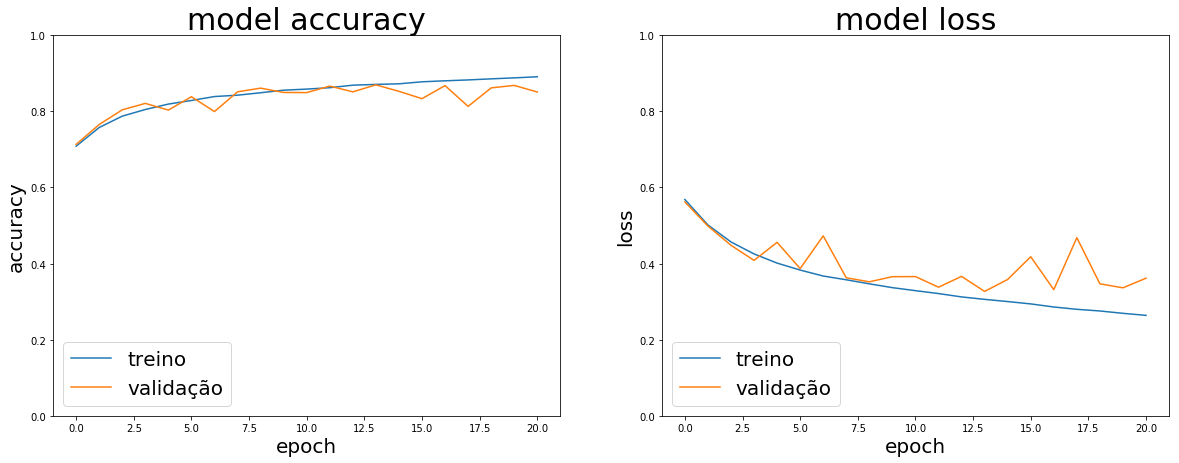

In [36]:
print('Tempo total de treinamento {:.2f} horas'.format(historico['tempo (s)']/3600))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,7))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy', fontsize= 30)
plt.ylabel('accuracy', fontsize= 20)
plt.xlabel('epoch', fontsize= 20)
plt.legend(['treino', 'validação'], loc='lower left', fontsize= 20)
plt.ylim((0,1))


# summarize history for loss
plt.subplot(1, 2 , 2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss', fontsize= 30)
plt.ylabel('loss', fontsize= 20)
plt.xlabel('epoch', fontsize= 20)
plt.legend(['treino', 'validação'], loc='lower left', fontsize= 20)
plt.ylim((0,1))

plt.show()


## Carregamento de modelo

In [46]:
# Experimento que será carregado
exp_carregar = 'VGG16-final-01'

In [47]:
# Carrega os pesos salvos para a melhor validação do treino
model.load_weights('saved_models/weights.' + exp_carregar + '.hdf5')

In [39]:
#from keras.models import load_model

#model = load_model('trained_models/trained_model_' + exp_carregar + '.h5')

# Resultados

In [24]:
# Cria o Tensor do teste
test_tensors = paths_to_tensor(X_test).astype('float32')/255

100%|███████████████████████████████████| 10000/10000 [01:37<00:00, 102.44it/s]


In [48]:
# Faz as predições
IDC = model.predict(test_tensors)
print(len(IDC), ' imagens tiveram suas previsões feitas')

18000  imagens tiveram suas previsões feitas


In [49]:
# Curva para melhor treshold
from sklearn.metrics import f1_score

valores_f1 = []
#valores_cm = []
passo = [x * 0.1 for x in range(0, 10)]


for i in passo:
    IDC_pred = np.where(IDC < i , 0, 1)
    valores_f1.append(f1_score(y_test, IDC_pred))
    #cm = confusion_matrix(y_test, IDC_pred)
    #valores_cm.append(((cm[0,0]/(cm[0,0] + cm [0,1])) + (cm[1,1]/(cm[1,0] + cm [1,1])))/2)
    
sns.set_style("darkgrid")    
plt.figure(figsize=(15,5)) 
plt.title('Sensibilidade do treshold no F1 Score', fontsize = 20)
plt.ylabel('F1 Score', fontsize = 20)
plt.xlabel('Treshold', fontsize = 20)
plt.tick_params(labelsize=15)

plt.plot(passo, valores_f1)
plt.axvline(x=passo[valores_f1.index(max(valores_f1))],  color = 'green', ls = '--' )
plt.ylim((0,1))
plt.xlim((0,1))

plt.legend(['F1 Score', 'Melhor treshold'], loc='upper right', fontsize= 20)

plt.show()

print('valor máximo de F1: %.3f%%' % (max(valores_f1)*100))


valor máximo de F1: 70.342%


In [50]:
# Define quais valores serão considerados 0 ou 1, de acordo com o melhor treshold encontrado

treshold = passo[valores_f1.index(max(valores_f1))]
IDC_pred = np.where(IDC < treshold , 0, 1)
IDC_pred = [item for sublist in IDC_pred for item in sublist]
IDC_pred = np.array(IDC_pred)

In [51]:
# Cria uma Matriz de confusão para verificar as predições
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, IDC_pred)

plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Greys', 
            xticklabels=['IDC -', 'IDC +'], 
            yticklabels=['IDC -', 'IDC +'],
           )

plt.title('Confusion Matrix for the Test Set', fontsize = 20)
plt.ylabel('True', fontsize = 20)
plt.xlabel('Predicted', fontsize = 20)
plt.show()

print('')
print('Test accuracy: %.3f%%' % (100*np.sum(IDC_pred==y_test)/len(IDC_pred)) )
print('Test F1 score: %.3f%%' % (f1_score(y_test, IDC_pred)*100) )
print('Quando o IDC é negativo, a rede prevê corretamente ', cm[0,0]/(cm[0,0] + cm [0,1])*100 ,'% dos casos')
print('Quando o IDC é positivo, a rede prevê corretamente ', cm[1,1]/(cm[1,0] + cm [1,1])*100 ,'% dos casos')


Test accuracy: 63.328%
Test F1 score: 70.342%
Quando o IDC é negativo, a rede prevê corretamente  39.67777777777778 % dos casos
Quando o IDC é positivo, a rede prevê corretamente  86.97777777777777 % dos casos


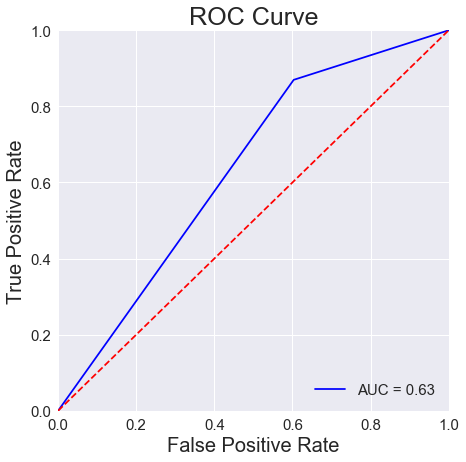

In [52]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, IDC_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(7,7))
plt.title('ROC Curve', fontsize= 25)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize= 20)
plt.xlabel('False Positive Rate', fontsize= 20)
plt.show()

## ENSEMBLE

In [12]:
positives = glob('IDC_regular_ps50_idx5/*/1/*.png', recursive=True)
negatives = glob('IDC_regular_ps50_idx5/*/0/*.png', recursive=True)

positives = positives[0:numero_samples]
negatives = negatives[0:numero_samples]

test_size = 10000
val_size = 5000

X_test = np.array(positives[-test_size//2:] + negatives[-test_size//2:])
y_test = []
for i in X_test:
    if i[-5:] == '1.png':
        y_test.append(1)
    elif i[-5:] == '0.png':
        y_test.append(0)

test_tensors = paths_to_tensor(X_test).astype('float32')/255


X_val = np.array(positives[train_size//2:train_size//2+val_size//2] + negatives[train_size//2:train_size//2+val_size//2])
y_val = []
for i in X_val:
    if i[-5:] == '1.png':
        y_val.append(1)
    elif i[-5:] == '0.png':
        y_val.append(0)
valid_tensors = paths_to_tensor(X_val).astype('float32')/255

100%|█████████████████████████████████████| 5000/5000 [00:06<00:00, 811.94it/s]


In [13]:
mod_1 = 'VGG16-01'
mod_2 = 'VGG16-02'
mod_3 = 'VGG16-03'
mod_4 = 'VGG16-04-2'
mod_5 = 'VGG16-final-01'

modelos = [mod_1,mod_2,mod_3,mod_4,mod_5]

In [14]:
pred_val = {}
pred_test = {}
for modelo in modelos:
    # Carrega os pesos salvos para a melhor validação do treino
    print('Carregando os dados do modelo ', modelo)
    model.load_weights('saved_models/weights.'+ modelo +'.hdf5')
    
    # Faz as predições
    print('o modelo ', modelo, 'está obtendo as respostas...')
    pred_val[modelo] = model.predict(valid_tensors)
    print('validação completa')
    pred_test[modelo] = model.predict(test_tensors)
    print('teste completo')
    print(' ')

Carregando os dados do modelo  VGG16-01
o modelo  VGG16-01 está obtendo as respostas...
validação completa
teste completo
 
Carregando os dados do modelo  VGG16-02
o modelo  VGG16-02 está obtendo as respostas...
validação completa
teste completo
 
Carregando os dados do modelo  VGG16-03
o modelo  VGG16-03 está obtendo as respostas...
validação completa
teste completo
 
Carregando os dados do modelo  VGG16-04-2
o modelo  VGG16-04-2 está obtendo as respostas...
validação completa
teste completo
 
Carregando os dados do modelo  VGG16-final-01
o modelo  VGG16-final-01 está obtendo as respostas...
validação completa
teste completo
 


In [16]:
predictions_val = [y_val]
predictions_test = [y_test]
labels_val = []
labels_test = []

for name in pred_val.keys():
    predictions_val.append(np.squeeze(pred_val[name]))
    labels_val.append(name)
predictions_val = pd.DataFrame(data=np.transpose(predictions_val), columns=(['Y val'] + list(pred_val.keys()))) 

for name in pred_test.keys():
    predictions_test.append(np.squeeze(pred_test[name]))
    labels_test.append(name)
predictions_test = pd.DataFrame(data=np.transpose(predictions_test), columns=(['Y teste'] + list(pred_test.keys()))) 

In [20]:
predictions_val.head()

Y val  VGG16-01  VGG16-02  VGG16-03  VGG16-04-2  VGG16-final-01
0    1.0  0.046804  0.028787  0.053832    0.121082        0.138611
1    1.0  0.323853  0.250162  0.491617    0.337116        0.424340
2    1.0  0.200461  0.232873  0.234400    0.087672        0.453344
3    1.0  0.043895  0.077779  0.052468    0.037115        0.329489
4    1.0  0.237503  0.160266  0.220917    0.106144        0.593187

In [18]:
predictions_test.head()

Y teste  VGG16-01  VGG16-02  VGG16-03  VGG16-04-2  VGG16-final-01
0      1.0  0.101057  0.113902  0.124241    0.031860        0.735034
1      1.0  0.765641  0.845805  0.784099    0.905018        0.743170
2      1.0  0.287665  0.591376  0.272068    0.322374        0.539379
3      1.0  0.356694  0.511502  0.562497    0.540833        0.247583
4      1.0  0.937382  0.706056  0.874425    0.811264        0.888986

In [21]:
import pickle 

# Write to file
my_file = open( 'preds_teste.pickle', 'wb')
pickle.dump(predictions_test, my_file)
my_file.close()


# Write to file
my_file = open( 'preds_val.pickle', 'wb')
pickle.dump(predictions_val, my_file)
my_file.close()

In [4]:
import pickle 

# Read from file
predictions_val = open('preds_val' + '.pickle', 'rb')
predictions_val = pickle.load(predictions_val)  # variables come out in the order you put them in
#predictions_val.close()

predictions_test = open('preds_teste' + '.pickle', 'rb')
predictions_test = pickle.load(predictions_test)  # variables come out in the order you put them in
#predictions_test.close()

In [8]:
predictions_val.head(2)

Y val  VGG16-01  VGG16-02  VGG16-03  VGG16-04-2  VGG16-final-01
0    1.0  0.046804  0.028787  0.053832    0.121082        0.138611
1    1.0  0.323853  0.250162  0.491617    0.337116        0.424340

In [61]:
predictions_test.head(2)

Y teste  VGG16-01  VGG16-02  VGG16-03  VGG16-04-2  VGG16-final-01
0      1.0  0.101057  0.113902  0.124241    0.031860        0.735034
1      1.0  0.765641  0.845805  0.784099    0.905018        0.743170

In [67]:
valores_f1 = []
passo = [x * 0.1 for x in range(0, 10)]

print('Predições na Validação')

for col in predictions_val.drop('Y val', axis = 1).columns:
    valores_f1 = []
    passo = [x * 0.05 for x in range(0, 100)]
    
    for i in passo:
        pred = np.where(predictions_val[col] < i , 0, 1)
        valores_f1.append(f1_score(predictions_val['Y val'], pred))
    
    print ( col ,'F1 score: %.3f%%' %  max(valores_f1) )

print('')
print('Predições no Teste')

for col in predictions_test.drop('Y teste', axis = 1).columns:
    valores_f1 = []
    passo = [x * 0.1 for x in range(0, 10)]
    
    for i in passo:
        pred = np.where(predictions_test[col] < i , 0, 1)
        valores_f1.append(f1_score(predictions_test['Y teste'], pred))
    
    print ( col ,'F1 score: %.3f%%' %  max(valores_f1) )

Predições na Validação
VGG16-01 F1 score: 0.762%


C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


VGG16-02 F1 score: 0.705%
VGG16-03 F1 score: 0.720%
VGG16-04-2 F1 score: 0.746%
VGG16-final-01 F1 score: 0.849%

Predições no Teste
VGG16-01 F1 score: 0.811%
VGG16-02 F1 score: 0.795%
VGG16-03 F1 score: 0.799%
VGG16-04-2 F1 score: 0.801%
VGG16-final-01 F1 score: 0.707%


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

plt.figure(figsize=(10,7))
models_correlation(predictions_val)

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(predictions_val.drop(['Y val', 'VGG16-final-01'], axis = 1) , predictions_val['Y val'])

clf.predict(predictions_test.drop(['Y teste', 'VGG16-final-01'], axis = 1))


array([0., 1., 0., ..., 0., 0., 0.])

In [16]:
clf

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [108]:
parameters = {'alpha':[ 10, 100, 1000, 10000], 
              'solver': ['sgd'],
              'momentum': [0.9, 1],
              'learning_rate': ['adaptive'],
              'early_stopping': [True],
              'hidden_layer_sizes': [(90,),
                                     (100,), (110,)],
              'random_state':[2017],
              }


In [109]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV


grid_obj_stack = GridSearchCV(estimator = MLPClassifier(), 
                            param_grid = parameters, 
                            scoring = make_scorer(f1_score, pos_label=0),
                            n_jobs = 3,
                            cv = StratifiedShuffleSplit(random_state = 420)
                           )

grid_obj = grid_obj_stack.fit(predictions_val.drop(['Y val'], axis = 1) , predictions_val['Y val'])
clf = grid_obj.best_estimator_
print(clf)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=1,
       nesterovs_momentum=True, power_t=0.5, random_state=2017,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [97]:
pred_ensemble = clf.predict(predictions_test.drop(['Y teste'], axis = 1))
y_test = predictions_test['Y teste']
pred_ensemble

array([0., 1., 1., ..., 0., 0., 0.])

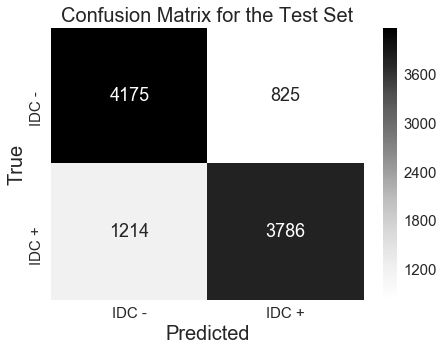


Test accuracy: 79.610%
Test F1 score: 78.785%
Quando o IDC é negativo, a rede prevê corretamente  83.5 % dos casos
Quando o IDC é positivo, a rede prevê corretamente  75.72 % dos casos


In [110]:
# Cria uma Matriz de confusão para verificar as predições
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, pred_ensemble)

plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Greys', 
            xticklabels=['IDC -', 'IDC +'], 
            yticklabels=['IDC -', 'IDC +'],
           )

plt.title('Confusion Matrix for the Test Set', fontsize = 20)
plt.ylabel('True', fontsize = 20)
plt.xlabel('Predicted', fontsize = 20)
plt.show()

print('')
print('Test accuracy: %.3f%%' % (100*np.sum(pred_ensemble==y_test)/len(pred_ensemble)) )
print('Test F1 score: %.3f%%' % (f1_score(y_test, pred_ensemble)*100) )
print('Quando o IDC é negativo, a rede prevê corretamente ', cm[0,0]/(cm[0,0] + cm [0,1])*100 ,'% dos casos')
print('Quando o IDC é positivo, a rede prevê corretamente ', cm[1,1]/(cm[1,0] + cm [1,1])*100 ,'% dos casos')

In [12]:
def models_correlation(predictions_df):
    corr = predictions_df.iloc[:, 1:].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu")
    plt.show()

class Ensemble(object):

    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        from sklearn.model_selection import StratifiedKFold
        from sklearn.model_selection import cross_val_score
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=2017).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]

                print ("Fit %s fold %d" % (str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                y_pred = clf.predict_proba(X_holdout)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        print("Stacker score: %.5f" % (results.mean()))

        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res